___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import string as string
from nltk.corpus import stopwords

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [80]:
yelp = pd.read_csv("yelp.csv")

** Check the head, info , and describe methods on yelp.**

In [81]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

In [82]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [83]:
yelp.describe()

stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000

**Create a new column called "text length" which is the number of words in the text column.**

In [84]:
yelp["text length"] = yelp["text"].apply(lambda x: len(x.split(" ")))

In [85]:
yelp["text length"]

0       160
1       256
2        16
3        75
4        85
       ... 
9995    118
9996    157
9997    267
9998    148
9999     79
Name: text length, Length: 10000, dtype: int64

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

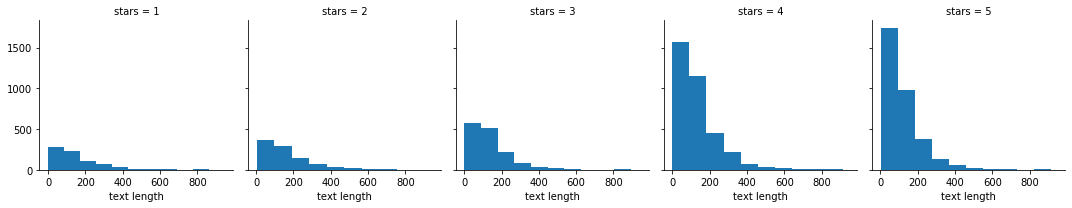

In [86]:
g = sns.FacetGrid(data=yelp,col="stars")
g.map(plt.hist,"text length")

**Create a boxplot of text length for each star category.**

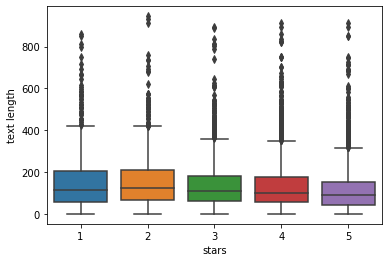

In [87]:
sns.boxplot(x="stars",y="text length",data=yelp)

**Create a countplot of the number of occurrences for each type of star rating.**

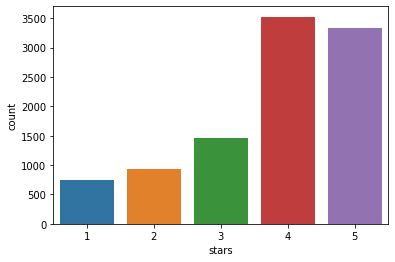

In [88]:
sns.countplot(x="stars",data=yelp)

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [89]:
groupStars = yelp.groupby(by="stars").mean()
groupStars

cool    useful     funny  text length
stars                                           
1      0.576769  1.604806  1.056075   156.013351
2      0.719525  1.563107  0.875944   158.508091
3      0.788501  1.306639  0.694730   143.043806
4      0.954623  1.395916  0.670448   132.921441
5      0.944261  1.381780  0.608631   116.054840

**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [90]:
corr = groupStars.corr()
corr

cool    useful     funny  text length
cool         1.000000 -0.743329 -0.944939    -0.865650
useful      -0.743329  1.000000  0.894506     0.690255
funny       -0.944939  0.894506  1.000000     0.844066
text length -0.865650  0.690255  0.844066     1.000000

**Then use seaborn to create a heatmap based off that .corr() dataframe:**

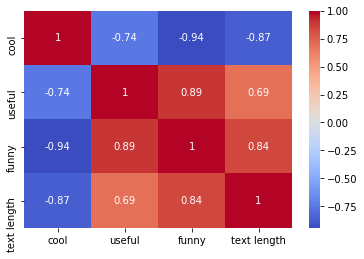

In [91]:
sns.heatmap(data=corr,cmap="coolwarm",annot=True,)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [116]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
yelp_class

business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
...                      ...         ...                     ...    ...   
9990  R8VwdLyvsp9iybNqRvm94g  2011-10-03  pcEeHdAJPoFNF23es0kKWg      5   
9991  WJ5mq4EiWYAA4Vif0xDfdg  2011-12-05  EuHX-39FR7tyyG1ElvN1Jw      5   
9992  f96lWMIAUhYIYy9gOktivQ  2009-03-10  YF17z7HWlMj6aezZc-pVEw      5   
9994  L3BSpFvxcNf3T_teitgt6A  2012-03-19  0nxb1gIGFgk3WbC5zwhKZg      5   
9999  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
0     My wife took me here on my birthday for breakf...  review   
1     I have no idea why some people give bad review...  review   
3     Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4     General Manager Scott Petello is a good egg!!!...  review   
6     Drop what you're doing and drive here. After I...  review   
...                                                 ...     ...   
9990  Yes I do rock the hipster joints.  I dig this ...  review   
9991  Only 4 stars? \n\n(A few notes: The folks that...  review   
9992  I'm not normally one to jump at reviewing a ch...  review   
9994  Let's see...what is there NOT to like about Su...  review   
9999  4-5 locations.. all 4.5 star average.. I think...  review   

                     user_id  cool  useful  funny  text length  
0     rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0          160  
1     0a2KyEL0d3Yb1V6aivbIuQ     0       0      0          256  
3     uZetl9T0NcROGOyFfughhg     1       2      0           75  
4     vYmM4KTsC8ZfQBg-j5MWkw     0       0      0           85  
6     wFweIWhv2fREZV_dYkz_1g     7       7      4          307  
...                      ...   ...     ...    ...          ...  
9990  b92Y3tyWTQQZ5FLifex62Q     1       1      1           60  
9991  hTau-iNZFwoNsPCaiIUTEA     1       1      0          167  
9992  W_QXYA7A0IhMrvbckz7eVg     2       3      2          262  
9994  OzOZv-Knlw3oz9K5Kh5S6A     1       2      1          357  
9999  KSBFytcdjPKZgXKQnYQdkA     0       0      0           79  

[4086 rows x 11 columns]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [117]:
def text_process(X):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean  text words
    """
    nopunc = [char for char in X if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # print(nopunc)
    noStopWord = ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
    print(noStopWord)
    return noStopWord

In [118]:
X = yelp_class["text"].apply(text_process)
y= yelp_class["stars"]

wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semibusy Saturday morning looked like place fills pretty quickly earlier get better favor get Bloody Mary phenomenal simply best Ive ever Im pretty sure use ingredients garden blend fresh order amazing EVERYTHING menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came 2 pieces griddled bread amazing absolutely made meal complete best toast Ive ever Anyway cant wait go back
idea people give bad reviews place goes show please everyone probably griping something faultthere many people like case friend arrived 550 PM past Sunday pretty crowded thought Sunday evening thought would wait forever get seat said well seated girl comes back seating someone else seated 552 waiter came got drink orders Everyone pleasant host seated us waiter server prices good well placed orders decided wanted 602 shared baked spag

restaurant incredible best pasta carbonara best tiramisu Ive life food wonderful though calamari fried bread served dinner comes right oven tomatoes freshest Ive tasted outside moms garden great attention detail longer eat Italian restaurant without feeling slighted first place want take outoftown visitors Im looking impress owner Jon helpful friendly really cares providing positive dining experience Hes spot wine recommendations organizes wine tasting events find joining mailing list Facebook page
always fan Burlingtons deals however shopping one went return belt pretty simple Instead stood customer service line 15 minutes thanks employee Burlington buyingputting things layaway took three staff help words said except Hold pissed lady finally done employee service asked want Serious help needed work area customer service think
Another night meeting friends laugh Waited another 20 minutes beer refilled bar girl even took empty without even asking wanted refill new brunette girl dont rec

Padres Spring Training game reservations Charlies Scottsdale None us came highly recommended dad soon walk Charlies eyes start feasting signed baseballs left wall everywhere look floor ceiling even ceiling covered memorabilia autographed items athletes sports celebrities Besides amazing assortment sports artifacts especially like Cactus League Beer List pairs beer city team Cactus League Colorado Coors Light Texas Shiner Bock Chicago Old Style San Diego Stone IPA etc Also worth mentioning complimentary chopped liver platter rye bread bagel chips bring soon seated ribs coconut shrimp combo great wasnt thrilled side dish potatos au gratin 250 upcharge also bring huge bowl cole slaw entrée choose soup comes smaller bowl cole slaw full dessert walked place packed found trying take much memorabilia possible one side crowded lobby sat Willie Mays signing book baseball 200 charitable donation foundation Needless say bringing home memorabilia
Best food super friendly staff great prices Love
Ch

Hands best breakfast Ive ever anywhere definitely feels like home cooked breakfast Ive never place weekend isnt packed door Im person loves place
place fantastic went Sunday 29th July around 500pm guy behind counter told us enjoy take time ask questions wandered around bit found bottle Argyle bubbly wanted began stare lust eyes selection Absinthe Girlfriend wandered ask guy recommend white wasnt Chard really dont like buttery oak anything took cues found great bottle white drank great glee last night test guy behind counter didnt set price limit said show favorite could done many others past shown us 50 bottle instead showed us kick ass bottle 14 price point mark good wine seller Find want without bending price Yes sometimes want spend 400 bottle often Id rather get drink price found turned us onto white REALLY liked super rare different tastes Well absolutely going back buy fermented grape place Prices par Total Wine youre really paying help someone knows sell likes job Great job Spor

Screw Disneyland Sephora happiest place earth everything girly girl girly guy could possibly dream best brands cosmetics skin care perfume theyre always adding new items extensive product selection getting gift card Sephora like Christmas morning Everywhere look sparkly blushes lip plumping glosses lashextending mascaras antiaging face creams could anyone ask understand men might hate going Sephora products guys although many far know Scottsdale Fashion Square home Sephora Scottsdale even great still cant beat one right strip Vegas Theyre open really late shop drink hand could better
loved little slice heaven Reasonable prices tiny dining room personal service Pablo laid back 4 couples small establishment great job making sure taken care
load absolutely hideous uninteresting crap Take every single onestar review written Yelpers copypaste far eloquent summary feelings place anything come reason ever come Certainly free one time come forced friend meeting another friend
AZ88 chic urban f

Went today Sunday 850 crowded bad 12 hour wait Im warning dont ask much longer put name told long checked 10am really got packed got done ordered chicken waffles really liked asked butter waffle didnt come made dish perfect chicken great flavor take bite waffle butter syrup heaven tried bites without butter wasnt even close grandma got omellete gave knew wouldnt finish would order also omelletes pretty good size wifes dish sons mine much food especially 9 use getting enough food 2 eat breakfast places slighty cheaper complaining good ready 2 guys sitting next use trying eat 30 minute food challange big ass egg plate bacon hash browns made thru halfway would definilty go back get stuff also got lemonade mint right son really didnt like reeses pancakes Id like go back try stuff ham steak w gravy chicken fried steak w hashbrowns bannana pecan caramel french toast
Love location Gainey Ranch Great food consistently
server Gary awesome Food amazingan experience
started morning vacation Break

wife live around corner hadnt eaten months got food take Mongolian beefkung po chickenpad Thai noodles Mongolian beef white onions scallions bland Kung po chickenlots white meat chicken whole dish one peanut taste dish non existent Blah Pad Thai noodlesthe dish dry came container one giant clump tasted like plain noodles glad peanut sauce fridge toadd edible going back GS disappointed Jade palace 92nd street take Asian favor go elsewhere
going Scottsdale via Paradise Valleyor coming Scottsdale heading eastyour stomach growling dont want usualthen look Jasons Deli situation Friday night decided give locale tryand must say disappointed Smokey Jack Panini Smoked turkey breastguacamoleprovolone cheeselettucetomatobacon side gave wifeLOLsince dont eat red meatand Russian dressing However sandwich made order pressed perfectly grilland flavor outstanding give pickle homemade potato chips sideand also lemonade comes fountain free refills almost missed free Ice Creambut seen people walking arou

oK first broke promise went figured things got better ordered something wouldnt care cold French Toast ok french toast good wasnt worth waiting 40 fucking minutes get top friends food cold one would rather eat glass eat place refused order cold meal since friend paying said fuck ill go well ordered toast sausage sides friend ordered mish mash review place generious mine hes said wasnt bad lol anyways toast soo cold butter couldnt even melt cold sausage boot friend mishmash lol saw bottom bowl weird watery substance bottom hard drain poached eggs dumping bowl going give palatte 3 stars based french toast hardly warm badly want like place cause close Matts always packed please get breakfast place roosevelt area large enough seat 20 people serves good breakfast
really like place must say best pizza West Chicago sauce sweet side like kid friendly great casual place family friends without pretentious side lines little long times think worth wait
Green far one favorite restaurants eat husban

Eating decent experience delivery yet meet match order delivery always get 16 chicken pizza alfredo sauce top last 6 years received 30 minutes less 2 times always tasty fresh preeminent food delivery ever period
love boba drinks hate word boba always feel like ape say word Anyways period use drink stuff least 3 times week living San Francisco say love something really like creepy obsession found boba place got excited especially saw green milk tea cant vouch drinks Ive tried green milk tea avocado snow every time ordered super good
found Cake Frenzy service listing Craigslist looking someone create wedding cakecupcakes tight budget 2 12 months plan venue wanted dates available met Jennifer month prior fiance knew wanted peanut butter jelly cake happily obliged emailed picture wanted day wedding first saw cake almost cried went beyond expectations cake beautiful sugar flowers gelatin butterflies guests loved flavor combinations decorations highly recommend Cake Frenzy professional takes

severely mislead Frank hot food aint bad review cold far worst food Ive ever eaten would drag cuffs get return
really like place alot pizzas really different really good wish could say favorite ive liked every pizza ive gotten except portabello mushrooms cause dont like mushrooms amazing beer selection Major thumbs
Sportsmans top game comes wine staff knowledgeable helpful place bought wine didnt feel like judged trying find cheaper bottle pretentiousness air inquiring dry resling one vino gurus offered get taste one bar came back TWO samples try Sportsmans also intriguing liquor section enjoy wandering around looking fabulous bottles never seen heard Several times month offer complimentary wine tastings special discounts bottles sampled also full service restaurantbar side huge glass list also welcome pick bottle store cork free charge enjoy retail priced bottle dinner portabello sliders dinner amazing still dreams one complaint petty website overrun text finding important information

Phenom food always fresh well seasoned good selection Tequila Every meal Ive fantastic carnitas fish tacos well prepared fresh beans fresh rice averages 10 plate worth really good Mexican salsa bar excellent 5 different types salsa choose freshly made cant say enough flavoring meats fish Decor somewhat minimalistmodern probably attract happy hour crowd TVs viewing pleasure Service friendly quick Ive Chandler location start going one Scottsdale Good food wont disappointed
Bring flashlight dark inside read menu waiter well versed used recommendations filets cooked perfection served 400 degree hot plate recommend lobster mashed potatoes feel worth price tag wine list extensive expensive looking fancy place went round golf accommodating Great special occasion dinner everyday steak joint
best consistent donuts valley always fan Chandler location tried location soon opened pleased donuts fresh varied location dont care people go dunkin coffeea donut shop donuts havent yet donuts valley leagu

Yes small yes takes time get order quality food serve excelent Celina name owner Selena fabulus resturant takes order runs kitchen serves order wouldnt say one person resturant help kitchen Mexican resturants Phoenix serve food good one Menu limited whatever order disappointed
Service horrible food mediocre best wont going back
Cant go wrong iced gingerbread latte hot waffle Nutella spread free wifi especially shared beautiful wife
Refused call cab phone
Yup Im reviewing gas station like Quiktrip chain general station particular find Quiktrips generally cheapest gas town Sure Arco sign street might say 2 centsgallon cheaper get whacked ATM surcharge mention theres bums loitering adjacent bus stop Quiktrip place well lit theres always trash window squeegee every pump convenience store better unlike gas stations dont charge air compressor Oh person register actually greet step inside door managing sound sincere coolest thing convenience store Bonus enjoy shopping Hot Chick Safeway street

OK yeah everyone LOVES teriyaki know Well dont quickly dismiss absolutely AMAZING dishes served may look like little preprocessed Japanese hole wall outside theyre die hard homemade mom pop mouth full great food establishment Id highly recommend trying Katsu bowl hardly find kind Japanese katsu AZ yet excellent one thats traditional expensive Id love explain mystique dish many people think fried egg onions leeks topped diced pork cutlet thats coated panko bread crumbs strange palatable Well say educate tongue expose delicious culture Theres also Orange chicken dish completely bees knees easily without remorse makes Panda Express look like burnt oil homeless person decided cook chicken pile burning newspapers house beef Spicy garlic brown sauce beef mushrooms Heaven Simple delicious havent even mentioned coup de grace yet fried rice might seem little heavy surface lightly fried garlic oil outclasses competitors Paired lightly fried shrimp sweet garlic love Seriously fried rice Sean Conn

auto repair place Ive ever seen 5 stars solid totally deserve boyfriend 1969 Pontiac Firebird hasnt run several years sinking lots time tinkering 1000 awful Meineke street gave cars transmission went good decided fix Bird yeah could drive yes super lucky Whiteys diagnosed carburetor dumping fuel Meineke charged 500 replace hmmm Upon hearing story Meineke Whiteys told order part avoid markup theyd put labor Awesome took home wasnt running quite right still failed emissions Back shop went Whiteys took back spent WEEKEND various minor things one point called said Weve done still quite right gonna keep another day glad admitting actually felt right determined fix versus handing back dreading repair bill picked Tuesday bill 7 Thats right SEVEN DOLLARS charged spark plug oil filter amazing expecting several hundred dollars time car runs beautifully extremely pleasant entire time Im taking alleged defunct car second opinion next week HIGHLY recommend Whiteys
Ive rented Captain Ted many times 

would beside Grinders closed time wrote review since Im regular found sitting one giant chairs surfing wifi many mornings Im one brought plants used water couple times week nowadays Im lazy really need repotted get music always playing everyone knows regular drink theyve continued memorize even started slowly decrease fat calories regular order ice skim latte sugar free vanilla used get Everything bagel egg cheese potatoes mornings get multigrain toast Eh little things coffee Grinders really really good bitter sharp smooth grind beans outside many mornings per week Sometimes gets warm inside winter prop doors open grinder going outside itll blow coffee bean fumes door Theres retired motorcycle cops meet every morning sit around big round table often park motorcycles front place together call Geezerados Theres sometimes rightwingers conversations midday One time listened meeting heard trying come controversial topics get people come church spent long time trying figure could get proof g

alread posted review add friend work ordered vegan chocolate cupcakes birthday sooooooo delicious nonvegan coworkers LOVED
Yeahnotsomuch Sprinkles sooooooooo worth wait chaos hype attitude morons work things terrible Sprinkles include cupcakes great ordered two vanilla okay cinnamon dry chalky really disliked place disorganized mess rhyme reason ordering process friends carefully watching ordering process actually think decided choose dumbest irrational methods take orders dispense cupcakes stupid owners must purposely hired people cannot think make decisions sane person could possibly work without like umthere might better way Also employees rude mention dumb get attempted order bottle water told clerk 100 degrees outside walked Im realllllllly thirsty idiot counter told order water must wait name called receive water pay pointed water RIGHT wasnt anyone currently paying using register Couldnt sell water said proceeded WRITE ORDER word water cupcake order slip told stand wait name cal

Covet excellent clothing store Arizona almost nowhere decent shop unless course loooooove Juicy Couture event probably even bother reading review kind fashion forward clothing wont appeal Acne Jeans check Endovenera check Ksubi check Nike check Covet starts excellent mens shoe section continues excellent mens clothing selection finishes excellent womens wear really shame havent Covet yet serious favor support small business time
Boy name temptationSeriously Ill try fair though Im writing time restaurant truly life changing much Im buying dining room table additional gear kitchen frequenting chain Im hometown based strength experience Even good mood place wouldnt breaking 25 Im good mood Texas cheese fries Pretty tastelessmess uncrisp steak fries meant Monterrey jack cheddar bacon Either cheese mixed together really well thats Bacon mm generous term toe nail clippings meat ended atop Saving grace ordering 12 order Kids meal Holy crap dried scraggly carrots accompanied basic hot dog imag

never BBQ South Texas anywhere outside California except Bobby Q places Ive tried Bobby Q current favorite BBQ place EVER found place Yelp came trip Arizona place pretty crowded waited 1520 minutes ordered babyback ribs St Louis ribs corn maccheese also give DELICIOUS AMAZING CORNBREAD Everything excellent St Louis ribs best ribs ever extremely tender nice flavorful bark outside dark grill marks BBQ sauce equally awesome kind like bit sweeter side less vinegary side babyback ribs also tasty flavorful less meat course St Louis ones sides good forgettable due sheer perfection ribs dont know ever Phoenix place mustreturn ever Oh end meal gave us complimentary piping hot FRESH cinnamon donuts doublewon want Bobby Q right
sad Luckys far live worked near Luckys last year happened walk lunch lunch good took huge meat lovers pie home good husband proposed employees friendly explained pizza might take little longer normal want make sure right loved everything visit able stop couple times throug

Seriously seldom give 5 stars deserves least much wasnt location super scary dinner club scene would go everysingleday Truly one best BBQ places greater Phoenix mouth watering Im thinking Hog Heaven special fact puppies mouths watering Decent prices giant selection One places early cowboys SW would appreciate cracker family suggest going super early like super early bird special early like snow birds come senior special early dusk whole place transforms pulsating super loud super dicey Mexican Dance Club blue hairs sure coronary attack indulging lipid laden meal attempt make way Club Ah sacrifice decent BBQ
live two cities two different states travel back forth month tend use services find havent really found really great barbershop last three years Anthem week decided give Vs Barbershop Happy Valley Road try rarely use chains prefer intimate personal hair stylist pleasantly surprised time able make appoinmtnt online choose services wanted haircutvery efficient didnt know barbers let s

False ads stay Unless dont mind dirty smelly overrated hotel sheets towels supposed white gray place run poorly serviced front lobby clean head room quickly find place run taken care stayed fifth floor cabana suites soon elevator opened fifth floor knew right away stayed wrong place suites nothing room tiny bit extra elbow space rooftop area pool front room pool NASTY see pictures uploaded green looked disgusting arrived take look order sign placed entrance place embarrassing told brothers book thought going great hotel based website disappointed
first time Texas BBQ House gave us sample help us order brisket fantastic got moist wife got lean enjoyed choices immensely definitely go back wanted spicy BBQ sauce apparently didnt see
husband twice last week dinnerit bit pricey reviewers said around 20 dinner entrees vegetarian organic food exactly folks expect get pay happily surprised reading reviewsthe food amazing portions huge leftovers times ps paid debit card times trouble despite re

Glad place new ownership probably remove review really harsh doesnt apply NEW establishment warned Short Review PLACE SUCKS BALLS Long Review supposed meet friend Draft House Saturday night excited datelike experience cuz went inlaws dinner headed Draft knew going interesting sound music pulled strip mall music Good music probably good thing place youre hiphop fan hiphop night crowd Ghetto fab way Seems like everyone late 20s early 30s older sprinkled throughout crowd none realize 1996 anymore Expect hear lot fake accents la Da Bronx lot misuse slang terms entertaining became annoying Oh people steal seats tell saved ugh atmosphere small crowded Small dance floor couple pool tables dont expect get one TVs playing various sports guess qualifies place sports cafe service OMG one beer line retarded 30 minutes tab line sight people crowding together trying get front line Oh LOL bar tenders total morons one complained guy next us crappy tip argued customer whether ordered rum cokes redbull 

pleasure living across street treasure 6 years Im still lucky enough work close Let clear reviewing Haji Baba GROCERY STORE first give insight prepared food takeout instore dining one stores Arizona several choices pita breadits also place Ive found whole wheat pita several choices Feta cheese Danish FrenchGreeksame olivesthere choices ALWAYS buy tahini prices inexpensive Need spices 25 price would pay anywhere else best way describe Haji Baba REAL grocery store REAL prices REAL people specialty store trendy items inflated prices sell food items actually use bonus wont find 10 year old jar something restaurant portion Haji Baba better think takeout joint happens places sit eat tables perform table service got zero charm go food thats Okay food lamb tongue sandwich die Let repeat LAMB TONGUE PITA SANDWICH GET baba ganouj also darned tootin tasty Actually sometimes dream baba ganouj Im crazy hummus maybe making hummus takes 5 minutes mine bomb bad Gyros good greasy Greasy gyro meat pet p

checked RnR Sunday days opening fairness agree many reviews Even though new things fixable hopefully feedback taken appropriate vein building cool vibe energetic sunny Sunday morning abundance waiters seemed confused frenetic without real focus customer menu limited server eaten items struggling explain drinks took 15 minutes arrive even though saw sitting bar entire time water disappeared food ordered grill cheese rare treat order want good cold overwhelmed heavy bread cheese wasnt melted sent back simply nuked brought Icky son wanted kids cheeseburger staff kept coming back forth sure single burger sliders kids became comical third person came husband ordered salmon omelet several additional fixings eggs tasted like box eggs lackluster flavorless even took time provide feedback management got weak smile come back try us made effort make things right either comping something else taste providing incentive come back many restaurants town go one less mediocre young crowd may enjoy bar v

facts full dinner experience Ambiance Thinking redecorating house look like Trader Vics unbelievable Service perfectly charming informative attentive Drinks dont drink read every review review drinks Appetizer Beef ChoCho amazingly tender melts mouth Great flavor Dinner Trader Vics Calcutta Curries good better mix variety garnishes fun play around flavors Dinner 2 Chinese BBQ Flat Iron Steak Amazing Crispy onions mashed potatoes tenderflavorful steak make close eyes wish would never end Dessert dont know name vanilla icecream covered coconut bed chocolate sauce simple beautiful tasty Overall experience best darn dinner experience Ive ever
Great MomPop store Weve stopped several times fresh produce get treats kids usually sit outside one tha picnic tables eat gelato kids love playingpetting animals Thanks
hair food 1 2 Bhel Puri dish whole experience pretty bad indication order food finally figure food taste good checked sodas order sheet sodas showed asked supposed go find sodas front 

Needs new name Pischkes old sad ending appreciated McGraths effort keep Pischkes alive nothing nothing nothing like Pischkes old Call Blue Ribbon Cafe take PIschke name cant imagine Chris PIschke would honored remembered way restaurant reflection person Pischkes Blue Ribbon Cafe would exact opposite current restaurant laid back family friendly yet bar restaurant serves unending array crazy good sandwichessaladsetc current decor pretentious food matches
place many times food service always great excited found place get freshly made good food Queen Creek favorite home made mozzarella cheese great anything frequently order tomato basil Mozzarella pizza recently discovered vegetarian plate delicious staff friendly atmosphere casual comfortable Dont forget save room amazing ice cream
Stayed RocknRoll marathon like 80 guests absolutely enjoyed stay hallways rooms slightly blah decor things bedrooms bathroom lobby restaurant pools great Amenities included 1 pet fish someone else fed 2 complim

Man oh man cant decide whether want review place auspices dont anything nice say say ordered food came totally wrong asked vegan salad specifically thats ordered came chicken cheese shows complete inability read order People make adjustments time worked restaurant fucked lashed 40 times Read people order got wrong salad saw unbelievable disappointment going ordered veggie sandwich instead credit delivered took bill best customer service world could overcome sandwich monumental fucking embarrassment cannot believe let thing door ate starving would liked driven back go ingredient ingredient preparer Explain appealing eyes mouth stomach etc hated lot Sorry Im sure youre nice people good intentions
brought six pairs shoes Ariel see could put new heels wear spikyheeled high heels 12 Ariel put new heels perfectly matched color size type heel even filed hair would wear smoothly also put lot work fixing front Many shoes toes worn shredded faded Ariel made like absolutely new Amazing shoes Prad

Renaissance Festival place everyone anyone venture order awaken medieval passions expose side place reveal people without fear judged dress clothing appropriate era eat citizens renaissance age would eat live day shoes people whose lifestyle consisted aspects every day lives merry time Whats fascinating Renaissance Festival escape everyday bustling industrial environment known people 21st century pass gates immersed culture rarely seen days Men women children ages absorb spirit festival change someone place expose Immediately compelled high spirits people dancing shopping continuously enjoying welcome festival opportunities limitless twelve stages continuous live entertainment jousting tournaments 200 artisans displaying variety unique wares displays ancient skills like glassblowing leatherworking weaving woodcarving blacksmithing candlemaking pottery One specific entity Renaissance Festival stands mind old coin striking mill tucked away blended strips stores surrounding family three f

Phoenix weeks ago business trip Lucky Thai Elephant right across street hotel tiny little joint maybe 20 tables menu like book much choose rice dishes noodle dishes soups appetizers coworker settled red curry dish chicken sweet sour dish yeah sounds trite mood delicious tons leftovers shared homey street hope enjoyed Highly recommended Im ever back town visit
345pm Im jump bus light rail reservations Pizzeria Bianco couple friends got line waiting get wine Useless fact theyre 26th line theory 500 first seating happens publiclyunderwritten public transit arrives oneway trip cost 125 gfs unvalidated parking fee 12 two Hop Knots later sitting waiting Typical order one everything two Biancoverdes point almost review 200 details irrelevant crust great cheese great Sonny Boy ubersalty delicious fruity olive oil holy shit roasted peppers etc person staring window guess point make point go Bianco hard disappointed
Dr Greg Allen best doctor East Valley probably state best bed side manners carin

traveled Phoenix often work early 90s late 00s first thing Id leaving airport hit Pink Pepper lunch buffet hence Ive never ordered menu dinner service lunch buffet awesome reasonably priced including iced tea may necessarily authentic Thai food think reduce heat bit flavors excellent variety good Loved eggplant dish cant recall name crispy chicken creamy sauce course usual curry sauce dishes Im ever back Phoenix Pink Pepper one first places go
OK Wisconsin land great lakes COMPLETELY surprised told yes lakes desert Arizona Lake Saguaro Lake man made lake originally built Stewart Mountain Dameven beauty equal would see glacier regions Midwest amazed frankly beautiful tour Sold 18 90 minutes get moneys worth probably want hear event combination 1 scenery also 2 charm paddle boat boat quite large seating probably close 75 people event could share family happened friends Currently pretty mellow type event great Mothers Day although told hoping exploit benefits include comedy shows Jazz ens

pretty awesome traveling Phoenix work get raw food fix eat raw diet home much traveling excellent portions large price good type food places like Chicago much expensive got raw tacos lunch blueberry fields salad togo great also appetizer ended much food packed location actually fairly close airport 10 min drive preferred place go Im Phoenix
Went first time weeks ago best BBQ Ive Arizona service great well manager stopped times well waiter make sure everything good UPDATE Looks like went business Havent open two weeks
went 8 Thursday night place pretty empty except family 4 eating layout little strange looks like order big window kitchen behind actually order back right corner restaurant girl took order friendly made fat ass feel welcome pretty rare days suggested slider plate side green chili mac cheese cornbread took 10 minutes order come probably good sign least spending time cooking something back sliders awesome meat moist full smoky flavor favorite three definitely pulled pork gre

wife finally tried CPH greatly surprised everything food expected superior along professionalism staff ambiance well set place could hold large parties comfortably began nigth bottle wine original chopped salad alons rock shrimp exceptional main courses wife orded sea scallops ordered short ribs Peter Cowboy Ciaos must miss guy dinners cooked perfection staff never left alone dessert coffee evenings special donut holes three dipping sauces fantastic wife dont usually rate places five stars place actually gets food service meant one Cant wait head back
might say Phoenix city without much culture may true aspect however remember Phoenix young large city compared cities lie within United States say city work progress catching everyones culture expectations Japanese Friendship Garden downtown Phoenix seven years old new park scene metro say looks great keep getting better time happen people stop saying culture Phoenix become part evolving city visiting places admission donations fund desir

reviews good friend check disappointed morning trying eat breakfast swatting tons flies everywhere us food customers inside egg sandwiches served hamburger buns shaped like rolls could went next door get one like McDonalds surprised people Ahwatukee like place looks nice food soso
dont think husband let rate anything less 5 stars Parking us okay since park lot parked neighboring house 5 bucks Grabbed towels hotel staked claim lawn People friendly hubby met folks Dixon IL day came say Hi course watching Cubbies cant beat
shopping Bass Pro Shop Tempe decided go ice cream kill time dropping parents airport pulled iPad yelped ice cream brought 4 options area chose Dairy Queen blocks away luck would left turn onto Dobson ended going East 202 opposite direction Dairy Queen searched came Yogurtland wasnt luck ice cream higher power work bring us frozen yogurt oasis Yogurtland ingredients fresh delicious price reasonable well 5 us scrumptious generously portioned sundae total bill less 20 enjo

Rude rude rude never go back place dont normally carry cash went pick sons pants recital night little bit jam take cash checks suggested might put claim ticket least mention people drop clothes owner pointed itty bitty sign told signs everywhere owner hostile argumentative didnt care say hovered son tried pants like going steal something place TINY went ATM pulled cash wasnt big deal place customer service skills whatsoever wont ever go Steer clear
Vine Tavern ill omit word Eatery im fairly certain term cant applied food serve establishment vortex sort culmination hangout lowbrow Fred Durst clones future dayshift strippers said cesspool building hasnt burned ground yet feel compelled warn others consider spending evening new Tempe area small group friends decided drop check approached thedimly lit building began second thoughts bloomy sense tingling later entered greeted lovely bouncer type gentlemen begged us pay 5 cover seriously seated towards back near group teenage mothers burly c

Wow love place like moved street Inexpensive fresh delicious everything want mexican restaurant soft shell carne asada taco fantastic freshly prepared topped guacamole way super creamy Basket chips free toppings bar every one 6 sauces delicious plan frequenting Salsa Blanca
closest New York hipster style coffee shop Ive seen Arizona serve beer Problem espresso unbelievably bitter Cookie happy hour pretty cool though
husband absolutely LOVE restaurant Anytime find craving Mexican food first place pops head Salsa Blanca always encountered friendly welcoming staff amazing fulfilling food could ask
Best place Arcadia get coffee tea Lots friendly locals great place sit outside people watch read paper morning early lunchtime
Best Steak Ever Everything menu amazing Go
honor impending superbowl XLV wanted write majerles review year though instead hitting sports bar biggest day football ill going party real rager wasnt though would definitely pressed majerles front door bright early superbowl m

favorite restaurant Phoenix area wrote itand sticking First fresh local sustainable organic words menu website places like San Francisco NYC would nothing notable desert truly something hard find Aside practical land Fox Restaurants True aside big box store strip mall really appears little demand small local restaurant farm time make new demands time say next Zinburgergeist try little corner place run neighborbut digress enjoyed Farmers Feast worth every penny 65person First house cured meats including head cheese amazing Second often get chefs menu persons plate different often Ultimately tried 10 different items item amazing would come back pasta alone let along perfectly cooked scallops melt mouth sliced fillet service ideal want eat 60 minutes dont come want enjoy evening great food come noted waiter previous night sturgeon something havent seen menu since N California commented unique etcOf course available night thereor came fish course waiter brought sturgeon restaurant didnt en

Yelpers question menus prices vary location help CA transplant figure best ones try Thanks Ive heard good things Sonic Anaheim Hemet CA ones visiting
May add family friendly past reviews love place feel like home come staff kind always welcome us open arms manager Kaj literally treats us like family brought new born baby Corbins first meal thrilled level service received usual food excellent service divine happy hour awesome favorite items quesedillas burgers feta hot sauced topped homemade potato chip appetizer excellent selection beers Corbins overall great place
extremely happy chose Cool Cuts 4 Kids sons first big boy hair cut instantly comfortable drawn friendly things children given choice movie playing video game course knowing exactly wants went straight video game Sonic XBOX pretty much breeze point little guy hypnotized didnt even realize going w beautiful lovely long hair obviously need focus distracting moms lol Jessie cut sons long hair doll didnt seem bothered mother brea

going Salon Mila 12 years never go anywhere else hair always looks amazing leave color cut always perfect feel glamorous beautiful leave First class salon Beautiful surroundings Always great service aim please Mila knows takes make sure customers feel welcome time Thanks everyone
Buca Di Beppo literally italian restaurant hell know big box chain restaurants throw junk walls attempt make space feel vintage Buca Di Beppo throws junk knick knacks statues anything else italian could find chinese warehouse loaded goods terrible horrible mess end sitting yardsale italian paraphenalia eating bland pasta embarassing truly flavorless food Thin flavorless alfredo sauce Thick slabs lasagna less taste get frozen section Publix went large group across table bland food seat party guide kitchen area cooks play along say welcoming hello Deep know hate kitchen Sure nice Id rather concentrating making food making good course food Buca Di Beppo seems far beyond point return tasting good dead Dead food li

know scene Fast Times Ridgemont High Jeff Spicoli takes one Vans hits head Well thats went place first time havent coming last 10 years place great would say best nonPizzeria BiancoCibo pizza valley crust awesome sauce cheese perfect really impressive part picture perfect pizzas made lobster ravioli huge easily enough two Baked Raviolis better average needed basil something really cant dine take delivery one table seats inside eat guess could
Jeremiah great friendly patient knows hes started Drunken Cheesy Bread ok something would want Nothing wrong taste lunch Chicken Parmesan sandwich along house salad sandwich great Loved house salad mean could stop eating idea kind dressing AMAZING craving thinking interior clean roomy casual heard great happy hour back
Mediocre bland low quality food topped painfully slow service worked neighborhood continued return occasionally case gotten better reasons could never fathom plate abysmal food placed table salsa rice usually good thats offer
Bomber

Yknow rarely buy extended warranty places try peddle nowadays buy item reputable manufacturer unnecessary case tires make exception control quality tires buy put car quality construction workers dont know secure nails screws bolts travel highways streets local thoroughfares Theyre nefarious bunch part Im extra taxes Im contacting local elected officials institute tax businesses transport little metal devils streets driveand stiff penaltiesmassive fines get caught dropping load highway second time year one tires caught one little buggers last one nail screw mind BOLT pulled receipts glove compartment used Yelp find nearest Discount Tire called tow replacement certificates got 16 per tire back NC theyre good worth every penny folks Discount Tire location extremely nice 30 minutes appointment even free water customers able fix tire instead replacing fine long holds Every Discount Tire location Ive visited great far transparency youre getting quality customer service wait town 43 million p

inspired visit Casellas coworker told authentically Italian goodness tummy growled today neighborhood knew go walked simple yet clean deli Immediately welcomed entire staff believe related least family friendship asked first time said yes right away started giving history shop tasty cuisine Celebrating 33rd anniversary congrats learned everything homemade meatballs chicken salad owner said goes 40 lbs chicken week gave sample chicken chunky delicious Im surprised prepare much chicken every week meatballs freshly cut meat Philly Cheesesteak sandwiches looked great owner mentioned Philly better ready authentic Philly Italian style cookin owner slicing fresh provolone added warmed turkey sandwich ordered turkey tasty provolone yummy sourdough roll tasted like fresh oven 8 sandwich soda sandwich hefty enough saved half later walked everyone said goodbye felt like leaving family dinner summary heres made Casellas stand friendly staff local familyowned neighborhood deli celebrating 33rd anni

3 choices ASU game design one choose depends want study game design 1 Polytechnic Games engineering problem interested engineering games go college technology innovation httpinteractiveasueduqhom 2 Tempe Games Education Medical Legal etc closely tied education department Games Impact initiative httpcidseengineeringasuedu 3 West Games Art Fine Art want explore games medium art form want go either get BA httpnewcollegeasueduharcsdegreesmajorsinterdisciplinaryartsandperformanceprogram BS httpnewcollegeasuedumnsdegreescomputingappliedcomputingprogram
Dana like Dana Even kids ask go visit 4 children 2 boys ages 3 12 5 12 2 girls ages 8 19 months Dana cutting hair quite time style always happy every time leave great shop Downtown Scottsdale convenient accomodating Highly recommended Mom children
Great little place great little neighborhood Food great service good friendly sitting amongst rose bushes garden made one feel nice relaxing Sunday breakfast backyard Love place
trying hide love Im G

Postinos East side Whoa like think youre immune Postinos oh yeah closer truth say cant get enough know Im gonna face Im addicted Postinos Thanks Robert Palmer lets say wouldnt surprised see fashion models around attractive crowd honor Another bottle wine youll mine one track mind cant saved 4 flavors Bruschetta crave theres left dont mind might well face Im addicted Postinos Ive always enjoyed attending Postinos West side town East side adds new flavor place still great deal Monday Tuesday nights Bottle wine plus large plate bruschettas 20 ambience always chill low lighting Quite romantic add pretty ladies Im golden Service always great Postinos staff definitely well train knowledge wine service spectacular Enjoy
Rula Bula gets five stars two reasons 1 Perfect fish chips 2 One correctly poured Guinness drafts AZ could punch neck walked would still give five stars two reasons Almost food good though count number times Ive anything one hand happy hour great half appetizers including fish

tell much despised Fate pretentious snooty bullshit known second realized BlissreBar building probably tainted leftover evil showed restaurant practically empty hostess even hint one stood many minutes end even acknowledged one many servers rushing around perhaps serving invisible people place dead told 15 minute wait could eat patio Um 40 degrees PLACE DEAD guess well wait go back outside zero point zero extra room stand server comes back says two large parties coming hour sit inside done 45 minutes Thats sure inviting isnt hustle inside make hasty selections 9 faux comfort food shit like gourmet mac cheese offends go veggie sandwich sounds innocuous enough right food came straightaway fast burger cooked medium well like companion ordered Sure shit cut bleeding mooing place veggie sandwich arrives looks like FiletoFish hell huge block something unidentifiable due extreme deepfrying couldnt help asked server hell Eggplant Ohhhhkay like trying eat deep fried brick two pillows Impossible

Pizzeria Bianco Cited best pizza America numerous online reviews well Good Morning America published Slice Heaven pizza lovers three four hour wait table daunting push open table atmosphere pizza experience true pizza enthusiast Pizzeria Bianco much experience food place best known owner Chris Bianco hand tossing every pizza pie served every Tuesday Saturday 510 pm nearly 15 years one fortunate customers However early 2010 Chris forced retire due illness turn pizza paddle oven duties protégé 15 years Horatio Hernandez decision try Pizzeria Bianco first time came challenge put upon Find best food metropolitan Phoenix hearing Pizzeria Bianco friend made gourmet pizza first battle 2009 knew long lines forming hour restaurant opened beautiful fall day exception arrived 60 minutes opening date went Bar Bianco start us couple pale ale microbrews held place line Seeing 20 people ahead us assumed would make 500 seating trouble However holding place rest party 20 people ahead us door opened pro

Avoid einsteins cost laying bed puking 12 hours ate garbage dump reason know girl laying next puking well place ate together less 24 hours ago incompetent staff happens grace poorly operating business cannot tell difference large drink medium take 10 minutes make two identical sandwiches got home ate fast forward 6 hours puking brains common reason happen employee wash hands getting feces touch food get sick Based staff day surprise one bit would recommend starving going Never go speak Ralph big white telephone
LOVE love LOVE Coffee Bean love Coffee Bean years bummed place like coffee store One favie drinks Pure Cholocate Ice Blended whip cream Green Tea Latte service always friendly perky fully sunshine
good place eat go atleast 3 times week owners good people always interact customers pretty much know owners everytime go already know want highly recommend place
Taste buds went CRRRAAZZYYY Finally made much raved Pizzeria Bianco happy absolutely delicious Thankfully made good time did

Recently bought house issues speed interference many wifi networks around decided go wired lot research get wire second floor first floor entertainment center bought lot tools Frys electronics started actually looking realized would something called good guys electric came ran couple wires using CAT6 instead CAT5 would used nailridden attic walls without wires sticking kept away electrical wires prevent interference returned tools wire got Frys electronics made install affordable Im happy quality network speed able stream HD content server upstairs TV 200 feet away completing networkwiring job install new chandelier remotecontrolled dimmer switch done quickly works great
twice First time fix broken window regulator second time get checkup techs extremely honest Ive never felt taken advantage spent grand updates car couldve spent theyre honest didnt pressure everything said family owned run theyre originally bay area course Ive got soft spot car problems need check need second opinion w

want preface review saying Im close friends one sushi chefs training got seat right sushi bar really great opportunity chat said review strictly quality food since received deep discounts due VIP guests Cmon know get discounts personally know staffchefs quit whinin quality fish excellent best sushi Ive existence key getting good sushi trust chef ask fresh would suggest omakase style sashimi appetizer platter start featured blue fin yellow tail otoro yes good stuff pieces Served fresh wasabi root hydrated green powdery stuff appetizer really woke stomachs senses different rolls per chefs suggestion spectacular including menu rolls kim bap roll highly recommended quality definitely memorable better Koreanmom kim bop rolls Ive life asked amaebi sweet shrimp soft tender sweet perfectly fried shrimp head back first time Ive perfectly made amaebi made want continue search Chicago tasty mochi desserts bottle sake enjoyable night compadres Im sorry found bad experience Otaku sounds like waitst

place typical stable wife wonderful experience first time riding staff took great care show us mount maneuver horses followed guide orchard hours ride right length time us beginners horses tame easy ride best part experience however interaction staff couldnt friendly helpful excited go back
sissy vegetarian feel compelled mention soup one yet mentioned Da Vang TAMARIND BASED SOUP HOT POT AMAZING dont know use animal broth willfully ignorant matters Regardless meat eater vegetarian try tamarind soup bring friends super yummy also ricebased soup talk server likely recommend vegetariantofu based dishes wonderful Everything else good everyone says Wouldnt surprised people got occasional bowl subpar pho every family restaurant makes mistakes Id recommend everyone try
One WORST experiences life friends decided go check place local radio kept talking day decide go guy Colbert report mocking restaurant also go thought hey wow kinda cool talked monster proportions burgers fries fried lard Howev

company Awesome recommended go friend hesitant since first time going salon extremely impressed welcoming dedicated making experience unforgettable gave facial massage treatment thing world entire day walked around face forward could stop talking great felt visiting quite often Thank much John Paul
place right hold walet U try Yellow butter cake top
Amazing selection beers great tabs educating often ratings Wine booze selections great Killer store like candyland adults Prices excellent service need help finding something Great place
rave Becca Todds Zoo tour Segway highlight trip Scottsdale never Segway easy Becca taught tricks never would visited Phoenix Zoo Segway tour fun easy worth every penny
Absolutely disgusting enchiladas taco give chance worst mexican food Ive ever Waaaaaay much government tasting cheese food hardly meat really high standards grew TexMex pathetic
Fabulous son laws Restaurant Week choice excellent one Lots menu choices drink included excellent service moment ar

dont know whats Eddie always found pleasant really taking care customers However 17th November birthday party 19 people gave us one waitress sat 700 pm main course came 915 real big deal one person cant handle table 19 fun one guests ordered 1200 burger along salad told waitress Mayo cant stand burger comes Mayo tells waitress fault written clearly asked new one comes back says Eddie cooked hamburger refused cook new one would make new bun didnt want hates Mayo much problem taking tab Eddie would make new one LOL Whats Eddie dont understand take bill screwed refuse make another burger would paid end looking like fool front eighteen people daughter even taken one classes said great guy Really Really bad PR night next birthday party wont Eddies House Great time night ending leaves bad taste 19 peoples mouth
Owned operated Eugenia Theodosopoulos Ohio native fyi considered many best patisseriebakery state approached Essence note skepticism largely assuming much hype derived Tempes plethori

would suggest anyone lives come youre town looking great local nonchain restaurant quality food prepared way try Cibo took man mystery date night surprise since never wait 845 Friday night yes take Pizzeria B atmosphere house super intimate cool love atmosphere patio also lit great offwhite lights fire pits shared burrata gynormus easily enough 4 people hungry us wine tasty reasonable drinking pinot grigio guy house chianti never usually order anywhere since almost always reminds grandmas table wine tried Cibos house version good definitely grandmas pizza perfection amazing combination char crust crispy outside chewy inside right balance sauce toppings almost melts mouth heavy nice go pizza dinner app dessert feel like roll joint finished romantic mystery date night crepe filled nutella ricotta scoop ice cream top dont typically die dessert boyfriends thing Im app girl wasnt sweet gooey delicious ice cream added right amount sweetness would never eat without dessert lunch get little le

Feeling yucky one day wanting nothing reminders bay area asian food search began iPhone Pho wanted good Pho Im skeptical dishes desert sayin drove good 20min loft find place worth Usual toppings find real Vietnamese Pho awesome asked variety tofu seafood couldnt finish never Pho big bowl filling Extras tables get Pho Ordered Vietnamese Shrimp Rolls left feeling stuffy full OH yeah still money bit shoe shopping next day
wifes work Christmas party last night Although customer service slow average best food outstanding burger wife steak salad DD wife said margaritas excellent Dessert tiramisu sweet potato cheesecake Great little place nice vibrant ambiance
Ok share morning experience first must start saying Im moron Honest morning stopped gas tank getting dangerously low way Id make work Thats okay allotted time morning refilling tank casa turned East Indian School vaguely remembering theres Quick Trip nearby Perfect stopped wasnt Quick Trip saw corner Central Indian School wanting risk r

Let tell first crush Phoenix happened least expected sitting small cubicle first job Birthday cake graced break room practically everyday today different walked inside sing key version birthday song coworker noticed masterpiece front eyes white cake topped freshest fruit creamiest white chocolate morphed piece artwork One bite white cake filled fresh strawberries lust later turned love Ive happy every since silently thank coworker introduced Honey Moon Sweets cant imagine life without knowing sweet Phoenix treat years Honey Moon Sweets goto bakery special occasion Ive purchased basic cake birthday parties Let note basic cake Honey Moon Sweets practically masterpiece bakerys mind planning sisters baby shower knew exactly go wanted perfect cake work art grace baby shower table behold Honey Moon Sweets baby cake three tiers blue rattles pacifier building blocks crib teddy bearyou name filling top pieces frosting creations real toys almost gorgeous eat couldnt resist enjoyed every bite goo

reason self serve frozen yogurt places popped valley similar like place choices usually dont issues Im mint chocolate chip man thats typically order girlfriend hand likes mix try new flavors toppings place largest selection flavors toppings self served frozen yogurt places weve calorie conscience post nutrition facts right buy flavor know exactly youre getting
John fantastic job figuring overheating issue Infiniti Grelichs failed fix car properly John fair pricing extremely knowledgeable customer life
obsession started 2 yrs ago havent looked back since Started getting catered lunch trip restaurant GOOD bread amazing love sweat tears ever else pop addicting Hmmm wondering put Anyway wont think long hard one tomorrow Im definitely heading back Vermonter gotta feed addiction
Weve going 25 years first BAD meal recently rotten chicken tamale corn meal might rancid fat chicken rotten either way stinky wait staff didnt seem outraged shrugged though happened may go back another year Rositas P

Never brought Mountain Bike bought 1 week earlier Walmart replace flat inner tubes puncture resistant tubes came back 20 minutes later said would done rode away back tire rhythmically rubbed back brake returned told told back wheel true true whole short week since purchased Walmart plan take competitor Landis pay extra 1525 wheel put back straight condition brought Slippery Pig first place would never give shop another penny extra service never needed brand new bike coasted perfectly brought
Went acrylics Friday horrible Ive getting acrylics years never problem filed downuntil time tip one finger filed bad blistered least nail tech put antiseptic infected Also put lotion hands Tuesday lot nails started getting sticky filmy like going disintegrate NORMAL removed mine today found nails finely filed looks like would fallen soon anyway Im going back
town business came Pappadeauxs dinnerwhat great experience Hostess wait staff servers outstanding food amazing Perfectly cooked vegetables acc

Mill Ave missing good breakfast nook made sad atmosphere modern color scheme gray orange black boy stick orange frosted cupcakes Impressive best french toast ever life right NCounter eaten usually dont give five stars first visit place good happy fabulous breakfast restaurant close home
1 star service attitudeThe food delicious staff hateful writing review dont remember waitresses name remember short hispanic pregnant time incredibly hatefulSo hateful rude parents know transgendered wearing leggings carrying black polo purse thought happened dressed looked really wasnt caseI went back 2 weeks later dressed differently manly ha Different waitresses great food hateful attitudes stress everyone reading save time money go different pizza hut different pizza joint get better service
Great Job
Wait secondI written review nuts AnywaysI adore place LGO pizzeria favorite places worldlolI least 46 times per week nuts Anywaysthe reason time FABULOUS place never go wrong orange fennel salad amazin

service location absolutely atrocious went Starbucks get Frappuccino Ive done many times location without issue employee working counter absolutely revolting tattoo near collar bone scowl face asked membership swiped card said late told one idiot spiky blonde hair made Frappuccino basically brown water told make made informed put extra shots chocolate ask extra chocolate dont want taste like water never problem way drink tasted day apparently problem lies Im one chose career customer service coffee slingers branch cant pretend enjoy jobs put street
best restaurant Phoenix wife eating years servers great food always delicious entire menu good specials always unique Check website httpwwwphoenixcitygrillecom
stopped friend Saturday night friend recommended totally thrilled sat table sushi waited longer 10 minutes table amazing 8 pm Saturday old towne Unfortunately sold oysters dishes wed ordered fabulous starting seared tuna dish softshell crab roll rainbow roll green mussels seared tuna 

Cantina Laredo home Los Angeles would dine regularly despite multitude variety Mexican dining options Needless say Im Scottsdale often find drawn Cantina Laredo moment youre moment youre Cantina Laredo takes excellent care tastebuds chips salsa arent filler real treat homemade salsas worthy bringing jars export back home favorite salsa anywhere believe three different kinds tequila options wonderful allowing creative margaritas fine neat glass 100 pure agave goodness promise never use phrase sorry Readers entrees arent common tacoburrito fare Using juicy meats creative homemade sauces interesting pairings Cantina Laredo professes love Mexican food culture reminding diners lovable things decor various areas quite nice well excellent complement always proves excellent meal C
110 mile round trip passing knows many salons along way well worth drive even rush hour Ask Ray want amazing hair experience go home feeling beautifulhandsome
cant even believe actually went restaurant feeling Tommy 

met friends dinner restaurant end October liked much made mental note write something later Ive signed onto Yelp first review group friends hadnt seen Busy catching didnt open menus quite impressed waitress name might Mel kept coming back nicest way check us didnt interrupt conversation kept letting us know ready finally ready order asked Separate checks Terrific exactly needed hadnt expected like food heard read highcalorie comfort variety nice surprise able get lowcalorie substitutions sides went entree Overall nice experience
Great food service special occasion us pricey worth made us feel special
Friendly group Great specialsTry BASIC breakfast enough
Im happy called Enterprise Pools friendly service worked schedule asked estimate Mike knowledgeable quickly determined problem even told could fix offered service reasonable price never tried sell something sake sales definitely relief find honest business man dealing sub par service Leslies long time
really wanted like place starters

Best chocolate ever tried Leonidas first time Europe looking ever since AZ Im surprised opened store would recommend heartbeat Also staff friendly great place get gifts got assortment chocolates happy choices banana creme surprisingly good champagne flavored
several times time excellent first time Hawaii happy see one phoenix Fiancee four course Valentines day dinner Dinner great Food timed right server top server sent us personal handwritten post card thanking us Dinner came little 200 drinks yes pricey fiancee loved worth
Back lived Phoenix one places bothered eating Started Chicagoan moved Phoenix get deep dish right make everything else style delicious town last week hike Grand Canyon stopped Man miss food Thank God live Chicago get something similar warned though food BIG
Consistent offerings service food atmosphere drinks makes franchise successful matter whether Ive Fogo DC Baltimore Scottsdale get gutbusting food wellmade drinks place could either wear suit tie jeans tshirt spe

Got love concept coffee art cowork space friendly startups OSP feel old college dorm meets painters loft coffee good WiFi fast staff friendly dont harass couldnt ask get work done
came opening night someone Gin Blossoms played makeshift stage beers 25 cents food know ordered pizza neighborhood pizza place Since added full kitchen food amazing chicken strips designed diners appreciate tempuralike batter age four beer astounding one word Kolschmakes swoon people great worth walk wherever end finding space parkeven better ride bike like Sunday brunch great friends sit wish student loan would enable spend least half day drinking daily dont blame
One word describe Easy disappointing wouldve OK breakfast place wasnt hype Ive trying visit place since found Diners Driveins Dives saw deal Doozy Deal purchased right away made omelette chicken garlic spinach chicken overcooked omelette hash browns terribly greasy cousin ordered Wolfpack also disappointed meal didnt seem par place Food Network ici

admit threw Pita Jungle bathroom Pita Jungles fault definitely something ate night certainly made memorable first date experience husband back many many times Oh love Pita Jungle havent tried anything wouldnt heartbeat currently hooked Potato Pizza yummy breakfast options wonderful definitely try lazy Sunday morning usually wait ambiance fantastic casual arty little bit crunchy granola thrown vegetarians meateaters alike Eat hummus pita Try falafel Try anything menu good
absolutely love personal hotpot room tried first time Sundayand went back Monday item portion big fresh downside isnt sauce premade place AMAZING
Ive gone back times since last review Every single experience fantastic burgers pretty good favor get pork tenderloin OMFG Sooooo freaken amazing Also onion rings pretty much perfect fried cheese curdjust get little creeped eating something called cheese curd holy deliciousness
Absolutely awful guys idea
Great pecan apple pancakes Superb decaf coffee Servers counter staff bri

3 times find unique Phoenix country French ambience without cutesy patio one loveliest Scottsdale daughter celebrated early Mothers Day recently seated right spot patio tuck grandson stroller corner next table splurged white sangria lunchso pretty photo posted Facebook Brie Carmelized apples also came grapes strawberries large serving cheese could easily meal feed 4 appetizer actually ran bread Brie wheel nice large serving smoked ham sandwiches crusty baguette good craving days later used stillwarm gooey Brie place special Plan event take guest spot make memorable first lunch new Grandmother daughter daughter beach area SCal wowd Thanks memoriesbeautiful day
got back lunch must say delicious sat outside patio nice pretty sunny day beef gyro huge yummy came fresh greek salad yogurt sauce couldnt asked anything Definitely recommend coming
went wifes birthday rare 5star review scored food presentation service atmosphere sat indoors bit hot still loved decor including fun pillows large bo

rode bikes today search new place try online menu looked like options nonmeat eaters although much meat heavy menu easter sunday lunch empty good sign wait easily passed water glass test server attentive checked us throughout meal without overbearing decor country like cracker barrelmore like neo farm dining blackened fish sandwich cooked really well nice seared juicy topped onion pickles tomatoes butter lettuce jalpeno cheese grits side rich creamy slight hint heatnothing burn mouth wife tuna sandwich also tasty seared right navigate big piece fascia delectable dish mine side gigantic asparagus tasted wonderful would love come back hope able make well worth bike ride
Id leave Scottsdale bubble reasons yes additional exceptions 1 Nobuo Teeter House 2 Fez 3 friends various parts valley 4 Mekong Supermarket consider huge fan Asian cuisine Chinese Japanese Filipino Korean Indian name Ill eat healthy moments seasoned eater afraid exploring world palate Mekong perfect place massage senses a

review pretty much bra department Nordstrom amazing jobs finally found Victorias Secret bras suck bought bra online pick store went tried didnt fit thought sizes brand ran little differently told sales girl asked minded measured said sure followed dressing room got told take top Ill honest thought going measure shirt almost peed little decided pretend like big deal take top front total stranger took sure noticed slight hesitation probably oh well generally like go couple dates take top know saying Well guess best way get good measurement turns salesgirl told wait moments would back bras came back two wonderful comfortable supportive bras ever owned instead getting one bra day got two say hat top Nordstrom training staff great jobs fabulous bras Ladies please dont bother buying another bra Victorias Secret Run Nordstrom next time need quality bra support girls
want school cares financial aid money school Education horrible democrat dont speak mind considered reject day one got 100 gradu

One fondest memories child traveling Alameda visit greatgrandparents one Filipino food Yum years since either mom Filipino food moved Arkansas 20 years ago recently moved valley first time came across Hey Joe last Spring mom town visited Old Town Scottsdale Farmers Market Pancit Lumpia beyond excited saw truck Yes get excited good food Everything fabulous since tried breakfast dish absolutely delicious Service great prices wonderful definitely back
place worst place EVER live lived Aug 2010 may 2011 always office see grates would fixed office always gave run around rude would think gun shoots assaults car break ins would fix gates nope day still arent fixed moved said would fixed week lied Also gym huge NONE equipment works living gross nothing worked neighbors Mexican thugs drug cat calling anything walks gross hated living worst part weeks ago get call collections saying owe Scottsdale Springs 300 bucks 10 months moving called like wtf rude said bad pay credit score hurt even gave fo

Bliss Delight Contentment words describe evening Monday night Sens could go fluffy review nod simple zenlike restaurant address highlight Spa Like atmosphere welcomed enjoyed Attentive aggressive servergreat attitude Bar Menu expect see go heaven Homemade infused alcohol finally Phoenix Open kitchen able watch chef CRAFT meal items served tapas style great opportunity try many items Food prepared served allow diner choose experience either enjoy food natural enhance dipping sauces heavy sticky sauces Pei Wei fame Mango Spring roll light fresh items rice paper 2 rolls sliced Soup Gyoza 4 little light dumplings filled pork delicate brothdivine Volcano Beef sear tender beef strips 5 hot stone wrap lettuce leaf herbs peanuts try dip accompanying sauceecstasy prepare order 2 theyre good Panko Shrimp liken little shrimp hushpuppys good highlight evening Mr Chu could improve upon opinion Red Thai Curry 4 unique yummy curry coconut milk dipped wings perched Asian slaw Spicy Wontons Americans l

Coming French family moms side ingrained genes love cooking food shops like Sur La Tableoh also wine cheesewhat tough life live Sur La Table classy cooking shop offers high end cooking ware appliances also dishes Somethings store pricey also find good deals well offer many cooking things wouldnt find average Crate Barrel complicated cooking endeavors also found cute cookie cutters moms collection staff helpful knowledgeable many Sur La Tables offer cooking classes
guys tacos nachos thing figured Great decor hot hot waitresses lunch pretty quiet Good service Im sure things get crazy night though
Truly hiden gem Chandler Located south Chandler Boulevard Roosevelt next Archery HeadQuarters Wandas small yet quaint twelve tables inside 5 outside Outside sure seasonal summers hot dead winter cold Wait times Sunday Saturday 1015 minutes rush times quarter wait time would experiece nearby chains menu offers variety satisfy hunger except want lunch weekends breakfast day lunch 112 week burritos

Feeling bit weary steady stream travel decided head favorite Rx Pho couple summer rolls filled shrimp pork vermicelli dipped sweet peanutty sauce dash house hot saucea tad fire cock sauce fine start feeling better already Pho arrived aromas simply intoxicating short interlude vaporized euphoria dug adding usual lime cilantro basil sprouts aforementioned hot sauce Commence slurping broth simple yet complex layered flavors Noodles perfect abundance texture companion chose beef shrimp declared cooked perfectly selected special beef included shank brisket tendon tripe meatball Outstanding Service smile prompt attentive honestly felt like sitting someones home enjoying might eat daily basis think Cyclo compare good seemed authentic
Owner Daniel one favorite restaurateurs Phoenix stamina passion business serving fine cuisine rare find Daniel South America wouldnt know knowledge secret kitchens Tuscany Umbria Amalfi uncanny know traveled chef one year odyssey Italy Daniel takes special pride 

long fan AJs lucky didnt open location West Side town moved back California would broke single working mother daughter stopped hair appointment coffee pastries came back hair getting done first thing order iced tea coffee counter absolutely delicious iced tea reasonably priced want tea think pineapple something yummy perused around store picking Goldwater Salsa stuffed Cornish game hen cook later day Grandma butcher counter thrilled still stuffed fresh hens price used pay 499 Something inflation hadnt touchedI also picked huge honey crisp apples something Grandma afford wont buy small bunch flowers Next time town going hit AJs right away iced tea
went looking Canidae according website bold print carry fine print dont carry stores dog food allergies Im cautious changing food quickly since 7 pm pretty much food day figured food would better food visit learned many things Apparently Canidae inferior brand ripped ingredients packaging Innova Innova far far superior dog food Innova awesome 

awesome iconic eatery whenever visit az make point stop ultra friendly fantastic tasting joint yeah takes figure ordering process staff super helpful first second time one figure system everything abbreviated requires thought usually mix 2 entrees get different flavors love jerk chicken fiery pollo diablo although known snicker doodles dessert usually ordering another entree take home later hands one favorite eateries wish one minneapolis mni would probably eat daily lunch ha
Love Sams Club Especially little red velvet cupcakes Chocolate wine best always grocery shopping Always treat
eating Waffle house since teenager never failed provide good food employees courteous service fast portions good price small dinner feel great eat gone many times disabled brother never problems staff employees also like fact one 24 hr restaurants available eat come handy many times
Dont business unethical business 25 savings account 2009 recently stolen 5 month account inactivity fees bunch crooks appears

Family friendly love soups salads Mushroom soup favorite also enjoy veggie sandwich tried delicious Sunday brunch great frittatas banana pancakes yum simple Wildflower capaccino scone trick Webe going years continue go Oh mention free WiFi Great business lunches
Ive played well 40 Golf Magazine Top 100 courses US lucky many right backyard course stands Exemplary service driving range best Ive ever seen course tough country club rolls Hit right left youre undoubtedly taking drop stroke Cant wait get back next round
love affair Pita Jungle long oneperhaps longer restaurant certainly longer remember least adult portion life pains write review last 6 months ordered takeout one day week location typically Friday Saturday ridiculousness become adult life necessitated heavy reliance takeout main source nourishment Although food always spot Pita takeout experience anything prior 3 4 times went pick food ended waiting past promised time Im unreasonable waiting 5 10 minutes big deal time wait 25

eating since high school safley say bout 35 years food still good 15 us would jump Smittys vw van drive 30 minuet lunch break West high course owned family since opened early 1800s Yes cheese crisp awesome tacos shredded beef regular tacos best town Order couple sooo good Love Los
LOVE DIllys always get Dilly Club Chicken Noodle Soup comes bread bowl oh yummy
Creative Healing Solutions fantastic naturopathic doctors office Im grateful found place met Dr Roxie Strand wonderful assistant Melissa life changed much better since April 2012 walked office super frustrated many previously unsuccessful weight loss attempts Dr Roxie attentive thorough suggested consider HCG never heard went home research little nervous never felt pressure decided give try felt ease supervision Im 85 lbs lighter feel better years could go speak wonderful program office Dr Strand simply suggest consider visiting Dr Roxie seeking address medical issues havent able solve free consultation genuinely interested helpin

first review Yelp go love Yasu far best sushi authentic japanese restaurant Phoenix numerous times never disappoints try Sumibiyaki items cooked Japanese charcoal last time beef tonguesounds weird good Nigirisashimi must always best selection daily special importantits always freshthis definately important sweet shrimp personal favorite anything else order find fish sliced great execution Request fresh chopped wasabi never eat sushi Love place
Went earlier spring WOW way watch spring training LOVE Giants stadium much better twice much lawn seating seats wide comfortable aimed towards home plate didnt used seem like big deal sitting Scottsdale line food top notch amazing pizza slice Plus ability walk around diff fields watch players work amazing sucks Giants keep fields separate think every team joint complex
friendliest staff Whole Foods know name always samples ready little boy nanny even walk Deli counter Maureen checker Kathy vitamins Daniel Paula Deli exceptional go see need anythi

Looking cutting edge wanting best everyone type pet boutique must go Oliver Annies Chris owner amazing knows stuff best best pet boutique like Urban chic healthy top draw amazing supporter local artists designers absolute delight know business loving nature endearing surprise received Best Phoenix award
ever tried chicken rotisserie go fast lucky get one unless call ahead much rotisserie chicken amazing creamy smooth exceptionally well balanced Garlic Saucespread give goes along chicken told amazing spread knew recipeI would eat tubokay maybe spoonfuls Anywaytry chicken rotisserie chicken taook Heck dont want eat either thingsjust ask garlic sauce side whatever eating disappointed
thrilled find room huge sheets crisp clean staff super friendly
dined Sol past week amazed industry absolutely fell love place food original good healthy say though looking refried beans mush plate mexican food reminded time spent coast mexico wonderful see still working errors quick fix mistake service absol

Umm possible give 5 stars girlfriend believes Duane AMAZING hands best handyman ever stumbled upon come house fix ceiling fan fallen ceiling completely Yikes charge reasonable coming 40ish really goes beyond especially quality letting know facts house full girls often times clueless try pull fast one NOPE Duane honest caring leaving noticed door stick brought back something vehicle fixed free recently girlfriend called nearly 9pm tell disposal stopped working immediately remembered house three dental students exactly lived even though last year ago walked fix phone free guy really epitome everyone wants needs handyman Call home issue may need help
walked heat immediately greeted ice cold beer free delicious IPA staff couldnt friendlier even snacks also another sample Camelback ale heaping samples almost full cup tour fun informative co owner George even gave boyfriend ride lightrail stop didnt bring bikes awesome Definitely recommend Lovely way spend Saturday afternoon
One favorite pla

Wait Arizona seriously Arizona keep blinking cause couldve sworn still East Bay last Friday night waited faux meat meals arrive table hubster visiting mom first time since moved Phoenix admittedly neither us stoked visit totally wanted see Phoenix Anyways knew taking us straight airport Green LOVED EVERYTHING appetizers hummus fries entree chicken curry noodle bowl beverage suicide mixture house green tea house limeade YUM soy ice cream treat mint paul newman oreos scarfed totally stuffed place ridiculously good reasonably priced fresh stuffy pretentious anyway Basically would new steady lived anywhere near Tempe fortunately say Arizonians sure stoked place like Green reason look forward returning AZ
six year old daughter enjoyed fun memorable date night Melting Pot last night first exposure fondue blast eating great food talking first three days first grade starteed fantastic spinach artichoke fontina butterkäse cheese fondue shared Land Sea filet mignon chicken shrimp course dessert 

love vegetarian restaurants support 200 glad place exists Phoenix quality food beyond excellent meals creative super tasty Never disappointed qualm service Itisslow Whether time takes meal reach table cashier taking order ring correctly length time takes long Prices bit steep vegetarianvegan restaurants priced bit higher others dont mind paying quality Overall place favorite weekend visit cant wait next meal Pomegranate Cafe
Ruths Chris steak house fully endorse 500 degree plates make sizzle memorable experience Ahi tuna appetizer also must start meal right every salad cant miss Ill go get Chop Salad
Place always friend LOVE PIZZA far favorite pizza place Sign VIP newsletter eclub get free pizza birthday get free try Sounds good
Quite possibly best place eat Mesa Let tell go CPC taken pilgrim pockets next level Personally would recommend Royale Cheese Shepards Pie pies take make would good time order drinks well beer drinking type would suggest Hoegaarden best Ive ever looking somethin

Los Olivos Scottsdale institution wont hear word Especially margaritas take good care regulars especially Happy Hour chips salsa delicious keep coming recommend mini menu great way sample stuff like try lot different things favorite meal definitely Chicken Poblano Mmm good shrimp chimi also fantastic never leave without feeling totally stuffed
finally found reasonably priced salon stylist understands want happy service Also waxing lady niceI think name Maria good eyebrows downside sometimes hard get appointment short noticebut thats fault waiting cant stand anymore get hair cut
One kind place experience senses Food great service great Moroccan Healer staff Ask taste Moroccan Black Stone normal menu wont spoil makes feel trust say enjoy
place absolutely amazing looking quick sweet treat place go little holeinthewall looking place take bite one homemade ice cream sandwiches mind change usually go mint ice cream chocolate chip cookie fall cant pass pumpkin ice cream snicker doodle cookie 

Food Truck Fav right Ive wanting try Pizza Peoples Pizza found setting 180 Degrees Automotive figured Bogi hosting needed check finally caught Local Fest Bogi actually helping told sampling regular pizza gluten free pizza 8 assured yummy First 8 2 item gf crust pizza deal Secondly Bogi said best friends worldand trust implicitlyso ponied dollars waited six minutes ordered pie pepperoni fresh tomato took back table share Mama also gluten free said time Oh gosh really good Something Ive said twice since eating gf pizza sauce fresh dough best gf dough Ive date toppings divine need put GPS tracking unit truck track daily Oh waitI check facebook page Yeah Id eat daily good
Horrible service Twice Ive gone keep messing drink work Starbucks hard get drink right Believe Horrible service people work bad attitude One lady doesnt even look ordering drink think someone needs go fix make welcoming Starbucks known Ya employees work absolutely wonderful get one rude makes want go anymore stopped going

Mmm Delicious Indian food great selection vegetarian dishes LOVE fact dish mildly spiced left individual customize flavor depending sauces choose Im spicy lightweight great didnt worry getting something hot enjoy bowl brown rice cumin potatoes tofu masala cool yogurtcucumbermint sauce side fantastic cant wait go back also thought adorable given golden dollar coin check making drive location compensate highgas prices memorable gesture
Many started stressed wonderful place TINY Suggest make reservation get chance enjoy wonderful food store started stuffed mushrooms like many others raved Portuguese style mussels fantastic left us wanting come back try mussel offerings appys well endless bread perfect tool soaking rich juices mussels bathed pretty full thought would take run Espana pizza Hands best pizza ever flavor could better perfectly created thin crust let enjoy toppings compliment way get easily mouth Feels like invited friends house awesome meal opposed restaurant Great people went

house never clean EVER thrilled level service professionalism expressed women cleaned house today bought Living Social coupon glad found company 5 women arrived fully cleaned house 45 minutes women friendly especially dog sign wonderful company ask hoping able use service monthly basis Angela scheduled appointment immediately let know company coming town cleaners arrived scheduled time thrilled results
Flower Studio far exceeded expectations wedding Christine amazing artist businesswoman person made time meet outside regular hours really understood vision wedding arrangements wedding absolutely stunning really took event next level thrilled company would recommend anyone Thank Flower Studio making wedding beautiful
dig breakfast 7th 38th Nans breakfast Plus tamales really something come back 13years live Cali 26 times fancy although 7th one great pottery colors inside ate 1 time lunch dinner 25 times brekafast
Hybrid class years back day best workout Ive ever going back SURE
Super cool

kind restaurant love everything Buca di Beppo fascinated place decorated walls various trinkets make fun dining experience One thing note kind expensive eat although always finding coupons restaurant helps Beyond food awesome go fiance love calamari garlic bread always get appetizers switch main course go time great results dessert also good usually end leftovers give huge portions love cant wait come
hate ordering flowers sight unseen needed local florist sympathy arrangement Rachel immediately alleviated concern discussed wanted detail even emailed photo final arrangement Gorgeous flowers day delivery reasonable pricing cant beat
Well cannot believe waited long give update Morgan Especially since FANTASTIC Yes back 5th time love suggested color hair much better haircuts best also done treatments hair made hold hard dry AZ weather sweet caring Oh also gone way make introduction another clients also South new met many people really hit Morgan knew would mean ask forgo itYOU SORRY HAPPY

choose choose difficult decisions Seriously normally isnt problem Dispite fact Im libra Im decisive Friends usually look make sorts decisions diabolical laugh Still place consistently stumps Tuesday yes Im definately getting Pork Belly Tacos Otherwise Ill start order Ceviche Asado Salad drink Ill Agua Fresca de Sabor Yes Im going entre mean Ive already broken diet might well Ill Huevos Rancheros 3 Carne Asada Tacos Verduras de Temporada Chilaquiles Verdes Carne Asada Torta OMG many great options Seriously normally isnt problem Oh well guess Ill try everything Next euphoric food coma Life good
reading good reviews looking forward eating bit apprehensive due couple bad reviews smell Bummerthe smell killed us right get go Immediately upon walking door pungent smell backed sewer hit us like tonofbricks 180 walked right way could sit meal breathing funk Get smell worked give another shot Tasty Thai
husband LOVE place cannot afford get weekly groceries although would terrific could view oakv

Along pretty much everyone else left review place LOVE PLACE grew area one night dad brother wanted check brother Yelp addict saw amazing reviews skeptical since driving past typical hole wall kind place disappointed carne asada burrito amazing even salad comes great think favorite thing aside would aguas frescas particularly orange oneSO good probably regret ordering single thing menu Ive gone back countless times one time bringing one friends convinced anywhere blonde gringa tried take Mexican food would craptastic loved
wouldnt write review franchise unless pissed prefer Papa Johns pizza Dominos Pizza Hut far major service issues made five ordering experiences pretty irritating cant find house hard find swear piece cake stones throw major crossroad taken two hours deliver pizza saying tried call didnt return store bring back called Naturally delivered lukewarm pizza nicest way possible told mistake Unacceptable age online ordering GPS systems phones excuse getting lost essentially t

Open Range offers damngood home cooking family eats often never bad meal mention portions huge usually order cobb salad typical deli Id normally expect iceberg lettuce handful shaved carrots egg little bit bacon case wouldnt ordering salad field greens romaine lettuce served avocado Im pretty sure use least 12 avocado salad artichoke hearts tomatoes bacon bacon bits radishes blue cheese egg cucumbers Im sure im forgetting something else GOOD Sometimes Im really hungry order side twice baked casserole twice baked potato cup basically unbelievable Id also recommend Arizona caviar black bean salad southwest coleslaw dad loves BBQ sandwiches choice homemade barbecue sauce one better last mom usually orders one great salads side potato pancakes better grandmas grandpa loves whatever special Even pickyeater brother loves food Open Range thats saying something Bethany Tom owners Bethany kitchen cooking Tom says hes charge barbecuein gave family taste freshly smoked pecans WHOA GOOD restaurant

despite billing largest thrift store north america im pretty sure island misfit goodwill items place huge ive never ever found anything good store im sure thats possible would never go way shop bathroom report location ive never long enough actually go
wife turned gem family eating since 70s never disappoints machaca moist wet like many others Pepsi fountain best fountain soda anywhere
love place owner always tell takes great pride Great food great customer service
best fried calamari Surprise Delish pizza Consistent quality service never disappointed since moved June
loved Joes Farm Grillyou havent lived tried Blue Cheese Burgernot sure named menuI fancy steak encrusted blue cheese burger next best thing garlic fries die forheck everything cook incredibleworth drive
Best pizza valley Ive Ive yet Pizzaria Banco Great service always made fast GREAT pricingdoenst travel well youre gonna car wouldnt recommend itI think thats theres lot soggy crust comments etc
Best pizza AZ hands
really d

Torn review Fez Foodies periodic event allows patrons participate sampling yettobeadded menu item tweak based responses actual restaurant hosts said event providing CenPho restaurant combines innovative cuisine ambiance amazing service settled latter without brickandmortar would former tonight first time Robert joined Fez Foodies sneak peak items coming plate near raspberry spinach salad wonderful steak mushrooms smashed red potatoes might need another consideration still pleasant entree Honestly look forward returning getting items Fez actually takes customer inputsuggestions applies Fez one locations Ive never gotten anything terrific service great meal Im fond garlic rosemary fries coworkers friends strangers light rail think limit people dont appreciate proven medical benefits bucketloads garlic shovelfuls rosemary Tools surprisingly Thomas peach host Forgive seemed disinterested conversation returned Rim Country experience killed ass
Ahhh ShadysI little embarrassed admit often fre

Terrible food terrible service ordered chicken fried rice waiter brings bowl says chicken fried rice right look bowl bowl brown rice must joke tell thats wrong next brings bowl rice seemingly fried vegetables chicken bring back counter say order chicken bringing receipt along finally bring bowl chicken fried rice least version didnt think possible actually screw something simple chicken fried rice rice cheap long grain rice inedible due stalehard Like absolutely water absorption rice covered something made wet practically slimy Disgusting idea people eat Oh server brought brown rice claimed fried rice tried bring lettuce wraps table next saying salad Theres nice picture wall shows salad supposed look like lettuce wraps best thing meal fountain drink cost 185 Circle K plaza bigger cups 99 cents
Dr Koch staff wonderful know great hands given best care possible great job working schedule last minute pain needs extra attention would highly reccomend Arizona Chiropractic anyone
wife found F

Management Group location need make better effort control number people jumping theaters experience theater one worst ever never go back theater felt nothing complete money grab
cant review restaurants phx leave LGO breakfast coffee ambiance service pizza 5 stars happy hour 3 stars many places beat place saturday sunday morning coffee breakfast nice wrkout run hike anything else home bed better half must see visitors
love always smiling crew food delicious 50cents coffee morning outside tables sun exposure friendly clientele beautiful kierland commons Good morning America
AlasIve given idea writing review place isnt least 4 stars Sue Im industry Fuego Bistro far one best places Ive recently introduced last weekend date Ironically super close house yet Ive never heard arriving little curious see hell taking since arent signs really pretty hidden inside though like finding little treasure patio welcoming even though didnt reservation aka couldnt sit outside snagged table close enough enj

moving Phoenix Winter thought Id scout LFS visiting led Reef Culture first positive seeing nice looking displays LED use however soon changed closer inspection lots tanks infested aiptasia bubble algae prices coral hugely inflated compared prices area back home people unprofessional unfriendly first ignored entirely despite trying flag someone manage get attention belittled treated like child knew nothing hobby marine tanks decade ranging large 55 gallon tiny DIY LED picos rude demeaning experience continued peruse last tanks came across angler fish watched followed walked isle far tank would go backtracked couple steps amused slowly walking along tank loud crack man behind counter slammed phone snapped fingers told stop harassing fish Keep mind tapping glass prodding anything quite short could barely reach high tank angler fish much less reach harass fish rude treatment promptly left kind unprofessional treatment customers shocking unacceptable mention bubble algae infested tanks one 

great experience Love Carpet Care Repair friendly courteous enthusiastic every time spoke phone work incredible hired clean carpet apartment leasing office apt complex told carpet bad shape would trash Quick aside live apartment responsible damage Love Carpet Care good job cleaning carpet looked nearly new Truly outstanding importantly price quoted beforehand gave honest account condition size final price Love cheap desperate upset enough really could charged anything wonderful Honest hardworking helpful could never say enough good things company
Let start saying several Slices restaurants Valley one Mill far best amazing original selection pizza matter pick good favorite isnt available walk problem make looking slice heaven MUST try salad pizza lettuce crust simply unbelievable creation includes artichokes red pepper spinach great ask put balsamic dressing top balsamic takes amazing last meal quality
authentic excellent Thai food soothing ambience delivery favorites Fried Shrimp Rolls

fiance tried place Groupon live neighborhood see place time look place never enough draw us nothing eye catching business front strip mall looks old night turn strands tacky Christmas lights attract attention fact lights poorly hung arrived dinner greeted empty corridor host station host could see looked bar wasnt bar Id want eat drink socialize pass time finally greeted browsed many framed publications touting incredible place Im already hereI dont need persuasion time Chefowner take look good trophy wall go inviting modern look greeted friendly gentleman seated us main lower floor handed us menus asked could get us something drink drink menu menu beer list soda list liquid period asked see wine list bottle prices doesnt even hint sell wine glass asked beer sold wine glass like made breakthrough menu seems bit outdated went Lasagna basics sat waiting meal salads came Weirdthe menu didnt mention anything salad waiter lack information menu decor terribly outdated Tacky bland pale paint 

woke morning craving breakfast burrito Fortunately 3 days ago menu left door Ciscos Grill great marketing might add Conveniently located right street house Ive curious place since opened strapped shoes walked upon entering greeted cordially placed order chorizo egg burrito cheese cook went work 5 minutes later holding fresh hot burrito complimentary pineapple water Cisco came introduced waiting chatted minutes clear hes passionate restaurant service top notch menu fairly generic typical burger fries tacos burritos everything fresh prepared well Id recommend joint anyone looking quick inexpensive bite eat
walked uttered think found new home 1 Miller High Life draught bottle 2 Buckhunt lil orange gun even taped togetherdouble buck bonus 3 Bowling videogamegod love things 4 Indoor smoking lounge large screen TV two tables lot pleather seating large fan wont mean much WOWexciting french style door separating lounge bar area stage still peak band sucking tar 5 Welleven womens bathroom prett

gym great joined opened 3 minutes away house keep going back every person works nice greets smile friendly hello intimidating big step LA Fitness used go staff gets know name members quite friendly well gym open enough free weights without bumping anyone always plenty cardio machines available Ive going year plan continue
say get California Club live East Coast still crave sandwich wish chance try things menu drivethru concept pretty neat bit wait Guess cant rush perfection
BEST hit miss bargain spot everything frequently find great deals quality body care products sure know read labels theres lot low quality products mix designer sun glasses shoes clothing housewares baby shower gifts pet gifts guy gifts seems go peak hours lines incredibly long see small price Macys quality Walmart price
prospective customer Sakana must check Customer Appreciation Sushi Roll menu ordering main menu Customer Appreciation rolls full size rolls Japanese restaurants California tastes good better 7 5 larg

prefer going location Macayos others ambience way different others doesnt feel like Macayos one much festive ton patio seating lots shade antique train outside makes much interesting parking lot however right next light rail tracks small parking little dicey sacrificed parking patio seating prices extremely affordable food good Service always consistent Cheap margaritas Ive never weekend always stop weekday around noon business people lunch
ice abilty make feel COLD 100 degree day hooked Key Lime Alexs Lemonade Florida Orange nice staff friendly free samples
new mecca Phoenix music Charlie Levy booked legendary Nitas Hideaway also owner Stateside Presents man behind music fan first well thats music fan natural businessman place beautiful soon broken wear tear rock roll doubt room small stage big size doubt going best place city see band long time come Thank Charlie Music fans unite place MUST thrive btw live music every single night week open 4pm every day lounge musicians DJs entertai

lululemon best clothing store hit Scottsdale since Ross Even though exercise shorts cost evening Tijuana worth every penny pants cost 160 awesome Would Batman ever question Alfred much paid Batmobile Batmobile awesome Batman would paid price mens side store doesnt carry wide collection find magical sorting hat Hogwarts Everything comfortable youre overweight pants shorts elastic dont look like muffin put also like workers friendly helpful helped understand even liked womens shirts would good idea purchase one wear love teal cried havent lululemon probably means hate small animals
OMG love place Im Canada continentally good
everyone valley doesnt use service beyond carry every quality pet food manufactured prices competitive deliverFREE matter small orderright doorwhat deal Ive used Goober couple years never missed delivery never late Great customer service ladies answer phone really know stuff pet allergies place quality pet food aldo lots good suggestions pets diet
Blue 32 wins MVP aw

visiting Tempe Ironman Arizona came pretty acute foot injury three days prior race friendly receptionist Dr Natchers office understood predicament managed fit Dr Natchers schedule within couple hours call Dr Natchers clearly great doctor great person extremely competent friendly sympathetic runner cyclist also tune sports injuries mentality athlete quickly diagnosed injury prescribed aggressive treatment protocol good shape race day due treatment protocol thankful Dr Natcher putting position complete race fine fashion paying outofpocket pleasantly surprised cost office visit cant speak highly enough experience Dr Natcher
first visit Sweet Republic done first thought take long come sampled ice creams let tell delicious particular mint chip ice cream delicious tastes like fresh mint get Service quick friendly got right rush let tell staff able handle like pros ice creams homemade taste love mixed one tell proud creations wont go kinds ice cream tell whatever choose love Stop took 30 minu

Ive coming Yusefs awhile get gyro meat go along fresh feta pitas cucumber yogurt BEST IVE Finally able eat kitchen OMG delis prices fabulous ordered lentil soup holy cow UNREAL got gyro plate gyro meat fresh rice basmati fabulous Gyro Greek salad amazing love coming owner nice sweet recommend try little gem worth drive
many places go get natural casing charred white hot dog outside western NY Folks know Western NY love place agree even though Ill still take good Chicago dog day know Ill going ever itch white hot
love everything Oreganos first experience Flagstaff location right NAUs campus thrilled started open valley one Mesa close ambiance remains love vintage decoration music usually Ella Fitzgerald jazz icons FOOD appetizers amazing especially Boom Dip favorite pizza ORiva passing Pizzookie pizza cookie question get friends dive amazing desert Also bellinis outstanding Enjoy experience fall love patience smaller locations usually wait
service level attitude staff diabolical demonst

visit pick take kind drunken blur amazing food ate Diamonds hours harder intended drinking doctor ordered buddy ordering surprise sat eat Quite possibly best HotandSour soup Ive LIFE everything else ordered smack yo mama good fried rice lomein divine especially cuz big diet cheat EGG FOO YUNG EGG FOO YUM Ive much bad Egg Foo Yung good Egg Foo Yung point never think order cuz usually SUCKS CASE Diamonds lady register super cute kinda like stab joint classic chinese restaurant looks place windows YES Five stars food seriously speaks
Ok food Super slow 3 employees 2 customers could believe long took quesadlla cold got itthe tacos decent thoughGive try decide though
absolutely LOVE place pizza top 3 far selection Arizona downside Tempe location knowledge still doesnt pasta dishes locations crust always perfect sauce sweet right amount spice cheese toppings flawless top best pizza town customer service topnotch havent tried Spinatos yet put todo list
Brought car bc reviews read yelp fan run

amazing place incredibly enjoyable time staying Royal Palms Resort recommend highly many excellent points absolutely gorgeous accommodations polite helpful staff excellent restaurant breakfast brunch outside delicious cup coffee must great spa relaxing atmosphere boyfriend stayed conference late October great season Arizona stay pleasure beginning end resort wellsuited special occasions wedding reception outdoor conference dinner stay room comfortable excellent setup great view mountains balcony resort includes pool small gym several lounge areas firepits fireplaces wonderful Alvadora spa massages facials outdoorfacing showers shaded lounge areas hearts content several mountain trails short walk drive away resort downtown Scottsdale 1015 minutes away car beautiful place special occasion
favorite coffee spot AZ know make fantastic Americano use good coffee real European espresso machine hate machines Starbucks uses coffee storage top preset grinders YUCK cafe comfortable welcoming Vice 

Ive Dicks location bunch times Ive got say Ive gotten help employees one Ive ever gotten location Ive spent major time guys gun dept theyre always helpful regardless busy many people waiting Major props guys good knowledge patience Another time wanted new shorts softball didnt Ls left jokingly checked Armour manikin wearing shorts ya know L near closing time associates getting stuff done could go home Ive worked retail know closing time want everybody bail clean go home asked girl around corner able rob manikin clothes laughed problem taking apart yankin shorts right happy game next day didnt want running around looking shorts Think Im joking lol httpwwwflickrcomphotosryno4113416766 Anyways good store always clean everybody seems nice knowledgable area Never issue
found great tshirts friends including one local PHX artist grinning skull youre hipster looking buy gifts one place go Plus clerk using Mac would expect anything different bonus verisimilitude points fitting surroundings Mr C

tried Wich yet Buffalo chicken hands favorite sandwich ever world cant wait get pregnant excuse eat every day used go one CO time really remembered loving found one opened work secured regular spot lunchbreak rotation realized maybe shouldnt eating sandwiches week prefer hit AJs next door cheap tea salad bar healthier obviously sometimes wind parking lot AJs instead go Wich seriously delicious stuff husband love Thanksgiving Turkey feast sandwich probably cooler name backup fave chicken pesto sure add bacon Always mean ALWAYS get sandwich toasted Trust Im fattie loves good sandwiches
gf tried Oggie bc werent super hungry Even food super yummy wonder would happen us actually starving sauce came Oggie excellent suggested shouldnt eat pasty without sauce decoration store quite unique church pews wall table deocrations must go around area
Ive searched world perfect pepperoni pizza Ive searched Damn man Ive wasted life searching searching farthest corners earth find saucy cheesy meaty delit

could give zero stars would never spent time looking bar looking like cool underground dance club LA finally found shthole sandwiched two vacant businesses barely visible sign looked like written sharpie piece cardboard someone duct tapped flashlight even entered bar friend walking two redneck bikers whispered Fags walked dont think kind guys argued let go entered bar noticed several firearms signs plastered walls Im assuming theyve problem Remember scene Blues Brothers go country bar get look death patrons Thats felt decor bar interesting looked got tables chairs old 70s Vegas casino place size small apartments living room getting seat pretty much impossible went bar karaoke apparently also sell crappy jewelry reason Weird Ive also never heard much cussing karaoke singers One drunken hicks actually got shouting match one morbidly obese toothless tattooed bicker chicks argued bitch pussy Halfway beer friends showed refused go inside ran away never looked back TIP go wear black leather 

Angry Bro Bar Please go wear size smedium affliction shirts love bar lame Kid five minutes went two people didnt try fight
Whenever get car cleaned place Ill always go Theyre nice efficient great job car still shining week later wait minimal staff works together fantastically watch clean car dont worry anything getting stolen Yeah little small bit shabby like first reviewer said dont go waiting experience Definitely worth money
could spend hours place fact know many things look way books ton cards stationary well fun trinkets youre used books place go Ive found nearly mint condition vintage books theyve made perfect gifts people work great well Theyre willing help offer good recommendations go youre looking good read want pop explore
Food great Really good deal lots tasty food great price favorite combo Pulled Pork sandwich side Mac Cheese Coleslaw Kool Aid Founded former NFL ASU Football player know barbecue truly recommend everyone trying atmosphere inviting yet food worth staying ge

Im bit snob admit generally prefer fullservice pamper kind salons charge arm leg times tight want nails money Enter Biagio first walk Biagio would think walked fancy day spa read prices wonder stay business spa pedicure one expensive treatments whopping 49 say whopping sense sarcasm get great pedicure best Ive EVER received get leg neck massage yes chairs massage chairs real hands give real massage spa manicure also comes neck massage 25 technicians nice store immaculate tools sterilized treatments high quality even snob like Plus atmosphere makes feel like spa stripmall dive nail salon highly recommend Biagio several times plan go back often
actually love place always get great service Im tootsie roll far favorite must say however recommend Sakana Power one Elliot reason like sushi better
Best cupcakes ever cant get enough Strawberry Red Velvet even gluten free Red Velvet Order several take home give ziploc bag keeps fresh moist days Im addicted cheap 22 6 taste cares
Simply best sand

Love Bagel Nosh staff friendly course food delicious admit pumpkin latte Starbucks pumpkin latte pumpkin cream cheese amazing realize longer pumpkin season wishing anyway get busy weekend mornings esp since bike shop opened next door find well worth wait Oh fyi closes 230 get coffee early
live Chandler get take probably month husband east coast opinion best cheesesteaks around love spicy peppers hot really cheesesteak fan chicken cheesesteak sandwiches fabulous owners hard working really appreciate customers let know eating three years never bad experience
Impressive dined House Tricks last week based Yelp reviews disappointed aromas others food sitting around bar let know good meal trouble deciding eat ordered 3 appetizers Seafood Stuffed Poblano Pepper Veal 2 ways Braized Oxtail bartender fantastic job recommending order received food lightest heaviest Veal 2 Ways Braised Oxtail phenomenal great combination flavors texture think Id put list Top 10 dishes cant wait travel back Phoenix

One favorites crispy chicken tacos overstuffed meatlettucecheese always filling prices reasonable get Also like Julios g next door quick take Tip casual meal Self serve chips mild chunky salsa terrific
Hubbard Family Swim School become staple family feel warmth dedication every visit kids love excited come every lesson even birthday parties instruction topnotch evident watching huge glass wall 5 year old much better swimmer father Thanks Hubbard
wish 0 star option service food awful bunch kids running place place closes 10pm went 8pm workers busy cleaning go home early help us food burnt one side raw manager busy flirting help couldnt get drinks glasses dirty told waitress asked manager left 845 told already went home evening kind manager leaves bunch teenager run place NEVER GOING BACK
Asian Topless Bar Asian Tapas bar guys traveling spent first ten minutes waiting show start disappointed smacked actually thinking would take coworkers topless bar Tapas little appetizer plates Sens get

Im gonna lie possibly best sunny side eggs ever simple dish rarely cooked perfectly
SawThsic Sense Christmas show second time last weekend Great show laughed ass Thinking going back closing weekend
greatest community Ive ever part Gilbert Crossfit isnt place get best shape life community friends share outlook life support eachother everything truly care one another Getting shape things never thought possible added benefit part group looking get shape live long healthy life fun great group people come Gilbert Crossfit Youll never go back Globo Gym
Thank goodness Sue Mill Avenue Travel contacted Sue book honeymoon trip St Lucia one Sandals resort great setting everything booking airfare etc original airfare decided cancel flight made sure comparable one booked best thing us encourage us purchase travel insurance arrived Miami hotel 1030pm night prior leaving St Lucia discovered Sue left us urgent note contact found hurricane hit St Lucia sudden honeymoon plans starting crumbling apart Su

Im give search good Thai around Glendale stumble upon true diamond rough Dont fooled shabby looks outside plaza inside contrarily well orchestrated subtle Thai ornaments design huge desk lobby bigger one inside dining hall gives establishment odd distinct hotel feel Much like feeling service intriguingly exceptional time walk front door food Ive tried far may say divine started squid salad mint lemongrass packed fish sauce shrimp paste Score also tried papaya salad mounded fish sauce chili Splendid minced beef phad kaprow menu lo behold tasting Phuket Bangkok sort way honest sauces entrees mingle quite well drizzle dripping rice literally orgy mouth Mormonic proportions also bolster heat chili fish sauce drizzled concoction Let adventurous mind roam free order something outside pad thai genre pay handsomely
charming little place BEST custom spray tan around also whiten teeth rotating selection adorable summer dresses cheap sick orange baking harmful uv rays check place First time clien

Hard find New York pizza tastes like New York pizza way Morristown NJ place place order NY style pizza
Yelp event recently loved facility great Yelp good job putting together event noticed lot already planning come back nephews fun walking around mock grocery store Im also looking forward racing nephews car wash tricycles Bring energy come prepare fun
Empty tables Told 15 minute wait Ok 5 minutes wait door bumping elbows counter patrons 2 people counter complained 20 minutes left point
company business experience
wouldnt send worst enemy place
enjoy good bowl Pho good bowl pho grey chicken meat tasting broth old bean sprouts 1 piece jalepeno pepper dingy insides Weird looks server dont think Ill back much else say
bad day yesterday decided healthconscious lunch would cut far getting work day Ive always loved VSC menu desk hadnt Put order together w co workers called read go pick told DELIVER dont believe last time Id Went limb tried Dead Head wrap soooo good WELL worth price bc huge al

place awesome cornish pasty like big calzone stuffed whatever choose many choices regular choices also available vegetarian entrees HUGE come hungry tomato soup also good would definitely stick pasty want delicious meal place pretty divey really great way also heard expanding complained cramped quarters may find reprieve soon Personally like small dark divey feel also serve Rogue beer delicious havent tried like place much eat whenever area prevented trying many places nearby cant seem bring go Cornish good every time Highly recommend area
Huge fan Bikram yoga 90 minute torturousattimes sweatfilled workout done feel insanely amazing feeling continues throughout day leaving complete zenRoad rage Gone Annoying food cravings Zero Jeans Fitting awesome really must try completely change body places valley offer Bikram exclusively rather combo methods yoga Bikram Institute Miller Indian School first tried like best far offer classes throughout day later evening well Like studios place offers

Ive Postinos twice times breakfast times ordered thing french toast Im big french toast kind guy absolutely loved times look forward next brunch opportunity Might want get early though arrived 930 Sunday couple tables still open 10am significant line
Best Italian sub Ive nice owners aware theres place sit youll get go
Decided give place chance quite delighted vegan thats issue sometimes tried vegetable chow meinmedium spicy love get extra broccoli much flavor veggies noodles husband tried General Tsos chicken BBQ pork chow mein mu shu pork garlic chicken loved great thing family run business shows food highly recommend least trying place reasonably priced great lunch specials week
really like Urgent Care Dont let youthful looks fool John Altic PAC Dr Brenden McRae wonderful caring addition Urgent Care opening Private Family Practice cant wait primary care physicians well Great job gentlemen staff
many great accessories cute clothes got accessories Wedding perfect Everything clutches ea

Ive tried Thai Elephant three times first two experiences solidly mediocre nothing awful aside one delicious dessert black sticky rice pumpkin custard nothing stood either recent Bay Area transplant admit bit picky 6 months Phoenix Ive found several places satisfy rather frequent Thai cravings Swadee Chandler Thai Lahna Arcadia Sala Thai North Phoenix pinch Thai Hut Central Phoenix Thai Elephant hadnt really done since restaurant literally 40 feet office since Yelpers seem positive experiences reluctant give Thai Elephant without giving another chance Friday looking forward relaxing night home called order Pad Thai chicken Panang Curry beef extra spicy Spicy Eggplant tofu spicy thought would automatic given name apparently wasnt got home meted ridiculously oversized portions three entrees sat enjoy feast Wow dont know quite begin say disappointed doesnt begin cover Pad Thai par Taste Thai boxed dinners pick grocery store less flavorful marginal best edible chicken didnt stand particula

GSpot addict limit going every week though Took hubby date night weekend first time try gelato Hes ColdStone guy 100 really enjoyed Tiramisu gelato focaccia flatbread awesome would post photo Focaccia Flatbread got earlier eat along homemade salad words LOLCat eated forgot take photo first favorite salad dressing champagne vinegarette mintchip gelato freaking awesome stracciatella gelato mixed mint even better GSpot awesome walked back got Mint Stracciatella combo Baby C wanted something sweet
take lightrail downtown sometimes go walked first time bustling energetic singing cheering crowd thought H felt like left Phoenix ended far away magical land wonder excitement Food decent bar great beer great local music first time saw Waters Downtown Phoenix needs places like
Great food Good service Salsa best Enchiladas good dont know put sauce damn good better Mexican food anywhere Scottsdale
went Tommy Vs dinner last night husband several clientsWOW new favorite restaurant town private dining

went sears today check layaway placed online going pickup Margaret associate couldnt find system personally called searscom help line find happening friendly professional extremely helpful solving problem went home happy customer thankful Margaret help
place really bad service food barely decent would advise dine much better Vietnamese restaurants Phoenix
Shoes purses makeup sales totally RAWK guys mean seriously 5070 gotta catch right people extra 30 feel like wild thing make heart sing OK today found 40 B U theres MAC Oooooooo ya baby glitters gold ok small things still fun look purses mark future reference Hey patient person stop red tags
Great food great prices great service big eater could even finish food 8 dollars orange chicken fresh tender excellent flavor combo also came fried wantons spring rolls Super far house worth drive
Yes ask still love Desert Stages Theatre perhaps ever Andrews fifth play time plays Knave Alice Wonderland Normally dont ask specific role director Annie

Easy 5 star fun Phoenix Zoo Ive never seen critters closeup Monkey Village dont even cages giraffes came right us spent half beer money fishheads shrimp feeding stingrays blast great time yow bill PS Ive never commented peoples reviews jeez someone goes zoo complains cost hot dog snow cone well spider monkeys sake get clue
Great place Ive coming quite time every time received excellent customer service servers always friendly attentive LOVE sushi lot fun new rolls unique Bamboo Grille spicy sauce put rolls gives great kick Recently Ive noticed place looked little unfinished random stuff Baffled asked server informed process remodeling Needless say Im excited newly designed Bamboo Grille
say never forget first Well Postino Central first Postino remember first sip bite like yesterday atmosphere sexy night Candlelight sexy music add already chic ambience Postino food Bliss still remember creamy ricotta sweet figs bruschetta tantalized tongue first night feel velvety red wine back mouth dr

Second worst dining experience time waitress little timid fine shouldnt wait 20 minutes order food food took 45 minutes arrive friends steak came hot Hibachi Steak Potatoes room temperature Sent back warmed offered pay great managers came said hi apologized slow cook staff made sure everything great last saw next half hour finished meals 10 minutes later flag different waitress go find waiter bring us cheesecake menus always get Dulce de Leche brought us terrimisu junk gave back waiter walking restaurant hunt said thanks Ill pass cheesecake looked surprised later said didnt pay cheesecake Well Id sure hope Two hours life gone usually like restaurant tonights service disaster prevent EVER going location free food
Hands best Vietnamese food weve found metro Phoenix Enormous bowls delicious pho served quickly friendly efficient service go place pho Cheap
Really could would give place zero stars disgrace need emergency vet ScottsdaleParadise Valley area go Sonora Veterinary Specialists Cac

never know food tastes like rude go back came given table menus practically thrown us waited waited waited asked woman working apparently speak English indicated man front would help us busy talking got left one even said word left
parent young children vouch onekeeping attention three year old say least difficult need constant stimulation otherwise well may hell pay Enter Childrens Museum Phoenix facility old school converted three stories pure fun energy pay standard 11person older 1 22 four people Groupon encounter three story art project described AWESOME multiple ways children traverse mammoth various pathways challenge children strength balance critical thinking skillsall ways want challenge child child lost interest room progress second floor children get experiment really cool board described Plinkoesque children alter path falling object changing different platforms daughter thought genius able predict object would land every timeits shame shell ultimately realize routine feat

Ben Jerrys successfully withheld recession AZ means one left well located beautiful plaza called El Pedregal live music Sundays found information friendly owner told history store since asked location really one open AZ location North Scottsdale sure business far commercial areas drove mostly noticed many well built homes Ben Jerrys left strongly encourage enjoy ice cream go support business
Kool Aid happy see chicken waffles really good girlfriend went straight airport going hotel completely worth yeah waiting outside 100 degree heat isnt ideal 10 minutes deal especially someone outside giving water youre ever Phoenix like us live definitely stop
PIECE manager wouldnt put air conditioning yesterday 90 lost alot business
Postinos great date restaurant Especially Mondays Tuesdays 20 bruschetta bottle wine special choose bottle wine fairly long list wines get delicious board bruschetta 20 Major win proscuitto fig absolute favorite followed artichoke brie apple salmon capers restaurant gr

say Execucar love service cost much cheaper taking cab make reservation online get confirmation via email well phone call day confirming reservation cars always nice clean fresh smelling yes may seem weird cabs like WHOA drivers always shirts ties slacks professional courteous never driver late knock wood always gotten airport ontime Plus get frequent flyer miles added USAirways account using say bonus
Since ranted recently poor customer service spirit balance shining example easy really Late last summer came home shocked see two sunscreens looking quite vandalized Upon inspection appeared using back mounted leaf blower one landscape crew brushed exhaust pipe must ripped burned screen material well quite nasty burned melted scar staring several hours realized virgin Mary Jesus hell looked like burned grilled cheese without deity lesser apparitions whatsoever regardless angle squint deciding money made eBay set get repaired online searching decided call AmeriZona explained situation tol

Ive patient PFD years recommended friend always happy attention Ive gotten actually go Gilbert location Tempe office good experience family owned business think theyve around 30 years always pleasant honest talking teeth wanted mention hygienist specifically Jackie super nice calm gentle important since dont particularly like going dentist Check youre market dentist
love army make wake wicked early work work work lunch rolls around want tasty goodness FAST mamma mias solution got 2 slice deal mushrooms cost 4that alone makes rockstar ask yourselfdoes get better oh yes crust crunchy cheese ooeygooey mushrooms PLENTIFUL made disgustingly happy think pizza places never put enuf mushroomstoday met match joint hoppin still manage get 10 minutes plus get stare frank sinatra wait young cute blue eyes older less attractive version listen tv blaring QUEEN movie trivia enjoy wait time school coworkers Game wait AWESOME slices moral story go young ones enjoy food plentiful cheap atmosphere friend

discovered place going one usual 20 mile bike rides along canal something cool popped sat outside sipped nice chamomile tea first rain winter fell unleashing amazing scent staff top notch delighted see several tannat wines Uruguay menu cant wait return evening share bottle wine tapas girlfriend
Awesome staff Great prices Left feeling relaxed refreshed must try
yuk service food sucked never gain
went today three friends dinner around 6 PM Sunday night Though seemed quite busy pleased get seat within two minutes upon arrival Outside seating despite hot Arizona summer pretty nice shade However pleasanties end table remain neglected approximately twenty minutes one bothered offer us drinks quite irritating see tables arrived us served appetizers waiter came even apologize wait gave orders drinks appetizers pita sandwiches hummus garlic dip came relatively quickly twenty minutes later alright something seriously wrong us served one pita two dips dip twice size pita asked waiter extra pita k

Hiking Camelback Mountain difficult 1 12 mile hike 3 miles total ever far distance increase elevation 1000 feet short mile half first thing recommend either getting Echo Park bright early 430530 come later parking overflow parking find simple map overflow parking httpphoenixorgwpcontentuploads201004CamelbackMountainTrailheadOverflowParkingpng walk Echo Canyon trail head overflow parking 2025 minutes almost guaranteed faster driving around looking parking spot somewhere else trail takes 20 minutes actually get difficult decide start getting hard let moment chain link fences couple places hike stop people accidentally tumbling steep ledges even handrails times support trickiest sections hike good bad hike crowded rarely moment wont see someone coming going 50 yards time means little quiet privacy something happen would plenty witnesses rest top wonderful view far best valley something recommend everyone Take 20 minutes eat snack drink water take breather take breathtaking pictures summit

four years living AZ finally found Mexican food appeals husband Lets say changed husbands view tacos never swayed eating vegetarian burritos got hold carne asada tacos last 4 months lived AZ went almost every week brought friends cant get enough reasonably priced great customer service everything eaten far fabulous looking great food youre concerned fine dining Mexican restaurant look miss Los Taquitos
Rusty Spur distinction oldest cowboy bar Arizona genuine registered historic landmark even got hitchin post yer horses front Spur patronized likes John Wayne Clint Eastwood although never Ive Theres great live music four afternoons six nights week good things include plenty parking cover fun venue peoplewatch
veerrrrrryyyyyyyyy dirty think buy clorox wipes light bulbs sign front made 12 uturns trying find place
Tommy Vs delightful twist old town dining fine wines come surprisingly refreshing price food pairings always fresh delicious atmosphere matches name oh chic staff always gracious 

thought Id post update planned never go back friend really wanted one breakfast items skipped ordering food whatsoever merely ordered coffee watched eat fate would BACK HAIR scrambled eggs 2 2 gag reflex going type husband friends renamed place Black Hair Diner weve decided actual black bears cooking kitchen since cant seem keep black hairs food
wife timeshare nearby morning walk saw place asked concierge raved went fell love place service food friendship go back every time town staff remembers Also wife loves gnocchi says good grandmothers Dave
bad experience May person Charlestons thought manager see review next day husband brotherinlaw contacted restaurant manager Chris great immediate communication encouraged us give restaurant another try happy Recently large party family members dine restaurant service food perfect Chris made point check us table end meal Great job Chris team look forward dining Charlestons soon
huge fan Chipotle never come back location staff looks miserable SLO

place awful bring fourteen year old daughter along services awhile two occasions managed seat skip clients appointments wont accept tip debitcredit card pretty inconvenient dont carry cash use cheap base coat unmarked bottle leaves polish job looking funky mother loyal client got infection toe visit dont like write bad reviews place deserve business
Cholla Trail lot fun moderate hike Echo Canyone lot fun also challenging Overall trails much fun great workout
say yum
Im little shocked high place rated honest Im disappointed easily Ive given place three chances impress theyve consistently disappointed live nearby excited new trendy place eat drink first time went sat outside bar male bartender personable allhe actually quite rude politely asked knew price liquor top head worry didnt curious snottily replied well theres button dont know rolled eyes walked away astounded rude shrugged actually felt bad thought somehow offended embarrassed didnt know price particular liquor apologized proce

Downright awesome extremely hip nontraditional hidden coffee joint cant see place street kind behind Buffalo Exchange almost last place would expect find coffee shop soon walk really bright vivid paintings kind makes way Barista friendly asked us weather always cool small talk instead drone get Wait basically sounds like boring coffeegrinders Starbucks gotta lattes drink regular coffee sometimes soft spot well made latte Amazing enough places like Starbucks dont know make lattes give Starbucks beans suck apparently frothing machines everytime go seems like warm milk mix coffee latte PERFECT milk perfectly frothy opinion makes latte latte Coffee nice roasted flavor Amazingly tons coffee shops cant decent lattes new coffee place Good music choice like new age elevator music calm soothing hip hop pop Awesome atmosphere quiet enough study conversation yet lively enough come cup caffeine Skip Starbucks Sex City sorority girl drinks come problem think small large lattes like 4 large Thats li

Found place Yelp Yelping buddy itthe power Yelp absolutely LOVED place Tucked neighborhood cozy eclectic little joint start end received extremely friendly service course tried foods suggested previous reviews server pasta fries unique light paired great tasting sauces definite dish try also tried figs stuffed chorizo Also good savory ABSOLUTE FAVORITE night chicken waffles gosh dish come Tuck Shop chicken deliciously seasoned perfect fry outside moist chicken inside waffles served butter seemed whipped possibly honey syrup right sweet flavors seemed work right amount sweet savory grilled fresh green beans perfect side think would get dish would go back get Great place frequent often PS make tonic Yep tonic GREAT tasting Try vodka serve havent heard pleased
Loved place since open changed menu little seems cut corners products repartee sandwich got weekend bland somewhat disappointing portion size Ive grown accustom WBC theyve discontinued making bread salad disappointing back fewer exp

dont say many prayers saint sinner dont care worse better corinthians apostles letters dont read bible preach word born heard saintly acts around town volunteers morning bound unselfishly give time day hour remind sometimes way things go count blessings never know hungry homeless blessed St Marys cares rest feeding famished forty years donations come far near warehoused sorted sent deserving families doubt would otherwise fed gratefully go bed bellies full filled hope thanks St Marys cope unemployment cost gas mounting bills dwindling cash humbly come take need box two enough feed families ease malaise weeks couple days volunteer wont regret give get easy say could good good showed put us work boxes apples stand sort kids SARRC autistic httpwwwautismcenterorgdefaultaspx joked laughed sacked hauled bags boxes gotter dun side side old young saint need help write post reviews yelp maybe someone else might read help good folks need
Love store really helpful helped plan replica white house 

Brought group Metro brunch made reservation month ago called three days ago update ask outside people arrived told reservation Finally spoke manager sorted asked tables outside couldnt accommodate bartender wait party 18 idiotic enough menus slow horrible drinks silverware soup burnthow burn soup Attempting fix situation beignets nice attempt heard server swearing deal us host events valley never experienced service horrible Metro recently changed management unfortunately great reviews read made reservation dont hold true anymore Update 1182010 Since first review received 50 gift certificate management Metro decided go dessert last Friday night 5 friends knew couldnt go one person group show could arrived 915 seated patio met general manager pleasant enough never saw one seated inside patio half full Jesse greeted us attentive understanding server two guests needed return drinks bar made properly specialty drink cocktail menu ordered beignets apple bread pudding triple chocolate deligh

moment walked lobby staff displayed level professionalism dont get see everyday staff member came contact gave handshake said Welcome business dont normally enjoy going dentist complete opposite made feel comfortable confident going happy experience set appointment 9 year old son way Since work done son need one filling took well trotted school like nothing ever happened started deep cleaning Bobbie Lynn Tucker RDH nice personable wonderful job cleaning teeth mention gentle never pain either procedure following visit Dr Brittian DDS needed fillings pleased work gentle quick teeth look beautiful feel wonderful great explaining costs cool perks like Rewards Program also liked glass back wall gives patient private calm view outdoors flat screens cool complaint asked quite seriously could change channel dislike sport shows lot going budge might something want work really would recommend everyone
Ive Pita Jungle times 34 ordered carryout Every single time experience great Great service grea

love place especially love Tuesdays free many lectures openings films Museum always fascinated changing photography exhibit always fantastic fashion room one favorite features favorite piece firefly installation could seriously live room take everyone know everyone always mesmerized seen many times love new contemporary wing museum also love glass boxes sides building One time thunderstorm sat glass box watched lightening perfect museum always makes happy
Slowest DRIVE THRU ever Also quintessential SHORT BUS Location frequented location around dinner time since closest home times every time 1015 min ordeal worked Mickey Ds early 90s called 90 sec HBO Hand Bag order picking longer 90 secs must practiced longer say hello drive speaker due getting response get someone rude says yes order big mac deal buy 1 get 1 1 employee says offer advise menu front 5 min silence cars backing pull fwd make sure still living see Total lack cust serv service mgr show ring apology anything happened time we

great place hike run shred great hike shake routine steep hike bits scrambling summit amazing views downside theres mad crowds people snaking way hill feel humanity sake must pass words advice 1 need pass say Excuse leftright dont work pass Dont frustrate huff puff behind someone cant interpret grunts 2 railing sections Yes steep see someone running using railing trying go fast LET GO let pass Theres thing called gravity keep firmly earth Trust youre going fly space topple backwards grab railing pull thats need 3 cant believe mention DONT FREAKIN SMOKE trail Apparently cant savor lifes moments without puffing cigarette see smoking hike thing forced kick shins cant help happens inhale second hand smoke 4 trash add ambiance Pack take includes dog owners Pick Nothing decompose desert sayin 5 Finally sometimes life arrive destination find parking lot full one must consider finding options Yeah SUV waiting engine running spot nearest stall trail head Park road walk Ridiculous Happy Hiking
B

Try Chicken Parmesan best Ive ever Quite possibly worked area would hit lunch week Donna awesome takenoshitbutstilltakecareofyou kind way calls sees think thats great third visit likely know gunna order cant comment rest menu Ive ordered Chicken Parm Yeah good
parked Parking Garage got parking ticket validated still owed money parking parking validation worth 300 charge parking 500 200 credit validation 300 promised paid remaining 300 charge machine wouldnt give receipt never going back location radar
Impossibly good Italian deli middle desert Huge sandwiches incredible bread youve ever outside NY someone ate 3 times 24 hr period feel especially compelled tell cheesesteak HOLYSHIT Easily decadent flavorful cheesesteak Ive long time live 15 minutes outside Philly Im still disbelief could pull something like Ask soft roll also mention sausage peppers onion sandwich really good suspect make sausage elevates superstar status book chicken parm sandwich dinner equally good meatball sandwich 

Worst enchiladas EVER decor 1980s attempt mexican restaurant Taco Bell step like soupy enchiladas drowning cheez wiz place
consider Arizonian drive lot 101 51 like youll get fair share chips windshield Youll also replace windshield like recently Apparently chips cracking windshields common Arizona fact seem recall insurance agent telling insurance companies must provide coverage Arizona chip repaired year ago near bottom windshield recently small fine crack started traveling north windshield repaired chip different vendor repaired chip called guys house said long fix replaced whole windshield next day great service come residence place business repair replace windshield
love everything Market bistro especially love salads always get create homemade delicious buttermilk Caesar dressing side dressing totally addictive thing would wholeheartedly recommend Market pizza goat cheese artichoke hearts oven roasted tomato baby spinach mozzarella parmesan basil pesto sauce probably favorite vege

coming Lai Lais many years never bad experience food always great mess one blame except since decide want bowl lol Sometimes dont make year staff always remembers makes feel much home Lai Lais great
Ive breakfast impressed hope make back soon
really enjoy writing reviews praising place great food service ambiance value combination Unfortunately isnt one reviews fish story big one got away time fly fishing dad rescue stepped deep hole sank waders filled water trout saved day wife arrived Greene House earlier evening still happy hour though dinner appetizers Checkedin hostess quoted quoted 3045 minute wait table knew place popular werent upset wait looking forward wonderful dinner Went bar order wine thats disappointment started sitting plain view edge bar facing entry TWO bartenders spite 15 minutes waited occasionally waving saying excuse get bartenders attention never even got much Hi certainly opportunity order drink told wife wasnt willing wait another 1530 minutes wine free hostess

Ugh 25 min wait greeted us anyone recognized presence offered complientary champaigne consideration drinks champainge allowed order wine prior hearing chefs feast offers wine pairing Thats dumb ordered meatcheese plate contained head cheese Hmmmm Overpriced oversalted 30 min later salads came salads ok unfortunately highlight meal 35 min later main course came Overcooked uneventful lame cant drink alcohol ordered water Twice left w water extended periods times foced ask water hand towels unisex bathroom fun dry hands using toilet paper best part saved last Quiessence automatically adds 18 gratuity OK assuming service least adequate wasnt waiter dropped bill explained 18 goes house anything additional might addd though required appreciated Egadwhy house need service charge w magnificent margins charge normal food service put staff position shaking patrons tips Although nice calming setting found wanting leave first appy Food service ancillary simply terrible Stay away Youll spend 175 2 

question FAVORITE burger valley first got turned Lobbys Yelp Office Hours httpwwwyelpcombizseptemberofficehoursatlobbystempehridkQOElzgklMRbAyWS8LhVFw checkins see ive frequented since Ive tried lot great burgers 5 Guys Smashburger etc IMHO none stack food experience Lobbys burgers Lobbys good crave want drive across town plan day Im area get one feel theres quality ingredients Lobbys burger bun taste way cheese melts whole patty special sauce burger Lynn W says service truly superior Lobby really cares business shows Ive recommended many friends check Lobbys brought friends everyone loved Especially Chicago friends live valley Lobbys burgers raised bar measure burger joints
far best asian market entire valley first discovered Lee Lees tempe location happy opened location west valley Amazing selection produce meats asian staff super nice Never poor experience years Shelves clean organized Prices great
definitely best meal years holiday trip Kale Caesar creative interpretation timeless 

Stopped first time PV Burger Company tonight quiet one table got around 620pm Ordered bacon havarti burger fries coke came 9 bucks burger came lettuce tomato cucumber pickled red onions thousand island DELICIOUS Beautifully toasted bun great char meat pickled onions nice touch fries skinny crispy seasoned salt brings back kid getting fries food court mall good memories got refill coke left dont know another reviewer talking said refills sodas asked problem gripe ordered sat wait food couple guys came guy counter immediately handed paper menus actual descriptions menu items Im sure unlike chalkboard wall would liked probably would gotten addon burger given paper menu counter Oh well know next time definitely next time near future
KIDS MUST READ husband never insulted restaurant tonight Hillstone Restaurant Biltmore restaurant group includes Bandera Houstons deliberately went early 5pm another couple son started fuss dinner Mind restaurant already noisy GM Miranda Geranios instructed us 

Amazing greek food Definitely try greek fries always try come every time Phoenix Staff also always friendly Also try greek calamari Unusually delicious
Awesome Big Ben sandwich delish chocolatestrawberry scones one best ever cant forget mention coffee tea great place
food okay portion sizes smallest ever seenand regular fox restaurants Babbo much better
Food great Service Excellent Frank Sinatra Calzone choose 3 items fillingI suggest sausage pepperoni meatball like back New York Loaded Ricotta tooThey dont skimp server great tooDidnt catch name hes burly bald headed guy beard friendly polite attentive Cool look kitchen see pizzas hand tossedWonder cook thinks looking himWell actually really got tossing pizzas entertaining watch Go Eat everything Tip big
hopeful October Scottsdale yummy tacosWow Rip 10 get shade unless buying drink places wouldnt give salsa taco sauce measly priced taco seemed like vultures didnt care customer 2 ticket could grab beg napkin hunt place sit feeling watch

get five stars know Three little words long hear GlutenFree Buns OK technically thats two words love nonetheless buns dollar extra like tired eating burger lettuce wrap worse cutlery illusion sense normalcy worth frankly quite tasty dont know RR serving bakeriesdistributors one glad
unexpected gem wine drinker fabulous flights Great selection cant say much AWESOME
live townhomes right next restaurant still took 45 months actually try Absolute blasphemy see charming little place decor outdated enough sweet friendly servers man great food pesto cream sauce ravioli believe blow away wine glasses filled high Everything great quality Prices mediumrange dishes ranging 1118 coming salad soup bread would great great date night spot
put forth need institute new standard measurement used comparing coffee shops Furthermore think Cartel Coffee Labs use place standard new unit measurement assume called Coffee Lab reason many coffee shops days retail stores coffee incidental thing yelling stupid nam

went first time boyfriend afternoon got Green Apple Snow got Mocha Blast something like loved drink amazing even better quality boba werent hard squishy perfect taste shop really clean nice cool also noticed battleship think checkers board games customers play also computer monitor guessing games didnt go look think music cant remember service really fast ones cant use debitcredit card order 10 ordered extra drink friend going visit asked could make ready leave really nice cant say one bad thing find something else another visit update going number one place get boba
Recently moved East Coast glad Yelp introduced us Il Bosco highly recommend Biaggia pizza amazing Great food great hospitality small little spot
looking place service matches food look family style AmericanizedItalian restaurant beyond comparison staff friendly children well entertained stuffing faces amazing food freshly baked bread main coarse every bite like new adventure taste buds wide variety food highly recommend pa

like trendy shitmusic half dressed plastic surgery queens gyrating around pay twelve dollars appletini answer yes dont bother coming Dive bars plentiful Phoenix Bikini hood dirty unassuming place couple nononsense bartenders good jukebox couple rules follow visiting Bikini 1 Bring cash Cards arent accepted atm machine decoration hasnt worked least two years 2 Dont make fun guy overalls farmer hat Hes neighbor 3 Dont piss bartenders Tip well treat nicely dont order three dirty martinis nice nice includes limited strength drinks price drinks whether get drink take shit cant handle stay away place gets crowded enough
nothing add dont want anyone think people complaints poorly planned festival Oh wait 4 year old granddaughter daughter since going kids attractions well food trucks thought nuts 3 minutes jumping around cost 3 guess consistent 4 water 7 beers would help roadway controls andor temporary signage 11am traffic backed Pima event Indian Bend towards 101 Cars skipping ahead cutting 

first visited restaurant friend pushed visit Hawaiian festival Tempe Town Lake months ago Big deal thought Hawaiian festival fun Well food amazing half rotisserie chicken craving days later finally began search perfect near perfect Hawaiian restaurant satisfy Hawaiian cravings first stop Mai Island Grill located innear Arizona State University campus Parking bit challenge especially true lunch hour finally found parking spot went ordered short ribs plate plates include one scoop macaroni salad steamed rice placing order short ribs ordered Spam musubi guy preparing food replied laugh good asked Jay man operates restaurant replied Yes good said something guy laughs never laughs something like 10 minutes later food ready food fantastic looking prices reasonable Plates 10 less also suggest try fish beef grilled chicken pork katsu finally hope place continues provide liberal portions Also think would cool Mai Island Grill began serving two scoops macaroni salad two scoops rice fantasy mine 

Wow youre ownerdriven husbandandwife run casual unpretentious yet upperclasscomfortable fine environs food service wine music acoustic live music 3xwk cover kind place everyone talks towelcomes everyone yet one nosy cliquish whole place cheerfully claps Mrs Owner breaks glass someone calls earlier normally happens free wifi nice patio heaters frontrow Fountain view wine bottle extensive retail collection 5 corkage well decent 79 reds 79 whites selection glass 710 great craft beer selection Union Jack IPA couches nice hightops lshaped bar great local artwork also sale new favorite place like stuffy overpriced boring seetobeseen places angry music place isnt Second time Mr Owner greets name kidding happen anymore say thats cool someone else bar comments must new thats order anything menu next door Euro Pizza Cafe upcharge Amazing Get Dr Oz Sautéed Veggies Trust place great vibe one part hopes positive reviews dont result oppressive crowds hand something tells theyd handle smile 5 star se

Thanks everyone put closed roads driving detours yesterday marathon one largest marathons country really cool see spectators volunteers bands supporting encouraging 34000 runners finished half marathon yesterday war wounds arent nearly bad sore hell still became clear startline really something Capitol complex area disaster Thanks carbheavy food drink start finish never enjoyed spilling hot coffee yesterday morning Thanks UPS drivers hauled stuff finish halfmarathon doesnt run attractive parts Phoenix McDowell Road definitely step Van Buren Thats sure Could imagine thousands runners trying dodge hookers way finish line also thanks guys running corral dressed ran Super Mario Bros Mario Luigi guys rock
going Cartel coffee absolutely spoiled hardly drink coffee esspresso anywhere else even buy beans brew home bartistas stellar expect wait specialty drinks almost always busy also making kick ass coffee drinks takes time suggest either Honduras cream iced agave latter cappuccino drink
there

nothing good luck franchise far Weve probably dozen times always clean food fresh way ought Yum
Zinc last night say place keeps getting better still Started crepes perfect shared scallops lamb shank dinner Im usually huge fan lamb scallops recommended feeling adventurous lamb AMAZING Melt mouth wonderful like stew anything classic fall bone tender meat creamy cheesy polenta bread perfect French bread time year winter festive buzzy energy good crowd long wait Make reservations though sure Oh Bobbys across way Kierland nice spot predinner drink 400s Hollywood glamour meets Jetsons cool live jazz parents grandparents would enjoyed back day
Baiz Market Mediterranean type restaurant Arabic type food Well could get confused call fact matter though place unique touch restaurant staple groceries also food owner persian tell tastes coming somewhat hidden heart Phoenix thats ok glad found place unique make bread kidding recently found place like 3 years ago Ive living Phoenix 20 years chicken be

far best farmers market Ive Valley Still small comparison LA Bay Area great start lots potential space grow McClendon great spread high quality mainly organic produce constantly restocking ok dont get first thing exciting see beautiful Tuscan kale broccoli rabe prices lower Sprouts Meyer lemons blood oranges also available Phoenicians outstanding loaves 3 Youre welcome sample particularly liked Olive Walnut Dark Chocolate Cherry enjoyed Digestifs Frittata 4 made thin layers potato eggs pork belly spinach combinations available Dandelion Goat Cheese Mushrooms Garlic Confit Executive Chef Payton Curry also demonstrate pulling fresh mozzarella served variety sauces toppings fun walking around bustling market sampling food like tamales intend come back next week get bed decent hour Sat Ill sure every week season ends May
UNBELIEVABLE enraged appalled took 91 yr old mom salon manipedi pedicure manicure asked french tips GIRL claims asked mom wanted gel nails shes 91 understand gals english 

Okaytalk coincidences day complichatting fellow yelper Jarvis hard find music Today run past acquaintence either tie review Boom Boom La Rues Okayfollow along run past acquaintence whos apparently bit rough weekShe tells finding store middle bad day immediately turned frown upside Shes raving itThen tells yelp account added review tell reviews yelp Today Im neck woods stop Holy hell place drag queens delight insanely glitterific beaded dresses sequined accessories everywhere anything personally anything withbut manage pick things gifts friends none broke bank convo Jarvis day ago discussing hard find music brought Nina Hagen sales girl store DEAD RINGER Nina Hagen Flame red spikey hair clothes right 1978 pure punk rock took back good old days sure knew stockwas able make excellent suggestions asking specific questions wasnt least bit pushy able attend several customers time created social atmosphere everyone someplace didnt expect feel comfortable init pleasant surprise wasnt anything 

Youll feel like stepped time machine landed 1987 decor hasnt updated least 20 years Looks like falling apart TVs mostly 80s style TVs well although couple flat screens well trash hangs colors pizza greasy like also chewy gross wings drowned much sauce couldnt find Might well get glass honey bbq sauce drink straight Service interesting guy worked wearing capri pants higher voice girlfriend price wasnt bad think like 22 large pizza wings 2 sodas Id rather pay little bit go Upper Crust pIzza street
First Im sorry review lengthy really want people understand far little kindness go entered Mimis Cafe end possibly worst day ever came looking order food takeout get home drown sorrows comfort food directed hostess front go stand bakery would able order take waited 15 seconds greeted huge smile lovely girl named Danielle gave menu told ask questions inquired looked menu time unable clear mind enough decide told welcome take seat apologized taking long responded smiley wheres fire take time get 

give location love went one rather one uptown Saturday night voucher another location bad sushi upchuck experience Going late night mostly empty restaurant still ended waiting 10 minutes sat SHOVED mean shoved next table place hostess snickered kindly asked move single table really sick bitchy hostesses Scottsdale way job hard shut color christs sake waitress took another 10 minutes greet us sushi took forever believe fun hadnt even begun yet paying bill present voucher waitress says cant take manager came bitchy look basically trying call bull shyt continued give us 5th degree next minutes certainly appreciated takes point calls location got taking ANOTHER 10 minutes finally gives us bill back taking 2 rolls 2 nigiri created one pissed yelper instantaneously Dont bother location could find bomb shrapnel soup still wouldnt give damn sake holy STOP CRAZY IMTOOSEXYFORMYSELF SCENE YOURE COOL
Dr Norton staff friendly professional made 3 children feel relaxed comfortable highly recommend of

WOW places incredible honestly say everything menu wonderful perfect date place since order booze cure date jitters Also satisfy dieting girlfriend still order big plate man food best part menu fact TASTY HEALTHY extra care picking ingredients grillingcooking little fats unique spice combinations truly makes PJ stand decors nod local artists also helps make dining room enjoyable place perfect healthy satisfying vegetarian lunch recommend following small Greek salad order jalapeño roasted red pepper hummus PS theyll let order hummus half half
Still place unacceptable bookespecially server goes way message privately Yelp complain punctuation signing offevery sincerely might add love Btchy waitress AZ88 Way keep classy
New York always asked get best pizza Hands Lamps Pizzeria BEST Always fresh ingredients friendly staff owner
Hertz Gold Club service worked perfectly Toyota Corolla booked internet bay ready go buses rental centre frequent painless use
Umm place awesome got bike basket 25 c

husband addicted Cherryblossoms ramen Mr Japanese lived Japan 4 years take word authentic mix foods strange youre familiar restaurants Japan ramen Hakata style made pork broth may heavyoily people please everybody sure ask Cha Shu Ramen get pieces pork extra salads also fantastic warm lightly fried 10Shrimp fresh spring mix base mango dressing Shanghai Duck salad Chicken Caesar perfect heavily dressed like roadhouses Mr daughter loved Eggplant Miso Sauce even California Roll good said Japan took best countrys cuisine French pastries German beer Italian pasta Indian curries Save banana bread dessert get one pastries Ive never enough room like good WHITE bread buy one Pullman loaves table front door first extra 20 pounds Japan came good bread whole grain breads available 30 years ago think small groups six Maybe well see Added 111807 think menus alike ramen isnt menu receive still order posted Japanese wall basic ask Hakata Ramen extra pork ask Chashumen Chashuramen Either way theres rea

place great coworker stopped lunch afternoon blown away food staff get large bowl cashier personally stuff whatever meat veggies garnish want mix neat selection sauces Finally watch entertaining chefs cook meal large heated stone Everything comes fresh hot delicious Want tip Use wax paper next chicken stuff bowl Everything shrink cooked allow bigger meal price
Great food drink traditional margaritas best Sara server knowledgable menu quite entertaining cheese enchilada one best ever
love location love product think prices reasonable considering quality product getting youve Scottsdale Fashion Square location hate give one try got much better vibe lot less packed Walked right helped grabbed needed took 15 minutes even picking totally new foundation used
place good Id heard came daylate birthday dinner middle daughterFathers Day dinner husband sixyear old daughter ordered Hawaiian style pineapple ham got Margherita Pizza garlic tomatoes olive oil fresh basil mozzarella romano cheese deli

tell place amazing food top notch service rare find get awesome food comfortable environment excellent service reasonable price rolled one homemade sausage excellent pizza perfect choice deli meats extensive homemade side salads red potato dill favorite everything menu fantastic read people say wait long find unfounded considering getting wait means nothing waited longer Sysco reheated food restaraunt bleh worse service would take 10 min longer wait really good fresh food day cant appreciate maybe chain restaurants stay really best stay away finding places like Defalcos really tough continue loyal customers spread word one favorite places eat Dont pass opportunity try place
dont expect much grabbing lunch mall expect better seaweed salad generic overly soy tasting disappointment rainbow roll barely worth eating shrimp roll tasted fishy fish mealytextured rich soft sticky yellow tail roll suffered luckily cautious enough try sashimi miso soup served barely like warm tea served barely lu

Decided whim last minute go dinner tonight guess thats thing Worked perfect though arrived 4pm see hand full people waiting restaurant didnt open till 5pm short debate decided stay helped ample shade wait hot uncomfortable part newbies veterans honored others arrival order 40 seats much place much business surprising learn waiting town also learned reservations accepted line parties 6 10 3 reservations per night Reservations usually 1 12 2 months Luckily us one reserved table 10 ahead everyone 5 oclock rolled around loading procedure ran smooth clock work drink food orders quarter Service excellent fast right amount time salad main course could asked much food maybe bit basil mozzarella tomato salad everything amazing including Mexican coke ordered 2 pizzas wood fire baked perfection could eaten whole loaf bread comes salads 2 None food greasy soggy olive oil use excellent fresh mozzarella mouth watering go back planning getting hour opening Although food amazing well worth hours wait 

people title company good gets eager really good job agents use Bill Risser Paul Guenther techno pros regarding Social Media techniques readily share expertise time teach skills Twitter Facebook Hootsuite aspects Social Media agents utilize serve clients diligent efficacious manner buyers sellers property really gain using handling transaction efficiently quickly finished
prepare spend hours really romantic experience food divine service laid back good way chef runs whole show plays hats menu forever changing make reservation ask questions tailor meal experience needs probably good first date place date goes wrong stuck perfect spot anniversary something even nice meal people know care
Hands best pizza East Valley Tastes like Im back New York City thats good pizza sorts combinations toppings Mmmm mmmm good hero sandwiches wings good Located strip mall next AMC movie theaters great place go movies deliver Much better quality chain pizzerias
day lacking good decision place change course 

absolutely LOVE Club SAR joined back 2010 think first went ex lived Cal boxing always loved sport boxing wanted get maybe even join boxing team Sadly exceeded age limit join boxing team years least could still learn get fit walked entrance took one quick look around seemed crowded small impressed left found used boxing gym eventually added classes equipment others enjoy Glad went back later found affordable checked tried Fitness centers gyms nearby decided actually try one Club SARs boxing classes hooked mere 3 day dropby fee able get one best workouts ever joined found cost 75 whole YEAR includes classes take Boxing boxing conditioning Yoga spin class kickboxing weight training MMA Yes MMA personally love Jonathan Carlos great Tom Theyre funny friendly actually remember classes pricing gone year still far BEST possible deal find anywhere Valley Fees YEARLY Membership Resident NonResident Adult 18 years 99 150 Child 1417 years 50 75 Daily DropIn Fee 3 Residents 5 NonResidents serious g

one fave restaurants Scottsdale Herb Box perfect place great patio lunch dinner atmosphere subtly romantic string lights illuminating patio ambiance food best fresh local food Ive tasted personal favorite Free Range Chicken Goat Cheese say tasty mouth waters thinking Walking crew Herb Box friendliest youll ever meet funniest go make sure save room dessert cheesecake moment always win
referred Jones Family Dentistry emergency procedure cannot express incredible staff doctors appreciate time help gave follow phone call really showed caring AMAZING Dentists family new dentist Thank
San Antonio missed Rudys much Arizona location similar different BBQ definitely winner commercialized packaged BBQ sauce horrible Bring back stuff Styrofoam containers still keep coming brisket Im area
Sunridge Canyon one favorite courses since first played 6 years ago admit work twoyear span several years ago one favorites since hyped Grayhawk Troon courses great layout better popular highend courses valley de

guys know stuff Professional staff great location
moment walked door treated like celebrities wish one leaving food best Thai weve ever live Chicago tasted dishes dozen different authentic Thai restaurants never without glass water full glass wine wish lived could make regular stop weekly Thai Sushi cravings Tilapia world topped delicious medley mint onions lemon leaves highly recommend Spring Rolls fresh tasty Give place try wont disappointed
Visited great place last week parents sister great time service bit weeds everyone friendly nice food good tour worth 5 informative guide funny knew stuff products sale lovely drive worthwhile bit way different great way spend Sunday GPS like address try google maps phoneipad get
place great food fresh always good great happy hour daily knowledgeable staff highly recommend place
Attention parents nannies guardians etc Koko bees tons fun kids smiles full laughter Terrific environment oodles play houses dress ups costumes toys themes settings littl

stepping plane hungry looked around terminal food walked next gate Wait minute Im Arizona get southwestern style food mexican food burrito place Surely cant bad ordered 1 standard burrito take bite another bad thought took another bite promptly spit cheddar cheese burrito moldy Im sure wasnt blue cheese even obvious visually pointing cheese manager brushed bag opened possible even showing obvious mold People around started looking uncomfortable Someone muttered wow stepped line best part wasnt even offered refund new burrito apology moldy burrito kidding
used love Quiznos would go way get turkey bacon guacamole sandwich day point life long giving money sorry excuse sandwich shop staff rude careless given obviously bad guacamole didnt realize got home took bite sandwich fowl taste mouth took 20 mins get sandwich one couple front Im done place went paradise bakery across street
youre willing run lunch little early enjoy lively patio atmosphere dining yummy vittles WhenHarryMetSally picky

staying Claredon desk clerk also Yuma told us restaurant voted best Mex Phoenix swore true try elote roasted corn cheese smokey paprika fab ceviche carne asasda taco tasty many already said real stars however pork belly vegie tacos Ill dreaming til next trip north
Everytime think Chodang mouth waters love spicy tofu soup serve along korean style dumplings portions right dont like spicy foods tell make spicy also love condiments serve meal Love like decor tables walls really go together definitely feel like youre asian restaurant Everything neat clean even bathrooms
love place Ive twice walked great finds times large variety clothes workappropriate fun cocktail dresses fabulous shoes jewelry casual skirts shirts employees friendly helpful Another reviewer mentioned 700 boots havent seen single item priced 100 actually got gifts cousins 2 hair jewelry items apiece 20 per person visit found dress less 40 got half dozen compliments holiday party night
weeks anticipation Side Bar finally op

AMC Esplanade far successful navigator new Dinner Movie blue ocean theater industry starting penetrate thats right referenced Blue Ocean Strategy get extremely enlightened idea Ive sneaking Bacardi theaters since 2003 time theaters realize probably attempt turn profit AMC really upped game providing option purchasing alcoholic beverages also upgraded chairs ton delicious food Including obligatory 4 box candy hilarious sitting next 9 burger Like Dont mind 9 full meal still stand firm Gummi Bears worth weight gold Yes expensive regular ticket Almost double nice seats trust WANT SEATS regret getting 15 seats dont buy 15 seats pony cash delight fact movie theaters almost comfortable watching movie home theater nice even makes bad movies tolerable saw Master probably would stabbed eye embezzled Bacardi flask didnt comfy recliner three glasses wine get seriously wont go movie anywhere else guarantee youll say go FIVE STARS
One star terrible service recent memory server DK outright rude horri

Waffle House packed heard another couple taking Fast Eddies 20 min wait ahead us decided try Walked looked like senior center Tables chairs dated sat booth Food still table cushions dirty Waitress came 10 min asked wanted drink 10 min later brought coffee Placed order waited another 20 min get food diner wasnt busy dont know wait long food ok service horrible One thing really grossed ac return next office door Look see probably years dust collected showed waitress really didnt care told would saw came would walked GROSS Sorry Waffle House never betray
place oiliest food Ive ever eaten life carry one evening two dishes entrees soaked oil rinse water eggplant dish three times eat without feeling sick stomach wish couldve washed dish wasnt one could washedit widerice noodle dish definitely taste MSG dishes Really sure fuss
emergency generally see asap used live Desert Ridge 2 dogs 2 cats times needed vet immediately generally accommodate demise see pretty efficiently course suggest things

Well fresh easy Perfect words describe cute clean little store fave FE Phoenix mere block half place STILL miss moved away Phx year ago popped several times week pick staples always adventure see prices marked even section cold foods mark older stuff way appreciated little bundles veggies sold justright amounts much end going bad market also great soups brand pick although selection major brands well also goto place prepared healthful lunches perfect work like FE premade burritos pasta dishes Check frozen foods reasonably priced items like tempura special organic seafood dishes never found anywhere else also liked casual setup checkout area option cashier selfserve Andwait found opening least two FEs Sacramento okay wont likely cause much stir Phoenix crowd excited theyll open area
sslowest drive ever
food really exceptional like chefs create perfect little bites literally bites food interesting taste Id recommend sampler dinner want say runs 40 50 worth long like whats included EXPENI

50 require lot alterations essential good alteration service never go anywhere Elegant Reflections tailoring services innumerable pairs pants hemmed completely satisfied nice private dressing rooms real doors refuse undress behind nothing curtain everyone staff competent friendly prices reasonable almost always able complete alterations less week ever encountered one issuewhen two pair thick trousers hemmed cuff bottom cuff seemed loose Since didnt want get caught something come apart took back adjusted second alteration done couple days winter tends busy busy time new stitching nearly indestructible staff also seems exceptional memory even year hiatus greeted name
Im going uptight stickler review pizzeria portion LGO since grocery part done separate business hope others follow suit Sorry Im super nerdy stuff Anyways sourdough crust favorite pizza crust land love flavor always glistening oil comes table toppings really special even remotely like avocado get avocado pizza lemon zest put

Move Maizies youve replacedfor brunch tradition lucky least weekend going Maizies brunch getting smashed Oh eat little Everything changed weekend though went Postino Central brunch debut food ridiculous good actually forgot drink hear FORGOT DRINK Since first time ordered variety options Country Toast toasted MJ Bread topped Italian Ham Gruyere Cheese sunnyside egg Holy shit bite became increasingly better last perfect bite ham nice little spice gruyere cheese intoxicating tang egg well egg toast really brought together incredibly huge barely got half give brunch date got Postinos take French Toast honest huge sweets first thing morning however would bathed french toast creamy overly sweet literally melted mouth ordered White Peach Bellini beginning meal per norm spectacular actual peach puree bottom champagne flute completely ignored first bite meal Ignoring anything champagne flute know feel bit like blase housewife cheated husband first time pool boy Im sorry Maizies consider shacke

want piece said gargantuan mango tango eggees cup said YES give big ol veggie samich fries go brain freeze thank much Todays order ol ol 12 inch whole wheat extra veggie grinder extra crispy fries bigee flavor mango tango 650 w captain card beat kind scratch two people cannot Yuuuummmmae Unfortunately much choice vegan eegees add eegees Best vegan money Best far away vegan Check glad Review time Curbage 10 really like fancy shmancy new eegeesbut like eegees P factor 10 clean usual Ordering 10 wait Meal arrival 10 even extra crispy fries fast Taste test 10 yummy today mango tango second fav cherry cider Summary 10 Thank eegees see next month Late gordo
also roped flier door ordered month ago deal free cookies salad drink pizza order Upon delivery given another coupon deal weeks later received handwritten thank note ordering coupon free order cheesy bread purchase necessary Needless say become goto pizza option 4 stars food taste quality extra great service good deals Salad pretty averag

OBSESSED Ra Thank God chain restaurant otherwise dont know would get fix different states dont care everyone says best sushi blah blah blah place best First BEST happy hour introduced restaurants best items happy hour less expensive adventurous absolute favorites Sweet Onion Salmon Salmon Carpaccio Shishito Peppers Sweet Onion Salmons sauce die Salmon Carpaccio soft creamy nice kick wasabi Shishito Peppers amazing garlictype sauce usually order peppers side white rice drizzle sauce filling meal favorites RAckin shrimp Uchi Salad Vegas Rollbasically happy hour items great Oh cant forget desserts room left try cinnamon tempura ice cream share filling
best Asaian store around Love selection Awesome smoked herring cheap Everything much cheaper better Asian store Ive
visited april 15th also Sunday April 22 twice gone restaurant twice told couldnt use BOGO coupon first time mother went pick order told didnt order right food order main entress second time ordered told order DINER SELECT menu 

Superb gelato best Ive ever guy behind counter owner takes pride gelato use real sugar high fructose corn syrup nothing contains hydrogenated oil tasted flavors settled coconut sublime Definitely best Gelato ever need mid day sugar rush Ill back
Best steak ever eaten Ruths Chris steakhouse Comes table sizzling hot Sides sold individually pretty good deserts appetizers awesome upscale place prepared take hit wallet really want impress date would good place
last time Vig tricked see glass doors open back restaurant nice sometimes go doors outside take trip loo close like asshole attempt walk back outside way came instead bash head knees glass window front 35 people mindful hey least amazing wine specials night saucy enough laugh take bow hid bocce ball pit remainder evening somehow acquired 200 bruises love Vig Even Im embarrassing shit
Im happy store located close house Every time come store get great service mainly use store get food items dog grooming salon Zombi never bad experience 

wonderful birthday dinner CIBO last night 3rd 4th time visiting quaint house turned restaurant time YELP CIBO wonderful appetizer antipasti played taste buds Fun make brushettas husband shared Rustica delightful delicious delectable crepswhat sayI didnt need wanted Fresca creps fruit vanilla ice cream fresh whipMmmmfood coma Lovely service birthday
surprised depth distinctness olive oil expecting oiliness hints flavor instead pleasantly surprised bold flavors carried already flavorful oil place far outshines oil stores add flavor essence oil infuse flavors making stronger authentic Overall great oil balsamic vinegar Try food sandwiches definitely try many oil samples oil expensive 20 per bottle Well worth like use bread add great flavor salad
Best cajun food town truck Phoenix doesnt greatest selection cajun offerings amazed Food Truck Friday find Jamburrito pretty stellar selection meats meals considering truck spices perfect spicy enough enjoy nothing thats going harm catfish jamburr

Everything tried awesome cant go wrong choices Service ok Could better personable
rating place based sushi would give 5 stars Im rating based food purely based customer service establishment warned large party place go Ive restaurant industry 20 years NEVER heard restaurant splitting checks large parties 50000 bill take 15 different forms payment wont split check individuals couples make sense make matters worse bring sushi quote family style Since sushi get served family style problem Sushi expensive everyone table ate served family style someone else may get ordered wont clue even made table spent 40 minutes trying figure bill SERIOUSLY asked manager generic obviously well rehearsed response company policy split checks large parties absurd heck time figuring bill Im pretty sure one really knew added random things bill could know many people ordering never received part ordered yet made bill pay regardless may may received understand adding gratuity party size also common practice don

place get ingredients directly Italy makes variety flavors fresh daily got first taste gelato visited Rome Italy years back Ive tried gelato spots around US nothing caught AMORE authentic Italian flavor Angel Sweet far favorite combo popular Panna Cotta Banana employee recommended Hazelnut Pistachio well SUPER Dark Chocolate Panna Cotta Dont forget punch card buy 12 get one kids size free
LOVE LIFE TIME always clean plenty machines work working order HUGH VARIETY classes take keep getting bored kids LOVE ask going gym also rock climbing wall basketball Squash courts outdoor indoor pool life guard water slide doors indoors lap pool well inside 2 extra large jacuzzi course steam room saunas personally love locker rooms nice shower get ready provide everything could think like 5 star hotel place keeps motivated Gotta try Zumba class Strictly strength class
son family arrived Scottsdale Tuesday April 10 way California decided eat RnR continued trip son wife ordered hamburger fries fries ta

Lets start disclosing grew New Orleans went school Lafayette home Ragin Cajuns REALLY know good New Orleanscajun food grew eating great poboys gumbo red beans wouldnt consider eating well prepared said truly say Jennifer Flavors Louisiana gang make cajun food good youll find New OrleansSERIOUSLY poboys spot though bread could little crustier chicken andouille gumbo even better mineand assure thats DAMN GOOD Frankly Ive never better thing good gets red beans rice Theyre good quite creamy Washday Monday staple grew cajun grandmother Jennifer beat one much want special treat want taste something kills get sausage poboy Hot sausage smoked sausage poboys New Orleans staple favorite poboys Jennifer blows away homemade andouille Simply put Ive never better sausageever reason gumbo soooo good poboy best ever Ive eaten Flavors many times even though live across town Every time go eat like pig bring home eat later affiliation restaurant wanted post review someone really knows New Orleans food th

husband going Touch Thai years meet least twice month lunch date special occasions take friends family dinner love wait staff especially Nick wonderful sarcasm jokes always make day amount food get lunch price charge cant beat Everything homemade tastes fresh 3 Yellow Curry hubbys favorite Rich coconut based sauce yellow curry chicken tender potatoes carrots cooked perfectly venture try things time time food spicy like incorporation fresh herbs dishes soup served lunch always yummy changes time time always get side order spring rolls need try like Pad Thai well 5 7 lunch specials Meals served fairly quickly Sometimes get refill water glasses however find wee bit charming Feels like home go regular basis servers remember order kitchen even seated always say hello smile
Phok yeah spring rolls
Tonight Noca Phoenix dinner waited 15 hours communication told fish ordered left restaurant 2 hrs later hungry disappointing
love Sapporo reasonable prices big menu great music always playing entert

meaning try Mission awhile extremely impressed selfprofessed foodies good cooks etc Lets start fact seated us promptly reservation time reservation made daysurprising place packed Alfonso waiter awesome didnt hesitate make suggestions happy add dinner First margaritas place knows pour fresh way drink Next 3 places Phoenix make good tableside guacamole best Alfonso suggested fried pork bellycola reduction appetizer talked OMGheaven complex blend flavors sweet crunchiness pork belly described worth balking issue pork belly Entree chose Chorizo Porchetta Scallops excellent may say timing course unbelievably prompt never waited yet didnt feel rushed Dessert confess read dessert menu first making dinner decisions reviews loved selections wasnt blown away churros small doughy milkshake heavysweet mealbetter fill churros cheese serve warm dulce de leche ice cream Fried bananas didnt excite either Bananas bananas pumpkin bread pudding seemed heavy Autumnlike 110 degree day Arizona compliment L

say Glam well really really despise Every time go regret decision grandiose style Im going say list 1 Cash listen bartender take debit card charge fee give cash use buy drinks bartender whole transaction 2 location kinda blows weird strip mall across another strip mall ever driven day time shady imagine night time 3 hipster feel like allowed work man wear black leggings razor cut bangs mall clothing mainstream style stick like sore thumb 4 music little ii dunno say thinking Okay floor fancy Thats sorry Im bar snob Glam deserves wrath
loud crowded quite unpleasant felt cramped environment uncomfortable
Great tire shop brought car kept losing air tire found nail removed patched tire 10 minutes flat nice people fair prices
Spotted Donkey Cantina amazing delicious Mexican food fantastic margaritas wash everything pay chips salsa probably wont four bowl snacking main entrees come medley salsas comes make worth Ive tried quite dishes theyve excellent particular order favorites cheddar enchil

parents favorite place eat come Phoenix dropped twice family vacation ownerproprietress convinced mom mandarin let pick dishes first dinner didnt even know would coming cold smoked duck sooo delish special mountain leafy green bean curd shreds minced fine regular menu also shredded pork dish bamboo excellent pickled vegetable fish soup soup wasnt really thing heavily seasoned white pepper hate rest family said exceptional second visit lunch heading airport return trip could eaten entire scallion pancake well cold spicy pork belly dish Luckily ordered two orders fried potstickers delicious well also tasty steamed pork buns stuffed point really want experience authentic shanghai food let staff order wont regret
havent written review ages place GOOD Id ashamed didnt review hyberbolic person whole world history time time say best pancakes Ive ever Im kidding insanely delicious Scrambled eggs also best Ive come theyre scrambled eggs dont expect much variety breakfast potatoes good couldnt p

high time wrote review Desert Jade grew food many amazing family memories created tough go anywhere else quite happy owners know family always ready hug truly realdeal Phoenix institution many favorite items musttries chicken lettuce wraps Id eating looooong socalled fusion joints like PF Changs menu sizzling rice chicken sesame chicken Desert Jade chow mein honeydipped chicken wings one delicious soups much choose done exceedingly well true consistency Support local familyrun joint truly fabulous Chinese food
wish place good able drink coffee office weeks location One Coffee occupies used coffee shop graveyard Several coffee houses went business location unable compete Starbucks One Coffee bucked trend hard see One Coffee great coffee amazingly consistent staff always friendly place certainly something right everytime go customers
bought deal Living Social waited call figuring theyd swamped business cant get call back use deal NOTE reviews company Yelp Living Social deal course Living

ordered 40 worth pizza takeout took almost 2 hours told 20 minutes compd anything expressed dissatisfaction offered give 40 credit toward next order asked writing gave cant provide writing wrote name record line Guess called back couple months later record refused honor creditand rude asked speak owner told hes town pizza mediocre best zero tolerance businesses PLEASE spend money somewhere else deserves patronized
far best taco shop valley rolled tacos delicious Ive dozens time never disappoint restaurant older youd expect normal taco shop clean staff always friendly also best red hot sauce Ive tasted yet Yuuuuuuum
impressed finally got chance check MIM yesterday really wowed extensive collection knew going expect items world literally instruments related objects every country spent two two half hours still wasnt enough time really take everything loved audiovideo guide included 15 admission price museums charge additional fee unlike guide experienced numbers punch walk exhibits headse

work local event called Ignite Phoenix somewhere mix contacted Splinter Creative helping us design material event completely new game didnt really know good branding imagery could us stepped gave us amazing ideas helped us refine delivered incredible material wowed everyone attended asked stick us next event keep upping game work across several different business work Theyve helped several difficult creative areas end result always sharp professional interesting engaging prefer work people passionate well Splinter fits bill perfectly Highly recommended
dont much time write want say things four things far friend enjoyed immensely paid 16 tip A1 Cha Gio crispy egg rolls A2 Goi Cuon Thit Tom spring rolls start Oh man delicious first thing loved walked ambiance Dim lit let sun lighting zen youre felt comfortable four sauces table idea one red pepper flakes oil darker one oh wow like heat added whatever youre wow stuff loved went Pho tai sirloin soup P2 Pho tai wow broth amazing Everything 

Grew San Antonio Austin traveled extensively sampled BBQ country term Texasstyle means beef first Period good smoke aint mesquite Oak king guys changed face Phoenician BBQ forever shame Scottsdale location touched well Scottsdale Friggin morons need go 24th E Roeser try Hands best Q area including Cave Creek guys Texas know whats wheres hows BarBQue meal carton butcher paper snobs think declasse please favor Head Austin better yet Lockhart Stand front line Stubbs Blacks Kruez Market loudly proclaim thoughts BBQ aficionado let know heading hang watch ensuing festivities Freud said best BBQ horrifically anallyretentive unfulfilled dreams Auntie shut grow ya infantile gomers
Mmm dirty hipster bars Let count ways love cheap 2 Stellas interesting local art walls Im told changes regularly full pretension people watching always worth price admission friendly like minded souls smell Roosevelt district highly recommend stopping happy hour cheap hipstery words used describe naturally predisposed

cant remember name special salad tonight Shrimp never forget taste FABULOUS understatement NY pizza equally great Every time come say need come often Everything always good Diane server tonight cutie important service excellent Diane back table many times checking see anything else could us Another comment want make young man taking care table point thanked surprised receive welcome instead typical Problem statement coming young people gone management tell impressed smile mannerisms back
Like even need another review solid 5 stars got back first visit Adobe beyond impressed German Shepherd pup stomach issues holidays decided checked safe side knew didnt obstruction emergency issue concerned parasites receptionist Hilary super sweet phone person upfront tests thought would ordered much would run wasnt arm leg office call 56 happy theyd able see next morning called back 20 minutes later cancellation said come Even better tech good Natelys 40 pounds squirming loved whole time also happy l

serious Banana Republic problem Rewind time three years ago bought first dress BR gotten first full time real job finishing college needed wardrobe match new position three years later probably close twenty dresses BR issue leave pretty darn broke heard BR factory store stoked last weekend dragged husband sister niece Anthem check place crowded prices items definitely make find something worth buying selection items little weird fight many women get racks good stuff managed find two 100 cotton dresses casual work appropriate time Priced originally 80 markdown 40 rack also 25 sale particular items day scored two dresses originally totaled 160 60 Sounds like good deal wish colors except would bad credit card cause sure would ended buying husband also scored two pairs jeans two cotton shirts three pairs boxers 100 see making 50 minute drive least four times year see new stuff comes dress collection going get larger year tell Also sign online factory store get coupons extra total purchase 

best library Valley one favorite places study interior design water fall glass elevators many features make perfect metropolitan library downtown top level pretty quiet beautiful views city Quick Tip seems southern part building hotter sun always sit north part building
Ive never hard time sonic except location barely speak English dont know menu messed order 2 times Come job confusing
Made bro sick Tasted good first something wasnt right
wife looking particular type rose garden called location asked stock price said quoted us price 2499 gallon sized plant Good go drive find rose bush listed 4499 go front say called driven 30 minutes get rose told Oopssometimes prices list front right sht Sherlock Sowill honor price quoted drove street P Nursery Baseline west Lindsay got size plant selling 4499 1699 Dont waste time ripoff artists
Im love Bacon heart stomach else everything come one favorite foods attached Even Bloody Mary slice crisp bacon along celery spear olives onions Probably one 

Say hello Ghost Lounge folks brand new bar located right next Seamus within San Carlos agreement hotels ownership years Ive thought Hotel San Carlos underappreciated fault downtown venue Ghost owner finally executed plan revive rightful place downtown Phoenix scene apparent first step inside lobby appears 1928 hotel first opened celebrities 1930s spend night Phoenix back small unairconditioned cowboy town around 50000 would stayed else nearby Westward Ho get taste times massive photographic blowups Ghost put walls various scenes early 20th century downtown Phoenix large zero individual pedestrians streets marvel bowties cowboy hats handkerchiefs facial expressions Back San Carlos probably one places town aircooled may meant swamp coolers havent googled history air conditioning technology review Id describe bars style grandiose classic old school Phoenix obligatory hint Chicago obligatory given decadesold economic relationship betweeen two cities endures day beautifully done back often


love gym Everyone helpful friendly gym TON equipment always well kept clean wouldnt want go anywhere else feel well connected staff even know name trainers extremely helpful also would recommend gym anyone everyone
Kick Best bertos make anything want Carne Asada Sausage HamWow
love place first caught eye driving work logo includes shazzam lighting bolt rad comics went place comic art walls staff made suggestions try got slider pizza kinda like cheese burger pizza actually used little brown mustard top Anyway delicious cant get helpful staff though rare get kind service pizza joint way every time visited place patrons breaks heart good sign isnt going around long get change PLEASE check place
Favorite Pho phoenix area far Great tender meat pho chin nam 8 see also bun bo hue menu Ill try sometime soon Nom nom Friendly staff See ya
Alright deal deals 275 students Im sure quarter less 4 dollars half ice cream cookie sandwiches trust enough great pick something sweet mill Cookies made along

course La Madeliene looking good croissants place love love love croissants bakerys croissants love hmm love almond croissant almond chocolate croissant finally today went chocolate croissant freaking amazing Thats say run chocolate almond croissants pretty quickly go early want also lunch Mediterranean sandwich stuff portion small compared price macaroons look crazy funky tried yet plan next time almost gave 4 stars hours open weird okay compromise Essence Bakery use butter imported Normandy Croissants Wow
Went early North New Years eve special menu 3rd time dining great service food yearly event previous meals outstanding Hubby misto fritto always crisp calamari perfect Enough make special trip beef carpaccio buttery flavorful apple cider pork tenderloin tender moist huge portion hubby stuffed stop eating gone Oink scallops Always favorite mine usually menu often variation special hazelnut chocolate cake Sinfully rich full eat bite finished home New Years countdown really enjoy dinin

Fable III used looks brand new 11 OH YEAH Ill take stumbled upon place little cousin wanted get game aunt place filled classic games walls even play Im guessing classic original games back style Plus fun try flashback 80s store clean open aisles walk great prices games customer service Gary Rich phenomenal guys nice educated games went way make everyone happy Great job guys high star reviews true place much better gaming place Ive husband loved kid candy store great find think take trip store even dont play Get game gift experience place something special unique
love place 2wice puts others country shame hope volunteer
Loved Food great service great easy find worth search
Im giving Bobby Q extra star update previous review although share hits misses fact good gets Phoenix great barbecue love barbecue hobby mine get stuck something want know look taste like go Bobby Q almost never disappointed recently happened beef brisket Im going upload picture took Bobby Qs brisket seriously look do

PLACE SUCKS really deserves STARS like place dont know anything Vietnamese food tried Bun Bo Hue Broth didnt even taste like Bun Bo Hue Spicy flavor Wheres beef shank hogs feet cant Bun Bo Hue without shank hogs feet use cheapest cuts meat item Daily Special Pho Chin Nam broth super sweet know meansMSG galore even hint Anise star broth specialize Pho cant even make broth taste right Service stinks hate waiter holds bowl way thumb inside bowl serving dude never refill water ask things etc Vegetable platter fresh Bean sprouts starting brown cant cook something even bother serving customers dont know entrees offer wont coming back find one worse Vietnamese restaurant valley Check extensive list Vietnamese Restaurants suggestions better ones
favorite sushi restaurant ever love ama ebi nigiri sweet shrimp always craving visit tried dynamite scallop roll salmon roll asparagus inside delicious makes craving pork ribs delicate melting mouth makes restaurant number one spot Japanese restaurant 

Leah trainer Dog House Training Academy great Shes friendly knowledgable makes available via email phone questions knowledge dogs extensive even though youre paying class shell gladly offer advice issues may dog classes seemed simple enough client class wasnt picking blatantly disregarding techniques impressed Leah handled situation customer Shes thorough always explains things way works questions always made perfect sense quality service knowledge get tap youre training Leah cant find better deal rates competitive offers referral discounts
place super cute lunch joint sloppy joe special reminded home cooked meal back day ended meal classic vanilla milkshake superb Oh yeah youre hurry quick good sit lunch place food came fast returning shortly also MUST check vintage clothing furniture room next door leave
staff great food great even cappuccino great first one today work close choice eat often Acacia breakfast lunch favs Chicken Salad Sandwich Southwest Ranch Salad Omelets Enjoy maybe 

**Import CountVectorizer and create a CountVectorizer object.**

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
cv = CountVectorizer()
X = cv.fit_transform(X)

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [122]:
print(y_test)

2414    5
3552    1
5364    5
1222    5
5011    1
       ..
5627    5
862     5
5307    5
9420    5
1455    5
Name: stars, Length: 1226, dtype: int64


## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [123]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [124]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [125]:
predict = nb.predict(X_test)
predict

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

** Create a confusion matrix and classification report using these predictions and y_test **

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[165  63]
 [ 28 970]]
              precision    recall  f1-score   support

           1       0.85      0.72      0.78       228
           5       0.94      0.97      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [128]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [129]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [130]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [131]:
X = yelp_class["text"].apply(text_process)
y= yelp_class["stars"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semibusy Saturday morning looked like place fills pretty quickly earlier get better favor get Bloody Mary phenomenal simply best Ive ever Im pretty sure use ingredients garden blend fresh order amazing EVERYTHING menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came 2 pieces griddled bread amazing absolutely made meal complete best toast Ive ever Anyway cant wait go back
idea people give bad reviews place goes show please everyone probably griping something faultthere many people like case friend arrived 550 PM past Sunday pretty crowded thought Sunday evening thought would wait forever get seat said well seated girl comes back seating someone else seated 552 waiter came got drink orders Everyone pleasant host seated us waiter server prices good well placed orders decided wanted 602 shared baked spag

restaurant incredible best pasta carbonara best tiramisu Ive life food wonderful though calamari fried bread served dinner comes right oven tomatoes freshest Ive tasted outside moms garden great attention detail longer eat Italian restaurant without feeling slighted first place want take outoftown visitors Im looking impress owner Jon helpful friendly really cares providing positive dining experience Hes spot wine recommendations organizes wine tasting events find joining mailing list Facebook page
always fan Burlingtons deals however shopping one went return belt pretty simple Instead stood customer service line 15 minutes thanks employee Burlington buyingputting things layaway took three staff help words said except Hold pissed lady finally done employee service asked want Serious help needed work area customer service think
Another night meeting friends laugh Waited another 20 minutes beer refilled bar girl even took empty without even asking wanted refill new brunette girl dont rec

Padres Spring Training game reservations Charlies Scottsdale None us came highly recommended dad soon walk Charlies eyes start feasting signed baseballs left wall everywhere look floor ceiling even ceiling covered memorabilia autographed items athletes sports celebrities Besides amazing assortment sports artifacts especially like Cactus League Beer List pairs beer city team Cactus League Colorado Coors Light Texas Shiner Bock Chicago Old Style San Diego Stone IPA etc Also worth mentioning complimentary chopped liver platter rye bread bagel chips bring soon seated ribs coconut shrimp combo great wasnt thrilled side dish potatos au gratin 250 upcharge also bring huge bowl cole slaw entrée choose soup comes smaller bowl cole slaw full dessert walked place packed found trying take much memorabilia possible one side crowded lobby sat Willie Mays signing book baseball 200 charitable donation foundation Needless say bringing home memorabilia
Best food super friendly staff great prices Love
Ch

Great place brunch relax coffee hot chocolate amazing
many years seen recent decline quality service Felt scolded bartender today lunch Felt disrespected customer Service sucks stay away bad service bad review
Hands best breakfast Ive ever anywhere definitely feels like home cooked breakfast Ive never place weekend isnt packed door Im person loves place
place fantastic went Sunday 29th July around 500pm guy behind counter told us enjoy take time ask questions wandered around bit found bottle Argyle bubbly wanted began stare lust eyes selection Absinthe Girlfriend wandered ask guy recommend white wasnt Chard really dont like buttery oak anything took cues found great bottle white drank great glee last night test guy behind counter didnt set price limit said show favorite could done many others past shown us 50 bottle instead showed us kick ass bottle 14 price point mark good wine seller Find want without bending price Yes sometimes want spend 400 bottle often Id rather get drink price f

Screw Disneyland Sephora happiest place earth everything girly girl girly guy could possibly dream best brands cosmetics skin care perfume theyre always adding new items extensive product selection getting gift card Sephora like Christmas morning Everywhere look sparkly blushes lip plumping glosses lashextending mascaras antiaging face creams could anyone ask understand men might hate going Sephora products guys although many far know Scottsdale Fashion Square home Sephora Scottsdale even great still cant beat one right strip Vegas Theyre open really late shop drink hand could better
loved little slice heaven Reasonable prices tiny dining room personal service Pablo laid back 4 couples small establishment great job making sure taken care
load absolutely hideous uninteresting crap Take every single onestar review written Yelpers copypaste far eloquent summary feelings place anything come reason ever come Certainly free one time come forced friend meeting another friend
AZ88 chic urban f

sad come back lai lais longer Mongolian boo took mom starving decided order menu mom allergic msg helped us order didnt get sick woo hoo ordered three dishes appetizer share bf stilll brought food home dont think spent 30 bucks food good love good cheap food Ill back always friendly
good wife stopped randomly way back beef pho veggie pho eat large portions first time ever didnt finish bowl pho area stop sure
Went today Sunday 850 crowded bad 12 hour wait Im warning dont ask much longer put name told long checked 10am really got packed got done ordered chicken waffles really liked asked butter waffle didnt come made dish perfect chicken great flavor take bite waffle butter syrup heaven tried bites without butter wasnt even close grandma got omellete gave knew wouldnt finish would order also omelletes pretty good size wifes dish sons mine much food especially 9 use getting enough food 2 eat breakfast places slighty cheaper complaining good ready 2 guys sitting next use trying eat 30 minu

unbelievable night Mastros City Hall Steakhouse Everything ate top notch atmosphere fun service spectacular many steakhouses play Jim Croce Beatles Beach Boys welcome change dark sexy probably best steakhouse Arizona seafood tower featured totally fresh delicious oysters crab legs claws huge shrimp Kansas City Strip world probably best piece meat Ive year Gorgonzola mac cheese sauteed mushrooms real winners well Im dessert person warm butter cake illegal good stuffed already came table ate hiccup night seafood tower short shrimp told waiter dont worry said ok proceeded bring us fourth shrimp bed ice really top notch recovery place absolutely amazing
wife live around corner hadnt eaten months got food take Mongolian beefkung po chickenpad Thai noodles Mongolian beef white onions scallions bland Kung po chickenlots white meat chicken whole dish one peanut taste dish non existent Blah Pad Thai noodlesthe dish dry came container one giant clump tasted like plain noodles glad peanut sauce f

flemings always top notch went thursday night wine tasting 20 wines 25 introducing new 100 wines glass selection good lite whites deep reds great way sample portion new wine list top received 25 gift cards dinner stayed AZ resturant week pre fix dinner 39 food wonderful salads soup lamb chops filet guess sum cant go wrong meal flemings also great happy hour
oK first broke promise went figured things got better ordered something wouldnt care cold French Toast ok french toast good wasnt worth waiting 40 fucking minutes get top friends food cold one would rather eat glass eat place refused order cold meal since friend paying said fuck ill go well ordered toast sausage sides friend ordered mish mash review place generious mine hes said wasnt bad lol anyways toast soo cold butter couldnt even melt cold sausage boot friend mishmash lol saw bottom bowl weird watery substance bottom hard drain poached eggs dumping bowl going give palatte 3 stars based french toast hardly warm badly want like p

Eating decent experience delivery yet meet match order delivery always get 16 chicken pizza alfredo sauce top last 6 years received 30 minutes less 2 times always tasty fresh preeminent food delivery ever period
love boba drinks hate word boba always feel like ape say word Anyways period use drink stuff least 3 times week living San Francisco say love something really like creepy obsession found boba place got excited especially saw green milk tea cant vouch drinks Ive tried green milk tea avocado snow every time ordered super good
found Cake Frenzy service listing Craigslist looking someone create wedding cakecupcakes tight budget 2 12 months plan venue wanted dates available met Jennifer month prior fiance knew wanted peanut butter jelly cake happily obliged emailed picture wanted day wedding first saw cake almost cried went beyond expectations cake beautiful sugar flowers gelatin butterflies guests loved flavor combinations decorations highly recommend Cake Frenzy professional takes

Sportsmans top game comes wine staff knowledgeable helpful place bought wine didnt feel like judged trying find cheaper bottle pretentiousness air inquiring dry resling one vino gurus offered get taste one bar came back TWO samples try Sportsmans also intriguing liquor section enjoy wandering around looking fabulous bottles never seen heard Several times month offer complimentary wine tastings special discounts bottles sampled also full service restaurantbar side huge glass list also welcome pick bottle store cork free charge enjoy retail priced bottle dinner portabello sliders dinner amazing still dreams one complaint petty website overrun text finding important information difficult also needs better updated amazing tasting events
Alright went back last night felt bad late nighters everything perfect pizza salads wine well done finally brought five stars crepe Nuteila Mascarpone OMG amazing Im currently craving day Totally beats crepe nutella banana also love
love supporting local co

Phenom food always fresh well seasoned good selection Tequila Every meal Ive fantastic carnitas fish tacos well prepared fresh beans fresh rice averages 10 plate worth really good Mexican salsa bar excellent 5 different types salsa choose freshly made cant say enough flavoring meats fish Decor somewhat minimalistmodern probably attract happy hour crowd TVs viewing pleasure Service friendly quick Ive Chandler location start going one Scottsdale Good food wont disappointed
Bring flashlight dark inside read menu waiter well versed used recommendations filets cooked perfection served 400 degree hot plate recommend lobster mashed potatoes feel worth price tag wine list extensive expensive looking fancy place went round golf accommodating Great special occasion dinner everyday steak joint
best consistent donuts valley always fan Chandler location tried location soon opened pleased donuts fresh varied location dont care people go dunkin coffeea donut shop donuts havent yet donuts valley leagu

Cant go wrong iced gingerbread latte hot waffle Nutella spread free wifi especially shared beautiful wife
Refused call cab phone
Yup Im reviewing gas station like Quiktrip chain general station particular find Quiktrips generally cheapest gas town Sure Arco sign street might say 2 centsgallon cheaper get whacked ATM surcharge mention theres bums loitering adjacent bus stop Quiktrip place well lit theres always trash window squeegee every pump convenience store better unlike gas stations dont charge air compressor Oh person register actually greet step inside door managing sound sincere coolest thing convenience store Bonus enjoy shopping Hot Chick Safeway street Hot Chick Gas Station
Tried going 1st visit closed hours supposed open tried calling times normal business hours get anyone pickup may closed good sure
Piestewa Camelback Peaks two boobs Phoenix Theyre real theyre spectacular course allnatural one slight bit larger barely noticeable Camelback barely 100 feet higher Piestewa who

OK yeah everyone LOVES teriyaki know Well dont quickly dismiss absolutely AMAZING dishes served may look like little preprocessed Japanese hole wall outside theyre die hard homemade mom pop mouth full great food establishment Id highly recommend trying Katsu bowl hardly find kind Japanese katsu AZ yet excellent one thats traditional expensive Id love explain mystique dish many people think fried egg onions leeks topped diced pork cutlet thats coated panko bread crumbs strange palatable Well say educate tongue expose delicious culture Theres also Orange chicken dish completely bees knees easily without remorse makes Panda Express look like burnt oil homeless person decided cook chicken pile burning newspapers house beef Spicy garlic brown sauce beef mushrooms Heaven Simple delicious havent even mentioned coup de grace yet fried rice might seem little heavy surface lightly fried garlic oil outclasses competitors Paired lightly fried shrimp sweet garlic love Seriously fried rice Sean Conn

happy see another station neighborhood went fill usually station unaware paying TEN CENTS PER GALLON Circle K wasnt paying cash using Shell credit card Yes signs pump really would think look requirement Ive buying gas 40years never seen noncash penalty children spouses friends getting gas ever disappointing dishonest
auto repair place Ive ever seen 5 stars solid totally deserve boyfriend 1969 Pontiac Firebird hasnt run several years sinking lots time tinkering 1000 awful Meineke street gave cars transmission went good decided fix Bird yeah could drive yes super lucky Whiteys diagnosed carburetor dumping fuel Meineke charged 500 replace hmmm Upon hearing story Meineke Whiteys told order part avoid markup theyd put labor Awesome took home wasnt running quite right still failed emissions Back shop went Whiteys took back spent WEEKEND various minor things one point called said Weve done still quite right gonna keep another day glad admitting actually felt right determined fix versus handin

would beside Grinders closed time wrote review since Im regular found sitting one giant chairs surfing wifi many mornings Im one brought plants used water couple times week nowadays Im lazy really need repotted get music always playing everyone knows regular drink theyve continued memorize even started slowly decrease fat calories regular order ice skim latte sugar free vanilla used get Everything bagel egg cheese potatoes mornings get multigrain toast Eh little things coffee Grinders really really good bitter sharp smooth grind beans outside many mornings per week Sometimes gets warm inside winter prop doors open grinder going outside itll blow coffee bean fumes door Theres retired motorcycle cops meet every morning sit around big round table often park motorcycles front place together call Geezerados Theres sometimes rightwingers conversations midday One time listened meeting heard trying come controversial topics get people come church spent long time trying figure could get proof g

Yeahnotsomuch Sprinkles sooooooooo worth wait chaos hype attitude morons work things terrible Sprinkles include cupcakes great ordered two vanilla okay cinnamon dry chalky really disliked place disorganized mess rhyme reason ordering process friends carefully watching ordering process actually think decided choose dumbest irrational methods take orders dispense cupcakes stupid owners must purposely hired people cannot think make decisions sane person could possibly work without like umthere might better way Also employees rude mention dumb get attempted order bottle water told clerk 100 degrees outside walked Im realllllllly thirsty idiot counter told order water must wait name called receive water pay pointed water RIGHT wasnt anyone currently paying using register Couldnt sell water said proceeded WRITE ORDER word water cupcake order slip told stand wait name called could HAND WATER ring sorts thirsty sorts moody day got really ghetto ass like OH HELLLLLLTOTHENO said quite simple han

Boy name temptationSeriously Ill try fair though Im writing time restaurant truly life changing much Im buying dining room table additional gear kitchen frequenting chain Im hometown based strength experience Even good mood place wouldnt breaking 25 Im good mood Texas cheese fries Pretty tastelessmess uncrisp steak fries meant Monterrey jack cheddar bacon Either cheese mixed together really well thats Bacon mm generous term toe nail clippings meat ended atop Saving grace ordering 12 order Kids meal Holy crap dried scraggly carrots accompanied basic hot dog imaginable generic bun refill offered time drink straw either far cynical kids meal Ive met Sure make profit dont take piss Fresh carrots hard white film sorry youve earned 1 star walked didnt Entrees Cajun steak Claims marinated spices couldnt find may indeed shown picture process recipe couldnt find Meant medium rare medium one side rare close though Sirloin steak Cooked requested bit seasoned Sides Twice baked potato ever want ope

cant add much already saidBUT Ill try haha Um dont come without map sort gps device NOTE spots mountain get good reception map phone may always fully come easy get lost many trails look forward getting know better far really done Mormon Trail Hidden Valley LoopFat Mans pass probably favorite spotOH really cool rock formations way including natural tunnel look rock looks like big mushroom good area hike darkbut dont youve done trail couple times daylight see seems like whole valley night hike make sure moon fullyou actually see pretty well city lights Plus GORGEOUS mormon trail night could start hour sunset head back sun goes Dont forget water moderate level hikeand flashlights would good idea case
Hoa called said reunion former branch employees Chinese buffet wasnt apprehensive normal concerns eaterieswill food maintained proper foodsafe temperature seafood fresh long sushi sitting able make home intestines rupturedissipated Hoa knows good Asian cuisine course born Vietnam world travel

realize chain love food favorites Loco Moco BBQ Chicken also enjoy haupiafilled donuts family runs place friendly great job making sure enjoy meal Go
favorite pho joint Arizona 17 flagstaff mesa central Tucson owners welcoming proud business shows place always clean bathrooms immaculate always order pho Tai water Ive egg rolls spring rolls excellent love broth true pho broth beef bullion cubes place use defiantly taste difference sprouts cleanest ever seen love pho place try greatest pho Arizona
visiting Mrs Whites going 30 years looking phone number afternoon verify open still fried chicken wife started reading reviews following recent Food Network recommendation almost got cold feet Good thing didnt food awesome ever service much always forewarned trendy restaurant goers glom onto TV reviews Mrs Whites trendy bubbly fresh blonde girls waiting seat service matter fact goofing around must get business ordering pretend know way always Mrs Whites looking others pamper place Mrs Whites go

Food poisoning alert doubt mind incident caused order potato skins served unfine dining establishment First cook looks like somebody street least wear apron buddy watching games 30 minutes eat 4 fairly large skins dipped sour cream rumbling stomach started Five minutes later depositing skins tiny toilet trying hold games ended Lastly another stop needed way home drop skins place full local drunks good watering hole yeah literally Go drink stay away food Also 8 bucks one order skins places charge price apps sandwiches another sign clueless place poor food hygiene Bad choice
nice family owned bookstore allows trade books buy books half price owners also recommended many booksauthors family years came today still seeking book gone numerous libraries looking found copy shelf much bigger ordinary paperback asked might additional copies owner nice went back room twice find book sequel thrilled found books believe almost every year book clearance sell many books 1 wont town anyone recommend c

tough time deciding 4 5 stars Wish 45 stars available choose Went business trip coworker tried least one following Sapporo ever bad served cold Thumbs Green Tea Good Good service refills also Edamame Good Right amount salt Miso Interesting wooden bowl wooden spoon tasted good tho Yellow Tail Salmon Tuna Albacore Uni FW Eel Kampachi nigiri Good stuff also Yasu style nigiri types good usually involves ponzu top Spicy Tuna Softshell Crab roll SSC great Service pretty good sushi also good bar full wish could eaten sushi chefs friendly talkative people bar unusual least compared LA base quality fish outside whatever ponzu soy wasabi ingredients pretty good wouldnt say 5 stars Since generally judge place wholly food give 45 Failing rounded
love place first time went mom sister got pedicures far best foot massages Ive nail places thing really impresses one visit next time came greeted name often happen Hello customer service welcome back husband wife owned operated nice Love Great atmosphere 

GREAT dinner Saturday celebrating aunts birthday ordered regular special menus truly wonderful chicken Madiera hubby meat loaf always tell good place uncle fried haddock crunchy greasy aunt also chicken Madiera forktender also great service attentive without much completely enjoyed meal definitely visit location
Phoyuck place tricked going promises great Vietnamese ready culinary adventure got ride fright house Bánh xèo greasy couldnt eat literally served plate grease bun lacked flavor rice noodles slimy spring roll loaded grease ordered sort plum soda drink cup salt bottom glass service horrible back
celebrated birthday weekend made trek bobby q sunday ordered brisket sandwich mac cheese let tell mac cheeseit amazing Mr H went chicken brisket sides beans potato salad food sinfully delicious coming often would like found indulgent definitely treat worth trying love little donuts give end
Id hearing Defalcos husband Jim W youngest Abby raved Best steak grinda since Baston said expeditio

wonderful restaurant cant believe dish 475 calories less portions still good size sauces bread fries fish tacos delicious succulent right amount spiciness grilled boneless rainbow trout fantastic pane seared sushigrade Ahi Tuna salad die leave room dessertyes dessert 250 arrives shot glass size bowl enough stave sugar craving decor elegant sophisticated Great executive power lunch date impress menu changes 4 times year features local fresh season food inventive menu starting mainly around 9 flatbreads sandwiches 16 lunch Wait staff knowledgeable attentive Great food great atmosphere great waist line even youre calorie counter still ranks right food quality taste presentation
Stopped lunch today joined Mike C Robyn N third visit ever CB first time one went Reuben Sandwich Plate included cup Cole Slaw cup Beefy Cabbage Soup service good location atmosphere fun food delicious prices reasonable 5 Stars Reuben Sandwich Plate 819
bowling 24 yearsso imagine worried place clean fresh certain n

taking vehicles place 15 years mostly routine maintenance occasionally annoying things car never problems service repairs always reasonably priced fair honest us also refill propane tanks Note business outlasted least two gas suppliers Previous names include McClintock Unocal McClintock 76
Thank Sunflower decent selection tofu fake meats dont drive 25 minutes Whole Foods Also would like tell really enjoy produce prices friendly staff especially cashiers always pleasant helpful probably apologize sampling lots candy bulk item bins chocolate covered peanut butter filled pretzels amazing promise always use scoop one thing really awesome carry beers brewed Rinkukiu Alaus Darykla Lobster Lover DELICIOUS
Private Karaoke Geisha Go Go coolest thing hit Old Town girlfriends went weekend incredible heard lot karaoke new trend actually experienced understand private room flat screen TV drinks flip switch um say bachelorette party nice night without actually wait drinks crowded bar able hang frien

Considering considered norm workout facilities place WAY behind times place would amazing 1952 would considered clean tidy cutting edge actual perks place daycare plenty mirrors watch fat jiggle run treadmill utter disaster BF originally signed got couples membership newly redone Glendale location worth monthly membership fee place need facelift needs gutted TOTALLY renovated feel nasty moistness walk door gets worse longer youre even WORSE summer Guys always weight benches dominated Theres never availability machines kind 4730pm starts thin Blah bla bla blah bla Considering Biltmore location huge disappointment Fact
place messy loud food really wasnt great salsa bar looked like three year old put together Overall plus tortilla chips free food back unless one friends pays
great food love pad thaiawesome atmosphere
store used closer 19th Ave Bell since moved expanded ton last years Everything made fresh daily ceviche guacamole salsas pan dulce delivered every morning yummm pick old scho

Obsessed Like IvegottheTwangyTartwithdrawalshakes level addiction place Please make one Arcadia Pleeeaaassse
Loved winkie Eat vegan meal next door Green stroll Nami dessert
patronizing Casey Moores 10 years never bad night Great people watching service always great Get early standing room
Every time come staff rude closest bar gate Im kinda stuck Hey staff please pretend like people
saving 100th review favorite restaurant time found Thai Basil year ago loyal customers going least week sometimes since last July Everyone works super friendly know us know like order heart walk see us say Spicy noodle tofu hot right pretty great place knows regular order tried menu items garlic eggplant also pretty great thai basil also amazing generally liked everything except curry never good curry experience times ordered ended long black hairs quickly replaced new order wasnt fan Maybe coconut milk makes sweet spring rolls also best every spring roll anywhere went vegan last year also got fried banana 

always count Sacks always fresh always tasty sandwiches creative years later Im still sure get fabulous blends tastes try hit lunch little lunch hour crowds bad find parking worth eat little latter know meal satisfying go back work productive Sacks go place guest friend want well fed satisfied
Best Mexican food phoenix reasonable prices
repeat visits gets worse service held hostage could leave full 25 minutes thats long took receive hour check several requests several different employees Female servers might somewhat cute know absolutely nothing beer brewpub asked seasonal beers reply sell beers Even amusing industrial pale ale IPA bitter say IPA bitter truetostyle IPA people say Oh dont like IPAs want something else attempt rename beerstyle actually hurting Amazing menu regular menu small list 45 choices make worse actual menu every table wrong yet kept menus tables anyway heard 3 separate tables order fried raviolis place business location location location
want Say ThankYou Hawaiian

cant say enough good things place Quick disclosure working Downtown YMCA discovered Local Breeze searching businesses participate fundraising campaign Local Breeze totally contribute top getting delicious meal know money largely going back community Awesome food drinks really keep coming back cocacola ham delish serving sizes pretty decent definitely get moneys worth theres reason profile says recent discovery spiced cottage cheese Local Breeze written months ago dont think Ive discovered anything quite amazing yet normally dont even like cottage cheese last time went bday dinner didnt let good food good drinks good time general bartender mixed killer cucumber martini sounds weird youre martini fan go youre feeling less risky cant go wrong mojito
place literally within walking distance apartment yet passed daily morning hungry breakfast lot things thought would try something close noticed parking lot usually full thought must good idea type food expect Sunday morning around 930 fortuna

thank Humane Society giving dog Brutus child dog Harley adult couple years ago planned visit Arizona Humane Society present corporate donation behalf old company scheduled meeting offered give tour vicinity friend helpless animals said course planned visit However knew tour might trouble willpower department arrived center greeted pretty view South Mountain wide open vicinity walked inside immediately noted clean home many furry creature staff warm welcoming potential new parents waited lobby adopt new friend Kittens bunnies greeted guests special area cats featured week vicinity five star facility say least could immediately tell animals treated well good hands found new home make long story shorter gave us detailed tour complex walked spacious room spacious room full dogs kinds wanting home walked one cages furry ball fluff looked placed paw cage fell love immediately make matters worse staff took us room could make kong peanut butter treats dog choice course give new found friend po

Bad experienceTerrible service terrible food First organizing Happy Hour Dinner retirement party Friday August 3rd 2012 Reading fine print website say happy hour prices bar area although party 30 could fit area One attendees called restaurant spoke Manager confirmed going happy hour prices turns got restaurant thought another party 40 people booked spot happy hour attendee spoke Manager misinformed gave us one round happy hour prices Second server awful couple servers actually waited us table 10 people Anyways took wrong orders listen needs rushed rushed rushed new person came late table even served saw track sorry amount restaurants worst service ever mean servers actually new new table took order arrived ordered full size fried green tomatoes 12 order fried okra plate sweet potato fries server gave fried green tomatoes gave full size fried okra sweet potato fries horrible server take sweet potato fries awful server took away without even asking wanted another batch dont cook much pro

Wow place fabulous Everything fresh tasty enjoy healthy yummy meal without breaking bank salad bar huge fresh soup bar choose numerous varieties homemade soups Great tasting desserts frozen yogurt machine Best Strawberry Lemonade ever tasted try place disappointed need open locations Midwest Also want give shout server restaurant name Oscar wonderful funny made us laugh smile Oscar hard worker everyone visits location say hello Oscar nicest man ever
Always love ALofts youve stayed one theyre pretty much Rooms clean comfortable plenty room standard king room Bathroom nice dont deal miniature shampoos theyre wall mounted containers nice thing missing iron ironing board room perfect especially like hip modern decor Rooms notch TheStandard LA quite roomy rest property OK yes lounge need restaurant location also DJ ALofts though probably one best hotels stay Phoenix area especially price heard bartender one Tempe live one
always loved place Good Food fair price typically couple cute girls w

always look forward haircut fave Barber David 13 always gets cut want used head another Barber Central Ave never got haircut wanted never worry youre ever need Barber shop cut give David one gals try Cheers
van broke needed tow real fast kids heat looked towing phone happened pick Leyvas glad spoke Chris nice helpful driver within 20 minutes also nice kids clean professional courteous whole experience better every towing company keep card wallet gladly refer
Delicious food amazing martinis wonderful desserts Every dish eaten nothing short awesome First start house infused seasonal vodkas see vodkas steeping bar walk Appetizers overly filling frito misto always seasonal depending time year get different things coating perfect light really taste vegetables still get crunch true mozzarella cheese fresh crunchy crust fried coating around perfect far entrees go portions perfectly sized flavorful pasta perfectly cooked coated whatever choose menu love simplicity complexity others Finally des

Pita Jungle WRONG eyes food always amazing going 10 years never left displeased Also home spun local business always makes happy Yes hipper thou hipster working hipsters sure make mean hummus many favorites starting make hard go want Pita Jungles portions always generous never even finished ordered new fav Lentil Fetoosh Salad mix lentils rice caramelized onions fresh mixed greens lemon vinaigrette WHOA incredibly filling split 2 4 friends seriously Another fav starters section much food never finish lavosh pita crisp like fancy spicy supped cheese crisp Thank Pita Jungle bringing bomb diggity food valley
reason 1 star given flavor choices taste SMALLEST wings ever seen must baby chicks thought getting punked actually LOL Never back
many friends love chain Im fan Ive eaten different locations across different states always end sick think must allergic seasoning apply everything Ive gotten sick salad pasta steaks Needless say friend wants eat dinner tea water
love menu many selections m

Monkey Pants best burgers AZ Great place long lazy lunch pitchers think one month friends went like 20 times lunch Never got sick dive bar cool dive bar
town weekend cigar lounge cigar prices reasonable didnt mind paying 9 La Gloria Wavelle Service good atmosphere nice chill Wife doesnt smoke cigars air circulation good lingering smoke met nice people lounge singers plus come back next time visit wish something like LA
like stuck Scottsdale vibe good place food isnt impressive Nice outdoor seating
else get fresh lemon grass fresh pork uterus avocado ice cream Asian markets bomb Lee Lees BOMB DIGGETY since EVERYTHING Jamaican Cuban Vietnamese Korean Indian Lebaneseyou name love cook really seriously spend hours ONE CAVEAT seafood fresher better 99 Ranch 44th St Phoenix Last week giving 10 discount grocery bill free bottle fish sauce soy sauce spent certain amount got big bag rice Go lunch Vietnamese restaurant attached
FAVORITE place dine greater Phoenix area food recommend steaks almos

meal FnB last weekend one best Ive Arizona love everything place food cocktails staff atmosphere rainy Sunday knew restaurant right next Cowboy Ciao managed walk right friends noticed go turned back Pavle nice enough wait door said Ben pass agree everyone else said Pavle really makes feel home started slivered fennel salad ginhound split order friend happy bring salad split onto two plates us love citrus refreshing start meal Next trout presented stacked top sunchokes caramelized onions wonderful broth plate combination flavors rich amazing presentation ensured every bite good last could eat every visit sampled chicken lamb blown away desert lemon cake ice cream strawberry compote FnB receiving lot positive buzz lately well deserved havent visited yet youre missing
Got padi tech stopped eat got new tech finish pedi total different quoted price paying total 25 hanede 50 cashier tried keep change tip refused give change told gon happen feet dry afterwards recommend
coworkers decide want 

middle dilemma needed proof something faxed right away stopped got needed within five minutes outta back needed take care price two piece paper fax almost 3 cheapest considering get free home beggars cannot choosers happy pay
mom purchased Groupon place back March yesterday deciding sounded good lunch suggested Mexican thinking Mexican restaurant sounded good Living AZ know theres MANY choose mom suggested going Blue Adobe us headed mom dad sister nephew thoroughly enjoyed meals Triple Stack New Mexican style Enchiladas One shredded beef two Carne Adovada delicious red sauce Blue Adobe unparalleled unlike dad Chorizo stuffed Chicken Breast loved mom seafood enchiladas halibut salmon shrimp inhaled sister Chile Rellenos couldnt stop saying tasty 5 year old nephew loved kids cheese enchilada server named Travis great well Phenomenal service Even Travis subpar would still give place 5 Stars thats good food
place excellent Hands best tacos Ive Fresh flavorful meats great salsas see people 

place weekly trip us girlfriend loves salmon martinis serve frequenting place ever since moved area versus rare trips would take awesome cream cheese chocolate cake made Caroline lunch Caesar chicken sandwich ratings dining point consider going Service 55 Fast helpful Even chef dig custom stuff cares people think new entrees Ambiance 45 place used home little cramped nice nonetheless comfy others like Ticoz like small seating ranges cant get loud keep rowdy folks Applebees locales Drinks Ginger ale kiltlifter nice well blackwidow black blue martinis recommended Food Fish 55 girls favorites halibutswordfishmiso salmon basmati rice also loves spinach asparagus Sandwiches 55 roast chicken green chili side coleslaw balsamic salad 45 chicken caesar good sometimes hit miss meatloaf 55 best ever beauty Tacos 45 One time pork tacos best ones tasted next time ok last time great sure still recommended Cream cheese cake 55 Made local baker used deserts Circa 1900 Urban Bean name Steakchicken pork

best Asian restaurant town Previously Shanghai Palace way restaurant serves best curry pad Thai ever tasted life Panang Curry savory aromatic literally one best things ever honestly crave dish twice week Also thing menu made vegetarian huge bonus veggies around town Chefowner Tottie Kaya always hospitable walks around table making sure everything standard never bad experience delicious eatery love Asian cuisine must dine Totties
Best pizza Ive anywhere Perfect perfect mean perfect crust Thin chewy smoky sweet Lots interesting toppings center around fresh local produce deeply envy regulars
going Matador since little little hole wall 2nd Street always great Sonoran style Mexican food always go place attend events downtown business attend also best hot sauce town far service food comes quickly never really wait long youre downtown looking great food would highly recommend place
awesome neighborhood bar brought little brother town service spectacular entertainment pool darts games music wa

Last night met friends Hillstones truly enjoyed great meal great atmosphere met friendly helpful server took great care us entire evening started wonderful wine recommended server let us taste 3 kinds chose suited us went enjoy savory spinach artichoke dip well fresh baked bread served olives olive oil caeser salad large portion almost could entree dressing fresh light croutons crisp fresh baked ordered hawaiian ribeye OMG moist juicy flavor fabulous could eat half loaded baked potato also wonderful large ended taking half meal home really happy let us sit quite awhile chat friends meal way full dessert however server brought us complimentary slice key lime pie husband friends said fabulous full try never rushed kept refilling drinks cant wait go back always fan Houstons NYC much enjoyed jazzy low music background dim lighting warm relaxing
Sadly new owners comes changes menu fav Barbecue chicken salad longer hint taste called flavor tomato Also sad find outstanding veggie sandwich tas

Unlike reviewers didnt like buffet though friends work think good value However Ive going dinner Flavors India nearly three years ALWAYS liked food FOI first choice Indian cuisine Phoenix four Indian restaurants valley Ive tried Yes FOI strip mall inside ambiance pleasant seems quite clean never got sick anything ate thats saying lot admit fussy eater waitstaff helpful Bollywood videos large flatscreen wall display corner unusual feature volume low completely muted watch choose isnt distracting Heres footnote ate FOI night presidential primary election dining companion noticed waitstaff gathered around TV bar watching electoral results asked waiter could watch getting enthusiastic okay two occupied tables quite late evening silent Bollywood replaced live news coverage volume turned Regarding food love mattar paneer cooked peas tasty curried gravy small cubes homemade mildtasting cheese superspicy friend gets lamb vindaloo superspiced requests Tandoori shrimp chicken tikka masala good t

Championship establishment walked significant surprised busy Tuesday night first didnt click entire volleyball team nearby high school decided come extremely busy really good specials really caught eye specialty burgers 6 Big misunderstanding 6 single patty special toppings Zipps decided doublestacked specialtly burger Yes two 13 lb patties bun special toppings got two burgers split half half green chile burger sweet jalapeno extremely awesome get salad fries onion rings halfhalf half fries half onion rings fries kind taste like InnOut fries significant would describe better dont agree dont disagree Overall good food cant wait come back try something else special menu 6 specialty burgers available Tuesdays 8close weekends 114 service really awesome definitely cared us went way make sure okay think felt guilty huge group well Apparently also understaffed honestly feel like Seriously though best service Ive ever Phoenix restaurant top manager checked us times end paid bill brought us coo

Simply awesome Great beer great staff try food next time complaint bartender named Adrianne crazy Ha G food excellent great hard boiled egg dish peanut butter jelly banana marshmallow fluff oh add bacon Elvis sommersault grave sandwiches huge made like beer served people hosting finest quality Really enjoyed spread word
Best breakfast west Chandler love crepe eggs calorienutritional info printed menu
Mesa AZ holiday found Alessias Yelp glad food delicious host terrific servers big wine drinkers good selection wines host knows stuff make good recommendations Nicely appointed little restaurant great menu
used go week still lived worked Arizona office time within walking distance good Hooters locationlocated smack dab middle Mill Avenue right next ASU Plenty stores around used go mainly lunches week coworkers usually quieter evenings weekends serving staff great many ladies would stand chat quite whileas pretty slow
visiting family Scottsdale last weekend hubby spent 3 wonderful days Boul

sad excuse gay resort Sort like worn version Palm Springs found Zen Yard Maryland Avenue much agreeable experience better neighborhood well Zen Yard far better value full breakfasts included warm helpful hosts well mention particularly reasonable offseason rates hosts actually guests
times big corporations nice find warm friendly coffeehouse valley great place hang setup laptop read book thoroughly enjoyed Joltachinno much better version Starbucks frappacino sweet came back another day lunch say yum never food like coffeehouse Amazingly second time recongnized us WOW glad found new hangout come valley
Great food service Normally wait weekend would expect
best coffee phoenix far experienced friendly baristas large sitting area inside nice decorations community conscious promotes local art artists outdoor sitting area easily accessible location light rail portland park neighborhood short vanilla cappuccino thing made best insofar search phoenixs best espresso definitely milk properly ste

Went three others first last visit menu properly describe item instead bell pepper dish got port dish dreadful three went happy meals either restaurant extremely noisy pleasant terrible food never go back big disappointment cant even describe items properly never know going end called pepper dish pork dish sauce apparently contained pulverized peppers stupid trusted instincts commercial third world country barely afford feed history cuisine wouldnt waste time money place
Loves recent Cezanne show fact Ive seen twice last week need find curated exhibit fine Oriental collection nice soothing Downtown Chamber Group gave wonderful concert great hall Sunday wonderful unusual program saxophone harp think great music galleries liked musicians platform since room isnt banked one see performers things Im crazy great room awesome space large art Sunday sat looked several hours know great art find Terrill boring pieces uninteresting cafe never quite lives promise lunch companion barley touched lu

Tarbells top notch areas Food quality service ambience amazing recently took ten business associates meeting got nothing compliments next day excellent choice restaurant Definitely try Spaghetti Meatballs well Mac N Cheese even Pizzas die burger really cant go wrong Warning deserts HUGE yet amazing One desert enough 23 people
Amazing cheesesteak One mile home Corleones 1520 minutes home Capriottis never go Corleones go Capriottis time workers nice cheesesteak terrific large 20 believe youre ordering mood eat stroke get medium Also try hot peppers adds slightest bit spice without becoming overwhelming Thats really say place Wonderful cheesesteak havent tried anything else cheesesteak good pass make drive patrons rave sandwiches though absolutely would afraid try something else Theres maybe 5 6 tables inside 2 outside prepared order go arrive prime dinein lunchdinner hours favor go Capriottis Help place attain reviews ratings deserves fact theres 8 reviews criminal understand heart subur

EXCELLENT CUSTOMER SERVICE Even Happy Hour full swing place full parched Winkies service large table spot barely time settle bums push silver claim table territory iced H20 us drink orders taken one quick blink eye peacemakers us thats call HAPPY HOUR Bravo Thirsty Lion
Heck prepared sticker shock walked store made hasty straight line back exit across road Crate Barrel Ahhhhhh much better Whew
review waiting waiting get goes Baiz market reminds Chicago many great Middle Eastern markets back felt spoiled came Phoenix didnt know many think Lee Lee goto spot Asian cooking needs Baiz place go Middle Eastern cooking needs Al Hana check review right inside satiate hunger Baiz numero uno book place fantastic food fantastic prices fantastic able grab ingredients need make homemade baba ganoush snacking amazing kufta sandwich pretty okay
recently stayed Sheraton two nights attending conference Phoenix blown away services far best service received staying hotel recent years received room 15 floo

great surprise stumbling across bank Open 7 days week lobby service banked Mega Uber Banks nickeled dimed literally service fees opened savings checking account Since company offer direct deposit associate told would traditional checking account service fees Im thinking go one think feet moments went Ill assume get approval let open type checking account charges check printing fees pays interest fact use nonMidFirst Bank ATM refund service fees refreshing current state banking
short leash awesome tried sample platter delivered us inside bar also given additional sample tray try free everything delicious unique take common american snack cant wait come back
important event attend California Ive already spent lot money preparing trip Earlier month received coupon 40 service Epic salon Wow lot savings could sure use save money Epic uses Goldwell products product choice needed tint touchup 1 went salon already awesome experience another salon town couldnt pass savings using 40 coupon secon

place freaking cute OJ literally one best glasses Ive ever typical eggs bacon toast amazing bacon crispy without burnt toast right level buttery goodness eggs folded crepe fluffy goodness also tried bite pulled pork burger amazing touch apple put top Another plus garden patio area feels homey like someones backyard definitely back cozy establishment
great relaxing spot stop breakfast food always amazing atmosphere something send right mood enjoy rest day wish spots like civic center park great location
found restaurant located Buckeye tried everything menu probably never disappointed favorite RedChili Frybread cheese added service excellent always get treated friendly smile
Like watching train wreck slow motion definitely going somewhere else bagels disappointing going years eight day old cream cheese nice touch yuck
Unfortunately birthday always falls right around Mothers Day means every time want go eat birthday packed thought wed celebrate early going Saturday still packed called ah

good always remember fries way better InnOut fries connoisseur burgers may getting smaller Still delicious ever pass drink though extra 2 makes meal quite expensive Price 9 cheeseburger double Regular fries innout 6 doubledouble fries half size would eat every day option
second time placed order phone delayed hour told phone going 1520 min pick showed 30 min later order still delayed ended waiting another half hour receive order pick service worse ever experienced
Great day leaves lot desired Deserves credit Phoenix landmark Chinese restaurant restaurant 38 years Ive going 35 years go sentimental reasons much food interior still retains original decoration style original restaurant established nearly 40 years ago rest decorations torn believe decor modeled Forbidden Palace Beijing see vaultoftheheavens style crenelations ceiling restaurant former self thank Back day restaurant really great entire atmosphere lent ambiance actually inspired study Chinese later go live years Sadly food go

Theres business like show business friends tell theater junkie could sit theater day week year long nothing gaze live performances theatrical talent lol Well actuality hmmmmmmm really could even joking probably would someone brought water every LOL Ok seriously Childsplay favorite organization Az host reasons dear friends Childsplay know childrens theater best Q sessions show plus kids love admit since get go say hi friends stageshow also learn techniques steal teach drama inner city students Teehee Yes teacher yes would die costumes sets seen many wonderful plays literature remakes original scripts performed TCPA Childsplay Fernidad BFG New Kid amazing masterpieces distinct pleasure viewing talented actors Debbie Scott Katie Jodi well LOVE Childsplay also artist Residence program schools artist school several years wonderful note teaching techniques classroom teachers learning helping tomorrows future Time time seen struggling kids blossom tutelage importance note TCPA beautiful facil

say except Jodi incredible purchased online deal Ive always wanted something like thought great gift half sent message quickly responded Almost everything needed know shoot emailed opportunity hair makeup someone works reasonable rate highly recommend get done ladies day saw Erica really fun got mood glass wine helped incredible job makeup hair feel little nervous recommend bringing wine along really loosens bit allows comfortable perfect since first photos nude shots Note wear loose fitting clothing nothing elastic sure sunburn body Let hair air dry OK put serums moisturizers prior shoot Make sure nothing sunscreen gets face necessary made sure use primer thought really helped makeup set prepared pose positions may bit awkward also note likely sore next day different twisting Jodi really knows make feel comfortable ease dont make habit buff front complete strangers drop robe without feeling shy big deal helped music mix iPod throughout entire shoot well overall whole experience incred

Horrible experience home emergency forced us move 15 days referred friend explained Seniors limited income assured theyd paid full paid medical insurance co verbally told bill submitted would paid policy holding two kids ransom Horrible uncaring staff deal
place classic bait switch joint ordered drivethru told person ordering coupon buy oneget one free Chicken Tender Sandwich bun hard like picture coupon two small tenders extremely rubbery looked like retrieved trash tossed heat lamp long lettuce part people toss cleaning tomatoes thin pale looked like genetically mutated uhh mean grown wasnt first time server manager known better used coupon back buy one get one free breakfast burrito asked prepare look like picture appeared coupon bad got road reached bag take bite cook apparently taken onion diced super fine threw want decent hamburger chicken sandwich without attitude looks advertised better go smash burger place never never good Carls Jr found valley far Superstition Hwy 60 Tomaha

Saw place Yelp email Needed take son Toys R Us use gift card occurred Habit Burger right suggested lunch rather usual McDs temped offer chocolate shake amazed cleanliness brightness place line got moved quickly tables packed managed snag 2top pretty soon getting line son kids grilled cheese meal something dont find standard fast food place charburger shared fries shake OMG burger heavenly roll gets little grill little crunch inside greasy tasty soooo good fries equally ungreasy good crunchy chocolate shake son 3 sips left drink rest dang absolutely delish prices outstanding good thing isnt Habit Burger closer house Id eat time Five Guys Forget em
Went last week ordered dozen variety didnt care dry frosting wasnt goodeven 9 yr old daughter spit cupcake
recently pleasure trip AZ booked Fairmont Princess must say made AWESOME choice Room guess standard King large spacious couch seating area well comfortably appointed bath patio decor looked fresh new well contemporary Lovely building C ov

Anyone tells place isnt amazing cu cu coco puffs owners equally amazing remember tell amazing stories cocktails always amazing favorite lychejito made lychee infused vodka made house spring roll bar amazing always change ask substitutions really isnt anything menu isnt good offer everything Vietnamese sammies amazing clay pots always go soup hasnt stopped trying everything else Everything always fresh delicious happy hour awesome well
originally came heard gluten free menui expected one two pizzas probably cheese one choice FULL menu pizzas salads appetizers gluten free DELICIOUS Pizza absolute favorite food past glutenfilled life Anything Slices Pizzaria Bianco tried gluten free pizzas almost everywhere find always dry thin soggy completely different flavor pizza crust taste like Picazzos gluten free pizza delicious crust pretty thick good texture like big saltine cracker places tend flavor true pizza crust friends even like much split gluten free pizza instead ordering regular crust 

love restaurant concept makes fun dinner friends family wish ones like Central Phoenix dont drive half hour good food good dining experience veggie options offered plentiful fresh important broth flavorful warned weak tongued restaurantgoers spicy broth kick stick saying expensive think worth
Dont let slightly sketchy neighborhood put Baiz market best food town small deli cafe sure call located market staples shwarma falafel prices cheap service snappy friendly food exceptional especially considering price Wash meal one many exotic drinks choose diet coke beverage cooler Even youve stuffed silly wander back bakery assortment traditional Middle Eastern sweets cant matched anywhere town Come early wander around market pick selection hard find ingredients
used one favorite restaurants service went way hill new owners hire lots college students tattoos everywhere well lots piercings Seems like tattoos many piercings job requirement along disrespect lack desire staff made place worst restau

love restaurant everything good restaurant Ambiance service product good disappointment hour wait Monday went without reservation party four excellent time celebrating birthday Two short ribs Tender fault served delicious BarBQue sauce pecan grits One fillet spicy aioli delicious potatoes meal huge pork chop stuffed Maytag bleu ancho bread pudding app split chop salad deserves special mention recommend sustaining salad amusebouche dessert split peanutbutter cheese cake delicious beverages deserve mention wine list restaurants fault tooooo long smaller delicious bytheglass selection beer selection well crafted two favorite beers Dogfishhead Chicory Stout something bottle wonderful normally dont like highpriced eateries bc often lack creativity Cowboy Ciao doesnt disappoint Recommended Capital Griller Flemmingsery creativity value dollar
OK went based Tim Cs Yelp review place glad rode bike around 1PM Wednesday afternoon say disappointed Even though hot outdoor table surprisingly cool co

got stay work best time many pools would spend afternoons smaller pools pool great let send free postcards fun room beautiful large great amenities Food disgusting though didnt access car pretty limited eating hotel food week Everything ordered gross tried thought customer service finenot great adequate
went yesterday enjoyed atmosphere fantastic tv plus lot pictures Man V Food Adam Richman came service good waited us order patient ordered Jewish Slider like Adam didnt take challenge 1 order Jewish SIiders 3 sliders sliders awesome meat tender really juicy cheese didnt really make difference added little flavor bun soft chewy buttery tasted like pancakes without syrup fresh potato pancakes put lid jar potato pancakes arent creative idea crunchy outside soft inside 3 reasons isnt normal slider Reason number one Potato Pancakes reason number two meat isnt patty grinded beef made slider interesting Reason number three cheese melted REALLY melted go sliders amazing
Bison Witches bit religi

Andrea absolutely wonderful Shes petsit several times past several years Ive never single issue first visit stopped meet animals go details call let know days Ill away arrives without problems Shes responsible trustworthy copy house key broke lock called right away figured solution even came day didnt order get fixed gone another occasion travel plans changed suddenly able continue watching animals highly recommend Andrea professional housesitter cant beat
tea drinker stop variety seems endless read menu really comes tea fits particular mood moment mine right cookie monster awesome
past three months Ive receiving unsolicited spam text messages clowns regardless nice place might Ill never stay affiliated property reason alone Ive complained hotel blown blocked cell phone account filed complaint feds Sosince hotel continues find appropriate light cell phone 3 spam texts hereby award generous onestar rating
love PHO spring rolls friendly fast service plus cheap Oh truly must try place
wai

Im married Japanese work Japanese company Ive Japan dont know many times eaten well simply top class Id even say special style kind fusion ranging basically pure Japanese Japanese tasteful western inflections Im Phoenix often list every time go anything say
love menu garlic mashed potatoesamazing Steakmelts mouth Service great Big fan Applebees
Yes probably good gets SANDWICH place tasty 3 us liked different sandwiches also ordered pasta salad really good matter come pasta salad Real good besides
proud say sent Kristin awesome hair transformation 8 inches lot girl second hair cut today happy time first time around First service top notch take care quickly kindly enthusiastically snobby welcome relief living Scottsdale always felt welcome comfortable Moreover prices amazing easy basic hair charge 45 hair cut want spend certainly fine stylist level charges 45 Tampa paid like 65 much prefer Par Exsalonce place well oiled machine know run salon carry BB products fun every really love place

Im casual want feel NYC go Christophers go special occasion dinner fly happy hourwhich best HH food town Let repeat best town Hamburger truffle fries brick oven pizza perfect salmon salad plus beer glass wine 10person Cant beat Sitting open kitchen makes appreciate setup organization required run restaurant well chefs tatts dont want blaring heat brick oven dont sit corner next itPhoenix HOT enough summer cool let someone else cooking
love store amazing staff modern clothes set appointments employees always get compliments outfits go Hats Ted Baker team Scottsdale Fashion Square
neighborhood restaurant Whenever want Margarita Sunrise desserts went Switch never disappoint
Phoenix Art Museum day well spent atmosphere inviting like around every corner surprise waiting discovered Admission free may ask local library cultural passes various museums try checking library next time go museum inexpensive adventure took across world different exhibits kept intrigued interested paintings drawings

looking place close live eyebrow waxing referred Face Salon According AZSpaGirls Face eyebrow experts longer offer service great squeezing day called Angela fantastic worked quickly light hand good wax doesnt need tweeze always worst part Granted dont um complicated eyebrows sweet 15 returning
open Saturdays Yes
Ive using mineral makeup couple years Bare Escentuals best experience order stuff online well free shipping certain amount like able ask questions compare things side side buy salesgirls always really helpful find product Im loyal online thing stuff feels much better skin doesnt clog pores seems like initially pricey investment youre first getting started mineral makeup keeps much better use less achieve effects want
say certain food contains ingredients blue cheese bacon comes mind Im talking salad Im talking ice cream sundae Sweet Republic awesome little ice cream parlor located strip mall Scottsdale Arizona amazing place makes ice creams sorbets house Sweet Republic makes pr

Talk amazing experienceFirst office well decorated cleanthe staff pleasant helpfulRene hygenist caring gentle Dr Keith really personable excellent dont extra work doesnt need done honest office takes many kinds insurance great kids
got best barber shop Ive ever 38 years planet always getting terrible haircuts places like Great Clips Hair Cuttery lived Virginia Beach assumed naturally jackedup hair getting first haircut Israel barber country know Id hard time looking elsewhere dont know dudes ever military attention detail top notch
many good things say place idea begin ambiance amazing matter time day go small intimate bar area quite pretty men lovely sunny day tables inside perfect place romantic date menu great carrying lots new age food items quinoa black forbidden rice bowl kaleand lots dishes carrying local food items make sad lot vegetarianvegan menu items One time tried order woodfired vegetables waiter swore vegan soon tasted knew butter waiter subsequently learned idea vegan m

wrote less stellar review place time ago decided prior awful experience might fluke love great BBQ decided give another go right first time food hohum best prices high vs product quality death blow customer service shall say lack customer service ask bartender could get drink Thats odd wait staff acted like us favor waiting us top little air conditioning brutal sit combination bad food crummy service high heat place officially books sure wont back Lesson 1 service industry try acy like BBQ fan Ill try elsewhere
many stadiums one favorites attended game Atlanta Braves great experience Food prices typical MLB stadium get combo meals seems cheaper bigger beer cheaper seems really isnt bad seat inside entire place Get early enough go tot bleachers batting practice catch homerun hit staff friendly talkative lived Arizona would get season tickets merchandise pricing pretty cheap compared stadiums 23 hat compared 41 Dodgers Stadium
enrolled 2 year old son 4 year old daughter Hubbard Theyve co

Husband trying go Urban Cookies one reason another kept missing store hours finally made today boy glad vanilla cupcake urban cookie chocolate chips walnuts cookie perfect balance moist crispy guy behind counter told us vanilla cupcakes special rotated people yelled taking one bite totally understood cupcake best Ive ever vanilla frosting sweet perfectly creamy melts mouth hope get business expand hours
3 stars given day server PAT made fun experience extra 2 stars Pat one people world really enjoys good asked long much joy replied get food 1015 minutes Sure enough took 9 minutes value time business word everything Pat understands eat insist table recommend ASK PAT Top notch Pat Dont ever change
Five stars truly deserved Yasu truly best sushi town best ever big seafood lover lot chain sushi places Arizona decent good rolls want quality authentic Japanese style fish incredible Sashimi need go Yasu really way describe till go become instatnt fan Best thing sit sushi bar ask Yasu make wha

Well pleasant surprise stopped children check planning eat elsewhere daughter eats glutenfree etc etc met Payton Curry realized Brat Haüs Great food desire serve Payton delivered fantastic organic salads gluten egg dairy soyfree tasted great threw organic surprises place eat phenomenal Moroccan lamb hot dogs daughter enjoy healthy food second trip Payton remembered us came let us know made falafel shape sausage course offered daughter one salad lettuce wrap chose wrap fun loved NEVER personalized service like Cool place cool patio great beer selection greattasting unique food selections best great people Congrats Dave Payton
doesnt matter location go GREAT
Theres sweetest cutest guy works one time total came 545 5 hand scraping change dance bag like took tips know 45 cents could probably find seats car truly made day something little like LOVE place
Door clearly says drivethru open 24 hours lobby till midnight Drove 1030 told lobby closedlame
Oooh favorite lunch place office Super nice

several hundred professional massages past 20 years encountered today first massage therapist explained could massage involving mild pressure using hands issue protecting thumbs told didnt like forearms elbows explained shed never worked without using forearms assume elbows five minutes asked pressure suggested stop massage wasnt therapist right teaching people days doesnt excellent outfit like LifeTime Fitness insist better skills among massage staff wont offer name considering massage establishment suggest Casie therapist worth money
place get five stars Ok area little suspect admit countered excellent food excellent prices kind food goes 12 15plate located upscale area done great job interior food really wonderful 5 Top reasons love La Condesa Beautiful food Unique flavors Great salsa bar aver dozen lovely hand made salsas liked Price spend 7 really good meal Convelient 2 minute drive 24th Camelback Atmosphere interior service create great place dine eat several times week place top

Simply best Ethiopian Ive ever Grew VA DC stompin grounds home large Ethiopian population even good amount Ethiopian homecooked meals friends none good place go AZ year work time sure stop usually get veggie meatlovers meals since tend good bargain also ordered separate items well vibe casual service excellent staff always friendly another reason keep going back
impressed 5 pitcher 5pm excellent healthy food good value Free valet parking look forward coming back
Ive come expect Waffle House Great food excellent customer service new home store since one two blocks house run cranky sarcastic nonclean district manager Kyle told name
place absolute perfection setting service food loved every moment way found place Yelp seriously trusty sidekick previous reviews little worried might packed remembered Monday night worries Walking restaurant quite small absolutely adorable really feel like upscale country home Wood lines whole restaurant mini chandeliers hanging every table Even touches place

found new favorite sushi spot wish closer Tempe worth drive tell menu Hana strives authentic Japanese restaurant opposed sake bomber joint food call restaurant know kind Phoenix area plagued Hana BYOB ridiculous fusion rolls sushi menu authentic real sushi first visit started usual appetizers immediately struck unusually fresh tasty seaweed salad right amount sesame oil giving incredible flavor veggie gyoza indescribably delicious made realize Id never fresh gyoza every one Id eaten previously life pale imitation little bits Heaven sushi came fast even though fairly busy particular Thursday first thing noticed naturally someone put burning sugar cube tray Hey fire thought nice touch saw nestled flaming sugar wad wasabe small pile looked like pickle relish guessed waitress confirmed FRESH wasabe Real freshgrated wasabe something people never experience people dont even know pasty green stuff thats standard every sushi restaurant normal horseradish dyed green real stuff expensive difficu

buffet like never go particular one food looked fresh went food line selecting favorites stacking bowl sky selected sauces turned grill cook doused dishes water quickly cooked ingredients returned new bowl selection crispy wonton bits rice soups add tray cost selected rice old burnt pan chose hot sour soup favorite Freerange refills beverages Sat eat impressed could muster try second spoon soup absolutely disgusting bowl ingredients bland perhaps overuse water grilling almost certain tofu gone bad slivers meat husband selected tasted fowl well obviously get far meal leaving already paid would several complaints changes selections could taken left overs home opted leave instead Suffice say recommend
Walking like seeing rainbow first time UHmazing Every type candy ever created candies youve never even heard Best part super affordable like minicostco candy ended going twice Saturday Love
Seriously grocery stores like Fresh Easy Trader Joes even Safeway around wouldnt go Whole Foods regula

Ok guys get five stars many reasons visit today experience wedding cake courteous helpful although ended going cheaper option Today however definitely earned five stars meetup event got tour facilities owner personally tour great job considering brought toddler screamed 75 tour end gave us cookie thanked us coming know people think toddlers locked away annoy general populous nice know everyone feels way
Pure Bliss havent quality meal experience like long time full 4 course dinner stupendous well worth every cent MUST try Yin Yang Martini creative well presented drink smiles Smores Chocolate desert hands favorite Ive tried least 5 others
Come lets call turd turd one Waterfront stretch canal stinking fucking canal leave Scottsdale developers planners put Scottsdalian slant turd kudos However chain stores restaurants one side pretty lame far Southbridge become quite giant priced turd skinny Scottsdale bitches hang Pink Taco words advice Fucking eat something
best Seafood restaurant ever e

Terrible rolls Dragon California bland Spicy Tuna cat food Seriously looked like canned cat food tasted horrible
moved Scottsdale seen Four Peaks brews local restaurants couldnt wait try bf visited brewery long day Phoenix Zoo location easy find plenty street parking although could difficult peak hours found nice table halfindoor seating area ambiance cool converted loft warehouse sort feel bf beer sampler helped sips ordered pint Kilt Lifter great deal happy hour Next tried Pumpkin Porter full price even happy hour Foodwise pub fish chips battered Kilt Lifter bf french dip items par good quality pub fare Kilt Lifter great medium brew smooth type beer could drink every day never tire Pumpkin Porter loved much purchased growler could take home Note extra charge filling growler seasonal brew 4 growler 10 beer 5 seasonal charge Normal refills growlers 10 beer lover spent time living Munich drinking best beers world cant go wrong Four Peaks brews Next stop North Scottsdale location Closer 

chicken waffles Ive chicken waffles Prior today didnt realize distinction Prior today never cause consider combination Prior today didnt realize missing lets clear isnt place dieters place pretentious behavior place Chicken Waffles name OK thats youre going get abundance Cheap hell 1 also known KKs Three hugeass pieces chicken breas thigh mutant leg battered fried perfection Two waffles size Vermont bucket grits eggcheeseonion concoction side OK could done without last part hey chicken waffle place Im still full wont eat dinner tonight crashed hour postprandial bliss Id typed review faster could stopped sucking fingers like fouryearold Damn
going LGO since 2003 always enjoyed cuisine Several times either ordering grocery dining Pizzeria music headsplitting wipe ambience semblance welcoming neighborhood restaurant Last night demographic Pizzeria course meal ranged 3080 years age Several pleas turn music enough able hear waiter standing next greeted things theres point asking wont turn e

place seems get better every time visit first time Friday night guys met dinner loved pulled pork sweet potato fries dinne got drink live band waitress helpful getting us drunk variety liquors shots kept coming blast second time laid back grabbing beer girlfriend Tuesday place pretty busy next time girlfriend showed completely wasted Irish band playing perfect way end night clubbing gay bar baileys nightcap everything went dark Awesome night
Amazing place swordfish pasta fresh veggies Delicious great service Although check little late waiter brough amaretto rocks apologize
Last time went lunchtime weekday server quick attentive sushi lunch deal amazing Piping hot miso delicate seaweed salad crisp cucumber salad flavorful sauteed veggies fresh orange slices main attraction tuna yellowtail salmon absolutely fresh perfectly prepared left totally stuffed happy One caveat turn music little lunch happy hour one level noise lunch several octaves
house clean using petfriendly products arrive t

took advantage Thats Wrap catering services yesterday totally impressed called around 10am 5pm delivery wanted make sure us working Phoenix Art Museum day preparing pARTy fuel get us evening Sure enough Thats Wrap delivered literally figuratively ordered platter assorted sandwiches fruit chips cookies bottled water perfect Everything delicious arrived right time labeled easy figure eating Godfather wrap Salami ham provolone wrapped honey wheat tortilla lettuce tomato red onion sun dried tomato mayo drizzle olive oil dont usually choose salami ham whatever reason one sounded best yesterday Thanks Thats Wrap fueling yelper helpers pARTy Ill back visit soon
personally like Frys think people work extremely friendly go twice week Im always greeted smile even ask Ive havent awhile ask Im Complaing grocery store crowded doesnt make sense since means people like shopping control crowded dont like crowded go across street Safeway one shopping see difference Frys better busy better deals everyon

beware hidden 65 cent surcharge per person tea even dont drink tea really crazy thing im sure one even notices extra cost checks bill mentioned cashier stuttering stammering started back pedal said oh 1st time remove bill said forget keep usually tip 2030 ill let keep meager 65 per charge yeah really worth losing customer 4 year old daughter even gets gratuitus tea party charge drinks water gone 215 per item flat rate say bait switch 235 PER theyre different rest dim sum places sneaky CFOO trying strong arm 15 gratuity failed miserably lost us 100 friends customers economy youre supposed raise prices sneak stealthy surcharges chinese way guess back china king us sorry china king disloyal brief sordid affair palace forgive us haha
Updating review several weeks Appears maybe managers read reviews last weeks store improved 2 stars eggs BBs cooked perfectly Diet Coke tastes better forgotten anything visits Added two stars consistently 5 stars since last reviewbut still watching
true gem to

Yes place bit pricey however catch happy hour girls night affordable atmosphere specialness melting pot unbeatable intimate occasions family birthdays Food wonder especially cheese menu changed bit years oldies would love see return mushroom salad nothing beats place special occasion
must us visit Scottsdale Whole family finds like burgers fantastic well priced easy bring family wings burgers beers break piggy bank
Love place think probably best Chinese buffet serve quality gourmet food full bar Place clean service great Would go back anytime
Great service good beer AMAZING burger yummy sweet potato fries place awesome bar food venue cool interior design pricey pretentious
cant believe havent yelped place yet Several months maybe year ago husband read newspaper article Clover coffee maker one place town managed procure one skeptical nature cant much better right Youre saying amazing want talk new hot coffee shop discovered right Well maybe love place dont think whole lot Clover roast b

reviewed place Yelp reviewed Check Please Arizona PBS review show httpwwwazpbsorgcheckplease could least written review Ive eaten FEZ many times cant count anymore think burgers best Ive ever valley Always juicy think square patties adorable FEZ burger molasses bbq cinnamon pears feta providing fireworks tounge Douxelle burger sauteed mushrooms provolone cheese mustard resulting subdued delicious burger fries include normal sweet potato harissa garlic also great love salad comes default including lemon dressing burgers fries arent thing Kisras think like pizza minus cheese daily specials amazing One time lucky enough score mushroom risotto perfect Sugar snap peas Drinks fantastic margarita doesnt taste like chemicals perfect martinis GSpotgrapefruit pom vodka make FEZ perfect place lunch dinner
Great food Good prices
Look upsets give even one star read reviews times tonight beyond bad dinner Yes table 7 people 8pm yes group high top tables pushed together would remember us table 12 wai

place okay First Id like say bridal consultant dont remember name sorry really nice helpful saleswomen desperation faces dont know work commission higher ups slave laborers Im sure wouldve killed sale found dresses liked way high pressure able make solid decision spot decided wait ended finding dress liked better 13 price somewhere else notified Davids Bridal thanks thanks 6 months ago day still get calls cell phone asking come back try dress theyre like telemarketers bridal world annoying Plus accessories expensive cookie cutter Id go somewhere else unless youre new need ideas
Tried restaurant groupon Probably would didnt coupon Dont let storefront decor stop going restaurant super clean wait staff friendly food WOW split Shrimp Ceviche combination pupusa plate portions generous ordered fruit drink Everything absolutely delicious One new favorite restaurants definitely back
Intense
really wish dagger stab face trying eating Absolutely WORST PLACE entire valley would turn around go ask

came Sunday morning wonderful breakfast server Colleen attentive great meal menu extensive many many options got Florentine Eggs Benedict boyfriend fabulous omelet potatoes toast delish Potatoes fab Decor nice even though busywe wait long table Big parking lot nice waiting area well defiantly come back soon
love Christmastime especially love know Luminarias back year better ever staff volunteers DBG excellent job directing guests garden welllit paths Luminarias course helpful staff amazing acts event missed consider ultimate activity adults romantic youre date festive youre family pure fun youre friends enter park immediately greeted hundreds meowganificant Luminarias lighting entire garden Cocktail stations lie every knook cranny serve delicious festive drinks like favorite hot cocoa raspberry vodka youre hungry sell food throughout garden two locations performers DBG amazing job bringing musicians every shape size Whether trio Christmas carolers mariachi band lively Jazz band bands e

Brie Apple Fig bruschettaI dont need say anything else except 5 glasses wine til 5 week 5 mimosas til 5 weekends Best place spend Sunday afternoon
worthy 5 stars replacing toilet one actually flushes always nice place sells diuretic beverages working toilet baked goods baked right coffee house employees coffee roasted right site Iced tea refills free bitches baristas hep cats ride fixie bikes like coast shit Gotta give cred go often enough regulars friendly hate Mac laptops probably stay away new tables great power outlets everywhere next Pane Bianco run homies regular comes coffee shops CenPho competitor Jeff owner cool dude seating outside nice known spend day use office away home real office seriously probably spend 16 hours week maybe weeks working laptop occasionally people watching mention kind like place
beautiful stadium go relax everything close take 1015 mins get want top westgate shopping center right bars night clubs go games recommend UOPX Stadium valley clean seat house g

happy saw chain appear AZ used frequent CA never found another sub comes close think secret success lies freshness quality meats cheeses always sliced order looking veggie sandwich limited like hearty cheesesteak italian sub treat also take bit different approach really douse sandwiches oil vinegar different approach seriously good Mikes Way option lettuce onions tomatoes bit bland love add mustard mayo pepperocini signature sandwich 13 several flavorful italian meats plus freshly sliced cheese Dont judge place tried sandwich unlike chains offering really amazing sandwich sizes bit different regular footlong order largest size getting quite bit money Ive visited one opened Chandler completely pleased Im happy hear opening one Ahwatukee also seem high focus customer service Ive always met cheerful helpful people necessity sandwich certainly lot better opposite
literally never seen place open live two blocks away
place known J Chew Company loved place new version still great comfy casual

best staff around friendly always make sure satisfied food food great well breakfast lunch healthy shakes like Fast Fuel get clean
Im sucker great libations stores carry works Zinfandel Magners boy great Irish cider fell love SF great tequilas types wines get sniffster
Wow Penang Curry chicken absolutely incredible portion hugehad enough left another meal tasted good 2nd day definitely back Thai Tea good also wish closer Gilbert
Donuts really good get Went Tuesday morning 1030 total 10 donuts Drove way go still ended Dunkin Donuts disappointed
Im huge fan Padres food Ive tried mainly order tacos pork sliders usually delicious bartenders awesome owners always friendly One favorite things Order two tacos half bowl guacamole chips salsa
place absolutely wonderful boyfriend special occasions never dissappointed food amazing service good waiter unbelievably nice steak could possibly best steak ever eaten creme brulee die place even complimentary filet mignon sandwiches happy hourguarantee l

Cadillac Ranch looked really awesome outside nice red cadillac front nice patio outside enclosed bar grill patio side Upon entering pretty dead well Monday afternoon ordered Southwestern Country Fried Steak huge plate food came choice House Salad Ceaser Salad dove mashed potatos upon many options want potatos taste garlic cheese horshradish etc picked garlic always go safe first time resturaunt gravy bland ended putting salt potatos thing salty flavored plate also put diced garlic mix roasted raw garlic love garlic cant eat whole cloves horrible headaches like awesome people kinda downer two pieces country fried steak actually steak fatty piece steak never buy cook serve Since came friends family seemed thing could put flavor deep fried dishes mother ordered Fish Chips slightly dark side fish wasnt fishy slightly bland cocktail sauce thing saved fish totally neglected lol fries really good though friend ordered thing think wasnt complaining ordered mamosas lol Servicewise slow dont exp

Simply best automotive repair place Ive yet found Phoenix Honest fair competent Ive taken three vehicles service several years never dissatisfied
2nd time went Grazie times excellent service fast attentive food great portions huge problem share starter thin crust woodfired pizza far Dame Edna Roma pizza tasty wine collection great interesting stuff includes also less expensive wines Havent made desert menu yet times space left
Review 800 wait great place feature 800 Enter Parent morning movies theater offers changing tables dim lights addition ultra nice seating VIP rooms 21 beverages good food service incredibly friendly staff caramel popcorn Im Oh mention beautiful clean theater mommies daddies caregivers Go see movie lil one Wednesday mornings occasional featured nights Listings participating Ultra Star theaters httpwwwultrastarmoviescomparentmoviemorningasp Ultra Star theater AWESOME deserve get enjoy movie bonus movie EarlyBird prices 575 wanna give shoutout management staff whoev

tried afternoon following lunch Pita Jungle next door selfservice yogurt shop pay ounce youve finished creation offerings included standard vanilla chocolate also less traditional offerings like Irish Mint Red Velvet also available offer taste products mix multiple types yogurts container also offer variety standard yogurt shop toppings creation combination Irish Mint Latte yogurts couple toppings yogurt smooth creamy well flavored Well likely dropping future
Great place love feature wines little guys wont find feature Total Wine Bevmo Small business supporting small business totally awesome eyes staff knowledgeable ooooh Chef Sarah food pairings wine wine 101 course AMAZING Katie sommelier fun knows stuff plus clear loves share knowledge wine everyone Ill back sure
Id give 45 like rounding local businesses owner every time Ive shown food comes hot prices spot youd expect pay quality Im Chicago couple times wouldnt able speak authenticity speak taste great customer service crew provide

Perhaps youve heard Library Congress Nice Library Burton Barr Central Library bigger reading room Wil Bruder Architect either love work hate work love work library good gets Arrive sixth floor reading room little Noon Summer Solstice Ask librarian Theyll tell ah mystery
Ive got two names TYLER MARCO superstar instructors Ive avid gym member various gyms years say YMCA downtown cant beat 85 pm work schedule person likes attend gym lunch right work Im group exercise classes offers array classes spin kickboxing Zumba Yogalates Boot camp water aerobics Hatha Yoga etc etc Back fav instructors Tyler Marco Boy boys kick ass every time take classes Tyler teaches spin offers strong knowledge great tips making spin experience best kickass playlist music motivate class Marco intense interactive kickboxing instructor keeps pushing great music mixes keep class sweating weight stress away Thank Tyler Marco making workouts intense fun years going different aerobic classes Im FINALLY seeing results PS

cannot get enough LGO favorite time come early morning enjoy sun coming Camelback Mountain organic coffee blackberry bran muffin breakfast LGO something everybody IMO Try Croque MDame want something really bold lunch dinner options great restaurant ever could eat three meals feel like served different kitchen time draw back think LGO tendency become crowded Thats best problem restaurant theyre probably worried parking situation become issue time money worth LGO top notch book find pretty regularly
45 stars Ive eaten Liberty Market times already morning marked first breakfast fantastic meal pancakes 3 stack 65 httpwwwyelpcombizphotos3N9U549Zse8UPMwKZAjAQselectXg8U6Fz2E8hu0xQ3Hf7CZgXg8U6Fz2E8hu0xQ3Hf7CZg w added topping marketmade granola 1 side Grilled Flattened Meatballs 35 httpwwwyelpcombizphotos3N9U549Zse8UPMwKZAjAQselectMMwKpMltbKCWNNlraItGwMMwKpMltbKCWNNlraItGw doubleshot espresso 2 httpwwwyelpcombizphotos3N9U549Zse8UPMwKZAjAQselectM1WrCuX3oouHHrynL8KJQgM1WrCuX3oouHHrynL8KJQg Servi

Ahhh ShadysI little embarrassed admit often frequent gem place definitely ashamed much love Cool atmosphere right lighting important great bartenders good prices really nice selection else Old Raj gin Agwa De Bolivia definitely dive bar theres anything wrong icey blase Snobbsdaleish joint either Ive never felt ridiculed snubbed either patron bartender Ive seen walks life come place never felt hip pretentious way Great jukebox obscure forgotten movies playing telly bartenders nice look male female personality actually remember name drink get better
really enjoy place beautifully designed hidden historic neighborhood zoning issues patio make tonic else one need food Rich full flavored comfort food dont think cuisine style far could tell best food around fontina crusted pinko walnuts awesome potato side dish damn good tell main course skirt steak best red meat Im long time vote best new restaurant Phoenix Seriously
Excellent love place
Staff rude bowling prices werent displayed best abili

Terrible food terrible service ordered chicken fried rice waiter brings bowl says chicken fried rice right look bowl bowl brown rice must joke tell thats wrong next brings bowl rice seemingly fried vegetables chicken bring back counter say order chicken bringing receipt along finally bring bowl chicken fried rice least version didnt think possible actually screw something simple chicken fried rice rice cheap long grain rice inedible due stalehard Like absolutely water absorption rice covered something made wet practically slimy Disgusting idea people eat Oh server brought brown rice claimed fried rice tried bring lettuce wraps table next saying salad Theres nice picture wall shows salad supposed look like lettuce wraps best thing meal fountain drink cost 185 Circle K plaza bigger cups 99 cents
Dr Koch staff wonderful know great hands given best care possible great job working schedule last minute pain needs extra attention would highly reccomend Arizona Chiropractic anyone
wife found F

cant review restaurants phx leave LGO breakfast coffee ambiance service pizza 5 stars happy hour 3 stars many places beat place saturday sunday morning coffee breakfast nice wrkout run hike anything else home bed better half must see visitors
love always smiling crew food delicious 50cents coffee morning outside tables sun exposure friendly clientele beautiful kierland commons Good morning America
AlasIve given idea writing review place isnt least 4 stars Sue Im industry Fuego Bistro far one best places Ive recently introduced last weekend date Ironically super close house yet Ive never heard arriving little curious see hell taking since arent signs really pretty hidden inside though like finding little treasure patio welcoming even though didnt reservation aka couldnt sit outside snagged table close enough enjoy beautiful weather started round mojitos even though years since theyve best mojitoI say Prickly Pear best Ive Ahi Tostadas followed awesomethe sauce added kick perfect start m

Nearly 3 years Waikiki vacation longing Puka dog satisfied Maui Dog exactly awesome concept plus Ive twice beef dog turkey dog mild garlic mayo pineapple suckers huge messy delicious dog good flavor mixed slightly sweet bun spicy mayo sweet pineappleperfect think would better eating experience order togo mess things make wrapped pretty absolutely deter taste cant wait till time eatin try rest tastysounding menu
moving Phoenix Winter thought Id scout LFS visiting led Reef Culture first positive seeing nice looking displays LED use however soon changed closer inspection lots tanks infested aiptasia bubble algae prices coral hugely inflated compared prices area back home people unprofessional unfriendly first ignored entirely despite trying flag someone manage get attention belittled treated like child knew nothing hobby marine tanks decade ranging large 55 gallon tiny DIY LED picos rude demeaning experience continued peruse last tanks came across angler fish watched followed walked isle 

great experience Love Carpet Care Repair friendly courteous enthusiastic every time spoke phone work incredible hired clean carpet apartment leasing office apt complex told carpet bad shape would trash Quick aside live apartment responsible damage Love Carpet Care good job cleaning carpet looked nearly new Truly outstanding importantly price quoted beforehand gave honest account condition size final price Love cheap desperate upset enough really could charged anything wonderful Honest hardworking helpful could never say enough good things company
Let start saying several Slices restaurants Valley one Mill far best amazing original selection pizza matter pick good favorite isnt available walk problem make looking slice heaven MUST try salad pizza lettuce crust simply unbelievable creation includes artichokes red pepper spinach great ask put balsamic dressing top balsamic takes amazing last meal quality
authentic excellent Thai food soothing ambience delivery favorites Fried Shrimp Rolls

fiance tried place Groupon live neighborhood see place time look place never enough draw us nothing eye catching business front strip mall looks old night turn strands tacky Christmas lights attract attention fact lights poorly hung arrived dinner greeted empty corridor host station host could see looked bar wasnt bar Id want eat drink socialize pass time finally greeted browsed many framed publications touting incredible place Im already hereI dont need persuasion time Chefowner take look good trophy wall go inviting modern look greeted friendly gentleman seated us main lower floor handed us menus asked could get us something drink drink menu menu beer list soda list liquid period asked see wine list bottle prices doesnt even hint sell wine glass asked beer sold wine glass like made breakthrough menu seems bit outdated went Lasagna basics sat waiting meal salads came Weirdthe menu didnt mention anything salad waiter lack information menu decor terribly outdated Tacky bland pale paint 

woke morning craving breakfast burrito Fortunately 3 days ago menu left door Ciscos Grill great marketing might add Conveniently located right street house Ive curious place since opened strapped shoes walked upon entering greeted cordially placed order chorizo egg burrito cheese cook went work 5 minutes later holding fresh hot burrito complimentary pineapple water Cisco came introduced waiting chatted minutes clear hes passionate restaurant service top notch menu fairly generic typical burger fries tacos burritos everything fresh prepared well Id recommend joint anyone looking quick inexpensive bite eat
walked uttered think found new home 1 Miller High Life draught bottle 2 Buckhunt lil orange gun even taped togetherdouble buck bonus 3 Bowling videogamegod love things 4 Indoor smoking lounge large screen TV two tables lot pleather seating large fan wont mean much WOWexciting french style door separating lounge bar area stage still peak band sucking tar 5 Welleven womens bathroom prett

gym great joined opened 3 minutes away house keep going back every person works nice greets smile friendly hello intimidating big step LA Fitness used go staff gets know name members quite friendly well gym open enough free weights without bumping anyone always plenty cardio machines available Ive going year plan continue
say get California Club live East Coast still crave sandwich wish chance try things menu drivethru concept pretty neat bit wait Guess cant rush perfection
BEST hit miss bargain spot everything frequently find great deals quality body care products sure know read labels theres lot low quality products mix designer sun glasses shoes clothing housewares baby shower gifts pet gifts guy gifts seems go peak hours lines incredibly long see small price Macys quality Walmart price
prospective customer Sakana must check Customer Appreciation Sushi Roll menu ordering main menu Customer Appreciation rolls full size rolls Japanese restaurants California tastes good better 7 5 larg

prefer going location Macayos others ambience way different others doesnt feel like Macayos one much festive ton patio seating lots shade antique train outside makes much interesting parking lot however right next light rail tracks small parking little dicey sacrificed parking patio seating prices extremely affordable food good Service always consistent Cheap margaritas Ive never weekend always stop weekday around noon business people lunch
ice abilty make feel COLD 100 degree day hooked Key Lime Alexs Lemonade Florida Orange nice staff friendly free samples
new mecca Phoenix music Charlie Levy booked legendary Nitas Hideaway also owner Stateside Presents man behind music fan first well thats music fan natural businessman place beautiful soon broken wear tear rock roll doubt room small stage big size doubt going best place city see band long time come Thank Charlie Music fans unite place MUST thrive btw live music every single night week open 4pm every day lounge musicians DJs entertai

dining Indian restaurant years introduced close friend taken coworkers members ward mother brothers finally get chance review online dont mind going dinner buffet die consistency never failed place great
lululemon best clothing store hit Scottsdale since Ross Even though exercise shorts cost evening Tijuana worth every penny pants cost 160 awesome Would Batman ever question Alfred much paid Batmobile Batmobile awesome Batman would paid price mens side store doesnt carry wide collection find magical sorting hat Hogwarts Everything comfortable youre overweight pants shorts elastic dont look like muffin put also like workers friendly helpful helped understand even liked womens shirts would good idea purchase one wear love teal cried havent lululemon probably means hate small animals
OMG love place Im Canada continentally good
everyone valley doesnt use service beyond carry every quality pet food manufactured prices competitive deliverFREE matter small orderright doorwhat deal Ive used Goo

first visit Sweet Republic done first thought take long come sampled ice creams let tell delicious particular mint chip ice cream delicious tastes like fresh mint get Service quick friendly got right rush let tell staff able handle like pros ice creams homemade taste love mixed one tell proud creations wont go kinds ice cream tell whatever choose love Stop took 30 minutes get Gilbert enjoy cone cup favor dont delay 3 years like
craving Mexican food since area decided check trusty yelp app phone find perfect food joint check Sure enough came us told us little gem tucked away area several times never noticed glad tried goto place Mexican food food delicious fresh reasonably priced guacamole must try carne asada good youre mood Mexican area would definitely recommend place
place one favorite burger joints really appreciate good burger dont think youll disappointed Kobe burger Double truffle fries Creme Brulee Shake pure joy First time burger slightly cooked medium rare ever since back mul

many places go get natural casing charred white hot dog outside western NY Folks know Western NY love place agree even though Ill still take good Chicago dog day know Ill going ever itch white hot
love everything Oreganos first experience Flagstaff location right NAUs campus thrilled started open valley one Mesa close ambiance remains love vintage decoration music usually Ella Fitzgerald jazz icons FOOD appetizers amazing especially Boom Dip favorite pizza ORiva passing Pizzookie pizza cookie question get friends dive amazing desert Also bellinis outstanding Enjoy experience fall love patience smaller locations usually wait
service level attitude staff diabolical demonstrated absolutely interest business Ever since moving new premises things sucked shall wasting time money
best place scottsdale watch game Great food greasy bar food isnt great drink specials even better atmosphere owner came greeted us made us feel welcome definitely return future
Ive Milanos Music several times experie

visit pick take kind drunken blur amazing food ate Diamonds hours harder intended drinking doctor ordered buddy ordering surprise sat eat Quite possibly best HotandSour soup Ive LIFE everything else ordered smack yo mama good fried rice lomein divine especially cuz big diet cheat EGG FOO YUNG EGG FOO YUM Ive much bad Egg Foo Yung good Egg Foo Yung point never think order cuz usually SUCKS CASE Diamonds lady register super cute kinda like stab joint classic chinese restaurant looks place windows YES Five stars food seriously speaks
Ok food Super slow 3 employees 2 customers could believe long took quesadlla cold got itthe tacos decent thoughGive try decide though
absolutely LOVE place pizza top 3 far selection Arizona downside Tempe location knowledge still doesnt pasta dishes locations crust always perfect sauce sweet right amount spice cheese toppings flawless top best pizza town customer service topnotch havent tried Spinatos yet put todo list
Brought car bc reviews read yelp fan run

favorite coffee spot AZ know make fantastic Americano use good coffee real European espresso machine hate machines Starbucks uses coffee storage top preset grinders YUCK cafe comfortable welcoming Vice Everyone say hello walk door free wifi REAL SLOW complaint need crank
review people go know one idiot would get 1 star park still gets 5 One dude let dog pee little bugger fast Hed prance toward knew leg piss streaming winky cannon friend tinkled multiple times wasnt able jump way quickly since pregnant man say anything dog nervous kidding Alright got number return actively encouraged Australian Shepherd play little terrier Aussie Shep becomes drool monster dog park little pissing terrier likes pee people trees anywhere else park ended DRIPPING Aussie Sheps saliva Sweet time didnt feel guilty saliva marking dogs
Unique atmosphere city Glibert AMAZING food Beware weekends line super long worth wait prepared eat outside nice shady area enjoying farm like atmosphere Good seafood hard find A

great experience Nice people minnie poodle mix looked great happy came Total bill 43 tip including cut blow dry ears toenails anal glands teeth Located Goodwill parking lot first dog first experience groomer called Saturday make appointment next Saturday busy asked front desk guy pricepackage list said didnt really list told needed wanted know much would went back groomer came take look talk quoted 38 asked much teeth added 5 gave guide determine short wanted cut asked specifics type cut said shave summer asked ears tail etc brought 9 pick 1 dont know lot grooming yet said depending blower might need kennel dried came back 1 finishing head imagine might tough client given still puppyhyper yet accustomed spa treatment blow dried sure former curly hair completely straight soft shop frills pretty sign front decorating inside think could make money product around maybe charge little spa feeling walk go back sure poodle mix 6 months old second cut first done family member poor puppy went lo

Another 5 star review saw Beauty Beast little niece last night couldnt stop talking reward good grades know Im supposed reviewing theater cant bring rate lower 5 good show even though minor issues theater still deserve 5 stars auditorium starting show age hopefully get funding make improvements Also lady big head sat front us little niece couldnt see changed seats big deal staff professional helpful always Thank yelp Lindsey Gammage giving us complimentary tickets little niece appreciates enjoyed show
place delicious Great food cook front lot cool tricks stuff would eat everyday could afford
love 5th Wine recommend anyone asks appetizers wine specials Happy Hour best town Lets start fact every glass wine wine list thats right every glass 5 Happy Hour 3 6 pm someone mention appetizers Yep 5th covered Ever tried Fried Pickles Love admit took convincing win us thanks Scott fried pickles thinly cut fried perfection served creamy horseradish sauce dipping 5th Wine really known Happy Hour Br

NOCA wow seen outer limits show chef owns device placed small room single person drives person completely insane fear creates liquid extract adds complete utter bliss food liquid added restaurants soup revered best soup word Limit 1 bowl per person NOCA must gotten hands relic Honestly probably best dining experience life Everything delicious together combining items plate Walked server seated us brought us amusebouche small amount blue cheese chorizo chives delicious bread served Bacon Egg served phenomenal crispy perfectly poached egg oh tender pork bellymmmm fiance ordered butternut squash cannelloni ordered duck amazing duck moist tender greasy served cotton candy waiting 2 desserts arrive donuts deconstructed cheesecake espresso fiance vanilla malted milk shake amazing fiance wasnt mood wine delved beer list low behold 90 minute IPA dogfish head NOCA love
ALTERNATIVE Thats place land BIG chains could add spice welcomed free screening Dale Tucker Vs Evil part Yelp event personnel t

Chipotle faithful 2 years wasnt difficult Restaurants Rubios Blue Burrito didnt stack Chipotle burrito came Qdoba restaurant pretty much carbon copy Chipotle 2 employees duty actually worked former Chipotle choice chicken burrito Chipotle norm could make direct comparison possible food great afterwards didnt get punched stomach feeling Chipotle gives time eat convinced rice expands stomach tastes good suffer also picked frequent customer swipe card buy 10 burritos get one free free chips salsa activation place closer place Chipotle coming often PS anyone privy correct pronunciation let know kudohba
review purchase nondisposable diaper swim school soon entered promptly greeted asked could help explained looking nondisposable diaper lilun asked weight etc found perfect one lady explained nondisposable diapers good even reason accidental Code Brown know mean charge patrons really believe product sell swimming pool looks nice clean could really fun place little kids know parent child class

location quieter one Arizona Mills Mall screaming kids way clothes less disheveled still attached hanger low price get husbands work shirts like 8 Ross understands still skinny Americans carry size 4 pants YESSSSS 3 unusual house goods find Ross redid whole bathroom made nice Victorian style light pink wood brown softgreen painted shelf looked like twisted vine else find something like found two toothbrush cups painted butterflies Worth 5 bathroom gorgeous Youll want take crap
Menu great much choose always good mater location visit service always good never wait long seated Jambalaya big favorite pizza awesome Ive also noticed improved drink menu quite bit
great beer selection great live music great atmosphere used live across street nightcap everynight always something rosies
LOVE place craving Baked Spaghetti Pie 5 years finally got today since Im back business trip remember pretty much everything menu fresh delicious prices great polite staff
Best chocolate croissants EVER
favorite 

introduced station 6 months ago fellow yelper goes Amy wicked 810 spot Tuesdays thoroughly enjoy listening weekly basis Well happened upon opportunity Nay priviledge guest FABULOUS show attention whore labeled accepted wont go found handed prestigious title KWSS Guest involved House Clubs Twitter whole lot begging part presence 100 pure raw Cant decide word use Talent Creativity pretty bad ass studio Fabulous Amy discussed important topics nationworld stumbled numerous great ideas One cure cancer Okay didnt discover cure per say briefly talk listeners top notch atmosphere professional yet extremely comfortable Plus actually got free talent caller awesome sang happy birthday sexy Thanks great time Amy KWSS rock alternatively
Good choice ingredients bit student budget WORTHY way drooling flavors Good environment good service good music bistro style Im much pizza eater good place list Forget papa dough cheap Sunday pizzasthis real one
stopped Copper Blues Friday night Mercury game US Airw

love place might ask free roving large land mammal love place makes sweat hard hes puked twice heres get yack workout pushing hard coming exercises Ive done hard 4 years Army 17 years Rugby 30 years riding bike youre something RIGHT special lady friend got idea good way dog stomp one another via proxy named Jeff Jeff trainer youll pardon digression allow share Jeff song Rugby called SM Man less politically correct song special person usually someone trains us hell rugger himherself sick wrong makes pain fun delightful use word pain best way Pain weakness case old pizzas leaving body Jeff amazing gets done 30 minutes point dont really want anything next day slam bam thank maam Jeff Vitality going part training long term
accused training wife compensation told leave gym Page trainer going call cops dont know trainer confuses working wife training wife compensation Management handled issue horribly lack attention matter showed exactly customer 6 years worth treated number favor stay away 

Ok Ill say front dont like chains far many awesome restaurants PhoenixScottsdale go chain said place amazing quality consistency unreal Yes seems expensive youve eaten youll realize absolutely getting moneys worth much awesome unlimited red meat Dont let trick salad bar killer dont fill dont ashamed leave flipper thing GREEN sign meat greed hahahahaha Lastly try Tres Leches Key Lime Pie world
love place beautiful holidays lights garlands think people run lot pride business room clean beds comfortable decor rustic elegant time liked close got park roomsuper convenient Lots coupons given us checkin Great experience
love love love quaint little piece heaven Located south phoenixI wasnt sure place would look like kept driving south walked onto property felt longer big overcrowded city went morning glory cafe breakfast food wonderful presentation great highly recommend would make wonderful place baby wedding shower
Wow Food great service even better got early didnt wait long time computer s

moved Florida looking Restaurant great food service great view celebrate husbands 61st Birthday Friday suggested friend try Different Point View glad Let start saying drive cliffs restaurant adventure Kia wasnt happy made AMAZING views Greeted valet plenty energy informative picked elevator go 4th floor opposed stairs seated corner window table views beyond belief Greeted server Larry wished husband Happy Birthday brought passion fruit drink delish compliments Chef Nice touch Ask Larry go right tune special requests ordered Signature Salad said would share Larry kitchen serve split Larry made dinner celebration Special husband ordered Rib Eye husband doesnt like thing rib eye doesnt like anything else plate meat Larry must hears time explained exactly plated assured sauce veggies would touch meat See pictures see meals held breath plates came Husband loved perfect ordered medium rare came perfectly cooked full flavor cut like butter ordered Pork Tenderloin tender full flavor corn cakes

Wow regress sort 90s Valley Girl stereotype chirping delight good Switch missing review Short List restaurant recommend everyyyyy one meet new Phoenix even remotely cool Switch reliably good food served reliably good atmosphere reliably good servers combination service setting grub makes Switch goto affordable dining appeal wide variety people think someone might uptight culinarily safe really enjoy Fez know take Switch hone comfort food basics still enjoyably awesome dining experience basics done love care actual effort think prefer Switchs menu Fezs combination classic choices mixed flavor play diverse fare end Switch lot awesome outdoor loungey space works friends smokers quieter intimate chic cool dinnerdrinks gossip night really gift place Downtown real gem Valley overall occasion asses kicked bar specifically Drunken Italian Sodas good
Love pizza atmosphere Caesar salad really good great deal summer got 2 salads 1 large pepperoni pizza bottle wine 40
recommend making OpenTable re

came lunch little leery first walked cream leek soup mother sausage salad aunt Greek salad impressed took bangers mash pasty go full itll awhile try service little slow quality food atmosphere made inconvenience
husband called work one day coworker brought several dozen bosa donuts said Ive best donuts Ive ever eaten pastry lover give try went early one morning got one every donut awesome place little hole wall told go probably would never gone donuts soft fresh cinnamon crumble one favorite also reasonably priced live ahwatukee little way definitely coming
theater problem fact came theater broken driver passenger window doors unlocked Dumb Ass broke car didnt even take anything Really shouldve known better given area Harkins showing movie wanted see Security nice enough leave note windowCan believe theres Cameras parking lot Ugh Disappointed customer say least back thats sure
took daughter get nose pierced birthday nice professional made feel comfortable nice shop friendly great job d

Never disappointed place Get brisket get pork Get beans Theyre bangin sauce delicious mac cheese pretty good cheesy potatoes good real standouts would say brisket beans skip beans Trust Im even meat person like Joes everything cooked right Order extra everything glad Makes great leftovers Dont forget get BBQ sauce Personally Im one douse everything BBQ sauce little dip sauces really good Even young niece nephew enjoy food simple downhome good food even pickiest eaters enjoy Ive never actually dinedin place Ive always called order pick ordered right takeout window pretty fast future fatherinlaw wants choose Joes cater wedding rehearsal dinner really ever imagine wildest princess wedding dreams would choose BBQ rehearsal dinner really Joes excellent heading toward laidback wedding theme anyway take easy many outoftown family friends sure love Joes cant wait try
think chef Silvana Esparza first located restaurant CALLE DIECISEIS renamed street apparently take advantage cheap rent way goin

become one favorites Theyre friendly reasonably priced food always delicious husband tried number items personal favorites BBQ pork appetizer house fried rice mushu lemon chicken husband also loves house fried rice mushu orange chicken One things wonderful place food isnt heavy sauces light fresh tasting Plus Im lucky enough delivery zone get delivery food still hot tastes like made minutes earlier yet disappointed anything Ive ordered thats sign good restaurant
want good food Youd better smuggling goat cheese boot risking anal cavity search eating airport want scenery Try desert want comfortable seat wait delayed flight Well desert youd probably better finding cactus straddling face first want relatively close connection flight Well tough shit Oh yeah theyve got people movers somehow magical ability disengage peoples legs Yeah know sounds crazy soon people step things legs stop moving plant fat ass right middle walk way Whats wrong legs mammoth
Yummmmm authentic one mom pops type rest

Sigh love places like adorable unique intimate perfect outdoor patio looks like great hang spot obviously hot yet interior small intimate surprised walked much smaller thought would knows got idea would gigantic place server hilarious fun happened Ohio informed Buckeye Im Michigan Im Wolverine Buckeyes usually dont hate pretty cool taking fun jabs home state super attentive even nice enough give directions home horrific sense direction kind wanted best friends Anyway one organic glass red wine menu brought sample first Pasena great beverage choices also got nibble tomatomozzarella flaked tuna bruschetta pleased Id go original dream day find cute little place West side feel free suggest one Im missing atmosphere rocks unique booze options add charm place
Weve eaten times food always good However last time ate found BUG food complained management still thought pay 50 meal Never eating
almost NEVER give chain restaurant 5star review Im opposed idea worthy Bandera good upscale casual relax

well dang gummitgit camo flawjtha kind little dangly moss itand yur need gun bad already gun camo use big hunterdeer dove turkey squirrel ducks etc south georgia fridge empty youre hungry bass pro shops ENORMOUS love although dont hunt anymore brother father every year get gift cards Bass Pro Shops gear guns expensive places selection incredible dad comes cant wait take see taxidermy fish tanksi know hell love staff usually friendly firearms dept bit intimidating guys counter smart asses place really neat overall also family retreat dont surprised see hundreds kids running wild parents let terrors
Ive taking mine familys cars Cathedral decade always treated fairly always good experience guys always stand work go extra mile sure cars fixed properly work newer cars cars 50s 60s Whenever anyone looking mechanic send without fail John guys Cathedral always come totally taking care anyone send business filled sketchy practices know whether send wife friend coworker Cathedral treated honestl

everytime sister comes town go striaght airport Karshs intent buy bagels never stop wind variety goodies comsumed years really great service always smile friendly attitude used go time lived n central since moved side world become special occasion place please open one near us
took cooking class Chef Eddie Matney Eddies House Restaurant recipe called Vanilla bean olive oil Olive Mill First made recipe phenomenal much thanks smooth vanilla olive oil decided google place find Chef Beau Macmillan acclaimed kalamata sandwich bad boy favorite dont know bad boy favorite even means good especially since Ive food quite impressed decided make 45 minute drive Scottsdale Sunday afternoon get olive oil try kalamata sandwich cool atmosphere inside like trader joesgift shopparadise bakery rural kinda farm feel could easily kill hour looking around stuff sale couldnt believe kalamata sandwich go order anything elseyoure wrong Freshest ingregients Ive ever tasted feel like pork could butchered 5 minut

Okay admit Sometimes get stubborn idea wanting go specific establishment due fierce loyalty one competitors took cave one long fact Everyone loves Lux happens good reason latte supremely delicious environment great albeit slightly confusing far flow service absolutely love patio area place definitely Pacific Northwest vibe immediately resonates service really laid back yet authentically friendly far busy enthusiastically catching dear friend take Lux offer Theres room heart Lux shall return primary concerns going coffee service atmosphere humble estimation little late party blast anyway
worth comin Im food like restaurant sucks gave dad wrong meal food good meat dry rice cold worth
great service efficient bartender place packed flew around place serving brewskis nonstopawesome outdoor patio great view camelbackhappy see little gem back
best Harkins Better array munchies really friendly staff Also wasnt overly carded inexpensive purchases Superstition Springs location Im carded four tim

going brutal Hide children youve Chipotle youll feel right home Qdoba start eating Complete utter ripoff concept except part matters execution Chipotle succeeds Qdoba fails miserably ingredients orders magnitude shittier burritos plain bad burrito loaded rice beans little meat basically opposite youll get place top rice beans suck know Brak know LOVES beans theyre good massive bean fart shortly ingesting crap want know root cause debacle check parent company Jack Crack® Pretty much explains Avoid costs Receives Braks dreaded zerostar review rounded 1 Yelp doesnt allow zero
spent lots time Sonora Mexico years visiting family always sought place Arizona provides honest quality duplication food south border Sonora Mesquite Grill found place makes food spot using fresh ingredients genuine care experience always go elsewhere maybe get food faster maybe plasma TV face Im willing bet food started frozen going thawing process microwave Celina kind welcoming owner wants people receive absolute 

friends roll door meal sooooooooo worth BEST red koolaid ever served jars BEST waffles Ive EVER BEST red velvet cake Ive EVER also enjoy chicken mac cheese collard greens none best Ive ever good seriously dream waffles red velvet cake dont know magic mix ingredients make waffle batter absolutely perfect waffles would stand deliciously even without butter syrup whod want red velvet slice give HUGE soooo moist frostings cream cheesy delicousness wait indulge treat since Im far one loves place always packed wait long least weekend Seriously considering taking day work weekday Lo Los run P
food decent however writing underhanded business practices ordered travelzoo voucher 69 included 2 3 course meals said Regularly 140 ordered ordered regular menu would 100 However charged tax full 140 Second even though voucher says PLEASE TIP FULL VALUE CHECK implies tip included get choose tip amount nowhere mentions automatic gratuity 18 gratuity 18 140 even though ordered 100 worth food automatically

LOVE bar first visit 2004 known Bar Nun Id moved AZ drawn neon green light funny name Little know beginning love affair Since didnt know anyone yet went sat bar staff friendly patrons patrons turned little friendly bartender Jennifer insisted barback walk car ensure safety wasnt enough make fan found serve 2 Blue Moons day Saturday food awesome burgers great order rare like also became addicted BBQ chicken sandwich wings Theyll grill instead fry bonus fact dont thing anything tried disliked ThursdaySunday night usually pretty decent cover band Usually classic rock 80s stuff also NTN ton TVs youre sports love came time move apartment made sure new house within walking distance youd need walk since half year hot hell even 2am see wouldnt want walk offer free ride program weekends theyll pick drop way dont worry Sheriff Joe wearing pink undies Tent City Wow kinda wanna move back CKs miss
Thank God Mesa firemen standing outside place pulled wife uneasy exiting car heading Even trying expla

visited nail spas Scottsdale like one best best work dont rush environment clean well decorated dont try pressure get little designs nails least experience want chat theyll chat want zone enjoy pedicure theyll let try book appointment advance availability walkins sometimes best bet secure spot
great many Ross store safely say one favorite Even busy still manageable unlike others also consistently pleased selection often go without much purpose see whats recently found thats right Christmas gifts Perhaps went lucky day cant think time didnt walk least something sorry read previous review consistently good time store store security guard one works time kick pants Hell chat given opportunity Also every Ross least one two security guards working store open hope encouraged visit know great time one smaller Ross stores certainly packs punch Happy bargaining
closest thing neighborhood pub bad sell loads Belgian Canadian beer need know
Saw CAKE last year Nice grass beautiful venue great night


Thank Yelp wish six Stars Ok officially anyone reading pretend Six Freaking Stars place good thank Yelp way found place searching third wave coffee know mean know everyone else experience forever never drink Starbucks traveling Tempe dont like coffee LOVE insert Antono Ego voice Ratatouillie movie literally coffee shrine house run vintage Rancilio Z11 pride espresso skills Simply put never pull shot like chart awesome thats first 5 Starsthe Sixth star cant believe GOOD pastry understand produce inhouse thats true completely astounding Easily best croissant Ive outside Paris Run dont walk Coffee Lab worth flight Tempe
car older want look smell new place 3 year old truck looks brand spanking new guys got done also tint turned amazing say second vehicle taken main reason went back could believe good vehicles turned window tint one 3 years sold still day sold tint perfect use top quality film quality work keep going back sing praises day long looking detail job window tint place looking Ch

new favorite place love pizza became vegetarian March cheese pizza mushrooms olives important Mamma Mias cheap delicious favorite combo constant companion 9 year old daughter born Philly fan hoagies loves turkey subs Im pizza sit outside watch people going liquor store next door watch people playing frogger get across street Vig Pretty good people watching
never make another purchase company ever company tried deliver damaged furniture home gave run around processing refund refused accept items 5 phone conversations agreed refund refusing damaged items cannot recommend anyone
SoI love Defalcos bf addicted Il Purista PERFECTION without prosciutto Ive someone describe service New York style agree assessment cant hang go baby somewhere else food fresh delicious incredible lattes bomb cannolis pretty great dont single bad thing say folks amazing food
typical warehouse club right guess depends definition typical Sams club hours buisness members starting 700am also fax go online shop go pay 

sayMaharaja Palace midday getaway living Phoenix miss dearly visit often three times year traveling Hawaii always astounded flavors array choices buffet provides tiki marsala happens favorite dish find staff accomodating attentive especially ensuring Ive got enough naan sop plates delightful curries cant wait return SPOT Indian Food PHX Metro Area hands
family love place anyone Ive taken First time went cheeseburger pizza huge delicious beer great brewed right spot wife loved fish tacos says lot place every time go everything try fantastic Youll pay little bit worth
theres gun check upon entry often forget AZ quite different CA first experience cabelas black friday honestly havent participated black friday much past yrs questioned deals really deals HELLO deals cabelas first gave away rifles first 800 people black friday im cali anymore place outdoors lover dream top selection discounted pricesits almost like amusement park aquarium room freshwater fish back natural history museumeque 

new Jamba however surprised AMAZING customer service store dishes One workers always noticed regular customer stellar personality gave 20 card sometimes order ready time finish paying cashier Hes always bright smiling laughing coworkers believe name Christian suggested banana oatmeal peanut butter morning say incredible oatmeal ever must try times visit store twice day simply cannot get enough Jamba Juice
stopped last night Suns game cheap fast Also far best carne asada ever tasted tender juicy rubbery know last time carne asada rubbery also bertos joint enjoyed way place set Walk counter order bring food quick efficient got dinner 2 2 tacos 2 burritos chips drinks 20 tacos great burros definitely back Oh 5 stars specifically quick efficient service BEST carne asada around
Great sports bar Shows UFC Boxing WWE pay per views Friendly staff good food draft beer selection could little better one favorite local pubs
good place kill evening used spend time many moons ago good coffee good pr

quintessential Brewery wholly fantastic kitchen Best spinach artichoke dip valley period fried gourmet Four Peaks Beerbread sandwiches always excellent fish chips bavarian pretzels french fries daily specials really havent item didnt like weather perfect right sunny patio lunch fresh air dinner Lets forget beer favorites Oatmeal Stout Peach peach beer legendary low sweetness crisp refreshing taste think cider sweet like fruity flavor beer oatmeal stout thick hearty bitterness Seasonal beers abound pumpkin porter fall Ive seen orange blossom belgian white barleywine etc Parking close challenge weekend nights best ride bike youre close enough httpwwwfourpeakscom complete menu go already
small bite goes long way first introduced brownies 09 received variety box 12 sprites cocoa Christmas love packaging deep purple brown box wrapper devouring first brownie instant fan card box said freeze brownies month gone within week cocoa lasted good 3 months used baking cookies breads cakes etc faves 

Andrea lifesaver literally watching furry monsters AC went July across country made extra visit see AC broken helped us find open kennel get cats boarded Shes creature sitter several times thankfully less craziness rates reasonable keeps great contact initial visit us went little things wanted done like picking paper bringing thorough Since offers full house sitter pet sitter menu services shes knows things cover thought Shes professional licensed insured animals thank
terrible decision make euthanize 20 year old cat Bandit going go Emergency Animal Clinic Scottsdale Rd north previously bad experience saw good reviews Emergency Animal Hospital thank God kind compassionate let us take time never rushed us knew painful thing made one worst things ever easy possibly could eased nagging doubts without putting words mouth ever grateful kindness incredibly sad day would recommend anyone animal friend needs emergency care
love Gelato favorite combination panna cotta mint chocolate chip Weird 

visiting Arizona told must try Macayos margaritas fruit flavored blended bit sweet side extent worried might get tooth ache prices reasonable fajita quesadilla delicious cant stop thinking service friendly somewhat efficient isnt place go decor ambiance outside seating always plus book
Oh miss Goodwill store opened September 2011 moved North Carolina March 2012 able find anything like Large clean well organized store thrift shop heaven good cause theres job center right site helps people find work Go Thursdays designated tag color 1 Ive purchased lot name brand clothing 1 per piece also check certain Saturdays everything store half price got great mirror matched dresser guest bedroom 1250 place good would writing review still lived Arizona would want keep bargains
freaking good drinks great Ask icon menu good Love everything Service great food absolutely delicious Wish lived closer
Chipotle go place feel like picking quick meal happens local one Always busy youll almost always see some

Let preface review lived area 15 years Chompies option good Jewish deli 51 years never received worse service Chompies ALWAYS get order wrong Tonight much debate caved daughter strep throat wanted nothing else matzah ball soup make feel better reluctantly called take Chompies assumed one thing menu might safe bet hard screw would soup returned home called daughter tell got doctor ordered watched pour bowl noticed missing one key ingredient SOUP decided call tell Chompies 10th 12 time row screwed order screwing order forgetting soup SOUP told wanted broth asked separate container responded didnt think ask broth soup NEVER GIVE DIME MONEY highly recommend drive additional 1520 minutes car find somewhere else looking jewish comfort food highly disappointed Chompies first time ever heard yelp son told come way tell people avoid restaurants hope take advice
Warning dont get deterred arent seats walk thats good sign tables full everyone stuffing faces waited 15 minutes table free Im glad kin

4 stars place foodcoffee 0 stars service lack business partner town convention heard check Lola excited lady use term loosely took order LESS patient helpful asked questions barely answered us repeat question nothing short annoyed example asked could get glass cup water mumbled something bartable partner walked saw cups came back asked cups table came exasperated retort walked inspect cups table kindly asked cups table appeared none said table sigh Ill go check know theyre 10 seconds later comes kitchen tube cups IMAGINE customer right watched lady serve customers appears regulars treated smile courtesy patience Newcomers people doesnt like treated worse dirt bottom shoes suggestion management adjust attitude get rid good business
Came bunch crew work lunch wow hidden gem corner Indian School 48th Street must visit youre Arcadia area food amazing theres wide variety including delicious tater tots even sweet potato tater tots mouth watering reuben chosen get good sized portion well Than

Yes go anotherits hobby say far LARGEST club Ive list places visit still long may bigger liked girls managers important chill nice variation looks girls much maybe select night Im day club visitor hate pay cover unnecessary costs place nice size bar freaking huge main stage three yes count three twostory tall poles girls climb way top doesnt end private large room toward back another stage tall pole Theres upstairs place like wander curious sense adventure found multiple smaller private rooms along small mirrored rooms single chairs know kind oneonone ones business kind room dancerThen balcony wraps around upper floor plenty seating DJ center spinning whatever ladies stage ask rare DJs tell take flying leap demand song Ive told place lit well enough make run screaming blindness good enough see May add first time didnt go dressing room full halfnaked women get restroom separate one toilet yes amazing know Ive lets see places list top
Absolutely adorable place made 5 yep heard here5 hour

DD great food friendly staff wonderful patio breakfast menu best downtown Scottsdale DD also great lunch early evening Happy Hour menu great value many times food service consistently top rate
Farm South Mountain splendid little slice country right middle desert plentiful green grass spotted picnic tables makes want plan family reunion gardens walkways explore first glance Farm quaint familyrun farmhouse Visit Morning Glory Cafe breakfast wont disappointed Ive personally enjoyed Morning Glory Benedict several occasions brother big fan Farm Monte Cristo dishes made many local ingredients possible mmm localicious Farm Monte Cristo close breakfast food gets groingrabbingly delicious la Homer Simpson slow baked ham easy eggs melted cheese two generous pieces French Toast Served warm maple syrup folks granddaddy breakfast foods service generally solid servers tend interesting friendly adorable good qualities youre serving breakfast someone isnt happy early Ill return return return Im hooked

fantastic first went Cornish Pasty 05 months opened fell love immediately Although things changed years one usually improvement never negative familiar pasty traditional British coal miners food hearty filling wrapped pie crust baked Kind handheld meat pie Cornish Pasty Co taken simple traditional dish meticulously perfected component crusts simultaneously hearty flaky Although nothing delicate seasoning never balance ingredients always quality Beyond mastering finer details pasty science Cornish Pasty Co also branched wild exotic flavors shocker British know Indian food shows tika masala lamb vindaloo pasties shocking refinement Greek Italian inspired pasties Perhaps favorite pasty cuisine elusive British Carne Avadado Mexican inspired pasty satisfy even snobby Las CrusesEl Paso foodie ever talked Mexican food one know mean eaten nearly every item menu one disappoints took ages get past pasties start ordering soups salads spinach mushroom walnut soup hart save room old favorites Altho

Impossibly good Italian deli middle desert Huge sandwiches incredible bread youve ever outside NY someone ate 3 times 24 hr period feel especially compelled tell cheesesteak HOLYSHIT Easily decadent flavorful cheesesteak Ive long time live 15 minutes outside Philly Im still disbelief could pull something like Ask soft roll also mention sausage peppers onion sandwich really good suspect make sausage elevates superstar status book chicken parm sandwich dinner equally good meatball sandwich deserves honorable mention well dont cold subs ones saw coming kitchen looked huge tasty Perhaps try pizza next time Im town
first experience Lush many follow stumbled store could smell 4 stores drawn aroma dont even thing read name signI followed nose never seen anything like giant blocks soap colorful bathbombs bubble bars looked like little cakes much late December sales staff told leftover Christmas items buy 1 get 2 free deal first visit demonstrated bath bomb MESMERIZED got 6 Christmas bath bombs

Let first say fans W Hotel stayed many hotels around nation overall happy accommodations customer service Im local Phoenician resides Arcadia neighborhood frequents many wonderful restaurants hotels City offer hearing MANY negative reviews coworkers family friends fiancé decided give W Hotel Scottsdale shot prior forming opinion hotelrestaurantbar night town visiting local friends opted give place try Upon approaching entrance bar security tells us welcome due one members party closed toe shoes another collared shirt attire group wearing appropriate PhoenixScottsdale restaurantbar Let remind thats July Phoenix onehundred degrees time night went W six us finished dinner adjacent popular restaurant staff flat rude us others line wanting willing spend money support local hotel strongly suggest staying supporting quality business running time slowing economy tourism many businesses forced rely solely best possible customer service attract retain businessthe W Hotel fell way short discourag

Cafe Monarch restaurant experience put analogy one would say restaurants like watching concert tv place like front row great show immersed Christophers beautiful world entertained entire time Camille H mentioned place may everyone menu provided pick things place quick snack although bet asked Christopher would provide picky eater food allergies call ahead time go mindset going surprised meal full freshest ingredients wonderful combinations flavors fantastic stories every dish disappointed sure would bring five year old place would enjoy think husband get dining experience babysitter Since Christopher one man show chef server host story teller etc etc course takes awhile childs attention span likely would last entire meal description amazing food ate please see Camile Hs review described everything perfectly new favorite place valley cant wait go back Highly highly highly recommend experience
coming Lai Lais many years never bad experience food always great mess one blame except since d

progressive inclusive welcoming diverse intellectually stimulating publicservice oriented church Valley West Coast Weve attest Pastor Jeff knows everyones name genuinely concerned everything goes life congregation like one big family Love neighbors commandment church acted upon youre sick churches tell believe dont act preach youd better check one Services every Sunday 930am
Dr Ellis compasionate caring really demonstrates passion entire staff made us feel comfortable moment walked time left office went extra step make sure 5 year old fun dentist would recommend office anyone children Dr Ellis team best
happy another option great restaurant rich neighborhood space much larger appears street broken really well comfortable areas open kitchen really Italian country feel lighting gives large open room warm feel Nice large bar well Best number walls open outsideperfect time year server perfect combination personality humornot much right menu great selection matter appetite Burratta nice cre

love place sure kinda creepy middle odd office complex DAMN donut holes chocolate cake glazed ones good mention NINJA BOWLS Good God get Sizzling ninja top fried egg pineapple get healthy brown rice white chicken DRENCH bowl NINJA SAUCE SRIRACHA comes standard btw AMAZING Dont waste life away without one ninja bowls donut shop never thought would able say statement straight face wondering dont serve pirates understand fact Also come back times might throw free donut holes FACE LIKE NINJA STARS joke dont throw may get free really though
Awesome loose leaf tea spot North Phoenix area cuppot tea inhouse buy variety teas go HUGE selection loose leaf teas youre tea fan visit Souvia mustdo
eaten several times beforeand dont think ever left upset Ive always enjoyed meals time honestly say enjoyed courses group four girls started amuse sort sous vide duck toast really good Next choice four startersI along three girls sauteed scallop beautiful Four five us ordered beef tenderloin melted mouthIt

ADORABLE PLACE Wraps Pastas Salads Pizza Gelato Pastries Sodas Super darling place makes feel comfortable Looks like computers use dont know charge inside precious decorated single spot missed food placed silver tray handed us sit comfy booth enjoy wraps pizza really good place darn adorable hard concentrate food everything POSH NOSH Get
come least 3 4 times month Best Asian food Phoenix however closed
love Roys service usually outstanding food wonderfulThe ambience nice usually pretty hopping Saturday water glass constantly refilled people Roys employ totally ball dined 8 times past 2 years never mediocre meal also delicious vegetarian menu ask server wine list comprehensive known creative cocktailsWe dined special occasions regular Saturday nights kind like vacation go since located gorgeous JW Marriott definitely top three Phoenix area restaurants
Stopped first time PV Burger Company tonight quiet one table got around 620pm Ordered bacon havarti burger fries coke came 9 bucks burger

went family dinner family loud boisterous obnoxious asked seated bar since us wanted watch game problems far waiter really nice first seemed flustered wasnt getting help needed keep tables waited tables 12 years guy nearly literally scrambling keep sure sign enough help lack teamwork two hostesses ONE could bothered help refilling water tea soda us alas nothing waited long drink refills husband got saw pitcher coke bar poured glass scolded could believe shocked guest NEVER treated way anything someone apologized husband giving us needed meal chips good kept coming props served bean dip salsa liked salsa lot spicy enough good amount mixture yummy stuff including cilantro find many salsas dont even contain salsa without cilantro teensy bowls salsa bring though need rethinking either bring one per person consider bigger size 2 Tablespoons aint much salsa beware sides rice beans also come super tiny containers three four bites gone Anyhow ate tons chips salsa food took long come waiter sor

Attended Table 12 Lunch Learn event guest Chef Mel Mecinas truly blown away previously eaten house menu expecting spectacular presentation Chef Beau Macmillan presents disappointed party started night Jade written review previously Great place wont go much detail meal started entree rare tuna bacon asparagus hollandaise sauce Second course Korean short ribs brussel spouts lotus root kimchi dessert twas bourbon banana creme carmel popcorn candied walnuts meal could amazing service good already booked event Aug 18
Ive often driven figured Id go take look sometime looking clockminispeaker system use iPhone 4 3G bad experience assured particular clockminispeakers bought would work cheap plastic adapter 3G kept falling gave hard time refund time getting either glib reassurances nonspecific information sorry stocks OPEN floor samples could look 3 stores including big Store lot Jobs mention conflicting info Amazon upon Googling thought go iStore Boy pleasantly surprised open plugged items cou

way give LUSH extra star Pros Friendly enthusiastic staff incredible products lots samples phenomenal smells reasonable prices get HONEST company Read bag itll make love Cons youre sensitive smells brace Also youre type wants left alone shop beware staff excited products Dont miss RB hair moisturizer drives men crazy Coalface facial cleanser Brazen Honey exfoliating mask
place darn cute might miss driving fast food like nothing ever experienced pot pie mmmm tasty chicken veggies wrapped pie type crust gravy side dipping never enjoyed pot pie much one thing slightly lighting dark portions small said portions small left us room dessert dessert world cannot go wrong items menu back lunch sure bring visitors location
2nd time messing carry order Boneless wings bones carrots celery Hamburger tomato cheese BBQ sauce onions lettuce specifically said lettuce onion Allergic onions dont like shredded lettuce Thanks Tiler messing order back
absolutely love food sushi Walnut Shrimp cravings must g

disabled MS heat summer esp car best thing Ive ever done buy electric HamiltonBeach water kettle drink TEA day Loads Teavana MUCHO EXPENSIVE though adore learned Tea District somebodys ad like much well idea genuine tea company Phoenix HomeRun allowed buy THREE vouchers DragonFly awesome let use three buy tea online shipped avoid huge sh fees day cant wait try Cabernet Teavanas Opus Rouge love red heavily tart fruity teas doesnt matter white green black tea fact prefer fruit drink hot cools day tea pot keep refilling either warm huge travel mug lid microwave drink room temp even add ice particularly strong EASILY drop 150 Teavana 120 Tea District touch want three vouchers worth 60 got try two bags every flavor wanted except Peach Holly wrote several times made recommendations based cart know love go back order Peach stock Thank much finding local treasure making accessible Sincerely Judith Ann Hillard President Addiction Overcome Inc nonprofit foundation Author Woman Well wwwaddictiono

Therere times eat something want times eat something instantly know never anything quite like experienced Pizzeria Bianco buddy drove almost 500 miles Santa Barbara GiantsDiamondbacks game thought wed try place heard arrived fairly late one hour wait man worth ordered Biancoverde Wiseguy bit skeptical first didnt tomato sauce like used realized dont care much tomato sauce first place Im always trying new things BEST DECISION DAY Biancoverde favorite simple 3 cheeses arugula olive oil yet amazing left wanting day staff nice friendly mention cuties definitely drive 500 miles fact Ill making way Phoenix weeks pizza
know know gelato bit pricier side especially consider phoenix bajillion gelato shops offer million one flavors washingtons HOWEVER arlecchino definitely BEST worth theprice worth drive worth parking hassle owners super nice accommodating although sample limit workers never said flavors classic inventive fresh authentic plus cute tiny little holeinthewall shoppe cant help love q

Melrose Pharmacy goto pharmacy neighborhood independently owned operated Teresa Stickler husband Kurt people care community fact provide level service chain store competitors dream icing cake also lightening quick dispensing prescriptions wait Moreover FULL service pharmacy also offer delivery handy feel like verge death useful recommendations pros cons nonprescription drugs vitamins often recommending lower priced generic brand addition find wide variety homeopathic products well selection snacks books small gifts Even dont need get prescription filled worth visit check retro interior grab grab vintage bottled pop candy Better yet stop First Friday pharmacy features live music frequent art shows studio complex
Loved place searching great authentic BBQ place
Wow youre ownerdriven husbandandwife run casual unpretentious yet upperclasscomfortable fine environs food service wine music acoustic live music 3xwk cover kind place everyone talks towelcomes everyone yet one nosy cliquish whole 

would order silvermine Jimmy Johns DAY best meatball subcompared Jimmy Johns GOLDEN never mind fact JJs doesnt hot subs always fast deliver food always great go sandwich shop MUCH LOVE SM
Put baby book Babys first AJs youll always special soft place heart first love location nice part town quite level froufrou many spots means rather dealing Scottsdale types dress go store youre dealing greater range folks willing pay bit good stuff say youll pay less box cereal box triscuits Circle K AJs dont think Ive ever seen anything sale nothing like fresh food produce meat section colors brighter items bigger know going taste better chicken breasts pork chops amazingly good large want eat cant try preprepped meats fav pork loin apple stuffing Wow course great premade foods want pick something go Ive suckered desert section far many times always good dang pricy really special splurge havent tried AJs yet suggest one ease things may quite Lexus parking lot wont many Hummers
Thanks everyone put clo

place lil bit awesomeness food great service awesome atmosphere nice Whats like great steakhouse serves great food provides awesome service
great job old dry cleaner always destroying buttons shirts Never happens Titan Friendly staff Also good place alterations shoe repairs next doorin back barber shop
nothing good luck franchise far Weve probably dozen times always clean food fresh way ought Yum
Zinc last night say place keeps getting better still Started crepes perfect shared scallops lamb shank dinner Im usually huge fan lamb scallops recommended feeling adventurous lamb AMAZING Melt mouth wonderful like stew anything classic fall bone tender meat creamy cheesy polenta bread perfect French bread time year winter festive buzzy energy good crowd long wait Make reservations though sure Oh Bobbys across way Kierland nice spot predinner drink 400s Hollywood glamour meets Jetsons cool live jazz parents grandparents would enjoyed back day
Baiz Market Mediterranean type restaurant Arabic ty

UNBELIEVABLE enraged appalled took 91 yr old mom salon manipedi pedicure manicure asked french tips GIRL claims asked mom wanted gel nails shes 91 understand gals english cant hear presume nodded mom paid charge 60 picked another appt told charge said never paid much manipedi called told normal charge 30 w5 added french said come back cause mistake whole group technicians said moms fault saying yes would concede slightest found awful mom felt taken advantage NEVER return caution hearingimpaired customers use business course mom slam elderly mom visitor east coast age need treated way BAD BUSINESS
4 times past 6 months love bringing outoftowners Excellent art history exhibits specifically related Native Americans southwestern United States Reasonably priced entrance fee Go tour tell really interesting things exhibits otherwise wouldnt know makes visit much enjoyable must see visitors Phoenix
walk greeted sign says Cash ATM inside alright times tough get see special board read Good Food 

Okaytalk coincidences day complichatting fellow yelper Jarvis hard find music Today run past acquaintence either tie review Boom Boom La Rues Okayfollow along run past acquaintence whos apparently bit rough weekShe tells finding store middle bad day immediately turned frown upside Shes raving itThen tells yelp account added review tell reviews yelp Today Im neck woods stop Holy hell place drag queens delight insanely glitterific beaded dresses sequined accessories everywhere anything personally anything withbut manage pick things gifts friends none broke bank convo Jarvis day ago discussing hard find music brought Nina Hagen sales girl store DEAD RINGER Nina Hagen Flame red spikey hair clothes right 1978 pure punk rock took back good old days sure knew stockwas able make excellent suggestions asking specific questions wasnt least bit pushy able attend several customers time created social atmosphere everyone someplace didnt expect feel comfortable init pleasant surprise wasnt anything 

Youll feel like stepped time machine landed 1987 decor hasnt updated least 20 years Looks like falling apart TVs mostly 80s style TVs well although couple flat screens well trash hangs colors pizza greasy like also chewy gross wings drowned much sauce couldnt find Might well get glass honey bbq sauce drink straight Service interesting guy worked wearing capri pants higher voice girlfriend price wasnt bad think like 22 large pizza wings 2 sodas Id rather pay little bit go Upper Crust pIzza street
First Im sorry review lengthy really want people understand far little kindness go entered Mimis Cafe end possibly worst day ever came looking order food takeout get home drown sorrows comfort food directed hostess front go stand bakery would able order take waited 15 seconds greeted huge smile lovely girl named Danielle gave menu told ask questions inquired looked menu time unable clear mind enough decide told welcome take seat apologized taking long responded smiley wheres fire take time get 

VegetarianVegan south Indian buffet Guilt free conscience could girl want LOVE dosas always wish larger tummy accommodate delicious food Udupi proof veganvegetarian tasty crueltyfree Humble ambiance fancy decorations
Wood fired pizzas scrumptious pasta dishes bacon wrapped shrimp go wrong place wraps things bacon Cmon even veggies admit things wrapped bacon good smokey atmosphere slight bar crowd food outstanding
give location love went one rather one uptown Saturday night voucher another location bad sushi upchuck experience Going late night mostly empty restaurant still ended waiting 10 minutes sat SHOVED mean shoved next table place hostess snickered kindly asked move single table really sick bitchy hostesses Scottsdale way job hard shut color christs sake waitress took another 10 minutes greet us sushi took forever believe fun hadnt even begun yet paying bill present voucher waitress says cant take manager came bitchy look basically trying call bull shyt continued give us 5th degre

WOW places incredible honestly say everything menu wonderful perfect date place since order booze cure date jitters Also satisfy dieting girlfriend still order big plate man food best part menu fact TASTY HEALTHY extra care picking ingredients grillingcooking little fats unique spice combinations truly makes PJ stand decors nod local artists also helps make dining room enjoyable place perfect healthy satisfying vegetarian lunch recommend following small Greek salad order jalapeño roasted red pepper hummus PS theyll let order hummus half half
Still place unacceptable bookespecially server goes way message privately Yelp complain punctuation signing offevery sincerely might add love Btchy waitress AZ88 Way keep classy
New York always asked get best pizza Hands Lamps Pizzeria BEST Always fresh ingredients friendly staff owner
Hertz Gold Club service worked perfectly Toyota Corolla booked internet bay ready go buses rental centre frequent painless use
Umm place awesome got bike basket 25 c

husband addicted Cherryblossoms ramen Mr Japanese lived Japan 4 years take word authentic mix foods strange youre familiar restaurants Japan ramen Hakata style made pork broth may heavyoily people please everybody sure ask Cha Shu Ramen get pieces pork extra salads also fantastic warm lightly fried 10Shrimp fresh spring mix base mango dressing Shanghai Duck salad Chicken Caesar perfect heavily dressed like roadhouses Mr daughter loved Eggplant Miso Sauce even California Roll good said Japan took best countrys cuisine French pastries German beer Italian pasta Indian curries Save banana bread dessert get one pastries Ive never enough room like good WHITE bread buy one Pullman loaves table front door first extra 20 pounds Japan came good bread whole grain breads available 30 years ago think small groups six Maybe well see Added 111807 think menus alike ramen isnt menu receive still order posted Japanese wall basic ask Hakata Ramen extra pork ask Chashumen Chashuramen Either way theres rea

love location love product think prices reasonable considering quality product getting youve Scottsdale Fashion Square location hate give one try got much better vibe lot less packed Walked right helped grabbed needed took 15 minutes even picking totally new foundation used
place good Id heard came daylate birthday dinner middle daughterFathers Day dinner husband sixyear old daughter ordered Hawaiian style pineapple ham got Margherita Pizza garlic tomatoes olive oil fresh basil mozzarella romano cheese delicious also got chicken wings tender juicy spicy dipped either two great sauces ranch marinara pizzas 13 larges usually problem quitting two slices flavor squishing around mouth good couldnt resist taking third piece place decor pretty service greatthe server checked back several times see okay needed anything would definitely regular lived near side note next door Aloha Kitchen eaten week ago also good 62010
Let begin telling horribly debilitating fear going dentist epic Weeks appoin

place experience cant stop thinking love weird odd flavors Basil Lime everything tastes fresh organic nice something like close house true guilty pleasure
Sweden like salmon Le Chalet get delicous Nordique Crepe salmon Never anything like Sweden Besides great crepe friendly service owner Alain Keller also treated laughing experience comedy show twice month Great place eat nice relaxed evening
nice location food awful chicken salad yuck Service stunk big time
quaint little airport convenient travelling TempeMesa area already know people live say convenient flying Grand Island Grand Forks Rapid City East Bugtussel since commercial tenant decomissioned air force base Allegiant Airlines specializes flying nowhere somewhere Phoenix Las Vegas Orlando sort thing landing sitting rental car maybe 20 minutes tops heading lunch Phoenix area dont bother purchasing snacks flight make sure prepared beforehand
tell place amazing food top notch service rare find get awesome food comfortable environmen

Fantastic meal Fantastic experience vegetarian cook lot conscious food preparation starting sourcing dont patronize Farmers Markets patronize CERTAIN Farmers Marketsthat sort thing Long story short going dine want something special special Quiessence exceeded expectations almost every turn dined son daughterinlawboth truly expert cooksmore knowledgeable us BLOWN AWAY meal got Farmers Feast without wine pairings could choose wine got vegetarianthey got carnivore ominvore whatever call Truthfully labels irrelevant tasteand tastes sublime impressed much variety plate similar little different importantly marvelous progression carefully crafted flavors impressive thing chef clearly wanted offer interpretations letting fabulous ingredients speak truly remarkable setting beautiful servers unpretentiously proud community work seemed enjoy enjoyment well criticism minor although desserts beautifully crafted felt reflect intentions local sustainability much wonderful local fruit used courses mig

Good prices please honestly worth hassle First leave purse counter comfortable anywhere place ever seen ASUs bookstore walk warehouse air conditioning made mistake going yesterday middle day 111 degrees yikes get inside carry catalog refer prices since items unmarked large boxes ac would worth save bucks toys dog destroys minutes air conditioning ARIZONA Madness
Heres thought dont post door restaraunt scale Mexican Food unless prove upscale barely passable decent Didnt help waitress got orders wrong return
Great service great food highly recommend scollops die scotch beef mac cheese also amazing definitely go back recommend friends
Montelucia Resort home Crave Cafe fact blown away beautiful resort nothing impressed Crave craving moment Perhaps cup coffee scoop gelato empanada gourmet pastry homemade tomato soup perhaps panini sandwich filled turkey cheese grilled eggplant cranberry compote red wine magazine fresh fruit Diet Coke Whatever craveing Crave addition pretty much anything hea

Dont know start Grand opening September 17th 2010 went try new Dim Sum place Mekong Plaza heavily advertised chinese newspapers advertising 30 got biggest eyesore tried make portion Food Court regular Chinese restaurant imagine picture chandeliers hanging middle food court mall looks tacky thought shouldve went fast food type Dim sum like San Gabriel California Upon checking hostess dont even issue numbers call name already pretty different usual chinese restaurant run things Totally efficient finally got seat things got worse Har GowShrimp dumpling raw skin thick clumpy shrimp severely undercooked asked exchange another one still raw also exchange shrimp egg roll also raw excuse busy time fully cook food Okso 100s asian restaurants able serve dim sum fast pace fully cooked food probably lamest excuse trademark beef internal organs always love order pathetic charged large price tiny little bowl tendons mostly filled Daikon BBQ Pork bun another staple Dim sum great either barely char si

friend went first Yasu heard great traveling business therefore using company plastic show kid working door says Spicollilike voice uh credit card machine broken tonight replied expense accounts would way could manually run credit cards guy replies dude youre outta luck Funny considering guy eats lot afraid spend lot money place food service good wont going back made way Hiro pissed hungry driving around dealing idiots town Hiro doctor ordered sat greeted served drinks right away put sushi order entirely hands chef disappoint brought order order fresh delicious sushi sashimi beer sake great night said done spent 250 two us lot well worth Im sure could go great meal much less going big PAYING Morale story Yasus children working night ran us straight competition spending money future Go check Hiro
Tuck Shop definitely one favorite restaurants Phx Everything superb service drinks food overall experience Definitely go soon
subway one cleanest efficient subways EVER Ive evenings say every t

Awesome delicious lunch dinner takeout place Quite dive terms decor dont expect anything fancy folding tables chairs remember correctly Anyway jade red chicken emperors chicken quesadilla GOOD idea Chinese Latino food sounds odd Id heard never chance try sorts combos mostly beans rice side get chinese latin food usually come rice knock youre Phoenix looking place eat
addition sucking also expensive
cant believe havent wrote review Teds yet far one favorite places go get full tasty food great price normally get hot dog mayo onion hot sauce pickle also like corn dog onion rings always get satisfying fulfilling meal 57 Love get little crowded weekends generally people pretty fast nice
Great place go heading zoo lot seating youre big party
guys know stuff Professional staff great location
moment walked door treated like celebrities wish one leaving food best Thai weve ever live Chicago tasted dishes dozen different authentic Thai restaurants never without glass water full glass wine wish l

stepping plane hungry looked around terminal food walked next gate Wait minute Im Arizona get southwestern style food mexican food burrito place Surely cant bad ordered 1 standard burrito take bite another bad thought took another bite promptly spit cheddar cheese burrito moldy Im sure wasnt blue cheese even obvious visually pointing cheese manager brushed bag opened possible even showing obvious mold People around started looking uncomfortable Someone muttered wow stepped line best part wasnt even offered refund new burrito apology moldy burrito kidding
used love Quiznos would go way get turkey bacon guacamole sandwich day point life long giving money sorry excuse sandwich shop staff rude careless given obviously bad guacamole didnt realize got home took bite sandwich fowl taste mouth took 20 mins get sandwich one couple front Im done place went paradise bakery across street
youre willing run lunch little early enjoy lively patio atmosphere dining yummy vittles WhenHarryMetSally picky

Everytime think Chodang mouth waters love spicy tofu soup serve along korean style dumplings portions right dont like spicy foods tell make spicy also love condiments serve meal Love like decor tables walls really go together definitely feel like youre asian restaurant Everything neat clean even bathrooms
love place Ive twice walked great finds times large variety clothes workappropriate fun cocktail dresses fabulous shoes jewelry casual skirts shirts employees friendly helpful Another reviewer mentioned 700 boots havent seen single item priced 100 actually got gifts cousins 2 hair jewelry items apiece 20 per person visit found dress less 40 got half dozen compliments holiday party night
weeks anticipation Side Bar finally opened ascend staircase second level reason long wait becomes apparent attention detail amazing layered crumbling plaster walls meticulously stripped reveal historic brickwork historic elements include original steel casement windows feature view downtown phoenix sur

One star terrible service recent memory server DK outright rude horrible outright ignored us wasnt making us uncomfortable former waitress 14 years utmost respect patience tolerance former bretheren woman needs go BAD DK Otherwise Teppiniyaki sp chef wonderful food delicious fresh solid four stars going Kyoto since 1995 remains fun festive place reasonable prices bad ruined time DK DK needs different job suited personallity like euthanizing kittens something
Entering store visually overwhelming many things take thought Id found new grocery store wandered good 40 mins checking everything ether wore began realize something selection wide look OLD raced fresh fish noticed even packed ice little fish eyeballs cloudy sunken sockets looked frozen section found fish sell date 022010 fish packed store packed sell dates canned boxed food past expiration date checked place Maricopa County health department fare share customer complaint driven inspections
idea havent dined noshed happy hour place

emergency generally see asap used live Desert Ridge 2 dogs 2 cats times needed vet immediately generally accommodate demise see pretty efficiently course suggest things feel merited add onto bill right question additions refuse course Ive never found arrogant pushy easily offer options ok decision 1 extremely difficult period beloved RottieSheppard Mix understanding emotional distress experiencing regards advancing old age 17 happy provided us care aging Sadly came point quality life longer conducive allowing continue state came making horrible sad decision allow put entire staff understanding caring totally sympathetic demise allowed us hold cradle pet whole time allowed much time wanted whole lifealtering circumstance even sent us sympathy card signed staff terrible ordeal went another trying experience endure boxer mix attacked another dog needed emergency care closer care TatumShea location unable see us location able open schedule see us distressing circumstance provided expert ca

favorite public pool entire valley super cheap 225 adults 100 kids bring drinks snacks long cooler weird snack bar clean Oh important part lazy river two big water slides whirlpool toddler play area slides basketball lap pool diving boards think thats quite drive worth
came part trip Apache Trail 9year old daughter loved much insisted stopping way back town really cute tons photo ops picked fun souveniers prickly pear fudge 100 degree temps still enjoyed curmudgeons moaning tourist trap RELAXthe kids love 40 something mom loved free walk around definitely Mystery Shack Weird fun actually got dizzy
place confirms hole wall places best places get food virtually impossible find place smell aroma homecooked Mexican food know youre Usually long line however service quick combination swift service decadently savory food Ritos staple Mexican food stand everyone visit Phoenix always green chilli burrito havent quite ventured things menu never heard anything less positive offer
furious last 12 

Cartel go coffee place could drink everyday would barista seems always working sunday mornings makes best lattes Ive ever ever one always cute little heart leaf shaped top obviously secret theyre delicious Ive never gotten anything else Ive already discovered best youre cool probably like hang reg definitely recommend best coffee Tempe far little hard find youve never right university ash across circle k
promised Id go back try Yyyeeaahhhhsooooothe food still good got mongolian beef like wha really IRL Im chinese food kind fan restaurant Im fan
staying Phoenix length time must stop least cocktail walking kitchen seated promptly booth quintessential gastronomic delight Durants icon legend Period Wine list great wellversed sommelier also never order Filet Rome
Yeah yeah know already like fiftysomething reviews place four five stars dont care Heres one another twig bonfire celebrating Richardsons awesomeness foods awesome New Mexican cuisine Dicks Hideway around corner eating totally diff

HORRIBLE service nothing correct experience July 7 2011 date arrived around 630 pm well dressed ready enjoy celebratory dinner without financial limitations would easily spent 250 Instead hour seated review menus never offered cocktail Tables around us receiving quality attention serverscomplete run specials house favorites answering questions etc hand lucky make server look us much less take us next step level dining experience table behind us seated good 15 mins us received bread date decided tipping point would stay longer server came ask ready order informed would staying dinner would like bill cocktail Never server apologize offer could make things right etc Needless say stunned hostess thanked us dining way outagain gritted teeth frustration However later discovered hour sitting dining room long enough enjoy meal unfortunate never got opportunity however go right waswe promptly seated cocktail server provided decent service
wow place gem highly recommend youre looking great place

want piece said gargantuan mango tango eggees cup said YES give big ol veggie samich fries go brain freeze thank much Todays order ol ol 12 inch whole wheat extra veggie grinder extra crispy fries bigee flavor mango tango 650 w captain card beat kind scratch two people cannot Yuuuummmmae Unfortunately much choice vegan eegees add eegees Best vegan money Best far away vegan Check glad Review time Curbage 10 really like fancy shmancy new eegeesbut like eegees P factor 10 clean usual Ordering 10 wait Meal arrival 10 even extra crispy fries fast Taste test 10 yummy today mango tango second fav cherry cider Summary 10 Thank eegees see next month Late gordo
also roped flier door ordered month ago deal free cookies salad drink pizza order Upon delivery given another coupon deal weeks later received handwritten thank note ordering coupon free order cheesy bread purchase necessary Needless say become goto pizza option 4 stars food taste quality extra great service good deals Salad pretty averag

OBSESSED Ra Thank God chain restaurant otherwise dont know would get fix different states dont care everyone says best sushi blah blah blah place best First BEST happy hour introduced restaurants best items happy hour less expensive adventurous absolute favorites Sweet Onion Salmon Salmon Carpaccio Shishito Peppers Sweet Onion Salmons sauce die Salmon Carpaccio soft creamy nice kick wasabi Shishito Peppers amazing garlictype sauce usually order peppers side white rice drizzle sauce filling meal favorites RAckin shrimp Uchi Salad Vegas Rollbasically happy hour items great Oh cant forget desserts room left try cinnamon tempura ice cream share filling
best Asaian store around Love selection Awesome smoked herring cheap Everything much cheaper better Asian store Ive
visited april 15th also Sunday April 22 twice gone restaurant twice told couldnt use BOGO coupon first time mother went pick order told didnt order right food order main entress second time ordered told order DINER SELECT menu 

Best steak ever eaten Ruths Chris steakhouse Comes table sizzling hot Sides sold individually pretty good deserts appetizers awesome upscale place prepared take hit wallet really want impress date would good place
last time Vig tricked see glass doors open back restaurant nice sometimes go doors outside take trip loo close like asshole attempt walk back outside way came instead bash head knees glass window front 35 people mindful hey least amazing wine specials night saucy enough laugh take bow hid bocce ball pit remainder evening somehow acquired 200 bruises love Vig Even Im embarrassing shit
Im happy store located close house Every time come store get great service mainly use store get food items dog grooming salon Zombi never bad experience location also Banfield Vet Hospital PetsHotel Doggie Day Camp Training services times adoptions best friend used PetsHotel Doggie Day Camp pooch never bad experience also used Banfield Vet get Zombi uptodate Rabies Vet super nice best part didnt 

wonderful birthday dinner CIBO last night 3rd 4th time visiting quaint house turned restaurant time YELP CIBO wonderful appetizer antipasti played taste buds Fun make brushettas husband shared Rustica delightful delicious delectable crepswhat sayI didnt need wanted Fresca creps fruit vanilla ice cream fresh whipMmmmfood coma Lovely service birthday
surprised depth distinctness olive oil expecting oiliness hints flavor instead pleasantly surprised bold flavors carried already flavorful oil place far outshines oil stores add flavor essence oil infuse flavors making stronger authentic Overall great oil balsamic vinegar Try food sandwiches definitely try many oil samples oil expensive 20 per bottle Well worth like use bread add great flavor salad
Best cajun food town truck Phoenix doesnt greatest selection cajun offerings amazed Food Truck Friday find Jamburrito pretty stellar selection meats meals considering truck spices perfect spicy enough enjoy nothing thats going harm catfish jamburr

Wedge salad delish Love fact organic well fact pizza dough glutenfreesure beats husband sneeze hour eating regular pizza say pizza pretty goodand coming girl Chicago
Parents please let ur children explore c parents following kids around
Originally came get watering system chickens ended buying something every member furry family everything cats dogs small birds rabbits poultry horses customer service excellent even given free samples chickens without even asking given informational sheets awesome products ended buying well people working concerned taking time help us making sale even special order products us ever needed dont feed dogs dry food anymore eat raw instead premiumhealthiest brands buying much higher cost retailers prices low hours convenient customer service great products healthy selection large small shop could ask Great first visit definitely coming back
Everything tried awesome cant go wrong choices Service ok Could better personable
rating place based sushi would give 

mall upscale shopping ever need make sure come credit cards check bound fall love something come best department stores opinion youre looking perfect dress occasion tons options choose love clean perfect mall
great Radio Shack staff older knowledgeable product line need odd batteries check store first needed watch battery found store Phoenix carry cost 5 bucks saved buy new watch
place get ingredients directly Italy makes variety flavors fresh daily got first taste gelato visited Rome Italy years back Ive tried gelato spots around US nothing caught AMORE authentic Italian flavor Angel Sweet far favorite combo popular Panna Cotta Banana employee recommended Hazelnut Pistachio well SUPER Dark Chocolate Panna Cotta Dont forget punch card buy 12 get one kids size free
LOVE LIFE TIME always clean plenty machines work working order HUGH VARIETY classes take keep getting bored kids LOVE ask going gym also rock climbing wall basketball Squash courts outdoor indoor pool life guard water slide d

Lets start disclosing grew New Orleans went school Lafayette home Ragin Cajuns REALLY know good New Orleanscajun food grew eating great poboys gumbo red beans wouldnt consider eating well prepared said truly say Jennifer Flavors Louisiana gang make cajun food good youll find New OrleansSERIOUSLY poboys spot though bread could little crustier chicken andouille gumbo even better mineand assure thats DAMN GOOD Frankly Ive never better thing good gets red beans rice Theyre good quite creamy Washday Monday staple grew cajun grandmother Jennifer beat one much want special treat want taste something kills get sausage poboy Hot sausage smoked sausage poboys New Orleans staple favorite poboys Jennifer blows away homemade andouille Simply put Ive never better sausageever reason gumbo soooo good poboy best ever Ive eaten Flavors many times even though live across town Every time go eat like pig bring home eat later affiliation restaurant wanted post review someone really knows New Orleans food th

love Sapporo reasonable prices big menu great music always playing entertainment people watching etc sushi good fun drinks make reservation dinner usually dont wait PS amazing deals happy hour get early cause gets packed
Wont going chicken pink Manager prick regards service around crappy
miserable experience flying Boston Reno connection Phoenix flight Boston running bit late asked flight attendants would possible deplane passengers tight connection make One actually laughed told would fine 12 hours horrible nights sleep offer hotel accommodations two delicious airport meals later sitting terminal waiting flight Phoenix Reno board Sorry buddy really fine missed flight 5 minutes would fine US Airways offered customers tight connections opportunity deplane first every airline flown avoid costs
Celebrated anniversary Everything amazing Enjoyed filet mignon lobster prawns Luis server made experience truly amazing made everything perfect gave us space time entertained us appropriate recomme

husband took Friday night hearing good things coworkers sat patio plenty misters overlooked park relaxing environment server Carla cute could nice entire evening one attentive servers long time genuine really added experience herethank Carla ordered bottle red wine husband picked sure damn good 23 bottle appetizer Piatto Misto assortment Italian meats cheeses olives breadsticks 14 definetly enough 23 people meats excellent cheese tasty also recommendation would cut cheese tiny little cubesthat odd meat sliced could incorporate well dinner shared pizza Sofiait Scamorza Smoked MozzarellaParma ProsciuttoParmigiano Reggiano 13 ooh soo tasty could eat whole thingthere like 3 pieces ended boxed dessertI still heaven thinking dessert Dolce Della CasaSlightly Charred Sweet Calzone filled Chocolate Hazelnut Sauce Banana topped Vanilla Ice CreamOOOOOhhh God far best dessert gratifyingI goosebumps first bite would recommend ordering small sharing huge 7 die happy woman dessertand first date would

enjoy falafels boyfriend really likes Gyros received coupon Daphnes Greek Café jazzed go check noticed right away kind fastfood sort feel thought OK catering people lunch breaks However food like Greek fast food people never anywhere near really Greek food wouldnt know better plates astatically pleasing everything arranged nice neat amounted zilch got eat want plenty food want quality appropriately expected type establishment eating Daphnes get little thin slices may may real gyro meat falafel meat little fried disks Thats right disks balls falafel meat outside slightly crunchy inside meaty moist pita bread flat bread cut little triangles tzatziki sauce heck stuff little 1 inch paper cup vegetables fresh complain place get picture Im thinking anyone likes doesnt know real Greek food like
Gourmet markets like candy shops sugar freak Hello name Thomas FoodAholic said feel better Huh Oh Sorry Didnt mean get defensive defend AJs ask Ok REALLY expensive yes provide blood donor center entran

boyfriend tried place last year havent back since food really unspectacular werent really hot price bit high since theres restaurant name Southern Dobson serve much better food less decor really tacky paint mural appeal clientele Lastly staff nice
Fast service woman hair great cheapest hair cut Ive ever gotten told hair cut looked better paying 200
husband LOVE LOVE LOVE place Every time drive wants go eat Even driving home dinner 1 people work AMAZING nice hospitable always glad see let decide type dining experience want romantic date take quick bar eats etc 2 freshest place seafood found Phoenix dont know find half stuff serve boat lived Boston 3 years get stuff crave like Kumomato Oysters types fish meat East Coast farms 3 Pricing right onsince serving stuff difficult procure always amazed value present Keep Rocking Yasu
salad plates chilled usually however busy night somethings expected olive garden food tasted like hot lamp long tasted almost hard also cooked seafood great experie

NOTE Ignore reviews looks deliberate attempt Udupai owners pose members bash place Yes owner used Udupai Cafe Udupai Cafe another dosa house competes eatery read reviews know Im critical attention detail Im one people likes every place eats Positives Im Indian assure place good never Udupai Cafe based failing health inspections would scared eat Woodlands nice CLEAN eatery nice part Chandler restaurant basically Dosa shop specialize Dosa offer several types also excellent Indian Chinese dishes food consistently good eaten several occassions lunchlight dinner place Dont think place like restaurant several types Dosa thats place specializes restaurant also modern ghetto strip mall dont worry failing health codes hereat least Negatives nonSouth Indian dishes good nonIndians informed Dosa house order dosa south Indian dishes Dont order typical Indian restaurant favorites like palak paneer wasnt good owner also says every dish excellent isnt true kind businessman doesnt really care telling d

Pros breed restrictions dogs Washer dryer unit Cons Awful idiotic leasing staff Forms missing prepared incorrectly Rude inadequate maintenance prepared supply tools half time Trash divers daily one anything onsite security call 9 pm courtesy patrol takes hours arrive front gate NEVER closed Vandalized cars MURDER location man set pregnant girl friend fire main pool beautifully maintained clean 3 pools small dirty frequently closed Bug infestations apartments Dogs kept patios 247 clear violation lease barking heard basketball court tennis courts never available constantly used kids bike ride encouragement apartment staff Tons potholes Driving parking lot requires excellent shocks minimal guest parking apartments less insulation cardboard box Freezing winter sweltering summer Nothing fitted correctly frame either afford better place highly reccommend
Best noodles Phoenix place hands best chinese food Phoenix PF Changes nothing guys fast friendly food hot also excellent leftovers
twice si

Birthday wife mom dear friend headed Flemings Steakhouse Chandler AZ heard great things place wanted experience unforgettable steak dishes unfortunately restaurant lovely dimlit adequate atmosphere expensive steak place seated immediately tended waiting staff small roll bread two kinds butter good insufficient four hungry souls polished right away one offered bring waiter told us daily specials ordered food wine short wait four large dinner plates arrived lucky one steak large rib eye steak ordered mediumrare tasted good despite two large blobs fat sitting pretty middle large dinner plate Nothing else plate steak looked around wifes plate couldnt believe fillet mignon laying middle large dinner plate without anything garnishing glaze leaf slice whatever prices asked restaurant felt like insult us poor presentation steak asked waiter side dish mashed potatoes Parmesan arrived couldnt believe two scraggly potatoes turned mashed potatoes tablespoon mashed potatoes per person Mind tasted g

Taco Jedis work Senor Taco Yes Yes force making killer fast Mexican food strong Jedis Oh hell yeah Try shredded beef tacos hard shells ask want hot sauce say si drizzle mightily onto tacos Piled cheese beef lettuce tomatoes stuffed authenticstyle taco shell doesnt get better make sure put helmet crazy good like spicy nononsense burritos go Carne Asada Burrito Red Chile like whole meal go Carne Asada Pollo Asado burrito combo plates plate comes flour tortillas beans rice guacamole salsa fresca make burritos good eatin Take home crack open good Hefeweizen golden lastly sage words wife shrimp tacos burritos certified gourmet meals stutter Nope Senor Taco technically fast food take time prepare drivethru dont get road ragey takes longer Taco Bell price pay make good food price TIME worldwide chain spends advertising earning business putting cute little dogs plastic mugs Senor Taco type place little wait much worth realize appearance location irks reviewers Yes strip mall Yes 100150 feet aw

last night today received ROTD original review weird Updates mix great margarita fluorescent green pre mixed Margarita mix make fresh lime juice Yum wine list small good current fave Argentinian Malbec 6 glass pour generously tasty wine seating comfy like slouch sit straight fine seriously good posture rated gets little cold winter Wear long sleeves 3 glasses Malbec last night didnt care place really growing nice great neighborhood watering hole
Amazing Mexican food drinks knock ass good guacamole madre come talk
love store produce always fresh interesting selection frozen items including great appetizers meat department outstanding Ive tried different kabobs spicy kabob rocks bakery great nice selection hard find dairy items like fig yogurt fair cheese selection including local fresh burrata mozzarella knock socks excellent selection wines craft beer floral department exquisite arrangements Aside make great sandwiches nice salad bar different take dinners available every night pasta n

every ballpark Cactus League know way around far best facility Spring Training includes Florida parks Granted Dodger fan get better Sox fans still amazing Camelback Ranch brand new state art spring training facility Dodgers White Sox Sox moved Tucson Tucson literally bad even people CHICAGO wont stay park located south Glendale Airport pretty much one way 111th Ave avoid Camelback Rd taking Indian School 111th drive stadium grounds feature 13 practice fields giant lake river also help irrigate fields White Sox practice fields clubhouse entry blocked public Dodgers wide open inviting Players must walk crowds practices invited lots interaction fans field beautiful layout stadium quite impressive full Jumbotron also feature fully enclosed suites full buffet willing shell 90 per game price gets seats behind home access unlimited food wine beer soda sweets also gets exclusive merchandise well cold towels help cool sounds like lot turns worth money grass seats great slope much like Scottsdal

OK OK Proud Italian hope momma dont see Im actually going give Dmoes 5 star rating reasons Last Friday 2 brothers left suns game proceed put adult beverages back around 2am Haneys shut overwhelming craving crap pizza better normal Jack Box 3am run usually ends someone puking drive thru line smell taco sauce amazing Low behold spot still taking orders 2am Dmoes 1st live Summitt BOB guys gladly delivered way Major props 2 understood considering dont remember ordering pizza woke pizza wings boxes pad saying ordered pizza burped wing sauce vodka healthy combo 3 apparently checking voice mail driver pounding door 5 minutes REALLY jamming Rock Band case dont know pretty awesome Wikipedia Ish ladies Gents Kansas City Bullriders Well driver door man called 3 times Im assuming driver eventually came grabbed bass guitar strummed Maybe slice us really knows things However know insanely impressed Dmoes left overs ate next could remember pretty darn good awesomeness called customer service legit ta

love Honey Bears Ive visiting restaurants years Ive one Van Buran one Central one Tempe runniest sauce earth dang tastes great love pulled pork sandwiches long lines lunch went 1pm afternoon stood line one
favorite place world eat Great service awesome food
Love place went Grandma Aunt Thursday afternoon weather great tad windy sat inside First like layout place open airy 2 outside patios one street level one upstairs actually twice far First time mid afternoon cocktail one stylists servers friendly concoction vodka grapefruit cranberry juice perfect blend second time ordered 3 small plates share ahi tacos artichoke spinach dip mussels three heavenly reasonably priced ahi fresh chilled perfect warm day artichoke dip different gooey cheesy goodness gobbled practically licking bowl chips accompanied fresh perfectly salted even dip done still polished chips mussels perfect white wine sauce stars dish mussels Buttery melt mouth good chewy grit common problem find broth good let bread marin

wife well several friends drive Ahwatukee regular basis dine Flos Thompson Peak Frank Lloyd Wright Blvd 25 miles isnt far food Weve eating since 90s always pleased discovered worked area used stand line lunch busy favorites Lemon Pepper Chicken extra lemon wedges Kung Pow although cant think anything wouldnt order
Yogurtland say highpitched tone end ultimate favorite dessert would give 10 stars Yelp allows friends know attached place started craziness together better half tried years back basketball gameand said first walking fun got hooked eversince collect spoons used hubbie 5 YGL cups full spoons ultimate Yogurtland addict heehee go often 5 times week already know staff location go often even tried abstain Lent see resist haha friends also keep asking try fro yo places see something beat YGL addictionand far nothing yetD favorite flavors Taro Pistachio Toasted Coconut course seasonal flavors Pumpkin Pie GingerbreadOh wanna go thinking favorite toppings yogurt chips sugar cone sunflo

far know Im person town dish named could wrong Im pretty sure Im right mean Im always right read reviews know vegan dont eat gluten makes dining quite issue times especially breakfastbrunch really wanted hit Vig Uptown brunch like Happy Hour spot space incredible within bike ride house love Original Vig alas nothing menu accommodate gently mentioned person times FaceBook sort tofu scrambler would really improve menu listened created named stopped brunch past Sunday dishes debut got personal hello Tucker excited already sold TEN AMber Scramblers morning isnt even officially menu yet Im already star whats verdict AMber Scrambler Amazing Seriously thing really sets apart scrambler dishes sun dried tomatoes bring delicious flavor certainly doesnt hurt comes signature guac side pico Ill every weekend delicious dish 5 fresh squeezed mimosas know whats good
times last 4 years really liked horrible Saturday night 528 ordered enchiladas chicken arrived 3 tiny enchiladas ounce cheese inside sogg

one excellent Ethiopian restaurant rivals anything Ive sampled Washington DC Seattle lived Phoenix would Top5 restaurant along LoLos Chicken Waffles yum Lalibela takes slightly different approach menu Many entrees offered small portions 450600 suggest diner order 23 make meal Kitfo Lamb Tibs dishes offered full entrees like many Ethiopian restaurants order combo plates meat combo veggie combo house combo plate etc made deciding meal little complicated also offered flexibility sampling different dishes favorite dish ordered Lamb Tibs spicy version Awaze spice paste Lamb soooo tender spices delight rich flavor hot tame palettes Good thing comes full order four us competing bites ordered half portion Keye Wott beef spicy brown sauce best Ive ever rich flavor spicy favorite Ethiopian meat dish Kitfo choice beef sort like steak tartar servered raw lightly cooked Ethiopian spices Lalibelas pretty good transcendent like Lamb Tibs Beef Keye Wott vegetable dishes whole excellent especially yell

Went Yogurt Kingdom first time tonight perfect Lots flavors choose favorite Tart Vanilla got large cup tasted least 8 different flavors enjoyed everyone wanted go back get Tart Vanilla husband gave one looks suggested either eat inside outside place decorated cute cute well mannered girl greet us told us worked case offered give us samples might like try gentleman turned owner kind friendly person glad stopped bathroom clean entire place tidy well maintained back soon would recommend place others like yogurt wont disappointed
find hilarious someone would reference place terrible compare overpriced bland Humble Pie breath say best chili relleno ever tasted cant vouch chicken tacos street tacos nowhere near packed meat definition usually tiny onionssome guacamole little cabbage small cuts meat say tilapia tacos topslarge filet list girlfriends quest good fish tacos say pork nachos best pork reminds Los Dos Molinos small way empanadas excellent well go happy hour get two empanadas 6 bucks

brought entire family Giuseppes last night preThanksgiving meal yes thats right family likes carb eating today brought ton wine great time Franco waiter Im guessing since ladies table crush waiter Sheila B wrote review Nice eye candy absolutely love eggplant rollatini pretty much order every visit usually start Giuseppes Salad finish dessert share favorite white chocolate tartufa Pasquale pictured sweetest man makes experience extra special every single time Since Im writing review Thanksgiving want give thanks Pasquale Ristorant Giuseppe good times Ive good times come Salud
Went last night Whore Foods get basics make pizza clutch process three pack yeast Low behold dirty hippie kids working didnt put something bag time yeast love food employees nothing entitled hippie kids Scottsdale cant bothered goddamn jobs sick crap corporation Maybe Phoenix thing maybe hiring firing processes Whore Foods done shopping Whore Foods place like Phoenix alternatives Sprouts youd think Whore Foods woul

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [132]:
pipeline.fit(X_train,y_train)

found new favorite sushi spot wish closer Tempe worth drive tell menu Hana strives authentic Japanese restaurant opposed sake bomber joint food call restaurant know kind Phoenix area plagued Hana BYOB ridiculous fusion rolls sushi menu authentic real sushi first visit started usual appetizers immediately struck unusually fresh tasty seaweed salad right amount sesame oil giving incredible flavor veggie gyoza indescribably delicious made realize Id never fresh gyoza every one Id eaten previously life pale imitation little bits Heaven sushi came fast even though fairly busy particular Thursday first thing noticed naturally someone put burning sugar cube tray Hey fire thought nice touch saw nestled flaming sugar wad wasabe small pile looked like pickle relish guessed waitress confirmed FRESH wasabe Real freshgrated wasabe something people never experience people dont even know pasty green stuff thats standard every sushi restaurant normal horseradish dyed green real stuff expensive difficu

husband going Touch Thai years meet least twice month lunch date special occasions take friends family dinner love wait staff especially Nick wonderful sarcasm jokes always make day amount food get lunch price charge cant beat Everything homemade tastes fresh 3 Yellow Curry hubbys favorite Rich coconut based sauce yellow curry chicken tender potatoes carrots cooked perfectly venture try things time time food spicy like incorporation fresh herbs dishes soup served lunch always yummy changes time time always get side order spring rolls need try like Pad Thai well 5 7 lunch specials Meals served fairly quickly Sometimes get refill water glasses however find wee bit charming Feels like home go regular basis servers remember order kitchen even seated always say hello smile
love Phoenix find little treasures expect least Loved everything place team dinner one rooms really felt like dinner someones dining room Super cute atmosphere loved pictures Europe vegetarian rellenos sp mouth still wate

place fantastic restaurant right downtown Phoenix fact right next Light Rail stopso keep mind parking metered sometimes hard come easily live light rail may smarter option place seriously tiny 68 groups people seated one time slight drawback limited outdoor seating given predictably large lines even weekdays problem Phoenix sun make 45 minute wait seem like hour half wait service Ive always good experience people work first time came apparently one owners saw looked lost came kindly explained people seated go get coffee meantime even suggested leave cell phone number shell call seat ready case Im shopping example waitresses always serve us quickly never leave us hanging theyre always smiling reason makes experience much better best part swear put crack food although breakfast options simple world first time came got waffles Perhaps use REAL maple syrup ingredients organic locally grown make best waffles Ive ever dont even know one makes good waffle really seems pretty formulaic stellar

Baiz Market Mediterranean type restaurant Arabic type food Well could get confused call fact matter though place unique touch restaurant staple groceries also food owner persian tell tastes coming somewhat hidden heart Phoenix thats ok glad found place unique make bread kidding recently found place like 3 years ago Ive living Phoenix 20 years chicken beef shawarma special authentic taste fresh bread One best parts shawarma amazing taste pricing fair well dont think stress enough fresh bread sets place apart impostors Phoenix metro area havent restaurants caught know maybe one persian restaurant makes bread pricing makes different story Im talking Persian Room Scottsdale dont understand restaurants serve bread comes plastic bags manufacturer hundreds miles away Good bread Arabic bread good forms pita great shelf life due ridiculous amounts preservatives dont taste fresh like bread head back store shelf freshly baked pita bread baked throughout day think tell sometimes bread still warm b

short Jen rocks Finding someone trust watch crazy crew always bit nervewracking came across Jens Pet Sitting searching options since Im relatively new area decided book consultation Jen meet furry family learn services Jen extremely professional came ready take notes also spent lot time getting know critters clear interactions cats dogs loves animals really understands great experience Jen consult booked visits long weekend hubs took dogs along trip Jen looked cats away gave us regular daily updates cats gone Sometimes sent pictures updates added bonus Jen spent time playing cats visit fabulous always know Ive found wonderful petsitter come home animals little disappointed see definitely continue use Jen future
Im completely impressed Mission cant wait go back try amazing food husband chose Mission 8th Anniversary dinner wonderful time staff extraordinarily knowledgeable warm welcoming Yelp steered us right direction per usual split cheese plate manchego start pork shoulder tacos dinne

sub shop great place Delivery freaky fast sure order delivery half time Pros fast delivery quick service ordering onsite staff friendly food good Cons WiFi Would like since ATT service spotty near building Good spot Glad location
added broasted chicken menu love broasted chicken went investigate love broasted chicken tasted rubbery strange odor salty hour later could still taste ordered pieces ate part one bolted cant speak anything else menu garlic knots worth fine
Huge fan Bikram yoga 90 minute torturousattimes sweatfilled workout done feel insanely amazing feeling continues throughout day leaving complete zenRoad rage Gone Annoying food cravings Zero Jeans Fitting awesome really must try completely change body places valley offer Bikram exclusively rather combo methods yoga Bikram Institute Miller Indian School first tried like best far offer classes throughout day later evening well Like studios place offers first timers weeklong pass around 20 really like studio instructors fact k

thank Humane Society giving dog Brutus child dog Harley adult couple years ago planned visit Arizona Humane Society present corporate donation behalf old company scheduled meeting offered give tour vicinity friend helpless animals said course planned visit However knew tour might trouble willpower department arrived center greeted pretty view South Mountain wide open vicinity walked inside immediately noted clean home many furry creature staff warm welcoming potential new parents waited lobby adopt new friend Kittens bunnies greeted guests special area cats featured week vicinity five star facility say least could immediately tell animals treated well good hands found new home make long story shorter gave us detailed tour complex walked spacious room spacious room full dogs kinds wanting home walked one cages furry ball fluff looked placed paw cage fell love immediately make matters worse staff took us room could make kong peanut butter treats dog choice course give new found friend po

landing PHX embarking 25 hour drive Flagstaff thought Wendys would safe easy place grab food gowell wrong Chicken Nuggets dry freezerburned meat extra hard doublefried shell French Fries super hot crunchy overfried frenchfryshaped fryshells hard crunchy thought eating frenchfry chips Junior Bacon Cheese Burger bacon burger meat tasted dehydrated Guess last thing want 4hr flight landing 100 weather hot dry crunchy tasteless food
speakeasy kickass staff super earth menu great drive thru awesome touch got Turkey Club reallllllly good received 2 randomly free samples shake smoothie good conversation guys behind counter gets little noisy theyre makin shakes seating pretty limited wish open later far Im loving
boyfriend like little staycations every saw deal advertised Camelback Inn jumped stayed two nights regular room guess several different kinds suites even rooms private pool room standard room nice patio facing Camelback Mountain room spacious clean bed comfy patio perfect place enjoy b

want good meal fill ya fair priceWallys great choice menu great variety want burger many choose huge juicy comes choice sidego blended fries include deliciious sweet potato fries Want salad many choose frommy favorite chinese chicken case missed earlier comments expect BIG salad youre watching calories try specialty macncheese dishes WOW cant comment desserts cant eat anything beyond entreesbut Ive seen others order dessert looked yummy guessed HUGE heres thing Wallys theyre good people addition providing great meal Wallys staff active supporters nonprofit organizations greater Phoenix area firsthand knowledge support Valley Sun Unted Way Boys Girls Clubs Greater Scottsdale doubt support causes
place makes want learn German every time go would get Polka clothes day week Great food great prices great atmosphere fall months great sit outside enjoy weather Brat sampler LOVE
food place indescribably awesome Granted place could nicer youre mood great food without frills great looking place 

Great food found anywhere Great service one million days place gets awful service ever received havehad Groupon place like dont even bother going Youll treated worse bothersome fly hot humid day simple Businesses put name working daily coupon sites like Groupon LivingSocial etc garner new potential repeat customers Instead going handy coupon cant help drive place way home think nothing horrible experience received went boyfriend bought Groupon impressed due online reviews decided splurge good ole prime rib sit impressed old school decor server Azkaban appears tell wed like order special evening menu little cheaper tell joyfully found place Groupon first time Wrong thing dont know past Grouponers dont tip well something could swear smile immediately turned 180 degrees instant took food chicken prime rib almost 33 minutes come nom nom nom watery coleslaw gritty liver isnt blame since never liver fan server come table watched run kitchen either come back attend tables another server came 

second visit Arribas believe wasnt choice spent first 26 years life Southern New Mexico miss food like CRAZY especially green chile walk Arribas New Mexico New Mexico dishes named cities landmarks state told waitress New Mexico green chile sauce doesnt pork said Well say really New Mexican walked first time mentioned Manager got exact reaction also asked could get side plain green chile told times super nice trying start friendly conversation interactions better review wouldnt Im far vegetarian dont eat pork beef dont like Also didnt ask red chile sauce Im fan maybe porkless amazing cant speak ordered Santa Fe Chicken salad Iceberg lettuce slimy greens cooked onions bell peppers mushy tomatoes half melted greasy cheese clumps dry chicken piled shell yuck wasnt delicious fresh chips guacamole two 99cent happy hour margaritas wouldve unhappy definitely wont ever back time mean
Wanna try chance One day LivingSocial deal 12 days 49 httptlivingsocialcomdeals453990refemailjprpi85154658
Owner

message received drip toast dont drink coffee terrible character fault know Gina partner wonderful hosts made cozy little space serve delicious food drinks get chai tea soy milk like computers seen happy people eating drinking enjoying conversation lovely little place gem enjoy every visit especially nice bring new people havent invite friend brunch nice surprise service great food made fresh everything Ive tried delicious even five year old loved nutella toast Good things come small packages toast illustrates perfectly
Loooove place Yes pricey good sushi usually guys making rolls friendly atmosphere nice Hubby absolutely loved quail eggs couldnt get enough spicy shrimp roll Seriously try wont disappointed
Delicious food excellent staff make small French restaurant worthy five stars began glass fabulous wine brought byob ordered onion tart appetizer taste leeks coupled cheese buttery flaky pastry made one tasty ways start meal ordered marinated chicken dish came juicy chicken breast li

saw reviews Arribas thought people talking Arribas went last night went awesome time Service prompt something server Jeff amazing explained something happened didnt blame anyone didnt use server jargon understand jargon nice someone resort Warm chips salsas warm bean dip came awesome spicy salsa calling name burned loved ordered Rio Grande enchiladas carne abodoba ordered extra spicy course would girl likes strawberry margaritas split house margarita 2 frozen sugar course Im huge margarita person really good ordered cheese enchiladas takes safe choices go eat margaritas min Food come seriously best spanishmexican Ive good see establishment take risks seasoning food fresh hard find days Im pretty sure people Arribas hatch chile farm rarely saw anything jalapenos serranos even habaneros cool hatch chiles slanged around place like coke studio 54 70s Im kidding order entree ask kind beans want Black pinto 3rd kind combo blackpinto onion tomatoes course whats Hatch chiles highly recommend l

restaurant Absolutely loved experience Tarbells Ive hearing rave reviews quite sometime decided try recently party sat bar great choice bar comfortable rather large really social fun bartender young woman fabulous inviting nice attentive guest party dines Tarbells often drink front time walked end barNow thats customer service ya Food started Calamari favorite dish mine one outstanding Two different delicious dipping sauces roasted red pepper pesto mix sure one liked enjoyed panseared jumbo sea scallops DIE huge scallop fan done right Caramelized giving right amount sweetand served yummy risotto Another dish enjoyed party Fennel Sausage Pasta dish fennel sausage AMAZING Overall experience fantastic soon get another opportunity dining
yummy Mexican Sunnyslope dive oatmeal horchata tasty torta really experience
friend went first Yasu heard great traveling business therefore using company plastic show kid working door says Spicollilike voice uh credit card machine broken tonight replied e

FEZ brunch Saturday bunch girlfriends one highlights weekend Several us ordered FEZ Fritatta perfectly cooked tasty toppings best bacon side also sampled sweet potato fries even better anticipateda standout Plates looked pretty Cmon thats important Presentation people Service superb Hadnt FEZ forgot delicious Lets go FEZ often girls
Wow place great whole atmosphere unique Bowling bars dj awesome idea thing Friday super busy takes along time get bowling lane
Great theatre Super clean nice sound theatres caveat read prices beverage popcorn menu sign thing order medium want medium see 50 cents get large dont want pee get caught good flick thanks anyway
Simply put place AWESOME youre looking start business already business need details particular area place far Ive attended Brown bag lunch thoroughly impressed people However dont show ready put two cents needed keep ball going thought really good cant wait go back
Located space formerly occupied LGOs short lived Radio Milano north side Cam

Dr Jones friendly understanding
used Harvils Auto Body fender bender one auto body places included State Farms program efficient friendly proactive highlyresponsive helpful especially appreciated kept updated progress automobile advocated memy vehicle needed level highquality customer services hard come choice choose Harvils wont disappointed
Another night meeting friends laugh Waited another 20 minutes beer refilled bar girl even took empty without even asking wanted refill new brunette girl dont recognize left bar sat guy friends customer side 925 FRIDAY NIGHT Another bartender ask come back work Management Pull head ass Sad watch need talk friends another place
wife finally tried CPH greatly surprised everything food expected superior along professionalism staff ambiance well set place could hold large parties comfortably began nigth bottle wine original chopped salad alons rock shrimp exceptional main courses wife orded sea scallops ordered short ribs Peter Cowboy Ciaos must miss g

happy saw chain appear AZ used frequent CA never found another sub comes close think secret success lies freshness quality meats cheeses always sliced order looking veggie sandwich limited like hearty cheesesteak italian sub treat also take bit different approach really douse sandwiches oil vinegar different approach seriously good Mikes Way option lettuce onions tomatoes bit bland love add mustard mayo pepperocini signature sandwich 13 several flavorful italian meats plus freshly sliced cheese Dont judge place tried sandwich unlike chains offering really amazing sandwich sizes bit different regular footlong order largest size getting quite bit money Ive visited one opened Chandler completely pleased Im happy hear opening one Ahwatukee also seem high focus customer service Ive always met cheerful helpful people necessity sandwich certainly lot better opposite
Outstanding fantastalistic comes mind Real good
Enjoyed egg rolls glad made fried rice paper food allergies entree BBQ beef rice

bought second Jura Compressa coffee machine Sur La Table expensive model priced 3K 25 short months stopped working option offered send repair asked replaced told turn around 48 hours actually 4 5 weeks said done high priced item thats kind customer service mention expensive product cant make 90 days Extremely bad customer service one
many people said reviews Betitos similar Filibertos However thought Betitos tasted little better food less greasy Filibertos family Carne asada burrito carnitas burrito chicken chimichanga super nachos tasted excellent favorite carnitas burrito Betitos offers one dollar tacos Mondays Tuesdays Wednesdays havent tried tacos yet intend try future
old location current reviews look Karens Kreamery Cafe posted new locationplease give chance know owners love supporting good local business Great ice cream super cute store extremely CLEAN ice cream good service always great location fun although little way prices reasonable would rather support locally owned busine

found new favorite breaksfastlunch spot love much cozier homey feel place opposed chains like Panera Corner Bakery stopped Wildflower Bread Company weekend heard great reviews freshly baked loaves bread going pick couple specialty loaves since needed bread home anyhow Instead ended staying lunch got peek menu dessert case fiance ordered salmon alfredo loved said lot hes normally pasta person salmon really good soft flavorful butternut squash ravioli one time favorite pastas WBCs version disappoint loved nutmeg flavor perfect complement creamy sauce butternut squash dishes came big slices grilled toast pasta portion sizes perfect right amount feel satisfyingly full overly stuffed like portion sizes Cheesecake Factory Macaroni Grill ended meal splitting lemon bar also devoured last crumb later lunch us around 3pm wasnt crowded inside still good amount customers seems favorite Service pleasant fast menu wide variety items excited go back try
first real ballet ever excited Nutcracker wanti

best Italian food ever favorite wife Sima Marcellino nice people inviting bar small fun hang food always fresh delicious Watch Marcellino likes push truffles
picked jar freshmade salsa chips Superbowl party attending last Sunday outstanding big hit dining Blue Adobe definitely try chips salsa big fan chipotle seasoning definitely one key ingredients regardless think tastes great like buy jar fresh salsa take home 9 good sized jar
Great food even better beer Staff always friendly favorite microbrewery Valley
since Arizona still remember Olive Ivy Phoenix business trip went dinner place bunch work people based recommendation local disappointed Firstly want say decor outdoor area place fabulous sat outside enjoyed delicious meal staff professional welcoming accommodating enjoyed experience much brought gf along dinner arrived weekend times extremely pleased food drink level service ambience place 5stars mine
place whitetrash Chipotle food mediocre best mean seriously steal Chipotles idea 

Awesome highly recommend place Incredible atmosphere inside bar design superb patio perfect spot relaxing enjoying drinks friends went second time recently give place stellar review menu innovative fresh mixed drinks killer wine tap extremely pleasant surprise Plus cant beat happy hour seven days week crab cake BLT halibut sandwich world Everything saw coming kitchen looked amazing cant wait go back try others servers great knowledgeable menu always big plus parent love place perfect daynight spot date hanging friends also family oriented neighborhood joint bring kiddo along Love Churn right next door get yummy dessert incredible meal design spot area Great job
Family friendly love soups salads Mushroom soup favorite also enjoy veggie sandwich tried delicious Sunday brunch great frittatas banana pancakes yum simple Wildflower capaccino scone trick Webe going years continue go Oh mention free WiFi Great business lunches
cant believe hadnt yesterday Talk hidden gem taking friend around c

Hiking Camelback Mountain difficult 1 12 mile hike 3 miles total ever far distance increase elevation 1000 feet short mile half first thing recommend either getting Echo Park bright early 430530 come later parking overflow parking find simple map overflow parking httpphoenixorgwpcontentuploads201004CamelbackMountainTrailheadOverflowParkingpng walk Echo Canyon trail head overflow parking 2025 minutes almost guaranteed faster driving around looking parking spot somewhere else trail takes 20 minutes actually get difficult decide start getting hard let moment chain link fences couple places hike stop people accidentally tumbling steep ledges even handrails times support trickiest sections hike good bad hike crowded rarely moment wont see someone coming going 50 yards time means little quiet privacy something happen would plenty witnesses rest top wonderful view far best valley something recommend everyone Take 20 minutes eat snack drink water take breather take breathtaking pictures summit

Went tonight padres husband place whole Joes BBQJoes Farm Grill owners saw highest rated Yelp restaurants Gilbert Paper menus available near counter order meal started Hummus olives appetizer Mom shared Apricot Chicken mashed sweet potatoes Dad steak sandwich horseradish tasty husband Salmon BLT avacado tasted everything food delicious also interesting unique beer wine offerings espresso bar sells various coffees well sweet stuff still little market back selling local olive oil Queen Creek Olive Oil Mill well pasta pure vanilla extract items highly recommend trip Liberty Market fresh homecooked meal
anything salads pitas wraps burgers wood fired pizzas Although isnt 100 plantbased restaurant pride many vegan options options upon visiting site found table items vegan arent makes nonvegan always nice know Great many vegan options spelled website expected counterservice experience pleasantly surprised entered find actual sitdown restaurant vibe classy yet laid back youthful feel servers h

far best taco shop valley rolled tacos delicious Ive dozens time never disappoint restaurant older youd expect normal taco shop clean staff always friendly also best red hot sauce Ive tasted yet Yuuuuuuum
meat department Whole Foods Market Scottsdale Rd Mayo Blvd really suck gave another chance desperation really blew disappointed purchased turkey breasts 3 around 3000 4 lb breast came home froze two cooked one smelled husband insisted smoked smell butcher case meats trusted opinion cooked Upon slicing dinner found free range turkey fatty gross one got sick luckily Well thawed another one thing worse stinks like rotting dead animal definitely bad gets even worse inspected opened two breasts Whole Foods puts two breast together net make one large one pulled 8 inches thick fatty dont even know Lets say definitely LOOKS like dead animal ever stuff gray rotten basically stuffing Turkey Breasts junk make money surprised always trouble Frank manager really kind guy one would trust food kind 

husband went tonight teakwoods first time groupon place packed Different football games going tvs place didnt mind hubby heaven Hostess told us every table full except outside went outside turned right around forgot smokers lol waited 1 min hostess asked us would mind sharing table another couple said sure 6 chairs 4 us total 2 empties inbetween us table Worked great started jess Jess boneless wings Delish wet like wings fact think coat throw grill Loved ordered southern thang burger hubby got Teaks touch ém huge ended taking half home huge tasty loved mine decided pay use groupon another time ensure would remember come back Great place waitress nice friendly good food eat
One favorite happy hour places town get wings shouldnt matter get anything else Great location nothing else needs said Maybe renovation parking lot
Harkins Camelview 5 gives Arizonans unique opportunity see movies normally reserved screens NY CA Without theater would little chance see independent foreign films Phoeni

took road trip fellas watch LA Kings beat Phoenix Coyotes Jobingcom Arena must say experience hotel far exceeded expectations hotel suite affordable split 4 guys 3 queen beds 1 roll away 1 suite extra charge room nice included small refrigerator microwave comfortable new modern walk across street whole Westgate Centerbarsrestaurantsarena HUGE plus end drunken debauchery filled night stumbled back 5 minute walk hotel safely going stay miles away save money read reviews hotels bed bugs dirty wont problem staying room immaculate staff beyond friendly accommodating probably best part Friendly staff staff literally gave small town feel time Ive ever treated better bed breakfast morning breakfast another thing made hotel worth drinking night hung needed stumble lobby get eggs sausage ham toast bagels waffles apple orange juice refueled debauchery something everyone including variety cereals whatever think breakfast free charge youre planning staying anywhere near Westgate centerPhoenix stadi

purchased pair Naot Paris sandals 160 tax Shoe Mill considered buying online decided shop locally instead ended paying assumed paying superior service wore new shoes work Friday end day developed blisters feet near toes ankles surprised read many reviews stating comfortable Naot sandals salesman helped confirmed buying correct size Sadly took back store next day surprise told Shoe Mill take returns never tried return shoes didnt occur ask question made purchase However stated expected full service high end shoe store longer shop Shoe Mill three days feet still recovering constant reminder dissatisfied purchase definitely shop Zappos next time
manipedi wonderful job every time visit place clean specialists nice
area went lunch today based Yelp reviews molete lengua fish pastor tacos Washed Mexican coke made awesome lunch Everything good ordered shrimp burrito go shared friend left Ill back try things next time Im area
Marcellino Sima finally back yearly 1 month Italy vacation reopened S

Theres business like show business friends tell theater junkie could sit theater day week year long nothing gaze live performances theatrical talent lol Well actuality hmmmmmmm really could even joking probably would someone brought water every LOL Ok seriously Childsplay favorite organization Az host reasons dear friends Childsplay know childrens theater best Q sessions show plus kids love admit since get go say hi friends stageshow also learn techniques steal teach drama inner city students Teehee Yes teacher yes would die costumes sets seen many wonderful plays literature remakes original scripts performed TCPA Childsplay Fernidad BFG New Kid amazing masterpieces distinct pleasure viewing talented actors Debbie Scott Katie Jodi well LOVE Childsplay also artist Residence program schools artist school several years wonderful note teaching techniques classroom teachers learning helping tomorrows future Time time seen struggling kids blossom tutelage importance note TCPA beautiful facil

Sportsmans top game comes wine staff knowledgeable helpful place bought wine didnt feel like judged trying find cheaper bottle pretentiousness air inquiring dry resling one vino gurus offered get taste one bar came back TWO samples try Sportsmans also intriguing liquor section enjoy wandering around looking fabulous bottles never seen heard Several times month offer complimentary wine tastings special discounts bottles sampled also full service restaurantbar side huge glass list also welcome pick bottle store cork free charge enjoy retail priced bottle dinner portabello sliders dinner amazing still dreams one complaint petty website overrun text finding important information difficult also needs better updated amazing tasting events
exciting time writing first YELP review wonderful MOJO Yogurt visited yesterday afternoon many wonderful flavors choose people nice enough pass tiny little sample cups challenge narrowing selections flavors somehow managed ended Birthday Cake thats right Bi

Love Last night dropped Romanellis first time driving past time two Glad bakery deli offers fine selections meats cheeses breads also sell things culinary Italia stopped 3040 minutes close went directly deli counter sub met challenge decided try opted Georges Special ham capicolla salami mortadella pepperoni provolone hot peppers Given close proximity closing time expecting sub older bread sitting around day still soft fresh sub easily best Ive Amazing also purchased cannoli Im picky things many places fill em stock em filling makes shell soggy Romanellis fills upon order like Italian bakery near friends house Newark NJ last night best cannoli Ive cannoli top notch Simply best Right Phoenix one night one best meals ever cannot wait return open open past 6pm
memories make mouth water mother calls everytime passes Phoenix ask place tells friends Los Angeles come business family trips Phoenix rave experience fry bread house authentic gets Indian tacos fry bread sugar oh godthe red chili s

love Roys service usually outstanding food wonderfulThe ambience nice usually pretty hopping Saturday water glass constantly refilled people Roys employ totally ball dined 8 times past 2 years never mediocre meal also delicious vegetarian menu ask server wine list comprehensive known creative cocktailsWe dined special occasions regular Saturday nights kind like vacation go since located gorgeous JW Marriott definitely top three Phoenix area restaurants
Everyone point laugh nerd reviewing convenience store Oh yeah Stuff Like donuts Check Get car drive around 3AM try donuts every single donut place area nothing hold candle QT donuts guy begrudgingly takes every couple weeks donut stake worth get hard day seriously 3AM bust
think BEST pizza town Way better Pizzeria Bianco
FILLYBs 8 reviews NINE wow miss place 24hrs drivethru walk ridiculously cheap ridiculously tasty course arizona burritos good everything good used LOVE one combos get beef burrito taco rice beans 6 wow color silly call s

Talk amazing experienceFirst office well decorated cleanthe staff pleasant helpfulRene hygenist caring gentle Dr Keith really personable excellent dont extra work doesnt need done honest office takes many kinds insurance great kids
Tucked western edge Foothill Acres neighborhood North Phoenix would call Slope Try Bicycle Shop business nearly 40 years collecting odd part every type bike time showroom filled cruisers comfort bikes new used high end bikes inventory old hardtofind parts good service free air makes place
Hate long lines DMV Hate dealing DMV reason check Desert Title Service complicated Title transfer dreading spending 4 hours DMV office last day month knew today daughter went DMV waited hour deciding call Desert Title Service known could go place lines get title release title transfer would checked sooner called office sitting DMV drove less 15 minutes title released title transferred Daughter new plates title less 5 need anything car urge call andor visit office surprised 

frequent RnR quite bit happy hour Ive tons times since moved AZ Definetly one best happy hours old town Happy hour 47 LOVE get mad places 36 gets work early pretty every drink special happy hour Really cheap wine beer liquor Ya food isnt orgasm AMAZING pretty good Ive havnt disliked anything Ive tried love atmosphere outdoor patio levels Ive breakfast bottomless mimosas wonderful keep em coming food good breakfast food take familyfriends town happy hours love place dont get hate
absolutely love little spot great little known boutique incredibly unique gift items dont drive clear Scottsdale find Ive shopping Vignettes 8 years Whenever quandary get someone first place head Mostly wide range specialty items hand Whether something garden gift new bride baby unique piece art heavenly scented candles disappointed owners staff super friendly always willing help find something within price range based occasion need amazing wrap jobs making gift giving even easier final bonus annual Clearance s

Went today Sunday 850 crowded bad 12 hour wait Im warning dont ask much longer put name told long checked 10am really got packed got done ordered chicken waffles really liked asked butter waffle didnt come made dish perfect chicken great flavor take bite waffle butter syrup heaven tried bites without butter wasnt even close grandma got omellete gave knew wouldnt finish would order also omelletes pretty good size wifes dish sons mine much food especially 9 use getting enough food 2 eat breakfast places slighty cheaper complaining good ready 2 guys sitting next use trying eat 30 minute food challange big ass egg plate bacon hash browns made thru halfway would definilty go back get stuff also got lemonade mint right son really didnt like reeses pancakes Id like go back try stuff ham steak w gravy chicken fried steak w hashbrowns bannana pecan caramel french toast
someone please tell people go Went breakfast Deb L Living Social deal one deal thingies place packed probably holiday week does

place bit difficult find granted well worth effort youre shopping farmers market need place study want plop good book Fair Trade caffeinate well feed tasties quiches stuffed croissants cookies bagels sandwiches cafe run church Julyish answer Mr Ks musing theyve bought regular customers enjoying slow steady revitalization along steady extension hours Theyre also hopefully expanding theyre menus include food food items volume picks Additionally offer fair trade coffee teas part help fair trade sipping cup coffee
Wow cupcakes amazing frosting pictureperfect tried Vanilla Salted Caramel Pumpkin good cake super dense moist Vanilla Salted Caramel definitely best two
giving location 5 stars cause stomping grounds atleast 12 years always good clean never bad experience Wendys locations class acts always go burger fix also made daughters first burger wanted finally try one could good experience first one always tasty burger judge rest life good enough daughter good enough eat review
totally fal

obsession started 2 yrs ago havent looked back since Started getting catered lunch trip restaurant GOOD bread amazing love sweat tears ever else pop addicting Hmmm wondering put Anyway wont think long hard one tomorrow Im definitely heading back Vermonter gotta feed addiction
lunch today co workers absolutely delicious Cannot wait go back gain
came hoping catch brunch guess ends 1130am 12pm Luckily lunch menu looked tasty ordered Luau pulled pork sandwich jalapeno cole slaw gives nice kick Monte Cristo french toast instead regular bread slices delicious Service friendly attentive dining area decorated like household comfortable clean
absolutely favorite donuts whole wide world offense Krispy Kreme lovers think Lamars beat donuts always fresh delicious absolute favorite chocolate iced cake donut mms thinking making salivate suggest getting earlier rather later sometimes sell certain varieties
Great place nice ambiance cool decor tasty food good service going check Spotted Donkey finding

Okay might sum LOVE YOGURTLAND HEART Go get yogurt end seriously go yogurt places popping everywhere past couple years Mojo opened Biltmore loved far away yogurtland opened right next live discovered BETTER Sooo many flavors change every awhile normal yogurt toppings plus white chocolate sauce chocolate sauce caramel sauce Hello Isnt supposed healthy Haha actually take advantage freshly cut fruit love took brother first person Ive seen grab biggest cup asked said good take home put freezer later favorite pistachio yogurt gummie bears Record 5 times one week message youve beat
eaten several times Always amazing
love affair Pita Jungle long oneperhaps longer restaurant certainly longer remember least adult portion life pains write review last 6 months ordered takeout one day week location typically Friday Saturday ridiculousness become adult life necessitated heavy reliance takeout main source nourishment Although food always spot Pita takeout experience anything prior 3 4 times went pic

impressed surprised quality restaurant place STYLISH whether plush lounge chairs patio old school movies projected walls theres definitely element class rare Mill Avenue district First impressions extremely positive place busy packed candlelit tables dim lighting provides perfect atmosphere date much causes uncomfortable formal anxiety feeling La Bocca almost seems like AZ88 Tempe fans pleasantly surprised prices menu items 1015 range immediately intrigued various pizza selections focused sights garden pizza took surprise basically cheftossed salad really good pizza crust girlfriend went bruschetta planks chose two homemade pesto one mozarella basil one roasted artichoke DELICIOUS Top glasses really good sangria youve got really good meal right around 4050 mark Needless say returning
far fast Japanese food lunch good gets different Bento Box lunch special everyday box comes plenty eat including Miso Soup arrives shortly ordering meal includes sushi salad rice chicken teriyaki gyoza typ

first visit Sweet Republic done first thought take long come sampled ice creams let tell delicious particular mint chip ice cream delicious tastes like fresh mint get Service quick friendly got right rush let tell staff able handle like pros ice creams homemade taste love mixed one tell proud creations wont go kinds ice cream tell whatever choose love Stop took 30 minutes get Gilbert enjoy cone cup favor dont delay 3 years like
LOVE Chino Bandido snickerdoodle cookie give meal heaven Well food might actually heaven usually time get snickerdoodle could die happy spot
2nd time messing carry order Boneless wings bones carrots celery Hamburger tomato cheese BBQ sauce onions lettuce specifically said lettuce onion Allergic onions dont like shredded lettuce Thanks Tiler messing order back
DONE Classic Car Spa subpar car washes shady business partnerships Whatever get windshield replaced Auto Glass Shop Classic Car Spa allows premises holding Classic Car Spa accountable placing customers clos

lived steps away place years months ago boyfriend suggested give try Since Im picky mexican food places doubts boy wrong say wow place amazingly delicious thought would never find place served authentic Mexican tacos blue found hole wall strip mall steps house good thing also dangerous thing trying lose weight place good got two tacos know going back
wish could rate place higher blow terrible asked blowdry lots volume curl seemed cross maitai cosmo would perfect hair flatter walked hair curly naturally decent volume reason flat Also stylist pulled hair alot blow dryng apologized hurting appreciated never experienced blowdry dont think Ill coming back sad since love concept salon lovely Update offered make blow decided try place thinking fluke blowdry awful Mistake second blowdry mediocre ended paying service wrote manager offered complimentary blowdry response
surprised depth distinctness olive oil expecting oiliness hints flavor instead pleasantly surprised bold flavors carried alread

generous review biased since place one favorite restaurants years love Georgia place continues tradition rocking faces Italian style went locale birthday party 20 friends unbelievable know place accommodating waitress fantastic even though pain butt come check time took suggestions family style dinner one disappointed highly recommend Rigatoni Chicken Prosciutto fantastic entrees top finished killer tiramisu nothing bad say place atmosphere would expect large italian restaurant personally love waiting area also bar good thinking truly killer place perfectly nestled north Scottsdale love
many times always good food service
Two words Mouth Orgasm Wifey decided eat 5 year wedding anniversary say one best meals Ive ever eaten hands bought Restaurantcom gift certificate cost 1000 5000 Gift Certificate also half priced bottles wine Friday nights well went 5 course menu chose 2 dishes let chef pick three started Crudo Cheese plate phenomenal goat cheese goat feta goat mozarella sooo good cher

Yes probably good gets SANDWICH place tasty 3 us liked different sandwiches also ordered pasta salad really good matter come pasta salad Real good besides
cannot get better favorite mix banana hazelnut lemon quality stuff want something better fly Italy
go Regios lot today went want reiterate great think going couple years never disappointed anything Ive ordered beans delicious menudo Saturday Sunday unfortunately eveything else tacos burritos enchiladas chile rellenos etc etc etc great inexpensive hard believe Today bff 5 tacos order beans us 10 HELLO minitacos stuffed left saying wonderful full Check next time youre mood awesome authentic Mexican food glad Yummy
would beside Grinders closed time wrote review since Im regular found sitting one giant chairs surfing wifi many mornings Im one brought plants used water couple times week nowadays Im lazy really need repotted get music always playing everyone knows regular drink theyve continued memorize even started slowly decrease fat cal

Okay start saying picked place near bar going afterward Boy Howdy glad found little gem Upon entering overwhelmed idea Italian friends grandmas circa 1980s dining room quaint old school kinda made little nervous general feel waiter extremely laid back Traditional Italian dude little tardy checking back etc water glass NEVER refilled Got little nervous brought really good looking bread poured herbed olive oil declined celiac disease cant regular bread husband said bread olive oil amazing called ahead said many gluten free options ordered Chicken al Berto husband ordered veal side spaghetti meat sauce started Tomato Caprese appetizer tomato slightly ripe mozza basil made itand center bunch roasted red peppers totally made dish Nom nom nom balsamic excellent well must peppers Caprese entrees came chicken fontina cheese pancetta spinach little line mushrooms marsala sauce Im sure supposed Im super happy close BEST chicken dish Ive eaten chicken moist usually questionable Italian restaurant

Best breakfast west Chandler love crepe eggs calorienutritional info printed menu
girlfriend love love love place Excellent food beers wine enjoy premises Friendly helpful funny staff wonderful grocery shop amazing selection cheese wine total foodie destination place fantastic Ahwahtukee Phoenix general needs quality driven food wine centric places like
usually write reviews horrified experience Went late night bite drink friend fairly busy seat bar frequent Moon often happy see bar busy well bartender quickly came noticably intoxicated could even tell flavors vodka ordered drinks watched broke glass ice knocked glassware broke beer bottle looked around guests look horror face decided order food spilled drink us refilled something completely different could barely even talk point saw management watch behavior nothing preceded grab dirty glassware refill beer appauled left befpre finishing drinks food Im sure visible paying customers visible management beyond embarassed establishment wo

Honestly best part place unbelievable deal get pet related products one primary income sources HALO Animal Rescue people pets tend make donations almost always find pet carriers 10 dog crates training dont shell fortune fish tanks allow let little Johnny get feet wet world pet care associated responsibilities without breaking bank person shares life animals understand rarity kinds deals Yes clothes furniture tchatchkies etc real deals pet products side note HALO recently leased MCCAC location 5231 North 35th Avenue previous Maricopa County run cat adoption center looking companion cat dog check support one fastest growing nokill efforts US httpwwwhalorescueorgindexhtml
Went first time today Loved Becca funprofessional great job looking place get big boy haircut since moved area months ago far Canyon Falls impressed Normally settle whats cheap quick 11 haircut place Yes paid cut Canyon Falls worth place clean employees clean greeted right away came left FEELING like got good cut cutsham

neighborhood restaurant Whenever want Margarita Sunrise desserts went Switch never disappoint
Heart still loved place Way better expected spicy noodles delicious flavor great quality point desert sticky rice mango dream Highly recommend mood Thai food Ill back
came noon spring break walked one rang bell counter one came back waited rang bell Nobody waited rang bell third time one walked unable even find employee much less place order try food Pathetic
huge fan Saigon Nites friend regularly eat weekly NEVER bad experience Steak Pho amazing Typically Pho load hot sauces chili oil etcnot Saigon Pho ready rock roll second leaves kitchen Two thumbs way
Best pizza place ever
LOVE LIFE TIME always clean plenty machines work working order HUGH VARIETY classes take keep getting bored kids LOVE ask going gym also rock climbing wall basketball Squash courts outdoor indoor pool life guard water slide doors indoors lap pool well inside 2 extra large jacuzzi course steam room saunas personally love 

Soft opening still working kinks Food deelish Scallop poppers crispy spicy greasy Honey chickena little sticky good Teriyaki chickensubtler places teriyaki much better flavor chicken tender tootzi roll bursting flavor rolled perfectly Nice touches cucumber water upscale Asian decor unique glasses menus plates etc definitely back
place super cute lunch joint sloppy joe special reminded home cooked meal back day ended meal classic vanilla milkshake superb Oh yeah youre hurry quick good sit lunch place food came fast returning shortly also MUST check vintage clothing furniture room next door leave
went friends peeing pants good Wrong slow perhaps retarted staff customer service alongside barely mediocre tasting pizza contributed disdain awful eatery Fuck itstick Slices
love cupcakes true really waited hour long line outside Magnolia Bakery NYC experience bakery started cupcake craze said good cupcake Im way experience must note fan Sprinkles think overly dry waayy hyped ordered two dozen 

best Harkins Better array munchies really friendly staff Also wasnt overly carded inexpensive purchases Superstition Springs location Im carded four times parking lot seat Chances areif steal credit card Im gonna sit spot three hours awaiting popo
Consistent east coast stores great flavor selection friendly accommodating staff regular size doesnt look big plenty price mention staff consistently fills top cup products much better value Cold Stone Baskin Robbins self serve froyo
LOVE bar first visit 2004 known Bar Nun Id moved AZ drawn neon green light funny name Little know beginning love affair Since didnt know anyone yet went sat bar staff friendly patrons patrons turned little friendly bartender Jennifer insisted barback walk car ensure safety wasnt enough make fan found serve 2 Blue Moons day Saturday food awesome burgers great order rare like also became addicted BBQ chicken sandwich wings Theyll grill instead fry bonus fact dont thing anything tried disliked ThursdaySunday night u

love place food clearly made love folks inviting warm Great vibe Great food Great price bet next time visit Phoenix Ill coming back Tinys
place great Well great doctors visit called us son patient back within 5 minutes immediately saw doctor kind took time asked lot questions hastily diagnose fully explained us going sons health
Awesome carne asada veggie taco everything else Delicious easy wallet
favorite venueweve held two events Ive attended another four attendee clean bright FREE parking good food constantly refreshed coffee beverages good layout love planner good deal get well managed event end end Conference staff easy work flexible support works works well great facility food service staff Good open expo area vendors advicedo use separate room lot vendorsput main ballroom andor vestibule room Vendors like showcased traffic shuttled low traffic low visibility area regardless price savings
Food outstanding Rebecca rocks
picked brownies holiday treats year disappoint richest chocol

Thank Jen Mike making expected hard decision easy boyfriend future shopping location Whatever need ask Jen store manager Mike amazing told us many people knew location promised would change Make sure post awesome experience next love ring
GoshAwfulGooey Banana Split fresh banana split lengthwise Turkish coffee ice cream blanketed caramel sauce red raspberry sorbet smothered marshmallow sauce delicious whip juicy maraschino cherry atop Heaven
ive eating bison witches 7 years started tucson went UA even though one ASUs campus ill go food good almost always get soup sandwhich combo sundevil tucson wildcat cream brocolli soup yummm give plenty soup bread bowl youre like like dip give top bread bowl cut also give insides bread bowl everyone else said sandwhiches huge could order half sandwhich good would missing deliciousness get food 775 first started eating 650 perfect poor college kid ive also chicken cheese nachos cafeteria tray filled tortilla chips covered lettuce tomatoes queso cubes

Easily worst burrito ever amazes anyone would choose eat chain bet rations serve back UN trucks refugees better
Honestly drinks overpriced hint rubbing alcohol Honestly lunch okay Honestly drink called stigmata Honestly dreading give 2 stars given hype supposed honest place buzz since returned stateside coworkers also hearing buzz go finale week lunch Yeah probably wouldve better Billet Bar across street mean biker week people watching wouldve stellar people watching RnR gorgeous server outside window patio even piece art body wont bring back first hint shouldve really overpriced drinks started figured price damn good ordered lime concoction coworker got stigmata Holy strong good way mean appreciate drink much next cant even enjoy One coworkers hand enjoying blue moon held take another sip entire bottom glass fell yes fell one piece onto table happened contents ask went table inside someones wallet onto iPhone face waiter wasnt even really apologetic aside giving us extra cloth napkins

Lux great place coffee bakery items bites even cocktails occasion permits people friendly great atmosphere love coming afternoon cup Americano pretty damn topnotch dont live AZ Im going away extended period time Im always sure take bag freshlyroasted coffee beans wherever last week Sunday afternoon darn good mimosas friend wasnt crowded downside Ive experienced bit confusing order food cocktails day go first time dont shy Grab cup coffee explore one earlier reviewers mentioned might get looks walking like shouldnt Maybe hair Maybe youre displaying something thats ecofriendly Whatever dude brave press worth
hula burger awesome Great service hostess kind sweet great find
Roka Akor classy atmosphere slightly formidable menu pick Everything looks good new environment want try date much deliberation decided go broke couldnt finish least good sample menu appetizer got butterfish tataki burnt red tomato salad yummy little tidbits disappeared plate quickly butterfish delicate salad great green

went Saturday night sat outside listening band playing background part Music Stars whatever called cool fun though BTW see lot people commenting loud yelpers take grain salt pizza place near large family residential area weekend expect guess expectation thing means going quiet candlelit dinner two classy family oriented pizza place ordered caesar salad small pepperoni pizza well priced pizza opinion tasted delicious seems like everybody weird opinion good pizza guess weird opinion well goesthe size small small like medium value winningsorry lame Charlie Sheen pop culture reference anyway faint sweet taste really like cheese good much sauce pepperonis flavorful small kind great Salad good salad salad hard mess helped awesome bartenderserver named Chandler Cool guy really nice kept us entertained Well back want try kind meatlovers next time go
found great tshirts friends including one local PHX artist grinning skull youre hipster looking buy gifts one place go Plus clerk using Mac would 

perfect lunch got Sacks Symphony turkey bacon avocado sprouts tomato cream cheese good combination prefect plenty meat toppings piled definitely filled clear place wellloved lunch spot full house 100 cant wait go back
reason 1 star cause got arrested underaged drinking years ago blame Diamondbacks legitimate reason
hot dog lover past five years Ive found greater joy Phoenix hitting Nogales Dogs best meal planet evening Keyboard City 20th St Indian School closes parking lot converted quaint little dining atmosphere enjoy going around six sun setting buzz traffic makes Phoenix seem alive preference know many people hate going time loud traffic bacon wrapped dogs made perfection choice mayo beans tomatoes onions jalapenos cheese mushrooms lettuce top wash Mexican Coca Cola mmm sugar filled Dont forget bring cash appetite
really worth taking time see experience cost low 5 per adult garden beautiful peaceful many areas sit reflect peoplewatch Also lady gift shop helpful first time visitor M

One impressive spots town Lunch luxury experience grounds amazingly beautiful menu surprisingly affordable Try inexpensive way really impress business client dinner take shorts though certainly worth desire truly memorable elegant evening Life short try restaurant soon yet stay Royal Palms hotel definitely list 1001 things expire
wife looking particular type rose garden called location asked stock price said quoted us price 2499 gallon sized plant Good go drive find rose bush listed 4499 go front say called driven 30 minutes get rose told Oopssometimes prices list front right sht Sherlock Sowill honor price quoted drove street P Nursery Baseline west Lindsay got size plant selling 4499 1699 Dont waste time ripoff artists
impressed finally got chance check MIM yesterday really wowed extensive collection knew going expect items world literally instruments related objects every country spent two two half hours still wasnt enough time really take everything loved audiovideo guide included 

ice cream didnt know go ice cream tasted artificial much like everything else looked also weird feeling place selfconsciously cute suspension reality almost crime imminent like bad TV show Looking rest food almost disturbing like school cafeteria food worse Oh well discouraged eating anything whole rest day
fabulous dining experience boyfriend always looking new places try came upon place Yelp regular Saturday spot decided longer opened lunch Saturdays Right upon entering greeted someone behind register sat us booth decor great place spotless ordered Saturday special Monte Cristo potatoes biscuits gravy among items Monte Cristo perfection home made blueberry strawberry jam excellent potatoes seasoned perfection eggs cooked perfectly would definitely recommend place anyone going regular weekend breakfastbrunch place
give review total 1 star able would rated stars would NEVER reccomend ANYONE live office staff horrible made feel uncomfortable whole year lived based MISTAKES express disap

went Farm today lunch enjoy picnic awesome beautiful day Tuscan sandwich awesome expected good surprised enjoyable really Im sure sitting outside beautiful surroundings perfect day helped experience prefect place lunch beautiful day date equally impressed Im sure back
Recently moved East Coast glad Yelp introduced us Il Bosco highly recommend Biaggia pizza amazing Great food great hospitality small little spot
Qverpriced substandard food Never met cheeseburger didnt like 12 lb Small portions tired room temperature frypieces burnt bacon chicken tenders hard couldnt penetrated fork Mediocre service didnt bring kids meal cookie Waste
review based delivery service food quality delivered Second last time ordering place first time forgot items delivery time Tonight Ordered 1103 PM estimated delivery 1150 updated 1154 PM whopping 15 miles away add 1154 comes goes Call 1207 told way 15 miles away keep mind Call back 1240 cancel order want eat 100 actually come deliver hold waiting 1244 hot sub

regular customer salon ever since opened first great Clean relaxing welcoming months without manicure pedicure decide treat manicure past week went lady beautiful job gel manicure paid attention detail didnt rush whole process didnt time get pedicure decided come back next day wish pedicure yesterday guy pedicure sort infection thumb didnt notice first using gloves time foot massage took gloves revealing Tracy someone elses nails right front clearly saw sort sore fungus nail completely black looked like something growing shocked didnt tell least put gloves back massage gave hardly massage motion concentrating tv Definitely worth 25 worst part gave ingrown toe nail whole right side nail swollen hope dont get infection far worst pedicure ever received Even though great gel manicure last experience horrible back
Went lunch riding dirt bikes desert Mellow Mushroom Georgia Florida one top notch clean staff friendly food OMG die garlic cheese bread fantastic calzones favorite
please please p

Pros breed restrictions dogs Washer dryer unit Cons Awful idiotic leasing staff Forms missing prepared incorrectly Rude inadequate maintenance prepared supply tools half time Trash divers daily one anything onsite security call 9 pm courtesy patrol takes hours arrive front gate NEVER closed Vandalized cars MURDER location man set pregnant girl friend fire main pool beautifully maintained clean 3 pools small dirty frequently closed Bug infestations apartments Dogs kept patios 247 clear violation lease barking heard basketball court tennis courts never available constantly used kids bike ride encouragement apartment staff Tons potholes Driving parking lot requires excellent shocks minimal guest parking apartments less insulation cardboard box Freezing winter sweltering summer Nothing fitted correctly frame either afford better place highly reccommend
boyfriends company business PostNet store last 4 years Service friendly prompt helpful highly recommend
perfect atmosphere spot love going 

place worst place EVER live lived Aug 2010 may 2011 always office see grates would fixed office always gave run around rude would think gun shoots assaults car break ins would fix gates nope day still arent fixed moved said would fixed week lied Also gym huge NONE equipment works living gross nothing worked neighbors Mexican thugs drug cat calling anything walks gross hated living worst part weeks ago get call collections saying owe Scottsdale Springs 300 bucks 10 months moving called like wtf rude said bad pay credit score hurt even gave fowarding address NEVER got letter mail damages claim never gave forwarding address bull really hope people read reviews would hate see anyone else scammed god awful company
place fabulos breakfast friends visit Texas wait year eat Eggs Benedict best personally love pancakes smothered bannanas pecans hot syrupyummmmy also serve healthy delicious salds lunch like strawberry spinach salad sandwhiches ar e good often wait breakfast moves fast community t

gone long without reviewing lodge Sheesh get fluttery inside think lodge Mac Cheese something play around dish fantastic cheesy wonderfulness Also please note veggie wrap HOLY SMOKES heavenly combo sauteed veggies feta cheese kind lemonherbheaven sauce wrapped pita Really Really Aaron May aspects lodge enjoy involve friendly staff comfortable setting decorated rustic cushy true form antlerchandeliers also find pool tables darts several TVs jenga bean bag gamesthey plenty going lodge keep friends entertained Check
lovely place read reviews arriving read place looked dated looked nice Ive several hilton family hotels since hubby diamond member one better places weve thing sorta deal breaker wasnt near downtown
going Physical Therapy several weeks working Plantar Faciatis ripped tendons foot getting enough massage make much progress switched Massage N focused calves making good progress healing right touch pressure listened needed Going back
lunch recently impressed food friendly service 

recently moved nearby Pho Ao Sen dine often love food service also atmosphere favorites bun dishes always order 26 chicken instead pork delicious vegetarian lemongrass beef vermicelli would highly recommend Pho Ao Sen great place dine friends mine always enjoyed experience
piercings done went state got nose pierced friend got back problems went talked changed stud gave discount jewelry really fun friendly professional informative place top notch Wont go another place piercings way clean guys know stuff Really impressedI could go wont get jewelry anywhere else eitherthey great variety dont something want order easy peasy Love
must us visit Scottsdale Whole family finds like burgers fantastic well priced easy bring family wings burgers beers break piggy bank
Love Love Love Frozen Yogurt 8 calories per ounce get yogurt fix still healthy Also run specials sign deals punch card program well husband loves going still get regular Thrifty Ice Cream
love everything Oreganos first experience Fla

Um YAY Picture girl hanging lovely Monday afternoon could politely described terrible week looking soothe spirit lovely food atmosphere company already delightful saw piece local rag C4 since already Moon Valley say bout Jeff agrees arrived 4 closing time bartenderwaitperson reeeeally nice told us minutes order kitchen would closing pizza oven already worries remain unfazed sat high top next bar people tables nearby drinking coffee one couple enjoying bruschetta wine leather sofa large fireplace room hits right notes warm inviting nice art overpowering place could hang nice glass generous pour Voga Pinot Gris sandwich smoked salmon Jeff roast beef smoked salmon generous portion capers cuke tomato seemed seasoned mayo goat cheese online menu suggests nice savory compliment toasted baguette Roast beef similar scale lots meat melted cheddar greens also toasted baguette served side chips pickle may mood really felt relaxed spite fact closed place afternoon didnt feel rushed way nice should

great service great food great outdoor seating made wonderful first time experience charming little restaurant would think sitting outside eating middle august summertime phoenix would practically unbearable local breeze made tolerable dont think overlysweaty ass ever felt uncomfortable whole dining experience fans swamp cooler misters going made comfortable charming outdoor dining venture started greek lavosh die cheese melted top make cheese lover weak knees mojiot lemonade crisp refreshing ok selection beers certainly greatest picked favorite kiltlifter go cocacola ham sandwich girlfirned Rachel went atomic burger fans spicy food burger comes topped horseradish even made face scrunch quiver seat moment hit tongue better believe enjoyed every second coca cola ham HUGE us managed eat half leftovers always good service spot enjoyed decor atmosphere despite many people complained get longer pallete move enjoy local breeze
many friends love chain Im fan Ive eaten different locations acro

Chai alive well living City Center City North dating gal name Starbucks past years plain gal generic dependable available feeling needed relationship imagine times would cheat gal another gal named Coffee Bean Coffee Bean Kosher bit edgier yet leaner list qualities needed relationships say youre looking someone new appear Well case new crush named Press High Street dinner Kona Grill yet shops restaurants closed yet open business time ventured back daytime hours give another opportunity heard Press excited give go point still making caffeine part diet ordered something called Dirty Chai Chai espresso shots Press uses powdered Chai opinion works better liquid tea bag forms also given option frothy delight ceramic cup opted felt like type coffee house experience imagined Press occupies well appointed space wood granite stained concrete floors felt European city Phoenix strip mall free wifi major plus opinion Press goes far dog friendly cart outside ample outdoor seating area spoke Steve o

John fantastic job figuring overheating issue Infiniti Grelichs failed fix car properly John fair pricing extremely knowledgeable customer life
impressed 5 pitcher 5pm excellent healthy food good value Free valet parking look forward coming back
Tried couple Tammie Coe cupcakes mini muffin two weeks ago Unfortunately also sampled Ollie Cakes wonder Ollie Cakes aka Urban Cookie Cupcake Wars Tammie Coe sits high rent selling pretty sugar disguised cupcake Drive miles north get whatever special cupcake day along Brown Velvet Lemon save saying enjoyed Tammie Coe impressing snooty folk wouldnt know yummy bit butt Really TC cakes cakes flavor texture dry cant say impressed clerk shoved selections one tiny flat bag meant cookies sandwiches Apparently presentation flavor preservation mean nothing products least
dont think husband let rate anything less 5 stars Parking us okay since park lot parked neighboring house 5 bucks Grabbed towels hotel staked claim lawn People friendly hubby met folks 

amazing dinner tonight Quiessence made reservation asked celebrating anything sat given 3 glasses complimentary champagne started plate three delicious cheeses huge selection cheeses probably 20 chose goat smoked gouda jack delicious served crostini perfectly meltinyourmouth bartlett pears pecans honey quince paste Great start next course shared two salads octopus carpaccio field green salad good main course AMAZING heritage turkey mashed potatoes carrots ate every bite flavorful dad beef sirloin perfectly cooked delicious side fingerling potatoes mom got swordfish cooked properly first came promptly corrected problem cant fault ambience great including live distracting singer warm crackling fireplace addition want give big props servers knowing everything food served knew fish caught beef raised certifications turkey farm achieved great able get kind answers zero attitude ask question reservations would 1 definitely slow food maybe tad slow delicious worth said short staffed 2 im sure

Tweet tweet decided follow Market Bistro Twitter recently sure glad company really knows treat followers fan Market Bistro 2 years comfortable setting locations food impeccable mention reasonably priced always opted Market pizza dish includes artichokes large sundried tomatoes flat parmesean encrusted dough hasnt one time Ive visited Market felt disappointed portion size order appreciation establishment takes pride foods ingredients atmosphere customer service methods salads take heat would absolutely recommend Arizona Salad chipotle dressing black beans rice tortilla crisps terrific blend taste palette feel right home southwest every bite havent already started car phoned order Market Im 100 sure crazy BRAVO hashtagging seems appropriate
Wow Wow Freakin Wow never ever perfect dining experience minute greet learn name cater every need give FABULOUS beautifully prepared food sincewell NEVER must say research know wanted try even though kind expected JW Marriott snooty place felt would c

Holy crap place good gazillion milkshake flavors choose vanilla kinda anticlimatic know Next time though burgers huge 20 odd topings choose onions pickles know another let Next time sware Also onion rings tops Fries looked good decore nice 50s diner type friendly staff Outdoor seating nice hot close theatre makes perfect stop seeing Mama Mia JK one Saw Batman
Yes go anotherits hobby say far LARGEST club Ive list places visit still long may bigger liked girls managers important chill nice variation looks girls much maybe select night Im day club visitor hate pay cover unnecessary costs place nice size bar freaking huge main stage three yes count three twostory tall poles girls climb way top doesnt end private large room toward back another stage tall pole Theres upstairs place like wander curious sense adventure found multiple smaller private rooms along small mirrored rooms single chairs know kind oneonone ones business kind room dancerThen balcony wraps around upper floor plenty seati

dangerous place could seriously bank account damage love love love store candles best anywhere burn clean fragrance lasts burn bought kumquat scented candles smell delish Theres many cool home furnishings well unique nonmainstream stuff thats fairly reasonable Ive actually got eye really cool apothecary cabinet purchasing may near future
Wow love place like moved street Inexpensive fresh delicious everything want mexican restaurant soft shell carne asada taco fantastic freshly prepared topped guacamole way super creamy Basket chips free toppings bar every one 6 sauces delicious plan frequenting Salsa Blanca
Zinc last night say place keeps getting better still Started crepes perfect shared scallops lamb shank dinner Im usually huge fan lamb scallops recommended feeling adventurous lamb AMAZING Melt mouth wonderful like stew anything classic fall bone tender meat creamy cheesy polenta bread perfect French bread time year winter festive buzzy energy good crowd long wait Make reservations 

whole market awesomeI like bring enough cash pick blue ticket information booth vender stamp hold items may pay credit card information table picked ticketThe veg greatthe free range eggs bestthe french baker Tucson pretty darn goodthis market sure one better ones seenworth one checking outNote support local produce growersfarmersSupport Organic One note information option farmers market side open weekend 7am 11am
love mall need giant mall like 120 degrees outside one indoor malls like feel calm find anything mall food court pretty good like Paradise Cafe sandwiches sit restaurants movie theater inside well Plenty parking valet favorite Nordstroms find Nordies SF big overwhelming one Fashion Square minimalist well organized edited suit tastes
AZ visiting Thanksgiving really wanted go AZ mexican food go place full bar Margaritas place came Yelp looked interesting figured would give try food pretty good son cheese crisp wife beef enchiladas chicken taco Motherinlaw pork tamales beef gree

Fantastic find delicious healthy food good service local friend said theyd heard good things hadnt yet asked us check went late lunch midweek still jam packed 30 minute wait 130 pm sat bar received terrific service fish tacos steak tacos bison burger desserts delicious openair style restaurant see kitchen ingredients super fresh culinary quality extremely high given make even healthiest things taste wonderful strongly recommend anyone looking healthy food alternative
experienced pho eater must say pho BlueMoon excellent plus pho 50 must added utility Veggies fresh service friendly Oh appetizer came minute ordering Meal hot came finished appetizer Spent total 1361 including tax 2 large bowls pho Thai ice tea order fresh spring rolls bellies stuffed wallets intact eat
ever write time left ipad Didnt realize couple hours Heart racing called emailed hoped would recovered gracious responses got email early next morning lots reassurances help pick Ok Ive reviewed place key words wonderful cr

Tried Restaurant Week special chose Stetson chopped salad mixed mushrooms polenta bread pudding Stetson chopped amazing preparation beautiful bring taste perfect mix sweet savory crunchy soft salad mixed tried testosterone salad decent filled lot well prepared beef didnt quite compare chopped salad general side note choose restaurant week menu chopped salad mushrooms think flavor chopped salad bold mushrooms mushrooms taste bland happened transitioned salad main dish took mushrooms home go box ate later delicate flavor showed appreciated lot bread pudding amazing Perfectly moist lots flavor sweet Service excellent Thanks Owen along extensive selection wines also unique beers lambic well nice selection non alcoholic sodas cream soda locally made tasty
pizza incredible use really high quality ingredients prices great would recommend cooking bottom rack oven slightly better texture crust want someone mark post funny add joke Mushroom walks bar Bartender says sorry dont serve type Mushroom

New York always asked get best pizza Hands Lamps Pizzeria BEST Always fresh ingredients friendly staff owner
honor impending superbowl XLV wanted write majerles review year though instead hitting sports bar biggest day football ill going party real rager wasnt though would definitely pressed majerles front door bright early superbowl morning great sports bar weirdest thing majerles name someone finally told wasnt pronounced mah jer lees like thought pronounced mar lees let get first im big sports nut well let rephrase im big sports nut involves REAL sports wont make fun anyone football baseball basketball hockey dont wanna hear unless course talking extreme sports like surfing skateboarding etc fan sports makes fan sports bars 3 main things need order sports bar great opinion let lay good selection beers happy hour specials bar snacks yes majerles spades large selection beers sports bar perrier jouet vueve clicquot dom champagnes must praisedmostly think absolutely hilarious orders pri

Entering store visually overwhelming many things take thought Id found new grocery store wandered good 40 mins checking everything ether wore began realize something selection wide look OLD raced fresh fish noticed even packed ice little fish eyeballs cloudy sunken sockets looked frozen section found fish sell date 022010 fish packed store packed sell dates canned boxed food past expiration date checked place Maricopa County health department fare share customer complaint driven inspections
best place scottsdale watch game Great food greasy bar food isnt great drink specials even better atmosphere owner came greeted us made us feel welcome definitely return future
personally like Frys think people work extremely friendly go twice week Im always greeted smile even ask Ive havent awhile ask Im Complaing grocery store crowded doesnt make sense since means people like shopping control crowded dont like crowded go across street Safeway one shopping see difference Frys better busy better dea

Sunridge Canyon one favorite courses since first played 6 years ago admit work twoyear span several years ago one favorites since hyped Grayhawk Troon courses great layout better popular highend courses valley definitely better overrated Grayhawk course rare distinction playable yet challenging time Youll toast dont hit fairly straight holes wont punished hitting intended like blindshotheavy courses ie WeKoPa valley Ive shot 70s one day 90s next Besides superb scenic layout also like simplicity overall complex big resort arent multiple courses grand clubhouse things always bad 18 holes pro shop restaurant serves pretty solid food staff friendly helpful like neighborhood course albeit highend one great summer rates locals summer day time 35 recommend valley golfers enjoy rate lasts played yesterday course good shape teetogreen outstanding shape greens awhile since Ive seen greens roll well 35 course town One last important note gets WINDY gets windy every day course plays canyon winds s

Since moved AZ Los Angeles searching far wide sushi place met high standards great sushi Sakana hands best town fish fresh rolls huge nothing beats 50 cent appetizers buy beer recommend going weeknight Friday Saturday nights fill pretty quickly might wait worth
high expectaions reading reviews disappointed food good service awful got orders mixed upo never go back cannot recommend place PS one dish good enjoyed soup 100 places visit returning place
dad decided try Great Wall heard many reviews place everyone insisted come try Dim Sum Since town visiting gave us perfect excuse go Im happy report experience excellent Great Wall lived hype Upon getting given number wait restaurant completely full probably 150 people dining however seated within 15 minutes soon sat carts started rolling various plates items try pancake shu mai shrimp duck sliced beef inside wrapper highly recommended excellent bit trouble taking shrimp steam container rice wrappers sticking bit happen would advise allergy 

Fantastic Absolutely fantastic recommend OHSO anyone looking dine neighborhood bar grill really shocked dined OHSO Sunday brunch figured variety beers would focal point brewery boy wrong place best dishes Scottsdale supported huge selection beer Let say clarity great food differentiates place huge variety beers great achievement considering many breweries focus providing rare beers mediocre food Burger Cheese simply awesome GREAT brunch dish Breakfast Burrito well Breakfast Flatbread
Hands best middle eastern restaurant Tempe area cant beat prices everything always consistently good go week Favorites Hummus Gyro Delux Dont forget grab baklava best ive ever includes middle east
Great restaurant brisket sandwich loved bring fresh cornbread meal bonus small little donuts meal restaurant great decor pleasant atmosphere want good ol fashion barbecue try place wont let
going Salon Mila 12 years never go anywhere else hair always looks amazing leave color cut always perfect feel glamorous bea

husband meaning go see anything like hong kong gourmet yesterday lunch decided give try Huge mistake food literally inedible everything either cold burnt char nothing tasted good decided try desert cream puff Im unsure mess petrified cream gross spit smell flan actually made us gag awful time complained manager didnt even seem care gave us 20 lunch didnt even eat disgusted place never ever go back Dont regret
day full meetings gathered hubster headed eat Mexican visions chipssalsa margaritas headed Border Stapley near Baseline found location closed Egads remembered Salty Senorita across street thus begins saga Hi happy hour said seated bar area anyway least got booth Lucky us huh Joe lots product hair brought us menus took drink orders pushing certain type Tequila took bait stipulation rocks salt drink hubsters water arrived ordered chips salsa dinners arrived time Really Joe product Chips meal FYI chips salsa arent complimentary order pay noticed ants taken table first thought couple 

love PizzaAMetro Joe Arpaio quite certain thing common take foodie friends usually busy eating shut kid kid never anything dont find super delicious craveworthy first time went party personally doted Maurizio overthetop gracious seemed truly love dont see every time service never suffers calamari crisp light nice change heavy fried calamari ubiquitous many Italian joints Hands favorite item menu Frescolina combination arugula prosciutto makes mouth water even thinking next time PizzaAMetro advice dont loudly discuss portly man next Joe Arpaio Dont look Blackberry pass photo around get opinion fellow diners Dont bring mother died childbirth potentially explains great deal mans politics matter much wine forget small restaurant end bodyguards leave server tell Yeah
favorite public pool entire valley super cheap 225 adults 100 kids bring drinks snacks long cooler weird snack bar clean Oh important part lazy river two big water slides whirlpool toddler play area slides basketball lap pool d

gf tried Oggie bc werent super hungry Even food super yummy wonder would happen us actually starving sauce came Oggie excellent suggested shouldnt eat pasty without sauce decoration store quite unique church pews wall table deocrations must go around area
great service efficient bartender place packed flew around place serving brewskis nonstopawesome outdoor patio great view camelbackhappy see little gem back
recently took weekend getaway Phoenix stayed Hotel beautiful rooms spacious comfortable staff topnotch love lobby wine hot apple cider hour afternoons lobby coffee hot chocolate bars mornings access Golds Gym across hotel able get good workout cardio theatre outdoor skating rink right outside small shoppingdining area located right across stadium could walk event would definitely recommend staying especially attending event arena
got back first visit ti Jacks Social Club Ill go back found place nice place play hand two Texas Holdem poker owners nice couple want provide nice clean 

finally opened Ritas location Surprise think opened yesterday today good one Union Hills 83rd Avenue told coworkers basically driving lunch break waiting open past months hard explain texture ice thicker ice frozen margarita yet crunchy unrefined like Icee drink Sonic similar ice feel like good Ritas guess thats Italian ice category 3 main types Gelatis custardicecustard Blendinis custardicecustard mix ins like Oreos MMs etc Mistos icecustard drink also get regular custard alone flavored ice alone One famous ice flavors Swedish Fish Theres also sugar substitute version ice todays sugar free ice flavor Pineapple tried Red Velvet Cake Gelati today vanilla custard nothing less amazing menu little confusing since many choices mainly 2 types custards though vanilla chocolate mixed 12 flavors ice consistently change solely fan ice cream yogurt grateful sisterinlaw dragged nothing quite like yet always compare Italian ices place
dropped SweetRepublic finally tweeted Chocolate Guinness limited

twice First time fix broken window regulator second time get checkup techs extremely honest Ive never felt taken advantage spent grand updates car couldve spent theyre honest didnt pressure everything said family owned run theyre originally bay area course Ive got soft spot car problems need check need second opinion wont steer wrong pun intended
love love LOVE place boss healthy eating recommended place went highly skeptical friends one dinner enough convert believers food good Shrimp dumplings Onion tart starters ordered Shirataki noodles street tacos entrees also ordered Kaleaid dishes yummy gone back many times since never disappointed gone yoga get Kale salad chicken chopped salad always get Kale aid guy next table uprooted whole plant mistake patio highly embarrassed date Ever since careful throw arms around quite clumsy sometimes want banned favorite place clumsiness dont think live without True Food
Every time visit Arizona love eat food vary good wife thank turning restaurant 

Blue 32 wins MVP award practically lived place Giants World Series run loved every moment Despite fact still stuck orange blackout World Series Championship daze probably continue least another month must rating place 5 stars Blue 32 favorite sports bar Scottsdale service top notch atmosphere excellent game watching main two reasons keep coming back 1 Food best bar food ever must try onion rings crazy delicious Also arent mood fried food tons healthy options well 2 TVs Sports fans doesnt get much better comes TVs Outstanding visibility every angle restaurant sports bar Scottsdale compete Blue 32s TVs Go game wont disappointed decked orange black screamed jumped around excitement around enjoyed hanging bar area games Overall Blue 32 high quality sports bar youve got check place PS GO GIANTS
love PHO spring rolls friendly fast service plus cheap Oh truly must try place
Guacamole best Ive
loyal customer since opened ten years ago Quality cut great people professional barbers years froo fr

Every time Ive messed order way first time ordered sonic blast w Carmel charged Carmel none plus bottom cup busted ice cream leaking next went ordered reese sonic blast snickers snickers upset havent back love place
Matts absolutely fantastic Got 2pm Sunday apparently time half hour close walked right sat right food 5 minutes less Brilliant Five Spot simply best egg sandwich ever Two eggs two huge slices perfectly cooked bacon american cheese favorite eggs Im going fancystyle reminds kid well grilled onions round served fantastic roll default item doesnt include normal potatoes toast add homefriesthey magnificent entirely unnecessary huge portion wonderful smattering rosemary punch delicious couldnt finish girlfriend got waffle bacon said restaurants serve waffles without real maple syrup simply criminal Matts brings good stuff MUCH appreciated Perfect dipping waffle bacon alike waffle fluffy light good homemade flavor cant get filling delicious sandwich Service prompt friendly overall

Let preface story fact little guy take dog sitting friends dog vacation Dr Alber amazing staff unbelievable called 515 got 530 Dr Alber spent 40 minutes Explained everything thoroughly Little Rusty allergies eye infection making miserable Dr Alber gave plan attack care EXTREMELY COST EFFECTIVE 70 door RX hand tube eye drops awe recommend clinic everyone know cannot say enough good things lovely people THANK PRESTIGE ANIMAL CLINIC ROCK taking little guy guys vet ever use
rented bikes first time today took ride green belt fun husband wife working shop friendly helpful definitely returning customer recommend people looking fun outdoor activity
found little hot spot Yelp used phone navigate wouldnt found otherwise small establishment hidden neighborhood right Historic Downtown Chandler quaint little diner modest décor felt comfortable service fast friendly looked menu first thing saw Morning Monte havarti cheese one ingredients Cheddar isnt better havarti folks neednt look knew thats Hawai

Impossibly good Italian deli middle desert Huge sandwiches incredible bread youve ever outside NY someone ate 3 times 24 hr period feel especially compelled tell cheesesteak HOLYSHIT Easily decadent flavorful cheesesteak Ive long time live 15 minutes outside Philly Im still disbelief could pull something like Ask soft roll also mention sausage peppers onion sandwich really good suspect make sausage elevates superstar status book chicken parm sandwich dinner equally good meatball sandwich deserves honorable mention well dont cold subs ones saw coming kitchen looked huge tasty Perhaps try pizza next time Im town
Ive learned expect little airport restaurants Ive ruined went Blanco paltry expectations blown water Prompt attentive service flavorful delicious food delightful assortment drink options Ill connect Phoenix rest life grilled shrimp salad fresh flavorful filling also sangria pretty good friends tacos fish carnitas practically licked plates clean Try rice rich delectable treat adde

words express value quality service receive Tina Yraguis Hands 4 Healing therapeutic overall body care value knowledge body commitment service excellence research individual client degree possesses cannot measured dollar amount dollar amount beat value value goes far beyond receive every time see Tina Tina healer dedicated doesnt get better Carol TaylorTassone Erica Elizabeth Tassone
Wow Phoenix native enjoyed many meals hands Chef Gross past weekend blown away planning large garden party friends bridal shower record temperatures left garden ravaged heat want sweltering ladies unable enjoy small response attendance decided see favorite dining spots could offer small budget wanted keep classy Christophers truly rose occasion Alex special event contact lady Emails phone calls returned lightning speed presented delightful menu plenty choices even vegetarians attending price range wonderful time party 18 beautiful private room fit festivities perfectly Sundays quiet Biltmore Fashion Park l

HELLISH HELLISH SUMMER WEATHER March thru October hurts lungs breath couldnt get transcripts parking ticket needed pay problem DONT CAR dont drive dont even drivers license aside one minor incident paid 9000 USD semester receive education graduated magna cum laude attended universities However couldnt help notice gap quality variety classes offered example finance major take upper level interesting finance classes Business school lot repetition little handson help internships Way much groupwork freeriding many good employers semi annual recruiting events Oh professors rarely teach courses teaching assistants teach us Also lack bridging classes lower level upper level classes Junior year get admitted professional program level classes transition isnt smooth campus tutoring program pretty helpful general classes youre trouble classes usually lower level enough chairsdesks classes students sit floor cram stairs lecture halls Also classes dont teach think critically think crucial college P

Lets seewhat like Surprise Stadium Well 950 tall cans PBR could come thats surprise pun intended considering youre attending sporting eventeven spring training someone living Arizona someone doesnt go MLB baseball games Southern California due fact costs damn much people bitching slow service little inconvenience comes seeing game Look youre lucky enough almost entire month low cost MLB baseball right back yard could Id live March take awesome baseball action crisscrosses Phoenix metro area year attended first spring training game March 12th 2012 Surprise Stadium Royals took San Francisco Giants favorite team seats Sec 112 Row J Seats 131415 25 bucks around 30 bucks including service fees mean maybe 5 6 rows back Giants dugout check pictures stadium funny calling since holds 10000 people big enough feel youre MLB game small enough feel pretty close intimate players stadium well maintained kept super clean Arriving park surprised pun unintended see parking free oddity going event like s

Standard Mexican fare quite delicious Pitcher frozen margaritas yummy Fast friendly service
Ive going La Canasta long recall live Tempe cant go often Id like go least month love Canasta green chile salsa menudo every day Always quick fresh either get ground beef tacos yummy red chile burrito watch menudo got hangover consistent prices well adds worth yet bad experience 28 years
love Saddle Ranch casual night time festivities including watching people ride mechanical bull hehehe cannot ignore fact food disgusting think meal past Friday night think two words dry cold spinach artichoke dip okay bit dry side cheesy onion rings okay well batter reminded chicken nuggets McDonalds maybe even worse BBQ burger turkey patty dry tasteless bacon Really must take true talent cook bacon tasteless things menu going unique fun desserts drinks yet see elsewhere fond giant pile cotton candy though Im much beer drinker beer tower looks pretty badass came continue come fun atmosphere definitely staying aw

One favorite places get Indian food Im vegan love much choose time favorite chili gobi vegetable manchurian Im glad Udupi reopened
used Todd least dozen occasions property investor buy multiple homes need Todd EVERY house ALWAYS even got car drop hat knowledge excellent demeanor fantastic service workmanship excellent would NEVER use another locksmith unless dead town case would probably ask come home Use guy Hes great
like KFC really matter Every time place filthy know remolded place since sure conditions food good way anymore ever great could get decent chicken sides content hell done mac cheese grossthe color appealing taste worse Food place served temperature enough times keep returning
recently tried vietnamese food maybe 3 years ago especially like pho soup spring rolls Since trying every place serves pho every place far place always one come back little hole wall type place kind would drive never even notice werent looking pho best tasting broth good portion average price closer

worked Scottsdale Airpark area going 9 years Ive eaten lunch everywhere plenty good places many ethnic places Indian Paradise distinction great ethnic Ive ever eaten lunch buffet AMAZING keep thinking Im gonna disappointed eventually every single time dined come away extremely satisfied dire need nap keep asking good cocaine Cocaine food different buffet items different days mainstay curry chicken remains favorite mine Friday mushroom dish dream Thursday stuffed jalapenos little hot oh gooooooood sure save room rice pudding cause delicious
Love food spicy though Luckily burned taste buds far mexican food endeavors however wussies take note realize place small get crowded George W Bush came eat Evidently loves food
love restaurant really enjoy reverse happy hour 10pm12am see movie appetizers 12 price really good drink specials better lady l like sitting patio relaxing sushi rolls good avocado eggrolls vegetarian thing would order macademia crusted chicken mashed potatoes creamy soy sauc

First woman answers phone impressive called consign furniture asked info store said want consign table Quite rude turn next day went store info entered knew wasnt right fit Robb Stucky table place older style furnituredated couches florals mauves one accessory would buy whole store Needless say wont coming back consigning table anything elserude stuff gross stuffwhat say
Delightful experience came 2 little ones alone Jay waiter good one got chefs prepare sunsine roll orange passionfruit dressing highly allergic mango accomodating also seared tuna tataki also excellent kids miso soup fried rice good surprised strip mall sushi joint would thay delicious Thumbs
absolutely love food service good food excellent far price goesI cant complain one favorite places eat
OH MAHHH GOSH retards working Came pay phone bill literally stood line 40 effing minutes TWO ppl sales floor afternoon store freaking packed Really genius decided schedule TWO freaking meatheads knew diddly squat anything busy Sat

quaint little airport convenient travelling TempeMesa area already know people live say convenient flying Grand Island Grand Forks Rapid City East Bugtussel since commercial tenant decomissioned air force base Allegiant Airlines specializes flying nowhere somewhere Phoenix Las Vegas Orlando sort thing landing sitting rental car maybe 20 minutes tops heading lunch Phoenix area dont bother purchasing snacks flight make sure prepared beforehand
way give LUSH extra star Pros Friendly enthusiastic staff incredible products lots samples phenomenal smells reasonable prices get HONEST company Read bag itll make love Cons youre sensitive smells brace Also youre type wants left alone shop beware staff excited products Dont miss RB hair moisturizer drives men crazy Coalface facial cleanser Brazen Honey exfoliating mask
place experience cant stop thinking love weird odd flavors Basil Lime everything tastes fresh organic nice something like close house true guilty pleasure
met friends dinner restau

keep wanting like place want support local business yet Last year took two boys theater performance Greasepaint Excellent placed orders lunch took SET game card game use traditional deck great fun WIthin moments server back table cant Play cards gambling Maybe wrong living start assume objection something must religion based owners dont allow dont allow matching game Youll put away would understand wanting us sit play cards wed finished eating holding table assuming busy However gap ordering eating KNOW shouldve left Instead made kids happy stayed lunch ice cream couple months ago foolishly decided try Didnt bother cards time lousy thing time mold sons bread remove sandwich bill eish Id kind like Restaurant Impossible guy come give overhaul dont mind nostalgia stuff place need solid going
Im currently staying Camelback Inn 3 days pleasant treat molar extraction last Friday afternoon Although Ive sworn seen public swollen face truly enjoying trip Theres trail behind resort completely aw

review Gils catering fantastic perfect event new product launch needed casual tasty high quality Gils things food presentation pretty without pretension Everything fantastic Best Gil worked us plan event within budget Fare traditional tasty twist group loved chimis taquitos enchiladas especially chips expected 2 servers 4 showed including Gil delivered every sense
Best Steak Ever Everything menu amazing Go
Dr Koch staff wonderful know great hands given best care possible great job working schedule last minute pain needs extra attention would highly reccomend Arizona Chiropractic anyone
Amazing place wish lived Phx could EVERYDAY
Love store
lunch wife today second time Ive first first visit rocketed top five favourite restaurants time top notch food best thing deliciously welcome change bottomfeeders Mexican crap see Phoenix menu varied think eventually want try everything Appetizers include fried alligator frogs legs main today Mardi Gras Pasta linguini tomato thinsliced garlic andouil

Im almost hesitant tell favorite sushi place already pretty busy oh well love Sakana comfortable restaurant dont feel like get dressed go Dont let fact strip mall turn inside small nice sushi chefs always professional keep bar clean thats important dealing wih sashimi Weve taken lot people Sakana never disappointed tried almost special rolls love sashimi service staff authentic sweet Ive never disappointed Nowstay awaycause dont want wait table
Always love ALofts youve stayed one theyre pretty much Rooms clean comfortable plenty room standard king room Bathroom nice dont deal miniature shampoos theyre wall mounted containers nice thing missing iron ironing board room perfect especially like hip modern decor Rooms notch TheStandard LA quite roomy rest property OK yes lounge need restaurant location also DJ ALofts though probably one best hotels stay Phoenix area especially price heard bartender one Tempe live one
say place Great service hugh variety food choose really like pesto chicken

Okay might asking reviews Taco Bell even looks reviews Taco Bell Well would ask Taco Bell awesome really nice friendly people working husband would eat inside liked service lived block away came every often 35 years always appreciate kind good service one would expect get fastfood chain
Ah beauty wonder Camelback mountain However warn beginners use easier trail East side near Invergorden runs north south turns 64th st bit walk parking neighborhood hike less treacherous much easier takes gradual slope top careful easy loose trail side course Phoenicians like go Echo Canyon Mcdonald 44th street bend Parking bad peak times weekendsI definetely recommend late afternoon hiking less exhaustion heat less crowds glorious sunset top Happy Hiking Dear Phoenicians
stop every Monday night negate two hours spinning yoga indulging Mexican comfort food wife swears carne asado tacos cheese enchiladas ring bell Although phone order parking lot always adventure However one night young Hispanic girl cele

fantastic first went Cornish Pasty 05 months opened fell love immediately Although things changed years one usually improvement never negative familiar pasty traditional British coal miners food hearty filling wrapped pie crust baked Kind handheld meat pie Cornish Pasty Co taken simple traditional dish meticulously perfected component crusts simultaneously hearty flaky Although nothing delicate seasoning never balance ingredients always quality Beyond mastering finer details pasty science Cornish Pasty Co also branched wild exotic flavors shocker British know Indian food shows tika masala lamb vindaloo pasties shocking refinement Greek Italian inspired pasties Perhaps favorite pasty cuisine elusive British Carne Avadado Mexican inspired pasty satisfy even snobby Las CrusesEl Paso foodie ever talked Mexican food one know mean eaten nearly every item menu one disappoints took ages get past pasties start ordering soups salads spinach mushroom walnut soup hart save room old favorites Altho

Quick spot mallmade mayobased California roll go learn sushi go wrong Youve hard work swipeandsign Perhaps even dropped thousand bucks Neimans worthless Jhane Barnes sweater silklined Zanella slacks three thousand whatsleftoflastseasonscollection Brioni blazer Whatever fancy youre toting wrist full roped glossy shooshingsounding bags tissue paper sticking tops want break cool refreshing sushi OK beware Unagi hot items beepbeep beepbeep get California spicy tuna rolls come real quick cause come vat mayonnaise Rice right either Stick tuna salmon sashimi miso soup head chef Rick think Kyoto Empire 24th Camelback Ichi Ban University McClintock ask make Fat Bob Acid good ol times sake go Starbucks tide find real sushi restaurant Brioni Dont sweat buyers remorse Itll make great tax deduction Florences
fav starbuck cuz across street form house taunts daily Pavlovian response make mouth water white mocha nonfat whip everytime people work remember regulars offer suggestions even help save money

CASH easily feed family 4 hungry people less 20 Taco Bell said Grilled Pork 5 sandwich oh hell ya good ringing 285 regular Turkey Ham crossaint 425 size small football great value could probalby get small croissant sandwich instead 195 yeah crazy cheap Hot wings generic prebreaded kick spiciness steamed bun sweet doughhowever favorite husband sister seem love egg meat inside ice cream homemadealso another great deal 99 cents cone check icecreamlooks crazy good Dont miss taking home baked goods baguettes crustysoft warm get croissants delicious better ones valley try Avacodo bobahad send backnot sure heck wasit green didnt taste anything like Avacado head across way Boba tea house bobas Viet coffee also great kick mentally need boost strongvery good Dont miss place good go place great lunch snack
Visited restaurant last week groupon special expecting best service since using coupon pleasantly surprised great service waitress knowledgeable friendly made great happy hour guacamole great a

SAKE Japanese alcoholic beverage made fermented rice usually served hot Full disclosure dont like sake Parents Scottsdale first look new house neighborhood horns dilemma Would mid week early season dinner club quiet descend south Frank Loyd Wright south north Scottsdale opted safe bet booked car headed south Ocean Club never drink drive Scottsdale anywhere else matter B youre foreigner never ever drink drive Scottsdale C B refer Nikolai Khabibulin nod support YELP community perusing Ocean Club reviews retrospectively believe correlation existing posted notes reality around 090 Well Done would go high correlation 095 high low marks thrown similar olympic skating gymnastics arrived club good bar crowd quite Mountain lionessy expected hoped mid week perhaps good blend hipsters hobos Mrs Lovey Howell IIIs score 1 Ocean Club promptly seated good table well positioned near back partially curtained nice score 1 Ocean Club waiter promptly arrived take drink orders dont like Sake see note occas

youve heard adventures Rustlers Roost httpwwwyelpcombizrustlersroostephoenixhridgYib8eA4hDfylSs17Zcg adventures Phoenix didnt end BGF hounding days find great Q convinced AZ would great Q every corner referring back link admit wee hangover time Anyway Ill press chose place BGF thought would spot ordered roast garlic chicken realized first bite died likely alcohol poisoning night heaven best freakin chicken ever tasted course Im heaven BGF grousing Q good Ive listened week Q Spicy Q wet Q wont fall bone Q doesnt right flavor Ill admit snapped didnt forgive 2 weeks went one side dont like gosh darn loosely translated Q AZ quit ordering Blankity Blank translation stuff Needless say got quite look BGF boss Boss actually laughing us Anyway took pity BGF shared chicken fell love dont know wasnt rooster oops digress Anyway decided best chicken around hands
Fine dining setting isnt good food many things add attitude opportunity find different cities found night Stockyards seated host took us t

Today fist time Chino Bandito friend several times loves place beers pretty hungry decited go place mixed sort industrial corner behind Walgreens transmission shop Walking notice big place inside Customer service excellent counter person great explaining different options menu mix Mexican food Chinese food Great concept something different ten dollars Carnitas burrito Jerk chicken burrito Jerk fried rice black beans large iced tea drink also comes Snikerdoodle cookie Wait time minimal food brought quickly table really enjoyed items order found carnitas right flavor tenderness burrito also get bowl Jerk chicken burrito zing Enough make sweat little One thing noticed employees really good keeping place clean Sweeping cleaning tables wiping around drink dispensers also noticed wrap highchair trays plastic keep clean dust free One last thing free wifi
cannot get enough LGO favorite time come early morning enjoy sun coming Camelback Mountain organic coffee blackberry bran muffin breakfast L

dont say many prayers saint sinner dont care worse better corinthians apostles letters dont read bible preach word born heard saintly acts around town volunteers morning bound unselfishly give time day hour remind sometimes way things go count blessings never know hungry homeless blessed St Marys cares rest feeding famished forty years donations come far near warehoused sorted sent deserving families doubt would otherwise fed gratefully go bed bellies full filled hope thanks St Marys cope unemployment cost gas mounting bills dwindling cash humbly come take need box two enough feed families ease malaise weeks couple days volunteer wont regret give get easy say could good good showed put us work boxes apples stand sort kids SARRC autistic httpwwwautismcenterorgdefaultaspx joked laughed sacked hauled bags boxes gotter dun side side old young saint need help write post reviews yelp maybe someone else might read help good folks need
say WOW place EXCELLENT dishes extremely fresh authentic D

staff friendly physical hotel comparable 2 star motel Holiday Express stayed better Priceline tricked requested 4 star indicated 4 star name price Cons 1 cactus parking lot got home late dark poorly lit lot opened car door step car step cactus severely injuring foot walk anymore puts low cactus dimly lit parking lot get car someone step injured vacation fun painful 2 hotel room property old like 1980s though front desk boy told rooms newly renovated 3 Given previous reviews asked quiet room given room squeeking thumping wall shaking woke 5 morning neighbors flushing toilet showering running water heard 4 bathroom door jammed requires hands body wait minutes wrestling openclose 5 Requested single bed however upon arrival told would 30extra night single bed instead 2 doubles 6 80s style tube TV 7 pink 80s decor 8 worn bed body dent 9 wifi costs 999for 24 hours even though signal 1 bar 10 AC blasts loudly night 11 curtains cut half way tons light comes room morning pros 1 location 2 staff

OK guys gals know size isnt everything OMG place crazy size portions loooove ordered calamari stuffed mushrooms 12 orders STILL servings huge Six big stuffed mushrooms sitting seemed biggest plate ever seen serving appetizer great tasty cooled quickly anything calamari decent could spiced bit served something marinara sauce dont like lot fan fare food would perfect classic calamari classic sauce loved Stella Artois draft beer martinis came big filled brim like entrees ordered Baked Ziti Sausage Rigatoni absolutely fantasticyumm HUGE baked ziti stayed warm right packed rest take home actually bake right ceramic type dish serve smart little ones kids menu awesome probably healthiest meal kid going get anywhere Nothing place pre packaged pre made goes kids meals well chicken fingers home made pickiest adults would eat things french fries home made mashed potatoes broccoli florets KIDS menu waiter needed coaxed shell still warm great way good ones know without intruding Great leather booth

Ive work done shop times thruoghout past years latest experience sons car broke timing belt needed substantial repairs Bob informed us could move car way lot safely stored decided whether wanted fix one reasons Ill always bring business
Headed back Lobbys missed tasty burger wasnt disappointed round 2 burger still fantastic Im also happy fries little bit less salty previous trip burger purchase getting combo pack friessoda smart choice wish would lose styrofoam soda cups offer one size drinks Make sure grab plenty napkins sit burger make mess homemade sauce dripping meat bun Thats good thing opinion
one many visits see mi amore took fantastic little pizza joint aesthetics place overwhelmingly perfect believe maximum seating capacity dining area 45 yes folks 45 2 12 hour wait expected worth pizzas baked order classic brick house oven toppings arent youd find local Pizza Hut either choose fresh slices mozzarella slices perfectly seasoned italian sausage pepperoni slices salami slices aru

went Peter Piper Pizza tonight celebrate daughters 5th birthday great place kids fun former employee PPP know could reservations birthday party representative help everything Unfortunately small family celebration ordered big family meal deal consisted two large pizzas order wings pizza always delicious greasy like pizza places forgot bring lighter birthday candle one hand us borrow Needless say place kids love eat great pizza play kids worry
night debauchery friends friend found craving comforting bowl Pho Ive regular Cyclos quite sometime decided branch try something new pleasantly surprised Pho Ao Sen always happy enter Asian restaurant see Asians patronsprobably sounds little weird speaks volumes tranquil aesthetics quaint cafe made us feel welcomed relaxed decor modern Asian feel minimalistic organic zen soft ambient music playing perfect Sunday afternoon ordered Pho Dac Biet Bo Vien House PHOnomenal House special combination sliced eye round steak welldone brisket welldone flank 

Never disappointed place Get brisket get pork Get beans Theyre bangin sauce delicious mac cheese pretty good cheesy potatoes good real standouts would say brisket beans skip beans Trust Im even meat person like Joes everything cooked right Order extra everything glad Makes great leftovers Dont forget get BBQ sauce Personally Im one douse everything BBQ sauce little dip sauces really good Even young niece nephew enjoy food simple downhome good food even pickiest eaters enjoy Ive never actually dinedin place Ive always called order pick ordered right takeout window pretty fast future fatherinlaw wants choose Joes cater wedding rehearsal dinner really ever imagine wildest princess wedding dreams would choose BBQ rehearsal dinner really Joes excellent heading toward laidback wedding theme anyway take easy many outoftown family friends sure love Joes cant wait try
rating place based sushi would give 5 stars Im rating based food purely based customer service establishment warned large party 

favorite Sushi Spot Phoenix see Sushi Chefs restaurants coming eat time prices reasonable rolls sashimi fresh crafted perfection old timers Ramen Noodle Bowl awesome nothing like would buy grocery store topped pork fish cake bamboo seaweed highly recommend even fried salmon skin roll flavorful always available every establishment wish would taken picture last one purchased absolutely perfect also offer Takoyaki like octopus dumpling ball would idea contained octopus unless familiar dish absolutely amazing highly addictive try visit last time try Ichigo Mochi Ice Cream green tea ice cream surrounded rice flour shell topped whipped cream really hit spot full happy satisfying way like Sushi think RA cool hit head complete fool go check place get schooled fresh authentic Sushi mouth thank right thing Cheers keep good work place FYI Bring Saki need booze meal say enjoy good meal without alcohol see happy relaxed meal makes feel
Woohoo right hubby gone times happy hour always enjoyed Last ni

Whats fuss Im sure folks compare chain Dead Duck Inn Joes local Chinese Gag house places great Sooo fresh delicious days Premade sitting around HEAVY oil see establishments Even touted friends Maybe know George behind counter Pei Wei Pei Wei quick fresh inexpensive gift heaven Even hard please Yelper admit multiple options modify meal give excuse love order food fresh prepared order Even fried rice made order sauces made scratch combination quality Chinese ingredients Chili paste fresh garlic scallions bean curd bounty fresh Chinese vegetables Go Yon China serve premade sauces punch lots giggle atmosphere Pei Wei great Black dark red glossy graphics sorts Chinese Even stand line style dining Makes hungry thinkin joint However take Ferrari Call swipe card go Sure Changs Still better local Dead Duck Inns food stained art Chinese New Year paper place mat course Im looking healthier options Chinese food place may offer Pei Wei lifts bar multiple sets Get chicken steamed go brown rice add e

want preface review saying Im close friends one sushi chefs training got seat right sushi bar really great opportunity chat said review strictly quality food since received deep discounts due VIP guests Cmon know get discounts personally know staffchefs quit whinin quality fish excellent best sushi Ive existence key getting good sushi trust chef ask fresh would suggest omakase style sashimi appetizer platter start featured blue fin yellow tail otoro yes good stuff pieces Served fresh wasabi root hydrated green powdery stuff appetizer really woke stomachs senses different rolls per chefs suggestion spectacular including menu rolls kim bap roll highly recommended quality definitely memorable better Koreanmom kim bop rolls Ive life asked amaebi sweet shrimp soft tender sweet perfectly fried shrimp head back first time Ive perfectly made amaebi made want continue search Chicago tasty mochi desserts bottle sake enjoyable night compadres Im sorry found bad experience Otaku sounds like waitst

town Business Pleasure chance visit Aiellos Children 10 7 TREMENDOUS experience overall top chance win dinner house via drawing number bucket simply superb didnt win definitely come back next time town food staff overall dining experience unbeatable
went Scottsdale Spring Training Go Giants decided wanted nice sit meal instead bar food ballpark food every daynight Eddies House fit bill perfectly Food excellent Tuna Tartar nachos great scallops perfectly cooked Also size Fiddlers Ferns Ive tried excellent Berry Cobbler dessert also excellent Service excellent nice waiter attentive Location close downtown immediate Scottsdale Road path Atmosphere also excellent Prices San Francisco prices unbelievably reasonable
misfortune stopping establishment today two things skirt cloth handbag asked woman counter could minor stitching done cloth purse looked 3 seconds said Oh dont see could repaired wanted sewn two little pom poms attached cloth strap loose wanted stitched tighter difficult task tol

hipster shindig day night make meal Burger au Poivre Cobb Salad best made cocktails around One best places brunch
Ok food Super slow 3 employees 2 customers could believe long took quesadlla cold got itthe tacos decent thoughGive try decide though
new Jamba however surprised AMAZING customer service store dishes One workers always noticed regular customer stellar personality gave 20 card sometimes order ready time finish paying cashier Hes always bright smiling laughing coworkers believe name Christian suggested banana oatmeal peanut butter morning say incredible oatmeal ever must try times visit store twice day simply cannot get enough Jamba Juice
looking forward breakfast disappointment food thing rates stars Good ingredients cannot completely ruined incompetent service space nice crowded loud counter staff indifferent waved open register fellow behind counter took one order wandered leaving rest us get back line register order given number left find table scrounge silverware wait fo

Wow cant believe place gets many good reviews hauled coworkers looking cheap meal much value lunch dollar dont even want eat food Dry sticky rice white meat chicken unidientifiable sweet glaze provided flavor Quite frankly disgusting none dishes coworkers looked better though seemed fine know stay away restaurants pictures menu items wall one star fast friendly service
Wow place completely rocks professional courteous good make cars clean price reasonable back many times Thank Stewart Detailing Job well done
love pita Jungle Everytime town make point get food fresh healthyish ice tea comes variety wonderful flavors delicious would recommend eat especially like yummy food medditeranean flare
Love Sams Club Especially little red velvet cupcakes Chocolate wine best always grocery shopping Always treat
wait long try neighborhood hot spot father grew Los Olivos remained loyal customer last evenings change plans lured colorfully lit lively patio Los Sombreros Authentic Mexican Cafe Cantina e

reviews hilarious shootwho referring try avoid WM Im always warned possibility TB pig flu think hub doesnt want go shoppingnot LIKE shopping know someone worked WM WA says conditions horrible employees Ive spoken least one cashier actually FRIENDLY LOVES job benefits bonuses Hes minority guess bc said CANT FIND ANYTHING CANT GET HELP without attitude usually Im standing staring 2 mgrs ignore minutes didnt want interrupt conversation waited FINALLY one asks need help NAAAAAH admiring huge body wondered long might take look way FOOLS last visit customer said excuse 3 employees behind aisle glanced sighed rolled eyes shook head ignored chuckled acknowledged frustration one employee pipes OH Im sorry maam help asks find item customer thanks say Youre welcome customer leaves sarcastically continue THATS THATS find stuff stupid people better things Thats walk employee working lay eyes immediately look away pretend engrossed job avoid stopping help WT Whats wrong wthis management agree find d

place shouldnt even reviewed kind place want keep
looked buy unit looked several units decided rent first Weve almost year loved first horrible noise problems 8 months management wont thing walls paperthin neighbor plays music loudly 3am almost every night loud move bed side room run humidifier night try block noise doesnt work Weve called security several times never seems help ceilings also thin easiy hear walking Aesthetically place looks great gym great construction horrible
like think Trader Joes specialty foodhealth market simply league compared large commercial grocery chains Honestly comparison said BEST Trader Joes shopped quite travels across US sheer size store TJ standards IMPRESSIVE isles plenty large enough TWO people carts maneuver importantly EVERYTHING looks fresh delectable favs 399 Trader Joes Coastal CabFABULOUS price Quite honestly though havent EVER bad wine Tradersthey amazing selection isnt overwhelming isnt sparse either also LOVE CLEARLY label wines andor regi

Yo favorite AJs gots beef prices go somewhere else Actually prices arent higher Safeway carry better expensive buy products great far ordering Rambutans whim craving sandwich counter awesome love slices pizza big head drink counter stellar brew China Mist iced teas Every Prickly Pear flavor comes Im happy store much larger ScottsdaleLincoln location service friendlier location well Shot Gerri floral counter teriffic well produce manager takes care every time guys rock
gotten cafe sua da iced coffee best yet walk always fresh coffee lined cups counter ready mixed sweetened condensed milk dont get Mesa often go wonderful rich dark creamy coffee strong stuff first sip good richness full flavor creamy caramel flavors heavenly ice melts mellows flavor little still great cant say cafe sua da valley favorite Next time come Mesa work need come lunch time try pho
days amazing Yelp event Brio decided go back enjoy FREE bruschetta visit yet AMAZING First Kimberly waitress personable helpful aweso

excited check new restaurant left extremely underwhelmed sat bar watch MNF would nice able hear game discordant pop rock music mexican establishment understand sports bar Monday night exception large group blue hairs celebrating secretarys day place empty bar area managed fill Cardinals tv seemed thought high tops patio busy well bartender Amanda polite eager sell us flavored tequilas specialty cocktails tell little wet behind ears best nothing little training experience cant fix wait time receive cocktail excruciatingly long though former bartender understand complexity new bars go though develop new unique cocktails ordered pumpkin margarita applaud attempt personally tasted like puréed baby food feeling open minded wanted experience much could TQLA offer ordered salsa trio chicken tortilla soup Queso dip cold Habanero dip sweet swift kick afterwards bad Guacamole good gone 2 bites guess feel place guacamole bed green shredded lettuce look like delivered Fail Chicken tortilla soup Th

Downright awesome extremely hip nontraditional hidden coffee joint cant see place street kind behind Buffalo Exchange almost last place would expect find coffee shop soon walk really bright vivid paintings kind makes way Barista friendly asked us weather always cool small talk instead drone get Wait basically sounds like boring coffeegrinders Starbucks gotta lattes drink regular coffee sometimes soft spot well made latte Amazing enough places like Starbucks dont know make lattes give Starbucks beans suck apparently frothing machines everytime go seems like warm milk mix coffee latte PERFECT milk perfectly frothy opinion makes latte latte Coffee nice roasted flavor Amazingly tons coffee shops cant decent lattes new coffee place Good music choice like new age elevator music calm soothing hip hop pop Awesome atmosphere quiet enough study conversation yet lively enough come cup caffeine Skip Starbucks Sex City sorority girl drinks come problem think small large lattes like 4 large Thats li

driving teeny dimly lit road coming across looked like medical office building 60s husband found amazing Fuego Bistro perfect meal Amazing ambiance twinkly lights courtyard live musician Great wine Food unique delicious Id describe SouthernSpanish fusion meal highlight trip Phoenix live Phoenix excuse come live Chicago Im sure Ill back
used work good Honestly would say friendly place Cashiers willing except coupons work customers prices great gas rewards system useful wish Marketplace instead
Im usually fan indoor tanning post baby felt like needed little pick color chose place good prices 3 tans lay bed 17 dollars staff amazing friendly got nice brown tint couple sessions
Best pizza AZ hands
sent Amomi spa OBGYN first pregnancy get ultrasounds felt ease first time walked clean place friendly staff Every ultrasound technician really great knowledgable really like high tech equipment big plasma tvs wall could see bigclear picture baby Also large spacious rooms really nice side note grea

say certain food contains ingredients blue cheese bacon comes mind Im talking salad Im talking ice cream sundae Sweet Republic awesome little ice cream parlor located strip mall Scottsdale Arizona amazing place makes ice creams sorbets house Sweet Republic makes pretty creative flavors examples sampled Basil Lime Sorbet Salted Butter Caramel Apple Pie Dessert Honey Maple Pecan Almond Buttercrunch Cashew Turtle flavors wonderful one really got hot bothered Honey Blue Cheese Thats right Blue Cheese ice cream first saw know think first lick hooked tasted like sweet vanilla honey ice cream blue cheese crumbles mixed know sounds weird ice cream phenomenal sweet tangy somewhat salty time Instead enjoying ice cream alone decided make blue cheese sundae many toppings choose including bacon brittle said done creation contained two scoops Honey Blue Cheese ice cream topped salted caramel sauce bacon brittle homemade marshmallow toasted blow torch sundae exploding flavor Every bite crunchy salty 

exactly expected liked thinking sprawling ranch house wood floors saw dust everywhere maybe old west artifacts walls grumpy old waitresses got cool little funky building cool interior neat things walls sports bar atmosphere good sized dining area Killer staff great food burger believe flat grilled cooked medium rare could tell good beef said grind fries great fresh cut type beans different lighter vinegary type bean onion bacon liked could eat whole pot came ended little expensive 9 burger Fries 250 drink 150 beans Tax tip 18 dollar lunch
never got chance try food turned way treated family waiting table across parking lot Cheesecake Factory
absolutely love place Ive birthday twice last 5 years able accommodate large groups 20s patio super cute great fall spring time favorite pizza Di Notte Cute atmosphere combined good food one favorite restaurants Phoenix Worth drive downtown
Ive location times far best experience Ive two Sundays ago seven friends wanted watch early games get food dri

signed Yelp poor service cheated money Cafe Rio already voiced complaint restaurant website writing however havent received phone call email back Ive visited establishment twice time go receive little toppings burrito tacos understand made order like Chiptole Qdoba theyll add little cheese toppings food cause request save time every yelpers eyes reading long story individual making tacos extremely frugal toppings tacos barely put cheese 3 tacos simply requested could put little tacos went pay order charged extra 95 cents side cheese issue isnt money eating Cafe Rio expensive fastfood mexican restauant principle charging extra said please put little cheese taco hasnt first time happened previous visit result sauce burrito thought mexican food restaurants gigantic burritos generous size tacos Cafe Rio charge top order dont like skinny tacos ask Cafe Rio acknowledge add toppings cooks add food say extra Chiptole Qdoba Cafe Rio would rather screw end visiting establishment said principle c

Move Jacques Torres Angela come town might next big thing Phoenix confectionary world happened find place whimI reminiscing day wonderful chocolatiers big cities occured maybe chocolatier Phoenix Sure enough thanks yelp shes GOOD Angela sweet candy explained started business October last year selftaught talented creative authentic gets chocolatier uses organic ingredients including fairtrade organic chocolate find many whimsical truffle flavor creations like Raspberry Rose Mudslide Strawberry Balsamic Lavender Lemonade Madras Curry Avacado Wasabi MapleSmoked Bacon yeah KNOWand like million best news says perfected dairyfree recipe trufflesI CANT WAIT hope Im first order batch Besides beautiful flavorful truffles makes marshmallows various amazing flavors well Chocolate Bark always dairyfree even different hot chocolate mixes amazing thing isnow get ready thisall magic comes right home kitchen means everything made love happen yelp like map actually take business located house neighborh

Long wait food waitresses dont know theyre grumpy hosts crappy food keeps us lake 2 hours somewhere plan going ever
Ice Ice Baby Ice Ice Baby right stop collaborate listen Ice got attention Make drinks warm frosty believe say costly ever melt yo dont know Give call theyll show extreme yelp like sandal Ice drinks get lit like candle Ice ice baby PS sure sandal line came writing review lyric form challenge best Need ice event Call Ice offer free delivery pricing surprisingly cheap good luck getting Ice Ice Baby lyrics head sorry
like lemming trying Man vs Food recently visiting Phoenix kid right everything Del Rey torta works together HUGE great Wonderfully constructed enough everything much anything also watermelon juice interesting huh One strange thing first Mexican restaurant Ive ever didnt chips salsa real downside service bit slow theyre slammed deservedly
love place eat every time Im area Pizza pasta appetizers fantastic Plan spend time waiting table always fun eating bar Yumm
Ok 

Postinos East side Whoa like think youre immune Postinos oh yeah closer truth say cant get enough know Im gonna face Im addicted Postinos Thanks Robert Palmer lets say wouldnt surprised see fashion models around attractive crowd honor Another bottle wine youll mine one track mind cant saved 4 flavors Bruschetta crave theres left dont mind might well face Im addicted Postinos Ive always enjoyed attending Postinos West side town East side adds new flavor place still great deal Monday Tuesday nights Bottle wine plus large plate bruschettas 20 ambience always chill low lighting Quite romantic add pretty ladies Im golden Service always great Postinos staff definitely well train knowledge wine service spectacular Enjoy
Neighbors told great place reading positive YELP reviews decided dinner family Friendly greeting service moment walked door Fast service great food HUGE portions recommend splitting entrees ordered 2 entrees 3 people 2 boxes leftovers took home split lamb kabobs meat tender ju

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000291DA4A2EE8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [133]:
predict = pipeline.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

Japanese chefs top notch sashimi affordable neighborhood sushi place 55 Id lived Japan place beat Tokyo go Hiro order sashimi always order scallops sashimi yellow tail salmon toro sashimi uni sea urchin rolls amazing sashimi comes bigfatlap portion fresh service great
staff establishment rudest condescending individuals ever met life give money much better luck Sunset Clothing Exchange right street Plus actually friendly staff people buying clothes buyers judging way style know nothing fashion whatsoever Everyone stated get money designer items right would much rather trite trendy studded vests Target pair Miu Miu sunglasses year ago one young female employees laughing snarking making faces idea got point friend actually pulled aside said something Today manager called something cant even print never seen life either never done anything people except sell clothes Avoid place cost change name Juggalo Exchange
love Jimmy Johns WAY better Subway bread makes bake bread right store right ma

place hits everything Awesome list First family run little place Second hole wall area Thirdly importantly made house Fourtherly awesome Gilbert staying friends house spring training GO DODGERS hit usuals Waffle House Dunkin Donuts Dodger Dogs game friends asked like sandwiches one food group love Sandwich group place one top 5 sandwiches stops time ate Loungeyie area adult vibe going first started fresh bread tomato basalmic vinegar salsay thing great two rounds drank beverages waited sandwiches ordered Cuban sandwich potato salad wife ordered Chicken breast sandwich pasta salad sandwich came perfectly fresh Ciabatta Bread outstanding roasted pork would order pork juicy full flavor like Cuban grandmother makes sandwich true Cuban sandwich using swiss pressed advertised actual Cuban Cuban style like potato salad best ever bacon awesome use yukon gold potatoes instead red russets revelation going prepare potato salads still ordered carrot cake like everything else made house local ingre

Owned operated Eugenia Theodosopoulos Ohio native fyi considered many best patisseriebakery state approached Essence note skepticism largely assuming much hype derived Tempes plethoric college crowd arriving doors small shop particularly lovely 80 degree morning gathered quite quickly original conceptions misplaced Essence look like college haunt neither prices products vast selection least twenty items aside posted menu sitting beneath atop glass case forcing make one tough decision helped servers accurate assessment everything really good bearing mind original impetus visit Tempe particular morning visit Caffe Boa Essence premeal activity follows may seem slightly gluttonous fair took first bite Theodosopouloss École Lenôtre trained almond croissant knew good hands everything else sort followed Without doubt favorite breakfast pastry perhaps favorite French pastry overall Essences 3 twice baked option arrives slightly smaller average shell crackles tooth interior yawning pockets air 

NOTE Ignore reviews looks deliberate attempt Udupai owners pose members bash place Yes owner used Udupai Cafe Udupai Cafe another dosa house competes eatery read reviews know Im critical attention detail Im one people likes every place eats Positives Im Indian assure place good never Udupai Cafe based failing health inspections would scared eat Woodlands nice CLEAN eatery nice part Chandler restaurant basically Dosa shop specialize Dosa offer several types also excellent Indian Chinese dishes food consistently good eaten several occassions lunchlight dinner place Dont think place like restaurant several types Dosa thats place specializes restaurant also modern ghetto strip mall dont worry failing health codes hereat least Negatives nonSouth Indian dishes good nonIndians informed Dosa house order dosa south Indian dishes Dont order typical Indian restaurant favorites like palak paneer wasnt good owner also says every dish excellent isnt true kind businessman doesnt really care telling d

Aiellos favorite Italian spot Valley fact day dream Mushroom Ravioli Special taste love dish Great ambiance wonderful experience staff always attentive professional Owner makes stop two make sure youre good time even let chance decide pays dinner house Helpful hint Try get stuffed tasty bread hot peppers served entree youre going want finish
learned company living social deal emailed set appointment earliest available date month later went ahead scheduled appointment spite wait time One month went scheduled day cleaning told would arrive 12 1 ONE shows wait 330 email asking scheduled appointment kept Ive yet get response explanation many cleaning companies suggestion try different one Maid 4
PHENOMENAL place Chinese cuisine portions HUGE fiance always order one thing share still always leftovers menu prices reasonable Including tip usually dont spend 15 us dinner personable attentive needs love dainty laid back atmosphere lemon chicken favorite also kid friendly 18 month old son always

bought deal Living Social waited call figuring theyd swamped business cant get call back use deal NOTE reviews company Yelp Living Social deal course Living Social help website says need call consumer advocate area kind thing predict demise every dealoftheday site company selling deal bears risk pay refunds business providing goods services doesnt perform since cancelled subscriptions EVERY dealoftheday email Lesson learned TWO companies ethics
Overall big fan place first beat place BYO never worry bad wine list paying much stuff find food excellent menu large changes often never anything liked chef defiantly 5 star since bring wine prices dont seem bad exactly cheap fall place real small funky hours think open Wednesday Saturday know take reservations would venture say way actually eat nice place special occasions date
eaten cannot wait go back service phenomenal potstickers huge delicious orange beef good pf changs restaurantcom coupon purchased 10 gift card 80 cents Highly recommend

taking vehicles place 15 years mostly routine maintenance occasionally annoying things car never problems service repairs always reasonably priced fair honest us also refill propane tanks Note business outlasted least two gas suppliers Previous names include McClintock Unocal McClintock 76
Man LOVE restaurant REALLY GOOD food friendly service Liberty Market definitely Funny thing originally going eat Joes Farm Grill ended search YELP Nice laid back decor wait line place order pay give stand number like Sizzler someone brings order like places spend time make salad dressings take care creating delicious salad Italia DELICIOUS perfect size homemade Minestrone soup loaded fresh ingredients REALLY fantastic forgot try one dessertsthe last Red Velvet cupcake ALMOST snatched another customer Food Server kind offer get maybe look panic faceWOW service rare find restrooms quite amusing Saw similar setup NYC toiletwatercloset individualno stalls CLEAN ok seriously apprehensive might smell like 

Really could would give place zero stars disgrace need emergency vet ScottsdaleParadise Valley area go Sonora Veterinary Specialists Cactus40th Sthttpwwwsonoraveterinaryspecialistscom also 247 unlike VCA PVEAH truly valuable legitimate facility staffed engaged committed deeply caring extremely knowledgeable skilled personnel SVS pet treated well pay fair justified VCA opposite SVS every single way VCA fact WORST corporate animal service providers space small cheap cramped staff indifferent best dont convey genuine love concern animals pain distress want money NOTHING 9975 charge emergency exam essentially paid amount given astronomical estimate literally nothing moreour dog exact bloody traumatized mess gave gave backafter making us wait nearly hour without communication Furthermore tack bogus surcharges 525 biohazard waste fee irrelevant service provided drug prices absurd8 single Tramadol tablet anyone Conversely dogs experience Sonora Veterinary Specialists wonderful even context em

OVERPRICED DECEITFUL RUDE read reviews came took bridesmaid dress top taken like 14 inch much asked much cost assured would much 60 hardly thing cant even steam irate calmly asked could charge less screamed said dress cost Yeahlike matters guy dropping pants needed taken lot work charge 1850 pair dont know good pants lot pricing scale seems way Previously Ive 5th Avenue Alterations charge 50 floor length brdiesmaid dress took whole thing steamed Theyre also polite work pricing communicate beforehand Definitely worth extra minutes drive
love place Every time visit come miss Bucket Crab night
4 times past 6 months love bringing outoftowners Excellent art history exhibits specifically related Native Americans southwestern United States Reasonably priced entrance fee Go tour tell really interesting things exhibits otherwise wouldnt know makes visit much enjoyable must see visitors Phoenix
love breweries love Four Peaks One e best breweries Az came Friday night trouble getting table place h

place unbelievably cool city desperate arts perfect Secret Patience bold statement downtown sign youth renaissance complexity serenity overlooming stature make something admire wish public spaces Valley awesome worth checking even taste art youve got admit pretty interesting sure see night Lots beautiful colors accent homogenized office buildings
little spot art district Scottsdale good lunch restaurant Ive mahi mahi tacos blown away attention detail flavors bringing dish together well wonderfully tasteful presentation particular note attractiveness level waitresses dont sufficient words justice father hard pressed buy condo Scottsdale stay meals rest life solely appreciate view dressed tastefully slightest bit slutty holy god
service level attitude staff diabolical demonstrated absolutely interest business Ever since moving new premises things sucked shall wasting time money
dining Indian restaurant years introduced close friend taken coworkers members ward mother brothers finally get

Beer heaven dont staff taste heavy body beer isnt criteria great beer would go gut staff know stuff
hidden gem located outside Mill Ave apparently hipster home base Tempe somehow allowed without suspenders nonprescription clear glasses see exactly goes left least four people playing chess right someone reading book sitting next someone writing book someone walk puppy Yes walk counter already disoriented may confused order Well known cappuccinos personally vouch hot summer day Arizona recommend Dirty Horchata Espresso Excellente rice milk horchata shots espresso good minute lasted See next time
place everything sports bar Lots lots TVsfor one love able watch 4 different sports play trivia time drink specials pretty decent Theyre dollar anything big beers cheap happy hour food great far Ive tried spinach dip wings allyoucaneat fish chips seriously delicious types food pretty standard sports bars Ive definitely fair share unfortunate food items places certainly surpassed expectations last

wish could give location big fat ZERO cant let everyone know horrible starters automatic doors even work find appalling doors work store people supposed get shop manager location nothing jerk asked help received attitude struggling supermarket filed bankruptcy would think service would one thing could promote cost dont think long location closes RIP
cant believe havent wrote review Teds yet far one favorite places go get full tasty food great price normally get hot dog mayo onion hot sauce pickle also like corn dog onion rings always get satisfying fulfilling meal 57 Love get little crowded weekends generally people pretty fast nice
LOVE PLACE tried several subs although delicious Chipolte Cheese Steak 43 favorite DELICIOUS sub ever bread always soft fresh extremely filling stuffed full steak peppers cheese make absolutely BEST sub ever add little red chilis think call chili relishOMG
best Pad Thai Ive ever tasted Crab Wontons melt mouth Excellent service GO
10 min away walking distant

always forget place party carry costumes party gear year roundeven halloween stuff stopped today look flintstones costume Freds wilma 50 bucks bought online 30 bucks online coupon 15 bucks bought house decor halloween need kind prop costumetheme party bike pub ride feel like dressing place perfect
reliable local garage Bill great customer service goes extra mile deflated fears taken mechanics playing automotive ignorance Hes truly good guy knows stuff work save money find trust Bill 25th Street Automotive Thanks well continue bring wheels shop
Heather awesome initial set lashes Ive already gone back fill prices great beautiful work compliments rolling Absolutely recommend
Holy frijoles place lived hype Im surprised good pizza Arizona tasty definitely best pizza Ive valley downside usually long wait seated seated takes longer wait pizza prices average service soso food excellent Nice location right Old Town drink nearby bar wait table Cool place datenight dinner family fairly casual cha

Simply best Ethiopian Ive ever Grew VA DC stompin grounds home large Ethiopian population even good amount Ethiopian homecooked meals friends none good place go AZ year work time sure stop usually get veggie meatlovers meals since tend good bargain also ordered separate items well vibe casual service excellent staff always friendly another reason keep going back
fond place heart establishment Ive covering white meat rice bowls sticky spicy teriyaki sauce 10 years Ive lived world always crave three things Im living Phoenix USA 1 Skim Milk 2 Mexican food 3 Tokyo Express pay attention like spicy food teriyaki sauce heres order white spicy chicken teriyaki bowl 5 extra sides spicy sauce small salad 2 extra sides salad dressing Ok REALLY like sauce Really place makes want cry love much
GET CIDER Im huge cider fan best Ive ever syrupy sweet nice cloudy know brewed actual fruit secret sugar concoction master brewer also brews sodas Grab taster sodas see one like best favorite vanilla staff ri

address one next Panda Express one Walmart place sucks doesnt even come close McDonalds world many employees working line people waiting food like retarded people working special needs one guys waiting happy meal waiting 10 minutes even got 15 minutes give food One mexican kid working busy flirting girl front everyone father asking food taking long make dining area dirty got food sat fire manager everyone works take pride working sad see shouldnt matter paid still job paid returning place
Impressive dined House Tricks last week based Yelp reviews disappointed aromas others food sitting around bar let know good meal trouble deciding eat ordered 3 appetizers Seafood Stuffed Poblano Pepper Veal 2 ways Braized Oxtail bartender fantastic job recommending order received food lightest heaviest Veal 2 Ways Braised Oxtail phenomenal great combination flavors texture think Id put list Top 10 dishes cant wait travel back Phoenix eat Ill also add really like atmosphere chill place elegant without 

Best cupcakes ever cant get enough Strawberry Red Velvet even gluten free Red Velvet Order several take home give ziploc bag keeps fresh moist days Im addicted cheap 22 6 taste cares
husband really really disappointed experience Coulter Infiniti brought 2006 G37 barely 34000 miles warranty moon roof looked moon roof wouldnt open close could hear motor working leaving car day get call car needs whole new moon roof track would cost 3000 contacted corporate office attempt get cost covered due fact big repair car barely warranty flat denied Twice dreading big repair decided bring car different auto shop get big fat 5 star review second opinion Turns track BUILD DIRT DEBRIS needed cleaned Seriously 100 later way find hard believe Coulter didnt know problem searching new SUV choosing Infiniti disappointing
say never forget first Well Postino Central first Postino remember first sip bite like yesterday atmosphere sexy night Candlelight sexy music add already chic ambience Postino food Bliss s

totally addicted place Tons flavors smoothies perfectly cooked Boba Green Tea even Vanilla Chi far flavors Ive tried fantastic
One favorite places go kids lunch Bring small amount grab table trees enjoy afternoon away kids play within eyesight entire patio really large fenced grassy tree filled area 2 volleyball courts multiple gathering areas ping pong horse shoes jumbo checkers even another fenced area full sand toys kids
Im Chicago Im picky pizzathis place right NY style love hole wall feel Every customer walked regular good sign ordered Mozzarella sticks large Monster Pie Sausage pepperoni bell peppers onion cheese mozzarella sticks took little come cooked perfection also threw garlic knots awesome pizza unbelievableI think crumbled sausage really great deals like large pie 20 wings 20 definitely taking advantage football games Sunday Glad found new place also regular
always loved place Good Food fair price typically couple cute girls working around good place go
severely mislead F

went first time boyfriend afternoon got Green Apple Snow got Mocha Blast something like loved drink amazing even better quality boba werent hard squishy perfect taste shop really clean nice cool also noticed battleship think checkers board games customers play also computer monitor guessing games didnt go look think music cant remember service really fast ones cant use debitcredit card order 10 ordered extra drink friend going visit asked could make ready leave really nice cant say one bad thing find something else another visit update going number one place get boba
Tried get ahold dude avail personal message answering machine Website sucks information let know sorta work quality thereof tried call 653pm tonight againno one picks phone fed flaky contractors want work
Nooooooooo Curse gods delicious Huauchinango CLOSED Replaced generic grill offered us nachos quesadillas thanks replace great eatery also throw little bit extra salt wound dont think Ill giving business devil grill anytim

Love Lolos Chicken Waffles Recently fiancé went Lolos heard Lolos Mrs Whites years never took time go Phoenix locations south Scottsdale location opened made point go try food food excellent best Brooklyn accent Forget dont forget MACNCHEESE try chicken FANTABULOUS COLLARD GREENS point serve Kool Aid Yes said Kool Aid must gallon GRAPE KOOL AID last time Kool Aid 1968 place popular may wait table well worth place popular Sports Music Acting Reality celebrities seen regularly saw rapper Biz Markie song Friend back 1990 side although service generally good gets busy times server may get distracted may come back timely often may like BOTTOM LINE LEFT FULL HAPPY KOOL AID SMILE TRY LIKE
going Vatoci hair salon year Ive stylist day one highly recommend Ive never many compliments hair Ask Marsha Mirushe guarantee shell take amazing care love always remembers talk asks job kids sure Spiro Vera also great job people regulars everyone always happy daughter loved going pampered well amazingly fle

NOCA wow seen outer limits show chef owns device placed small room single person drives person completely insane fear creates liquid extract adds complete utter bliss food liquid added restaurants soup revered best soup word Limit 1 bowl per person NOCA must gotten hands relic Honestly probably best dining experience life Everything delicious together combining items plate Walked server seated us brought us amusebouche small amount blue cheese chorizo chives delicious bread served Bacon Egg served phenomenal crispy perfectly poached egg oh tender pork bellymmmm fiance ordered butternut squash cannelloni ordered duck amazing duck moist tender greasy served cotton candy waiting 2 desserts arrive donuts deconstructed cheesecake espresso fiance vanilla malted milk shake amazing fiance wasnt mood wine delved beer list low behold 90 minute IPA dogfish head NOCA love
celebrated birthday Oreganos best server pleasure meeting lonnnnng time ASK ALEXANDRA Knowledgable adorable attentive funny cha

Let begin telling horribly debilitating fear going dentist epic Weeks appointment start nightmares Thinking sitting dental chair makes break cold sweat require nitris oxide simple cleaning sound drill enough make want claw face Basically every visit worst experience ever past 30 years Enter Dr Marcia Blazer read online searching local dentist Scottsdale literally googled dentists anxious patients name popped website appeared good true offered nitris plus offered non invasive options dental procedures double plus offered staff used accomodating healthy dose dental fear went first visit cleaning exam amazed comfortable made feel warm friendly put ease immediately cleaning least favorite part always use scrapypointy torture device stab plaque gumline happy used air abrasion tool insteadfelt like cool stream water teeth BAM theyre clean calming informed 2 cavities didnt even panic attack thought coming Fast forward two weeks filling appointment requested nitris hey feeling better still SUP

Ive passed prestige nails walmart 100s times never really thought pedicure even though always busy stared feet long overdue pedicure thought time try themsince walmart rarely lets nail salon inside surprise got wonderful pedicure 23 bad day agemy mention good going upscale salon across street Im glad first review deserve facials walmart hair Id set
prepare spend hours really romantic experience food divine service laid back good way chef runs whole show plays hats menu forever changing make reservation ask questions tailor meal experience needs probably good first date place date goes wrong stuck perfect spot anniversary something even nice meal people know care
1st visit Renegade Canteen last night made reservations little late getting table waiting nice place packed Atmosphere nice Beautiful building nice layout Next time plan eat bar try Bobs Big Burger big burger Quality meat bacon die Big onion big tomato could ask Mr McGrath restaurant came table say hello ask enjoying Great guy 

Really doesnt get better worth place truly unique slight step hole wall type place quaint spot serves good tasty satisfying food hot kitchen pasty pastys history associated tin miners England story goes miners covered head toe dust nasty stuff would eat calzone like dishes means nourishment without need return surface Supposedly miners able eat pastry like food holding onto handles done discard tainted remains mine thereby appeasing spirits haunted mines Cornish Pasty Co first hand recommend Chicken Pesto good flavoring filling go traditional route beef potatoes swede sauces come pasty accent flavors highly recommend try well Pros Good food Originality Portions Customer service Coat hooks bar Cons Small interior
Excellent food service
Great place Hard see behind Carls Jr Southern Ave Worth finding
Birthday wife mom dear friend headed Flemings Steakhouse Chandler AZ heard great things place wanted experience unforgettable steak dishes unfortunately restaurant lovely dimlit adequate atmo

Lately addicted good Caprese style sandwich Pane Biancos AWESOME read previous reviews went expecting crowd nowhere sit detract experience quality freshness food enough get keep attention staff friendly helpful Atlantic Northeast high expectations comes Italian done well personality boot want wait till got home eat good smelling prize went outside find picnic style tables benches way hot sit outside craving iced coffee went next door Lux surprised relieved find many patrons Pane Bianco bags openly eating lunches drinks Lux claim patronage Cant wait hopefully airconditioned expansion
Ladies flooring section knowledgeable helpful Though think bit understaffed gracious friendly Fairly large stock flooring section compared stores
cant believe wasnt reviewed yet place rocks Dr Heather best vet town Shes reasonable price thorough evaluations super kind handled life death issues carefully warmly talks pets compassion cat Everett died called us throughout whole cremation process sent card pick

cant help love place Ive going since quite literally day opened move away keep coming back staff friendly food delicious beer selection constantly rotates new interesting beers basically defacto hangout climbers cyclists Really cant go wrong place
months since Ive change better usually get thing start ceviche pollo asado usually quite delicious time ceviche absolutely flavor chef tried make flavorless possible finish enjoyable least tacos Stale taco shells dried overcooked chicken slopped guac pico de gallo tacos bad tried rescue asking pico de gallo since put charged 100 extra course manager anywhere sight place simply doesnt care bright side margaritas salsa still good chips stale return longer recommend place businessmen town see dozens new business people every day stay Scottsdale always ask Mexican food Ive always said Cien Agaves
Beautiful hotel great pool nice restaurants fantastic service fabulous place stay
worth comin Im food like restaurant sucks gave dad wrong meal food goo

Im sad report dined lunch inedible Chef Aaron please come monitor staff eggplant sandwich disaster overly oily bun fries overwhelmed plate shrimp grits average shrimp low quality beer menu looked fabulous guess watering hole things finebut choose dine prepared leave hungry unsatisfied hope turns around decor cool staff really fun helpfuland hopeful great place visit hood
love place go service completely ordinary fast food something called Mexican Gumbo Holy schneikies good Cant beat prices either choice place Chipotle would choose Qdoba day
love boba drinks hate word boba always feel like ape say word Anyways period use drink stuff least 3 times week living San Francisco say love something really like creepy obsession found boba place got excited especially saw green milk tea cant vouch drinks Ive tried green milk tea avocado snow every time ordered super good
Wow place steps horrible known better considering place empty ASU game night food greasy flavorless Everything plate flat Ya sa

Okaytalk coincidences day complichatting fellow yelper Jarvis hard find music Today run past acquaintence either tie review Boom Boom La Rues Okayfollow along run past acquaintence whos apparently bit rough weekShe tells finding store middle bad day immediately turned frown upside Shes raving itThen tells yelp account added review tell reviews yelp Today Im neck woods stop Holy hell place drag queens delight insanely glitterific beaded dresses sequined accessories everywhere anything personally anything withbut manage pick things gifts friends none broke bank convo Jarvis day ago discussing hard find music brought Nina Hagen sales girl store DEAD RINGER Nina Hagen Flame red spikey hair clothes right 1978 pure punk rock took back good old days sure knew stockwas able make excellent suggestions asking specific questions wasnt least bit pushy able attend several customers time created social atmosphere everyone someplace didnt expect feel comfortable init pleasant surprise wasnt anything 

Probably best mall Ive ever Anchored five mega stores Nordstrom Nieman Marcus Macys Dillards Barneys New York big took couple hours walk wife called best mall shes ever Nuff said
Love love GF menu amazing many dishes
awesome experience highly recommend Dr Dachs good dentist get rich hygienist rock star nice gentle nearly fell asleep cleaning found way practice horrible experience another dentist half mile away see review Belmont Dentistry Raintree Dr Dachs helpful reassuring still maintaining high level professionalism thankful second opinion quest led finally topquality dentist Scottsdale trust definitely recommend selecting practice may take little time get worth also work well insurance
Nellos best Great local feel great food love place Gluten Free Pizza Garden Salad Turkey House Dressing soon go feel good order
Love pizza atmosphere Caesar salad really good great deal summer got 2 salads 1 large pepperoni pizza bottle wine 40
omghands worst chinese food Ive ever anywhere Stopped lu

moving Phoenix Winter thought Id scout LFS visiting led Reef Culture first positive seeing nice looking displays LED use however soon changed closer inspection lots tanks infested aiptasia bubble algae prices coral hugely inflated compared prices area back home people unprofessional unfriendly first ignored entirely despite trying flag someone manage get attention belittled treated like child knew nothing hobby marine tanks decade ranging large 55 gallon tiny DIY LED picos rude demeaning experience continued peruse last tanks came across angler fish watched followed walked isle far tank would go backtracked couple steps amused slowly walking along tank loud crack man behind counter slammed phone snapped fingers told stop harassing fish Keep mind tapping glass prodding anything quite short could barely reach high tank angler fish much less reach harass fish rude treatment promptly left kind unprofessional treatment customers shocking unacceptable mention bubble algae infested tanks one 

Still place unacceptable bookespecially server goes way message privately Yelp complain punctuation signing offevery sincerely might add love Btchy waitress AZ88 Way keep classy
Yes place bit pricey however catch happy hour girls night affordable atmosphere specialness melting pot unbeatable intimate occasions family birthdays Food wonder especially cheese menu changed bit years oldies would love see return mushroom salad nothing beats place special occasion
alread posted review add friend work ordered vegan chocolate cupcakes birthday sooooooo delicious nonvegan coworkers LOVED
yummy got low calorie yogurt kinds yummy fruit didnt even feel guilty fun place go friends nice dessert dinner cant wait go
GO One worst restaurant experiences ever setup little like Pei Wei take order give number bring food table Placed order stalk tables hover people eating trying wait get table Waited long time others ordered us found seats got food us Servers kept bringing food since ready still didnt table

110 mile round trip passing knows many salons along way well worth drive even rush hour Ask Ray want amazing hair experience go home feeling beautifulhandsome
One favorite places come salsa guacamole die like bring person individual bowl salsa ways get huevos rancheros beans rice homemade flour tortilla Delicious eat entire plate every time
great burger experience intend return next time craving Fuddburger also got introduce friend Fuddruckers first time cherrypoppin adventure burgers tasty love fact get pick choose toppings selfserve produce condiment bars One favorite things french fries Heinz 57 sauce Fuddruckers truly awesome including amongst vast condiment selection professed condiment whore thrilled discover new flavor Tabasco never encountered like think really know Tabasco products lived Louisiana years Fuddruckers specialorders Sweet Spicy variety Tabasco great burger would work eggroll dipping sauce Knowing must home use dining partner graciously approached manager arranged 

could love place food fantastic consistent great atmosphere adorable grocery shop next door great place people watch Dont forget check wine sectionnot wine random affordable great conversation starter cute names labels moving San Diego Ive unimpressed breakfast spots Phoenix one place LOVE think offers something everyone however go Venice Beach Burrito casual spotyou order counter find table wait call let know food ready devoured Theres tables inside peruse store stomach rumbles thing Ive ever disappointed sangria Im huge fan white sangria ordering girlfriends love never lunch past weekendit always late morning brunch spot Technically believe pizza place Ive never pizza Although look quite good ordered tuna sandwich past weekend came side fruit pickles bread thin grilled panini style tuna salad definitely disappoint
Absolutely loved place fiance came across Arrogant Butcher Phoenix celebrating birthday engagement fiance found yelp said must go lunch one day ended going birthday dinner 

Last time went lunchtime weekday server quick attentive sushi lunch deal amazing Piping hot miso delicate seaweed salad crisp cucumber salad flavorful sauteed veggies fresh orange slices main attraction tuna yellowtail salmon absolutely fresh perfectly prepared left totally stuffed happy One caveat turn music little lunch happy hour one level noise lunch several octaves
outside wouldnt guess kind school strip mall small well known took chance come inside see would surprised impressed far best dojo ever run across welcomed enter door questions asked whether seem stupid treated kindly respect get go warm place walk impressed place signed kids immediately many types classes variety time schedule really try work around family time well teachers amazing always best make best class every time would recommend dojo anyone asks havent come place tried kids try missing
last week sisters ordered steaks cooked medium came well done Kind disappointed oh well last night fiance buyonegetonefree coupo

Nice looking place average food horrible service Everything took forever one came see literally watched server going around setting tables taking napkins empty tables rather making available us wandered around table table completely unoccupied area restaurant majority time food lukewarm nothing special hate place based reviews experience sounds pretty typical Dont waste money
Love place phoenix 3 weeks work Ate 3 times squid salad amazing also sushi bibimbap tons items Must try
well dang gummitgit camo flawjtha kind little dangly moss itand yur need gun bad already gun camo use big hunterdeer dove turkey squirrel ducks etc south georgia fridge empty youre hungry bass pro shops ENORMOUS love although dont hunt anymore brother father every year get gift cards Bass Pro Shops gear guns expensive places selection incredible dad comes cant wait take see taxidermy fish tanksi know hell love staff usually friendly firearms dept bit intimidating guys counter smart asses place really neat overal

Definitely one favorite places eat hands love enchiladas verdes combo refried beans BEST eating 15 years waitresses mostly Definitely feels like old friends house Yes bad area hasnt ever deterred telling everyone know want really good real Mexican food great price head green salsa dipping chips amazing
called book class friend Groupon bought classes next 2 weeks booked called spoke pleasant Paul said extending offer month Yippee rock cant wait try hand exciting craft Huge props Great customer service
huge Suns fan review fundraising options Suns offer well backoffice staff First foremost talk professional classy organization Whether fundraising experience total novice staff treats like group working contact Kyle Pottinger always gentleman matter questions always answers promptly never makes feel like Im bothering fundraising process easy tickets practically sell doesnt want chance purchase discounted tickets process easy rewards lucrative depending target audience working Suns treat pr

MMMMM Let break youwhen hear staff kitchen saying oh wow looks amazing plates coming window youre treat mean fact see dishes time time still excited flash forward next day youre heating second lunch like eat office micro employees comment delicious smells yeah youre aok solo time Gabi home baby Mess didnt think call Jarred sorry bud Eating alone certainly wasnt much fun delicious Eggplant must get done addition also really yummy chicken dish wide noodles veggies basil spicysweet sauce tasty portions enormous dont balk prices Grab two entrees share group take home leftoversthat simple Know Go Im Scottsdale one every month Tottie still remembers come rocks Big fan
HOTin valley summer time QT lives name ONE STOP DRINK SHOP HEAVEN summer time price unbeatable
Kick Best bertos make anything want Carne Asada Sausage HamWow
disgruntled reviews read Sapporo things say 1 tired people complaining prices Sapporo compare price vs quality always favorable position cannot afford Sapporo perhaps shou

ask eating Papaya Thai say 0 stars single kinda scattered scruffy staffperson 0 stars cook cannot prepare offering menu menu describes case two remaining untried Thai restaurants within quick reach Valley Metro Limo Tempe half Tampa since care much Thai get chance try one limo arrived Southern Mill 517 PM connected another limo Broadway traffic getting McClintock took nearly 15 minutes exiting limo 550 PM walked back half block restaurant entering restaurant picked menu rang bell somewhat harried staff person came greet asked wanted sit table 1 bench looking directly side huge fish tankor next table would leave buffer table seated restaurant least 120 seats restaurant fiercely contain people first three tables close door must get business fits hurries keeping 3 tables active working telling staffperson surprise Help Wanted sign door indication Help NEEDED seated staffperson offered bring water phone rang offered another version staffperson looked menu made decision menu 2 charge listed

KIDS MUST READ husband never insulted restaurant tonight Hillstone Restaurant Biltmore restaurant group includes Bandera Houstons deliberately went early 5pm another couple son started fuss dinner Mind restaurant already noisy GM Miranda Geranios instructed us leave patrons complaining news us weve seen far worse outbursts past children Ironically son moment playing happily couple rudely asserted middle dinner add insult injury didnt even offer compensate us future visit without little guy go home without dinner pay bill course children ask repeat customer leave absolutely disgusting never visit establishments wanted share unfortunate experience friends also know challenges family
wife ate last night extremly happy started drinks bar started night perfectlly appetizaer tower cheese sculpture grilled cheese like hard grilled cheese sides grilled cheese sandwich tacos may small packed taste wife fish day day halibut wife said best fish ever service great overall great smalll place eat
Pa

Eating decent experience delivery yet meet match order delivery always get 16 chicken pizza alfredo sauce top last 6 years received 30 minutes less 2 times always tasty fresh preeminent food delivery ever period
Unprofessional disorganized extremely low end care
OkI told Amanda anyplace serves beer would tough time getting less 2 stars meI wish 15 however covered Amanda bar straight comethis bar personified would probably call bars hippness bad F word gay folk fact bar would certainly overuse word Puddle Mudd Disturbed POD know songs available karaoke form make money first person say damn man wait scream song MIDI music version beers weekend good timebut tend make best things far facial hair head hair hate phonetic spellings Oh lord dont ever make go back eff itI changed mind 12 stars rounding
absoloutely love place Great Coffee Americanos Lattes Try Chemex looking something unique Tasty Breakfast Burritos friendly staff wish North Location still open Ill take brews anywhere get Skip S

something simple taste sooo good wish one west side hate going fair get fix fry bread needs one every corner compass Phoenix Rachel Ray would say Yummy
would expect themed place called Heart Attack Grill Mirrors bottom part bar see skimpy outfits nurses wear bar Van drive section painted look like Ambulance Hamburgers named cardiac events food bad greasy unlimited fries giant hamburger tasted mixed filler kind never experienced plan going enjoy experience cause food something would head back
Chef Bianco homemade pasta unreal actually taste freshness ingredients pasta thick like homemade pasta supposed heavy also loved casual vibe staff friendly nice really feel like guest sitting kitchen home somewhere Italy
Dont bother place never husband decided pick food take home ordered shrimp tempura appetizer assorted tempura appetizer lobster appetizer yakisoba got home order totally wrong Instead lobster given mussels gross instead assorted tempura shrimp tempura got assorted tempura 2 thats r

Experience Hostess rude Service frown waiter attitude birthday dinner great spiritsso review written clarity margaritas strongcheck ok shrimp appetizer different good 18 four shrimp ordered two mahi mahi dinners 24and RANCID Yup said RANCID asked shrimp fajitas dinner jumbo said would charge extra entree priced 30 pay extra beans rice left tablewhich cold time shrimp dinnerwhich came 5 shrimp onions Poor service attitude Mediocre food say leastall overpriced Never going back
extremely happy chose Cool Cuts 4 Kids sons first big boy hair cut instantly comfortable drawn friendly things children given choice movie playing video game course knowing exactly wants went straight video game Sonic XBOX pretty much breeze point little guy hypnotized didnt even realize going w beautiful lovely long hair obviously need focus distracting moms lol Jessie cut sons long hair doll didnt seem bothered mother breathing neck hacked littles hair boyfriend taking copious amount pictures video whole event en

one excellent Ethiopian restaurant rivals anything Ive sampled Washington DC Seattle lived Phoenix would Top5 restaurant along LoLos Chicken Waffles yum Lalibela takes slightly different approach menu Many entrees offered small portions 450600 suggest diner order 23 make meal Kitfo Lamb Tibs dishes offered full entrees like many Ethiopian restaurants order combo plates meat combo veggie combo house combo plate etc made deciding meal little complicated also offered flexibility sampling different dishes favorite dish ordered Lamb Tibs spicy version Awaze spice paste Lamb soooo tender spices delight rich flavor hot tame palettes Good thing comes full order four us competing bites ordered half portion Keye Wott beef spicy brown sauce best Ive ever rich flavor spicy favorite Ethiopian meat dish Kitfo choice beef sort like steak tartar servered raw lightly cooked Ethiopian spices Lalibelas pretty good transcendent like Lamb Tibs Beef Keye Wott vegetable dishes whole excellent especially yell

top good food customer service excellent went eat Thursday 16th best server ever bartender well still payed tons attention table nice helpful extensive knowledge menu also personable laid samples various barbeque sauces giving details one squirted onto extra plate brought table made shape smiley face sauces made dining experience good wish could write review personally suggest managers get raise couldnt hear stated name large group come moving tables wonderful Also one people east coast likes vinegarbased barbeque sauce didnt kind current rotation sauces actually went back kitchen explained situation lady kitchen made vinegarbased barbeque sauce scratch one us mentioned much loved Ive never experienced service like really cant say enough great guy staff came contact Great job whoever hired food delicious love fries Unlike anything get anywhere else got country roasted chicken great seasoning super moist tender still chargrilledroasted skin favorite sauces good hard choose one matter ma

love everything Market bistro especially love salads always get create homemade delicious buttermilk Caesar dressing side dressing totally addictive thing would wholeheartedly recommend Market pizza goat cheese artichoke hearts oven roasted tomato baby spinach mozzarella parmesan basil pesto sauce probably favorite vegetarian pizza get slice lunch order whole pizza dinner Ive corn chowder poblano chiles soup great Ive tried roasted garlic tomato soup friend loves sandwich tritip caramelized onions doesnt seem match description ones currently menu thing havent loved far Margherita pizza Everyone always nice friendly love familyowned still well enough open another location online ordering cant wait try
went breakfast dinner two days row got commuter sandwich fabulous didnt think simple ingredients could blow mind came back dinner got kale quiona salad simple amazing need come back get pizza
ever want instantly cool factor friend date meet Lost Leaf mere fact external sign tacky open sign

Went early North New Years eve special menu 3rd time dining great service food yearly event previous meals outstanding Hubby misto fritto always crisp calamari perfect Enough make special trip beef carpaccio buttery flavorful apple cider pork tenderloin tender moist huge portion hubby stuffed stop eating gone Oink scallops Always favorite mine usually menu often variation special hazelnut chocolate cake Sinfully rich full eat bite finished home New Years countdown really enjoy dining North fortunate several Fox restaurants
Amazing Fogo de chao nothing short world expensive soon start youll know exactly money went Seriously Try
Please excuse review writing come food coma moved Phoenix time dining familiar Fox Restaurant Group happened upon CD accident Tuesday night must say place pretty hoppin early week night ordered pretzels fondue fried chicken steak good didnt even speak entire sitting kind meal dont mind indigestion get pleasure tasting deliciousness Gross know know Im talking serv

Ive handful times last night also disappointment looking place glass wine late ended 3 4 places Old Town either closed Napoleons Tapas Papas Fritas closed 11 PM Well Napoleons closed forever heard wont believe dead Citizen multicourse private affair finishing Kazimierz kind themed jazz party going raucous demanded cover charge good ol cosmopolitancool AZ88 next list fantastic Pinot Noir Tempranillo cheese plate kitchen stays open till 1230 every night warm friendly convo spoton bartender Steen Another bartender came later relating favorite summer drinks bon vivant fashion killer Moscow Mule served copper tankard keep cool Ive coming average maybe twice year since around 2007 let say AZ88 good things dont change still tantalizing food menu full boar upscale restaurant drink menu together rival anything else really Lower Scottsdale much Valley mention atmosphere perfect combination sophistication decor music 4 stars DJs mellowambient rhythms service vibe indulges senses wonderfully Im ma

say place super rad would understatement las noches de las luminarias wish couldve stayed longer also seeing gardens daylight added list never staff super helpful guiding us mention really friendly music entertaining good variety also synthetic ice rink youre allowed 15 minutes skating youre shy buffet offered joke dont recommend 1650 youre allowed one trip silly stipulations thanks great place go
Oh miss Goodwill store opened September 2011 moved North Carolina March 2012 able find anything like Large clean well organized store thrift shop heaven good cause theres job center right site helps people find work Go Thursdays designated tag color 1 Ive purchased lot name brand clothing 1 per piece also check certain Saturdays everything store half price got great mirror matched dresser guest bedroom 1250 place good would writing review still lived Arizona would want keep bargains
place exceptional food pretty great service busy always like quite vegetarian options started vegetarian kick B

Tempe Beach Park gem landlocked State Sure manmade water source yes pretty nasty plan swimming inside Tempe Town Lake gorgeous day night Ive done handful triathlons started ended Tempe Beach Park recently PetSmart Walk go team Yelp took place park well proximity park ASU Mill Ave really fun place go hang afternoon matter whats going words wisdom dont swallow lake water
Ive hearing cheesecakes husband incessant twitter following really excited try goods market past Saturday finally woke early enough Saturday morning hit Matts peruse market got hot made way cheesecake table debated 10 flavors key lime chocolate chip sample decided try key lime amazed natural tasted nothing artificial tasted exactly like good simple cheesecakes ultimately went peanut butter chocolate chip extremely tasty bunch different sizes choose fair prices YUMMY
like seating area nice sized inside area also bright outside area tucked walkway another store One favorite locations
came restaurant specifically recommenda

husband enjoyed staycation birthday amazing time took advantage great happy hour specials poolside bar Sangria bar Sangria bar billiards card table also wonderful Happy Hour menu everything 5 Excellent hamburgers margaritas enjoyed beautiful dinner Palm Court breakfast buffet Vista Verde took advantage free bike rentals exercise facility staff amazing accommodating definitely earned business refer friends
done long ago forget Doctors need reviews Ive sent boyfriend family friends know Ive going Dr Bradley 10 years time favorite doctor always bright smiling genuine overall warm want thank hug time staff professional friendly Mandy front desk wonderful job Ive followed Dr Bradley 2 locations would never think going anywhere else Shes helped everything migraines pnuemonia well woman check ups getting gall bladder removed versatile knowledgeable woman take son isnt afraid go Peace mind knowing treated well taken care could really ask general doctor
Normally great service food Fathers Day N

place great one coworkers sent email group visiting Phoenix saying gotten us reservation BEST pizza country skeptical Best pizza Phoenix Well wasnt disappointed group 8 ordered almost one everything menu Apps Antipasto Wood Roasted Vegetables Sopressata Bite Cheese Spiedini Italian Fontina wrapped Prosciutto di Parma served warm Pizza MARGHERITA Tomato Sauce Fresh Mozzarella Basil MARINARA Tomato Sauce Oregano Garlic Cheese ROSA Red Onion Parmigiano Reggiano Rosemary AZ Pistachios SONNY BOY Tomato Sauce Fresh Mozzarella Salami Gaeta Olives BIANCOVERDE Fresh Mozzarella Parmigiano Reggiano Ricotta Arugula WISEGUY Wood Roasted Onion House Smoked Mozzarella Fennel Sausage Biancoverde absolute favorite dont eat pork couldnt sample Id happily order one fact team returning next week another team dinner coming Phoenix trip sure ordering house draft beer also quite tasty Tip party 610 get reservation dont take reservations smaller groups Ive heard wait time hours busiest times worth
Probably se

husband twice last week dinnerit bit pricey reviewers said around 20 dinner entrees vegetarian organic food exactly folks expect get pay happily surprised reading reviewsthe food amazing portions huge leftovers times ps paid debit card times trouble despite review paying cash first visit greeted kindly given plate fruit munch ordered husband ordered mint tea delish appetizer sabziwhich huge plate green herbs homemade wheat nan feta cheese walnuts herbs FRESH nan deliciousjust smell enough get us drooling entrees spinach herb stew vegetable stew eggplant currently pregnant garlic something thats agreeing asked vegetable stew garlic waiter said make however wantevery dish made order itwhat dishes made order havent heard lot restaurants 20 minutes stews arrivedsteaming hot smelling delicious HEAVENLY many flavors fresh second time dolmeh plate Mast Va Mosear spinach dipboth okbut like Sabzi better entrees amazingI special day pomegranate walnut sauce tofu blissful smell eat hubby vegetari

1961 lunch courtyard Miami Beach hotel Parker House rolls sweet salty openface meatloaf sandwich mushroom gravy Theres surf board tiki carving amidst flowers wait somethings wrong Theres humidity imported mushrooms gravy work orient time space find relief Im actually Cafe ZuZu downtown Scottsdale 2010 Valley Ho Resort houses Cafe wonderful period piece opened 1956 renovated 2005 wise design team left midcentury architecture spirit intact Cafe ZuZu far end lobby charming patio surrounded flowers decor late 50s youre old youll recognize instantly menu consists Flavorful American comfort food Familiar favorites contemporary twist goodies like warm Maytag blue cheese fondue 750 truffled grilled cheese 9 beef stroganoff 17 gross tuna salad cottage cheese brings back childhood little clearly waiting entrees received basket Parker House rolls nice squishy white bread treats manage eat make wonderful toys mold sculptures shape little round beebees shoot straw meatloaf sandwich 1125 served thic

Ive planning visit Public Market time downtown today finally stopped lunch Friggin Chicken friggin delicious market fare counter service ordering cashier friendly courteous brought food patio pleasant first experience sitting patio reading book sipping canned mint green tea eating sandwich side couscous atmosphere relaxed others nearby sharing bottle wine finishing lunch good conversation Speaking wine impressive wine craft beer selection Ill going back sample beverages soon way stopped coffee bar latte much bold flavorful Fast Food Coffee variety great way finish lunch youre looking quick inexpensive fresh local dining experience check place
little joint right street crib Ive chance dine several occasions take dine every time great Extremely fresh ingredients even better prices Great local place get great grub small budget Highly recommended
UPDATE location closed Boo
Rental car review 118 degrees Standing outside heat waiting bus 10 minutes go seen 3 busses leave service signs Anothe

yummy tummy sister went dinner food always yummy marinated BBQ pork seafood hot pot hot finished half plates give lot would better price wasnt pricey overall awesome service yummy food back first serve lil condiment plates seaweed kimchi spicy marinated cabbage fermentated serve food ask want egg soup course crack front sizzling hot soupdrools Serving extra rice soup pork pack go boxes lot food Today went Fathers Day family agreed yummy BBQ pork Dumpling Tofu soup YumO Rachael Ray Bibimbap rice Bibimbap okay everything excellent family five finished nearly everything GOOOOOD Going come back soon Check place
Try Moroccan Chicken low calorie menu really surprised great
Absolutely LOVE spicy pickle Sandwiches great always make sure get HOT Pickles awesome Food consistent really good Good variety easily make sandwich ton choices Good breads meats cheeses toppings sauces Overall really good sandwich
One legit brewpubs around
Im sorry seems lone one star review Either got worst day history e

Wow Im even going wait Im done leaving review placed order 30 minutes sitting 1135 Sit table 8 order drinks far good 1139 Things going alright table 8 people showed attempt give Floridinos money return quick lunch hell broke loose 1141 room next us bunch empty tables cant sit dont server Screw picked drinks moved serve us table serve us one table room 1145 asked see manager 1150 get drinks food wait table open serve 1152 Someone looks like manager peeks room leaves still havent spoken manager 1155 dont want overwhelm kitchen Hmm didnt want overwhelm kitchen maybe taken order 20 minutes ago 1205 Theyre taking food orders Forbidden Room guess theyre allergic accepting money led us believe 1232 received food Forbidden Room Pretty much exactly hour got suck Floridinos
great beer selection great live music great atmosphere used live across street nightcap everynight always something rosies
Great food Great atmosphere Great service Definitely recommend
Came hubs love place able eat significa

year Valley one girlfriends took Side Bar really like atmosphere sleek yet cozy night went hopping overly crowded welcome sight considering much first year Valley spent crowded pretentious Scottsdale hotspots get older crave intimate setting SideBar fits bill Also give five stars business goes way help good cause SideBar kind establishment anyone Twitter follow buzzcation SideBarphx let buzzcation folks hold number networking fundraising happy hours cool crew come joing commend SideBar always accomodating crazy crew tweeples
Great new addition Old Town neighborhood Citizen versatile perfect place romantic date small gathering meeting buddy drink place great vibe first impression intently focused service quality Lots smiling staff greet enter Every employee attentive every table server gregarious accommodating gracious highly proactive definitely felt warm fuzzy atmosphere pay attention little things housemade ketchup french fries food good upscale bar food going get apps started calama

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!